-----------------------------

# 프로젝트 설명
* 컨셉 : 신인 걸그룹 데뷔를 앞둔 엔터테인먼트의 ‘전략 신인개발팀‘
* 목표 : 수집한 멜론 음원 데이터를 기반으로 최적의 신인 걸그룹 데뷔 전략 수립
* 데이터 셋 소개 : 멜론 시대별 차트 Top 100 국내 종합 데이터 (1984 ~ 2020년)
* 데이터 수집 방법 : Python의 Selenium, Chrome Web-driver 라이브러리를 이용해 원하는 데이터 셋을 멜론 사이트에서 직접 크롤링하여 수집
* 컬럼 정의 : 
    * 연도 
    * 순위 : 당시 연도에 가장 유행했던 곡들의 순위 
    * 제목 : 곡 제목 
    * 가수 : 아티스트 명 (솔로 / 그룹 모두 포함)
    * 앨범 : 앨범의 이름
    * 좋아요 수 : 멜론 유저들이 곡에 누른 하트 수
    * 발매일 : 앨범이 발매된 년, 월, 일
    * 장르 : 곡의 장르
    * 가사 : 곡의 가사
    * 팬수 : 아티스트와 팬 맺기를 한 멜론 유저의 수
    * 멤버수 : 그룹 아티스트의 경우 멤버의 수 (솔로 아티스트는 1명으로 집계)
    * 성별 : 아티스트의 성별 (여성 / 남성 / 혼성)
    * 솔로 / 그룹 : 솔로 / 그룹 여부
    * 작사 : 곡을 작사한 작사가 이름
    * 작곡 : 곡을 작곡한 작곡가 이름
    * 편곡 : 곡을 편곡한 편곡가 이름

--------------------------------

# EDA 프로세스
1. 멤버 수 전략
2. 곡 장르 전략
3. 곡 제목 수 분석
4. 작사/작곡/편곡 분석
5. 가사분석
6. 발매일 전략

In [1]:
# 라이브러리 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from wordcloud import WordCloud # 워드클라우드 시각화를 위한 라이브러리 불러오기
from konlpy.tag import Twitter # 가사 속 단어를 추출하기 위한 라이브러리 불러오기
from konlpy.tag import Okt # konlpy 라이브러리의 경우 사전에 설치 필요
from collections import Counter # 단어의 상위 빈도수를 불러오기 위한 라이브러리
import nltk 

In [2]:
# 윈도우일 경우
# plt.rc("font", family = "Malgun Gothic")

# 맥일 경우
plt.rc("font", family = "AppleGothic")


In [3]:
melon_df = pd.read_csv('/Users/cj/Desktop/개인/project/멜론/Realfinal.csv', encoding='utf-8-sig')

In [4]:
melon_df.head(5)

연도  순위      제목   가수                      앨범   좋아요 수         발매일  \
0  1984.0   1      내일  김수철  작은 거인 김수철 (못다핀 꽃 한 송이)  2172.0  1983.08.15   
1  1984.0   2  그것은 인생  최혜영                   최혜영 1  1157.0  1983.12.05   
2  1984.0   3  잃어버린 정  김수희                   김수희 3   949.0  1984.01.30   
3  1984.0   4     유리벽  신형원       신형원 베스트 1982-2000   693.0  2000.09.05   
4  1984.0   5     J에게  이선희                 아! 옛날이여  2375.0  1985.01.25   

       장르                                                 가사       팬수  멤버수  \
0    록/메탈  스쳐가는 은빛 사연들이 밤하늘에 가득차고 풀나무에 맺힌 이슬처럼 외로움이 찾아 드네...    886.0  1.0   
1    성인가요  나나나 나나나 나나나나 나나나 나나나 나나나나 아기 때는 젖주면 좋아하고 아하 아이...     67.0  1.0   
2    성인가요  당신의 고운 눈매에 할말을 잊었지만은 냉정히 돌아선 무정한 사람은 눈물을 모르겠지요...    714.0  1.0   
3  포크/블루스  내가 너의 손을 잡으려해도 잡을수가 없었네 보이지않는 그 무엇이 나를 슬프게 하였네...    362.0  1.0   
4     발라드  J 스치는 바람에 J 그대 모습 보이면 난 오늘도 조용히 그댈 그리워하네 J 지난밤...  34986.0  1.0   

  솔로/그룹  성별   작사   작곡   편곡  
0    솔로  남성  김수철  김수철  김수철  
1    솔로  여성  박건호  김재일  김명곤  
2    솔로  여성  김중순  김중순  이경석  
3    솔로  여성   한돌   한돌  유지연  
4    솔로  여성  이세건  이세건  Nan

In [5]:
melon_df.tail(5)

연도   순위            제목            가수                     앨범  \
3677  2020.0   96            사계  태연 (TAEYEON)      사계 (Four Seasons)   
3678  2020.0   97           찐이야            영탁      내일은 미스터트롯 결승전 베스트   
3679  2020.0   98             비            폴킴                      비   
3680  2020.0   99  너에게 난, 나에게 넌       미도와 파라솔  슬기로운 의사생활 OST Part 12   
3681  2020.0  100         어떤 날엔           김재환     사랑의 불시착 OST Part 5   

         좋아요 수         발매일          장르  \
3677  233391.0  2019.03.24         발라드   
3678   60261.0  2020.03.13        성인가요   
3679  280647.0  2016.06.21    R&B/Soul   
3680   71370.0  2020.05.29  발라드, 국내드라마   
3681   61246.0  2020.01.19  발라드, 국내드라마   

                                                     가사        팬수  멤버수 솔로/그룹  \
3677  사계절이 와 그리고 또 떠나 내 겨울을 주고 또 여름도 주었던 온 세상이던 널 보낼...  230517.0  1.0    솔로   
3678  찐찐찐찐 찐이야 완전 찐이야 진짜가 나타났다 지금 찐찐찐찐 찐이야 완전 찐이야 찐하...   28771.0  1.0    솔로   
3679  비가 내리다 말다 우산을 챙길까 말까 tv엔 맑음이라던데 네 마음도 헷갈리나봐 비가...  151273.0  1.0    솔로   
3680  너에게 난 해질녘 노을처럼 한편의 아름다운 추억이 되고 소중했던 우리 푸르던 날을 ...   11105.0  5.0    그룹   
3681  어디쯤인 건지 그대와 나 있는 곳 이렇게 그저 떠올리기만 해도 나는 떨림을 느껴요 ...   58591.0  1.0    솔로   

      성별            작사                                           작곡  \
3677  여성        KENZIE  JoshCumbee AfshinSalmani AndrewAllen KENZIE   
3678  남성  김지환 알고보니혼수상태                                 김지환 알고보니혼수상태   
3679  남성            폴킴                                           폴킴   
3680  혼성   송봉주(자전거탄풍경)                                  송봉주(자전거탄풍경)   
3681  남성           김호경                                         1601   

                     편곡  
3677  KENZIE NONFICTION  
3678   김지환 알고보니혼수상태 진실이  
3679               조셉케이  
3680                이상훈  
3681               1601

In [6]:
melon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연도      3682 non-null   float64
 1   순위      3682 non-null   int64  
 2   제목      3682 non-null   object 
 3   가수      3682 non-null   object 
 4   앨범      3682 non-null   object 
 5   좋아요 수   3682 non-null   float64
 6   발매일     3682 non-null   object 
 7   장르      3682 non-null   object 
 8   가사      3682 non-null   object 
 9   팬수      3682 non-null   float64
 10  멤버수     3682 non-null   float64
 11  솔로/그룹   3682 non-null   object 
 12  성별      3682 non-null   object 
 13  작사      3682 non-null   object 
 14  작곡      3682 non-null   object 
 15  편곡      3682 non-null   object 
dtypes: float64(4), int64(1), object(11)
memory usage: 460.4+ KB


-----------------------------

## 1. 멤버수 전략
* 년도 별 그룹의 수 (어떤 년도가 그룹이 많았을까?)
* 그룹에 해당하는 아티스트의 평균 멤버수는?
* 남 그룹, 여 그룹 각자 평균 멤버수는?

In [7]:
# 그룹 df
group_df = melon_df[melon_df['솔로/그룹'] == '그룹']

In [8]:
group_df.groupby('연도')['가수'].nunique()

연도
1984.0     8
1985.0    14
1986.0    14
1987.0    13
1988.0    15
1989.0    12
1990.0    12
1991.0    14
1992.0     9
1993.0    20
1994.0    33
1995.0    31
1996.0    32
1997.0    35
1998.0    30
1999.0    29
2000.0    25
2001.0    23
2002.0    31
2003.0    32
2004.0    26
2005.0    24
2006.0    24
2007.0    26
2008.0    27
2009.0    35
2010.0    35
2011.0    45
2012.0    36
2013.0    31
2014.0    30
2015.0    33
2016.0    24
2017.0    28
2018.0    23
2019.0    18
2020.0    22
Name: 가수, dtype: int64

In [9]:
# 그룹수가 가장 많았던 연도 5개
group_df.groupby('연도')['가수'].nunique().sort_values(ascending=False).head()

연도
2011.0    45
2012.0    36
2010.0    35
1997.0    35
2009.0    35
Name: 가수, dtype: int64

연도별 top100 차트에 있던 가수 중 그룹이었던 가수가 가장 많았던 연도는 2011년, 그 뒤로는 2009년이 뒤를 이었다.

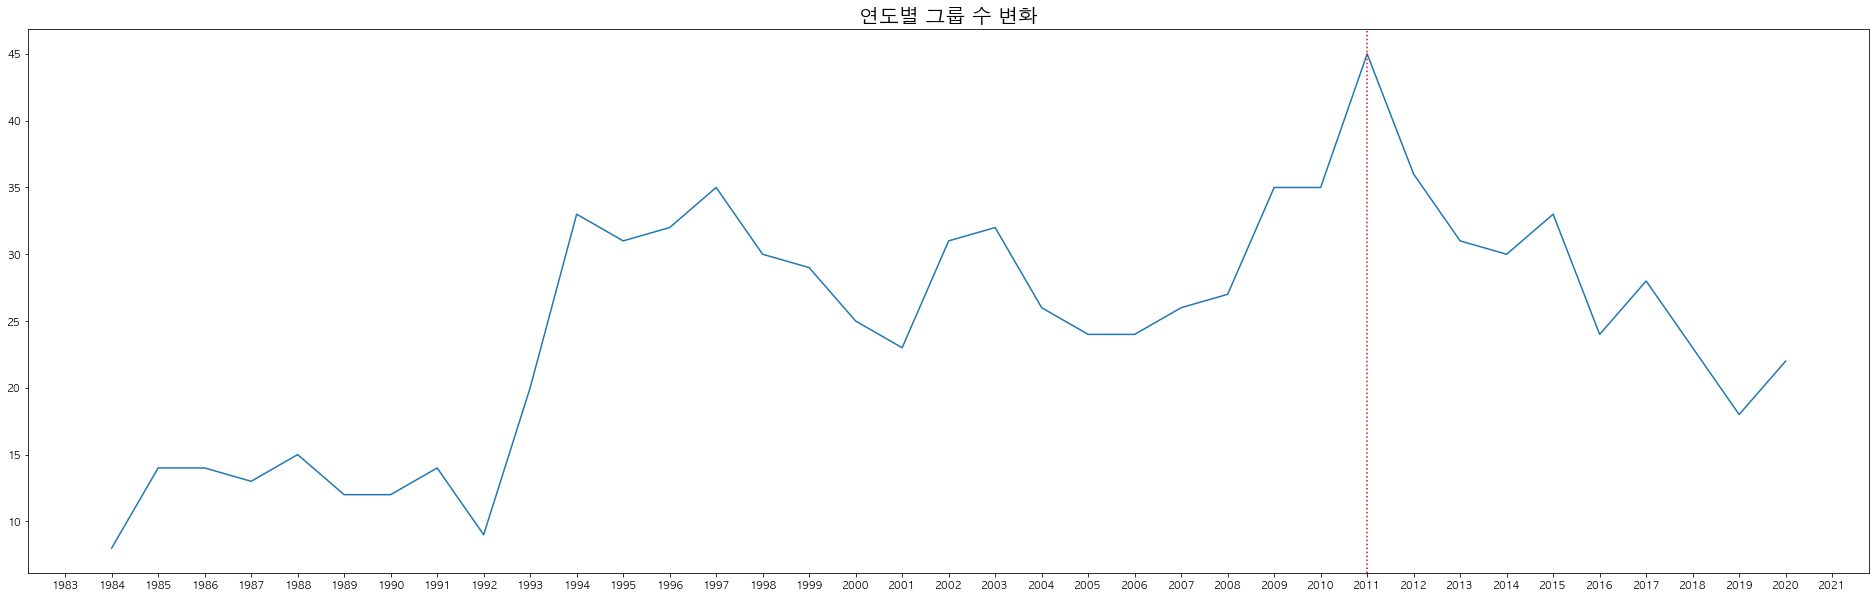

In [10]:
# 시각화
plt.figure(figsize= (33, 10))
ax=plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.title('연도별 그룹 수 변화', fontsize = 20)
plt.plot(group_df.groupby('연도')['가수'].nunique())
plt.axvline(x = 2011, color = 'r', linestyle = ":")

눈에 띄는 년도는 1997, 2011년으로 그래프가 솟은 것을 볼 수 있음. 2011년 이후로는 감소 추세를 보이고 있다.

In [11]:
# 연도별, 성별 그룹 수
year_sex = pd.DataFrame(group_df.groupby(['연도', '성별'])['가수'].nunique())
year_sex = year_sex.rename(columns = {'가수' : '그룹수'})
year_sex

그룹수
연도     성별     
1984.0 남성    4
       여성    1
       혼성    3
1985.0 남성    7
       혼성    7
...        ...
2019.0 여성    5
       혼성    1
2020.0 남성    7
       여성   11
       혼성    4

[102 rows x 1 columns]

<AxesSubplot:title={'center':'연도별 성별 그룹 수 변화'}, xlabel='연도', ylabel='그룹수'>

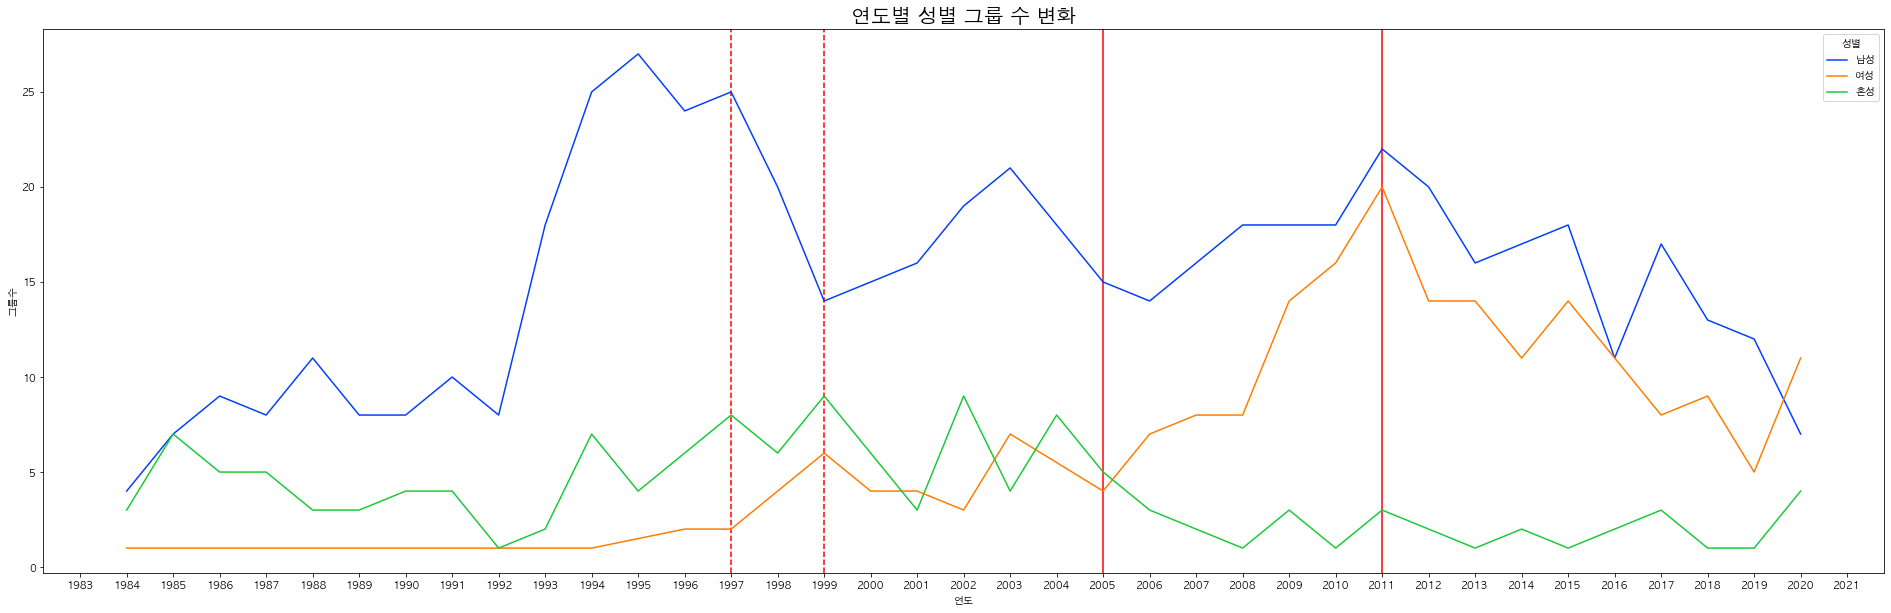

In [12]:
# 시각화
plt.figure(figsize= (33, 10))
ax=plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.title('연도별 성별 그룹 수 변화', fontsize = 20)
sns.set_palette("bright")
plt.axvline(x=1997, color='r', linestyle='--')
plt.axvline(x=1999, color='r', linestyle='--')
plt.axvline(x=2005, color='r', linestyle='-')
plt.axvline(x=2011, color='r', linestyle='-')
sns.lineplot(data=year_sex, x="연도", y="그룹수", hue="성별")

1997~1999년에는 무슨일이...? 혼성 그룹은 남,여 그룹에 비해 저조한 비율
남성그룹은 감소, 여성그룹은 증가하는 추세. but 남, 여 그룹 모두 2010년대 초반에 많이 나온 것을 알 수 있다.
특히 여성그룹은 2005년 ~ 2010년 사이 가파른 성장세를 보인다.

그렇다면 그룹에 해당하는 아티스트의 평균 멤버수는 몇 명일까?

In [13]:
group_df.tail(2)

연도  순위            제목       가수                     앨범     좋아요 수  \
3676  2020.0  95   Inner Child    방탄소년단    MAP OF THE SOUL : 7  145156.0   
3680  2020.0  99  너에게 난, 나에게 넌  미도와 파라솔  슬기로운 의사생활 OST Part 12   71370.0   

             발매일          장르  \
3676  2020.02.21        랩/힙합   
3680  2020.05.29  발라드, 국내드라마   

                                                     가사        팬수  멤버수 솔로/그룹  \
3676  그때 우리 참 많이 힘들었지 너무나 먼 저 하늘의 별 올려보면서  그때의 넌 은하수...  777869.0  7.0    그룹   
3680  너에게 난 해질녘 노을처럼 한편의 아름다운 추억이 되고 소중했던 우리 푸르던 날을 ...   11105.0  5.0    그룹   

      성별                                                 작사  \
3676  남성  RM MattThomson MaxLynedochGraham RyanLawrie El...   
3680  혼성                                        송봉주(자전거탄풍경)   

                                                     작곡   편곡  
3676  RM MattThomson MaxLynedochGraham RyanLawrie El...  Nan  
3680                                        송봉주(자전거탄풍경)  이상훈

In [14]:
group_df['멤버수'].mean()

3.6257352941176473

그룹에 해당하는 아티스트들의 멤버수는 평균 3.6명

In [15]:
# 연도별 평균 멤버수
year_member = group_df.groupby('연도')['멤버수'].mean()
year_member

연도
1984.0    2.100000
1985.0    2.363636
1986.0    2.095238
1987.0    2.333333
1988.0    2.500000
1989.0    3.000000
1990.0    3.058824
1991.0    2.631579
1992.0    2.285714
1993.0    3.200000
1994.0    2.350000
1995.0    2.538462
1996.0    2.510638
1997.0    2.790698
1998.0    2.850000
1999.0    4.263158
2000.0    3.533333
2001.0    3.333333
2002.0    3.945946
2003.0    3.368421
2004.0    3.171429
2005.0    3.340909
2006.0    3.511628
2007.0    3.500000
2008.0    3.672727
2009.0    4.508197
2010.0    3.896552
2011.0    3.732394
2012.0    3.610169
2013.0    3.306122
2014.0    3.822222
2015.0    4.285714
2016.0    5.093750
2017.0    5.175000
2018.0    5.755102
2019.0    5.100000
2020.0    5.351351
Name: 멤버수, dtype: float64

In [16]:
year_member.sort_values(ascending=False).head()

연도
2018.0    5.755102
2020.0    5.351351
2017.0    5.175000
2019.0    5.100000
2016.0    5.093750
Name: 멤버수, dtype: float64

평균 멤버수가 가장 높았던 년도는 모두 최근 5년 이내의 년도. 그 중에서도 2018년의 차트 순위에 들었던 그룹의 평균 멤버수는 5.7명으로 6명에 가까운 숫자를 보임

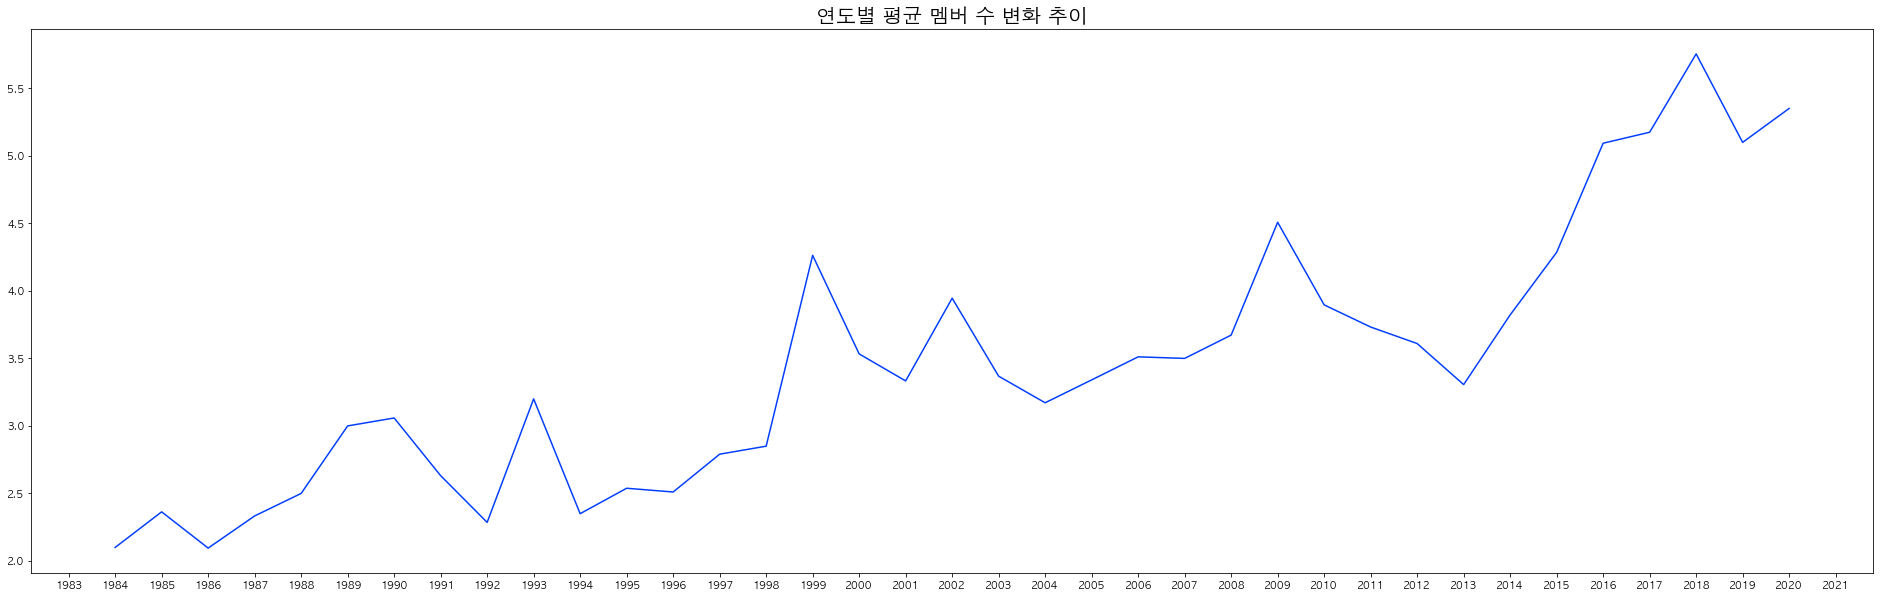

In [17]:
# 시각화
plt.figure(figsize= (33, 10))
ax=plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.title('연도별 평균 멤버 수 변화 추이', fontsize = 20)
plt.plot(group_df.groupby('연도')['멤버수'].mean())

전체적으로 봤을 때 그룹의 멤버수는 계속해서 증가하고 있는 추세.

성별로 보는 전체년도 평균 멤버수는?

In [18]:
# 남자그룹의 평균 멤버수
male_group = group_df[group_df['성별'] == '남성']
male_group['멤버수'].mean()

3.3082437275985663

In [19]:
# 여자그룹의 평균 멤버수
female_group = group_df[group_df['성별'] == '여성']
female_group['멤버수'].mean()

4.627218934911243

In [20]:
mixed_group = group_df[group_df['성별'] == '혼성']
mixed_group['멤버수'].mean()

3.2324324324324323

전체년도에서는 남그룹 평균 3.3명, 여그룹 평균 4.6명, 혼성그룹 평균 3.2명의 멤버수를 보임

앞의 시각화를 통해 그룹이 가장 많았던 2011년을 기준으로 2011년 이전, 2011년 이후의 그룹의 평균 멤버수에는 차이가 있을까?

In [21]:
member_count =  pd.DataFrame(group_df.groupby(['연도', '성별'])['멤버수'].mean())
member_count = member_count.reset_index()
member_count

연도  성별       멤버수
0    1984.0  남성  2.000000
1    1984.0  여성  2.000000
2    1984.0  혼성  2.250000
3    1985.0  남성  2.545455
4    1985.0  혼성  2.181818
..      ...  ..       ...
97   2019.0  여성  5.875000
98   2019.0  혼성  2.000000
99   2020.0  남성  5.777778
100  2020.0  여성  5.769231
101  2020.0  혼성  3.166667

[102 rows x 3 columns]

<AxesSubplot:title={'center':'연도별 성별 평균 멤버수 변화 추이'}, xlabel='연도', ylabel='멤버수'>

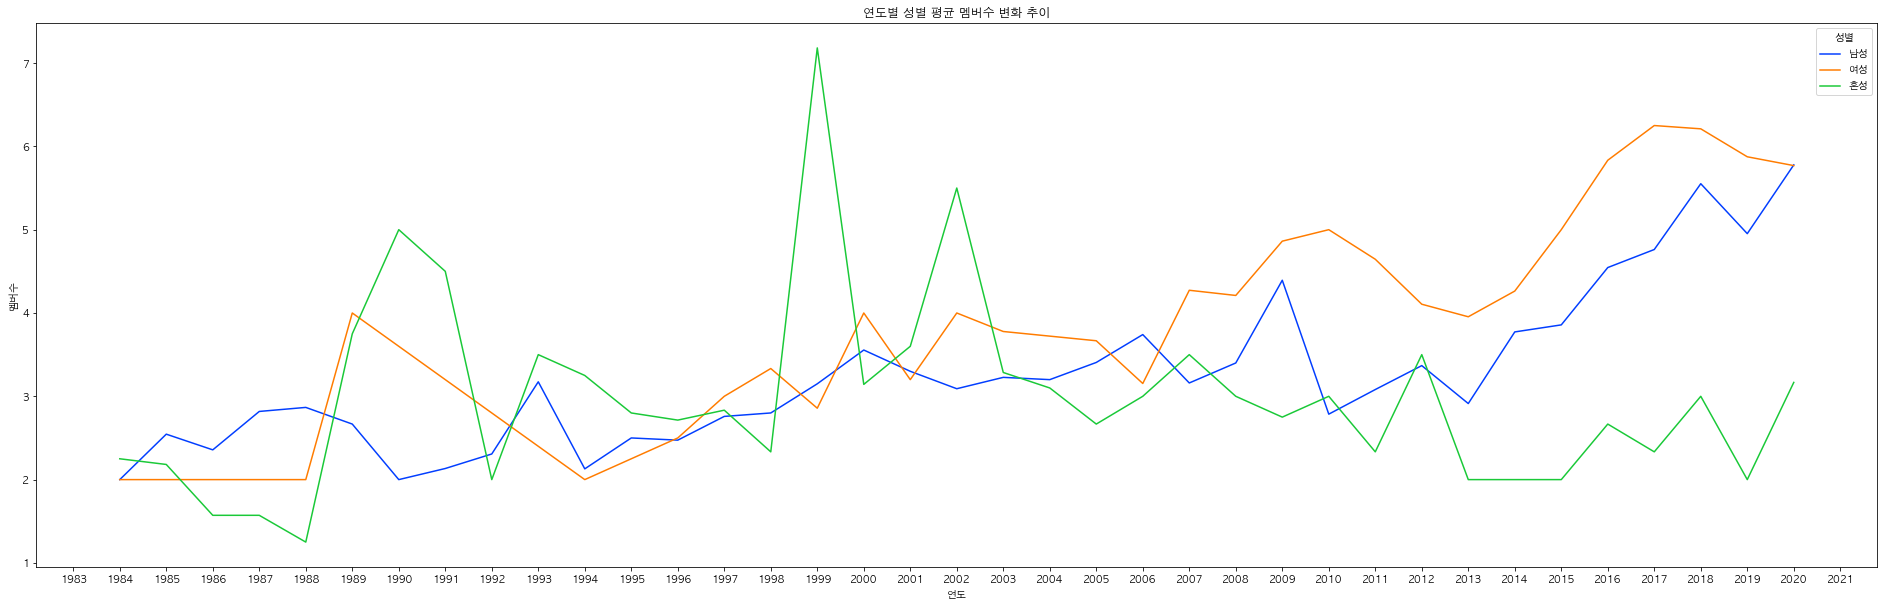

In [22]:
# 시각화
plt.figure(figsize=(33, 10))
ax=plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.title("연도별 성별 평균 멤버수 변화 추이")
sns.set_palette("bright")
sns.lineplot(data=member_count, x='연도', y='멤버수', hue='성별')

<AxesSubplot:title={'center':'2011년 이전 평균 멤버수'}, xlabel='연도', ylabel='멤버수'>

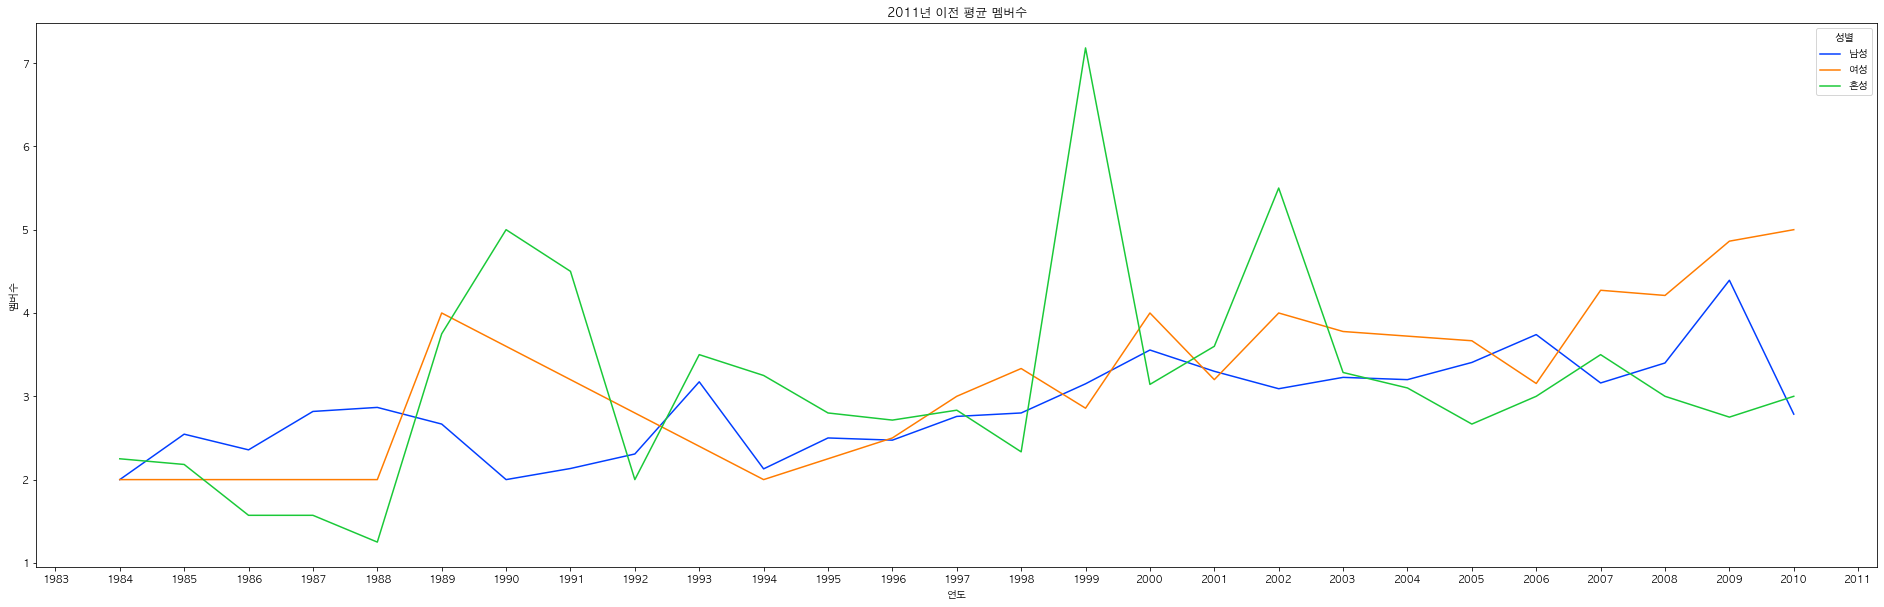

In [23]:
# 2011년 이전
plt.figure(figsize=(33, 10))
ax=plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.title("2011년 이전 평균 멤버수")
sns.set_palette("bright")
sns.lineplot(data=member_count[member_count['연도'] < 2011], x='연도', y='멤버수', hue='성별')

<AxesSubplot:title={'center':'2011년 이후 평균 멤버수'}, xlabel='연도', ylabel='멤버수'>

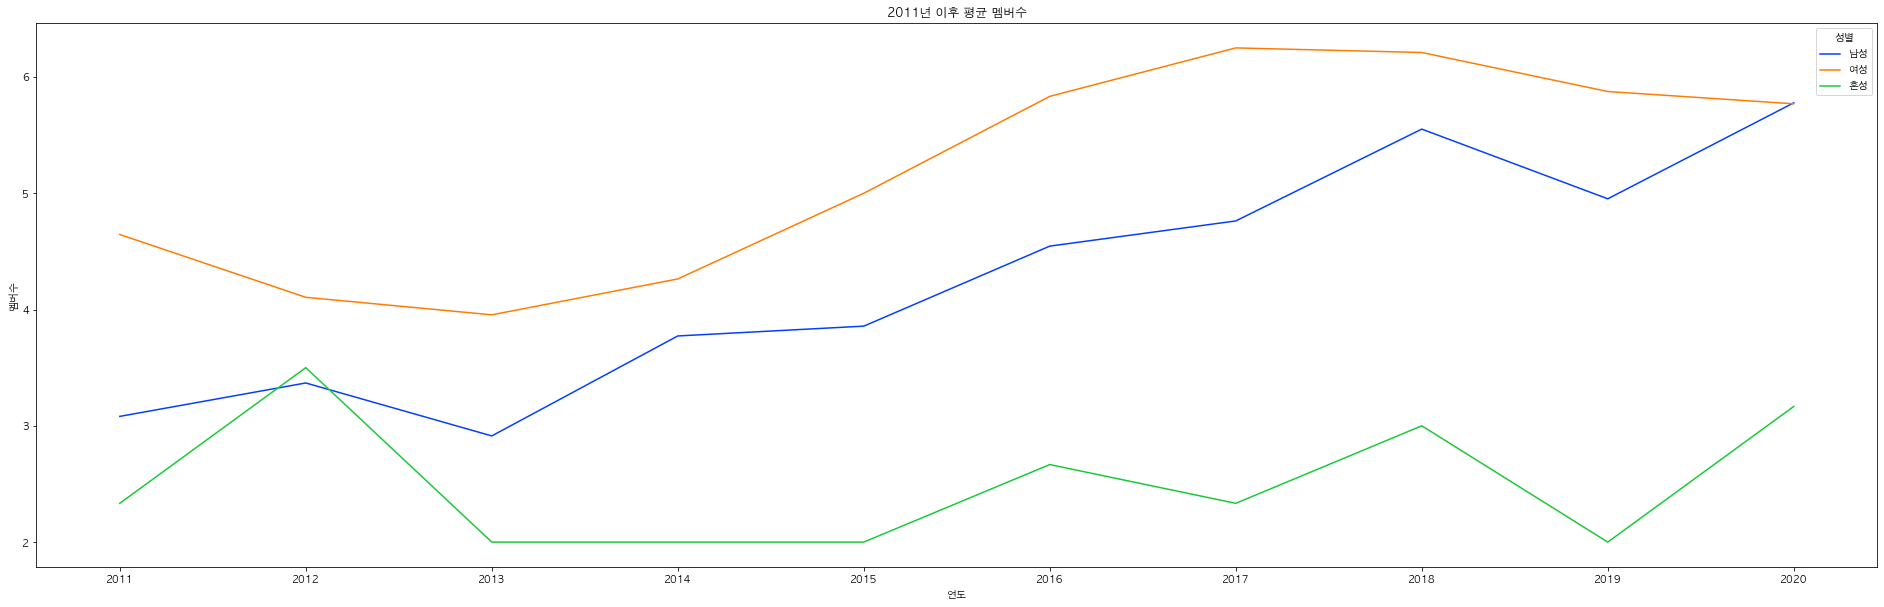

In [24]:
# 2011년 이후
plt.figure(figsize=(33, 10))
ax=plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.title("2011년 이후 평균 멤버수")
sns.set_palette("bright")
sns.lineplot(data=member_count[member_count['연도'] >= 2011], x='연도', y='멤버수', hue='성별')

2011년을 기준으로 여성그룹, 남성그룹의 평균 멤버수는 증가추세를 보임. 혼성그룹은 1990년대 초반과 말에만 평균 멤버수의 수가 높았음

전체년도에서 여그룹 평균 멤버수는 4.6명, 2011년 이후로는 평균 멤버수가 5명대를 유지하고 있으므로 종합적으로 여그룹의 멤버수는 4명 or 5명을 추천.

그렇다면 5명의 멤버수를 넘긴다면?
5명의 멤버수를 넘긴 여그룹은 차트에 곡이 몇 개 정도 올랐을까?

In [25]:
# 순위에 오른 4인 이상 여그룹 곡의 총 수(중복 제거)
tot_member_count = female_group[female_group['멤버수'] >= 4]['제목'].nunique()
tot_member_count

235

In [26]:
# 6명 이상의 멤버수를 가진 여그룹의 순위에 오른 곡 수 (중복 제거)
six_over_member = female_group[female_group['멤버수'] >= 6]['제목'].nunique()
six_over_member

71

In [27]:
# 4명의 멤버수를 가진 여그룹의 순위에 오른 곡 수 (중복 제거)
four_member = female_group[female_group['멤버수'] == 4]['제목'].nunique()
four_member

111

In [28]:
# 5명의 멤버수를 가진 여그룹의 순위에 오른 곡 수 (중복 제거)
five_member = female_group[female_group['멤버수'] == 5]['제목'].nunique()
five_member

53

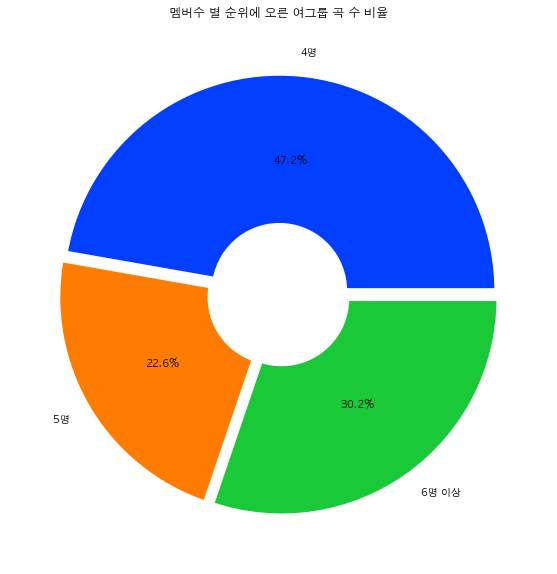

In [29]:
# 파이차트로 시각화
labels = ['4명', '5명', '6명 이상']
data = [four_member/tot_member_count, five_member/tot_member_count,six_over_member/tot_member_count]
categories= ['4명', '5명', '6명 이상']
explode = [0.02, 0.02, 0.02]
colors = ['#ff9999', '#ffc000', '#8fd9b6']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.figure(figsize=(10, 10))
plt.pie(data, labels=labels, autopct='%.1f%%', explode=explode, wedgeprops=wedgeprops)
plt.title('멤버수 별 순위에 오른 여그룹 곡 수 비율')
plt.show()

<AxesSubplot:title={'center':'멤버수 별 순위에 오른 여그룹 곡 수'}, xlabel='멤버수', ylabel='곡 수'>

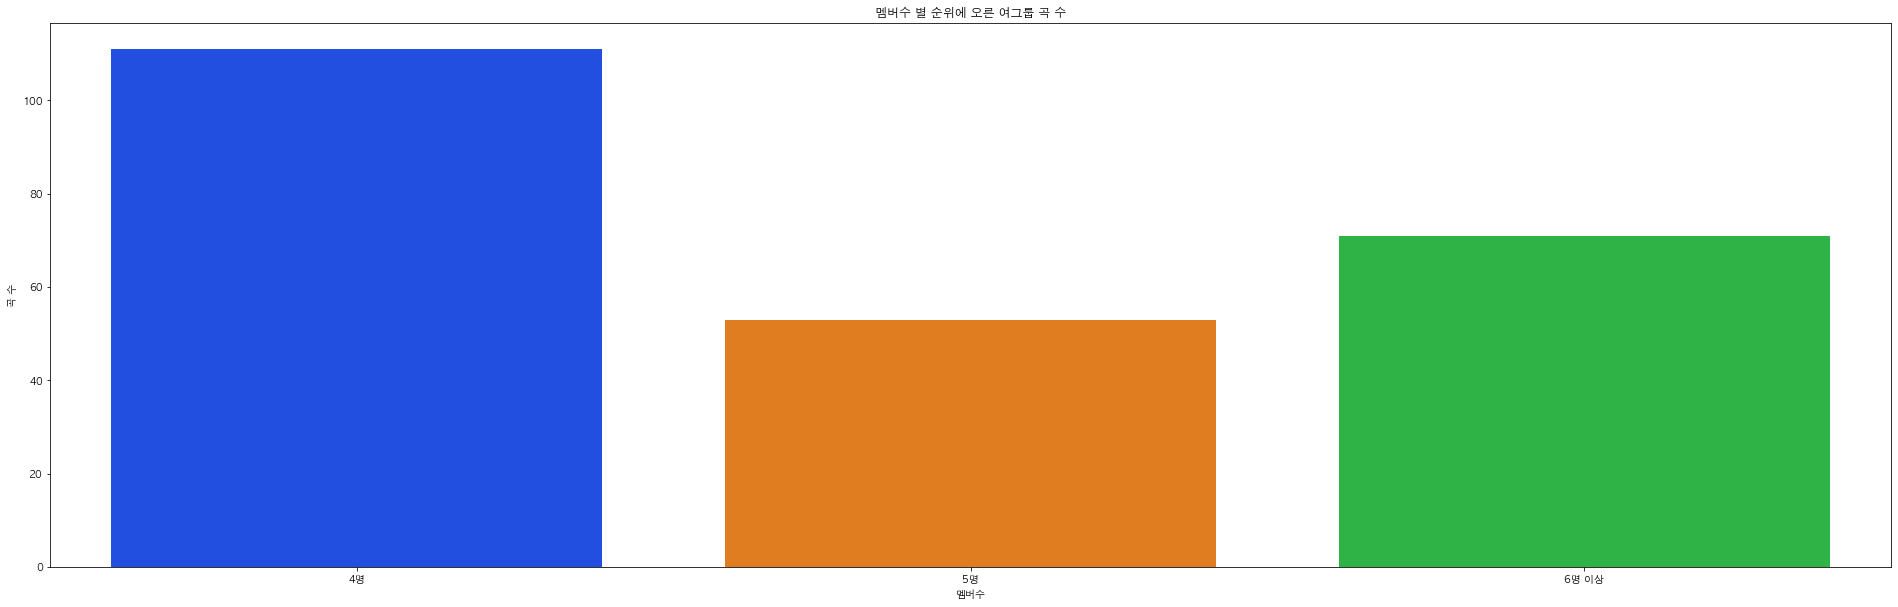

In [30]:
# 바 차트 시각화
data_2 = pd.DataFrame({'멤버수' : ['4명', '5명', '6명 이상'],
                       '곡 수' : [111, 53, 71]})
plt.figure(figsize=(33, 10))
plt.title('멤버수 별 순위에 오른 여그룹 곡 수')
sns.set_palette("bright")
sns.barplot(data=data_2, x='멤버수', y='곡 수')

5명의 멤버수를 넘겼을 때보다 추천했던 4~5명의 멤버수를 가진 그룹의 순위에 오른 곡 수의 비율이 더 높다.
* 6명이상: 71곡, 4명: 111곡, 5명: 53곡
* 전통적으로 여그룹은 4명의 멤버수일 때 차트에 오르는 곡 수가 많았기에 4명을 추천하지만, 최근 트렌드는 평균 5명의 멤버이므로 5명도 고려

한 그룹에 곡 수가 편향되었을수도 있으니 그룹별로 몇 곡이 있는지 다시 파이차트로 시각화

In [31]:
# 곡 수가 몇몇 그룹에게 편향된 것은 아닌지 알아보기 위해 파이차트로 시각화
pie_member = pd.DataFrame(female_group[(female_group['가수'] == '이브') | (female_group['가수'] == '핑클 (Fin.K.L)') | (female_group['가수'] == '샤크라') | (female_group['가수'] == '빅마마') | (female_group['가수'] == '쥬얼리') | (female_group['가수'] == '버블 시스터즈') | 
                         (female_group['가수'] == '슈가') | (female_group['가수'] =='브라운아이드걸스') | (female_group['가수'] == '블랙펄') | (female_group['가수'] == '2NE1') | (female_group['가수'] == '미쓰에이') | (female_group['가수'] == '시크릿') | 
                         (female_group['가수'] == '씨스타') | (female_group['가수'] == '걸스데이') | (female_group['가수'] =='써니힐') |  (female_group['가수'] =='마마무 (Mamamoo)') | (female_group['가수'] =='BLACKPINK') |
                         (female_group['가수'] == '환불원정대') | (female_group['가수'] == '베이비복스') | (female_group['가수'] == '원더걸스') | (female_group['가수'] == '4minute') | (female_group['가수'] == '카라') | 
                        (female_group['가수'] == 'f(x)') | (female_group['가수'] =='시크릿') | (female_group['가수'] == '크레용팝') | (female_group['가수'] == '레이디스 코드') | 
                        (female_group['가수'] == 'EXID') | (female_group['가수'] == 'Red Velvet (레드벨벳)') | (female_group['가수'] == 'ITZY (있지)') | 
                         (female_group['가수'] == '소녀시대 (GIRLS\' GENERATION)') | (female_group['가수'] == '티아라, 초신성') | (female_group['가수'] == '애프터스쿨') | (female_group['가수'] == '티아라') | 
                         (female_group['가수'] == '레인보우') | (female_group['가수'] =='달샤벳') | (female_group['가수'] == 'F-ve Dolls') | (female_group['가수'] == 'Apink (에이핑크)') | 
                         (female_group['가수'] == 'AOA') | (female_group['가수'] == '여자친구 (GFRIEND)') | (female_group['가수'] == 'TWICE (트와이스)') | (female_group['가수'] == '아이오아이 (I.O.I)') | 
                         (female_group['가수'] == '러블리즈') |(female_group['가수'] == '언니쓰') | (female_group['가수'] == '모모랜드 (MOMOLAND)') | (female_group['가수'] == '(여자)아이들') |  
                         (female_group['가수'] == '오마이걸 (OH MY GIRL)') | (female_group['가수'] == 'IZ*ONE (아이즈원)')].groupby('가수')['제목'].nunique().sort_values(ascending=False))
pie_member = pie_member.rename(columns={'제목' : '곡 수'})

<AxesSubplot:ylabel='곡 수'>

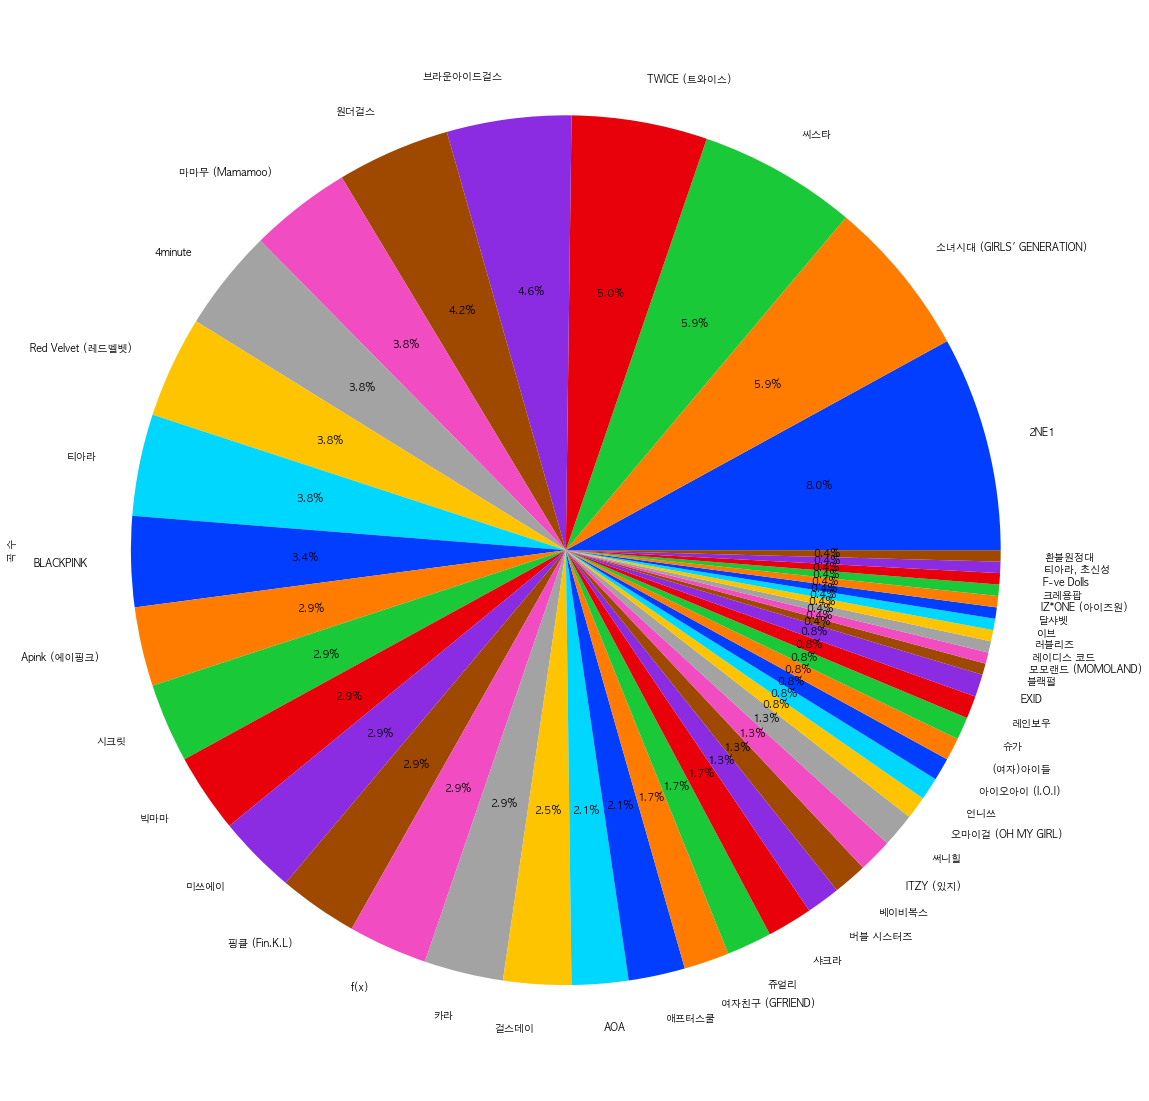

In [32]:
pie_member.plot.pie(y='곡 수', figsize = (20, 20), legend = False, autopct = "%.1f%%")

2NE1의 곡 수 비율이 가장 높긴 하지만 그룹별로 심한 편향을 보이지는 않음.

결론적으로 그룹의 멤버수는 4명(전통적인 멤버수) or 5명(최근 트렌드)으로 하는 것이 적당하다

---------------------------------

## 2. 곡 장르 전략
* 최근 30년간 장르 트렌드 변화
* 연도별 가장 인기있는 장르는?
* 그룹의 성별에 따라 인기있는 장르가 다를까?
* 솔로 아티스트의 인기 장르는?
* 연도별 좋아요 수가 많은 장르는?
* 연대별 1위를 가장 많이 차지한 장르는?

### 장르 트렌드 변화

In [33]:
# 최근 30년간 가장 인기있었던 장르 top10
top_genre = pd.DataFrame(melon_df.groupby('장르')['제목'].count().sort_values(ascending=False)).reset_index().head(10)
top_genre = top_genre.rename(columns = {'제목' : '곡 수'})
top_genre

장르   곡 수
0           발라드  1443
1            댄스   809
2          록/메탈   328
3          랩/힙합   288
4      R&B/Soul   189
5          성인가요   184
6        포크/블루스   145
7    발라드, 국내드라마    93
8    인디음악, 록/메탈    25
9  인디음악, 포크/블루스    23

In [34]:
# 최근 30년간 장르 트렌드의 변화
# 연도별 트렌드 장르
year_trend = pd.DataFrame(melon_df.groupby(['연도','장르'])['제목'].count()).reset_index().rename(columns = {'제목' : '곡 수'})


# 연도별 곡 수가 가장 많은 장르만 출력
idx = year_trend.groupby(['연도'])['곡 수'].transform(max) == year_trend['곡 수']
year_trend[idx]

연도    장르  곡 수
6    1984.0  성인가요   30
12   1985.0  성인가요   33
17   1986.0   발라드   39
24   1987.0   발라드   43
33   1988.0   발라드   52
42   1989.0   발라드   52
50   1990.0   발라드   59
56   1991.0   발라드   63
65   1992.0   발라드   62
75   1993.0   발라드   46
85   1994.0   발라드   47
97   1995.0   발라드   47
111  1996.0   발라드   47
125  1997.0   발라드   40
134  1998.0   발라드   48
140  1999.0    댄스   35
149  2000.0    댄스   35
163  2001.0   발라드   37
174  2002.0   발라드   47
183  2003.0   발라드   38
195  2004.0   발라드   40
206  2005.0   발라드   40
214  2006.0   발라드   50
223  2007.0   발라드   54
234  2008.0   발라드   35
238  2009.0    댄스   50
245  2010.0    댄스   43
251  2011.0    댄스   47
259  2012.0    댄스   39
265  2013.0    댄스   28
280  2014.0   발라드   28
286  2015.0    댄스   29
287  2015.0  랩/힙합   29
295  2016.0    댄스   23
307  2017.0    댄스   26
320  2018.0    댄스   29
323  2018.0   발라드   29
336  2019.0   발라드   38
350  2020.0   발라드   24

'발라드' 장르가 예전부터 꾸준히 top100 차트에 머무는 것을 발견. 눈여겨볼만한 점은 2000년대에는 발라드가 유행하다가 2010년에 와서는 '댄스' 장르가 인기가 있었던것으로 나타났다. 아마 2세대 아이돌(빅뱅, 투애니원, 소녀시대, 샤이니 등등...)의 등장이 영향을 미치지 않았을까 생각이 든다. 그러나 최근(2019년)부터는 다시 발라드곡이 top100차트에 많이 올라온 것을 볼 수 있다.

### 그룹이 많이 시도했던 장르는?
* 여그룹이 많이 시도한 장르, 남그룹이 많이 시도한 장르
* 그룹의 성별에 따라 인기있는 장르가 다른가?

In [35]:
# 여그룹의 인기있는 장르 top10
female_group_trend = pd.DataFrame(female_group.groupby('장르')['제목'].count()).rename(columns = {'제목' : '곡 수'}).reset_index().sort_values(by = '곡 수', ascending=False).head(10)
female_group_trend

장르  곡 수
1             댄스  249
4            발라드   50
0       R&B/Soul   22
2           랩/힙합    6
6     발라드, 국내드라마    4
8         일렉트로니카    3
3           록/메탈    2
5  발라드, R&B/Soul    1
7           성인가요    1

<AxesSubplot:title={'center':'여그룹 인기 장르'}, xlabel='장르', ylabel='곡 수'>

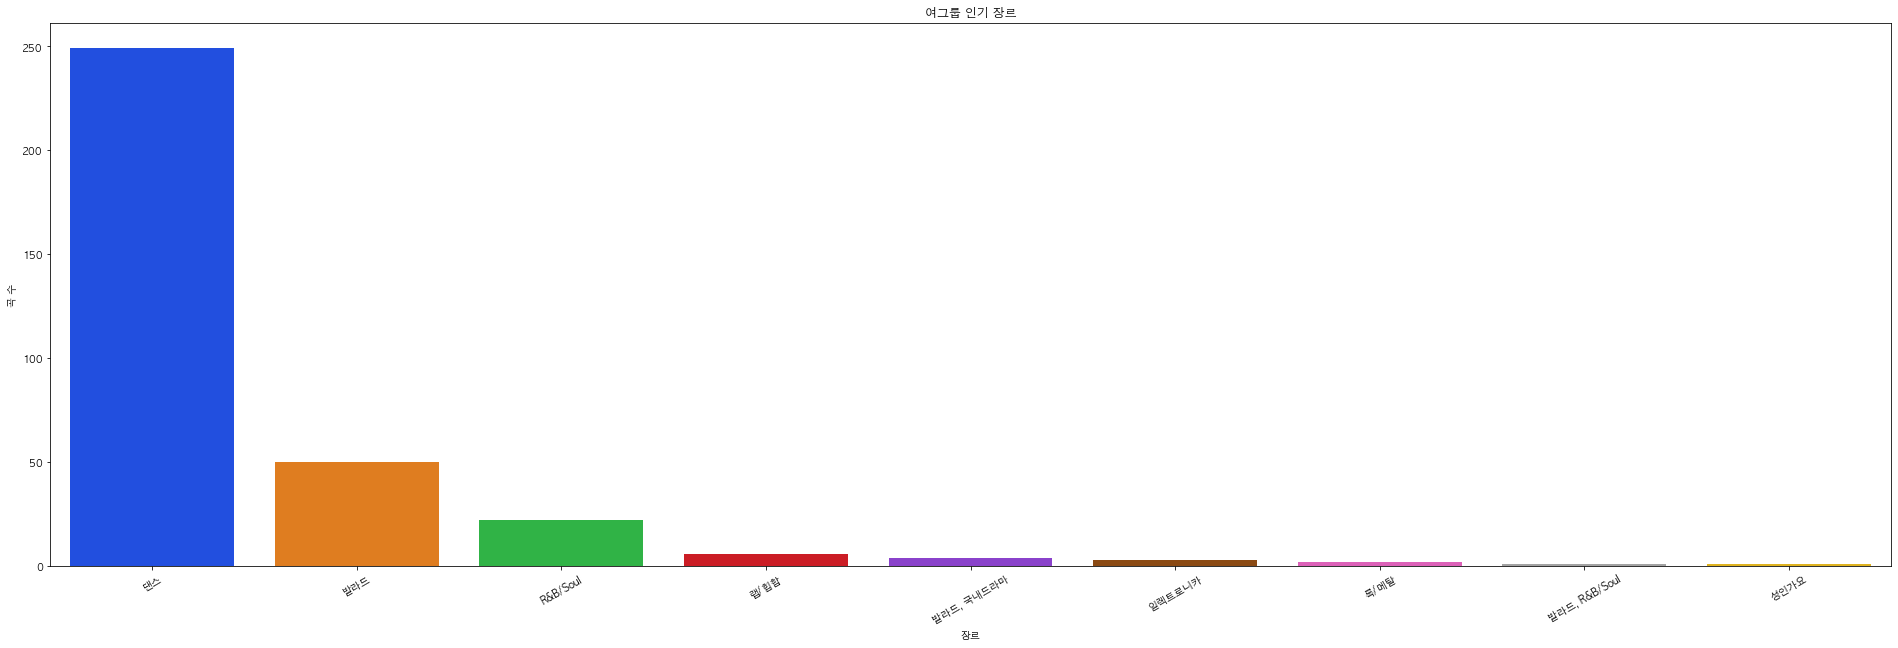

In [36]:
# 시각화
plt.figure(figsize=(33, 10))
plt.title('여그룹 인기 장르')
plt.xticks(rotation = 30)
sns.set_palette("bright")
sns.barplot(data=female_group_trend, x='장르', y='곡 수')

In [37]:
# 남그룹의 인기있는 장르 top10
male_group_trend = pd.DataFrame(male_group.groupby('장르')['제목'].count()).rename(columns = {'제목' : '곡 수'}).reset_index().sort_values(by = '곡 수', ascending=False).head(10)
male_group_trend

장르  곡 수
7          발라드  237
1           댄스  200
5         록/메탈  140
4         랩/힙합  121
0     R&B/Soul   40
19      포크/블루스   28
17  인디음악, 록/메탈   15
3     댄스, 랩/힙합   13
9   발라드, 국내드라마    8
14   발라드, 인디음악    7

<AxesSubplot:title={'center':'남그룹 인기 장르'}, xlabel='장르', ylabel='곡 수'>

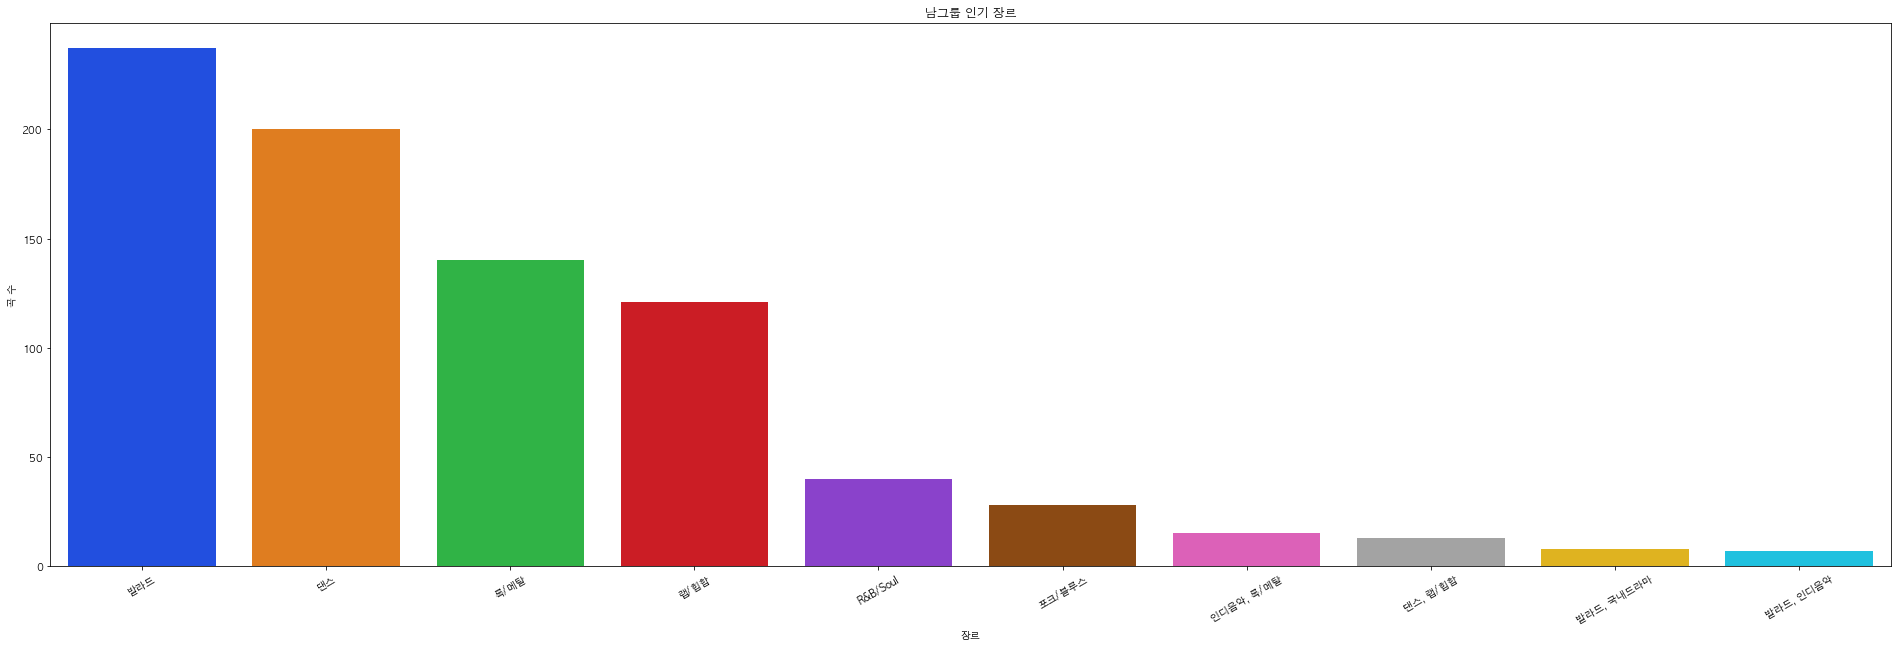

In [38]:
# 시각화
plt.figure(figsize=(33, 10))
plt.title('남그룹 인기 장르')
plt.xticks(rotation = 30)
sns.set_palette("bright")
sns.barplot(data=male_group_trend, x='장르', y='곡 수')

여그룹, 남그룹 인기있는 장르가 다른 것을 알 수 있다.
여그룹은 댄스 장르가 압도적으로 많은 반면 남그룹은 발라드, 댄스 장르의 차이가 크지 않으며 여그룹보다 비교적으로 다양한 장르의 곡이 순위에 오른 것을 볼 수 있다.

남, 여그룹 모두 인기가 있는 장르는 '댄스'이며 만약 여그룹을 데뷔시킨다면 '댄스' 장르의 곡으로 데뷔를 시키는 것이 유리할 것으로 예상된다.

### 좋아요 수와 장르
* 종합적으로 좋아요 수가 가장 많은 장르 top10
* 연도별 좋아요 수가 가장 많은 장르
* 여그룹 곡 중 좋아요 수가 많은 장르

In [39]:
# 전체년도에서 좋아요 수가 많은 장르 top 10
likes_sum = pd.DataFrame(melon_df.groupby('장르')['좋아요 수'].sum().sort_values(ascending=False).reset_index().head(10))
likes_sum

장르       좋아요 수
0           발라드  44733658.0
1            댄스  32830373.0
2          랩/힙합  24459675.0
3      R&B/Soul  13494038.0
4    발라드, 국내드라마   9601979.0
5          록/메탈   8404513.0
6  인디음악, 포크/블루스   3824287.0
7    인디음악, 록/메탈   2398780.0
8        포크/블루스   1804207.0
9     발라드, 인디음악   1264744.0

<AxesSubplot:title={'center':'총 좋아요 수 top10 장르'}, xlabel='장르', ylabel='좋아요 수'>

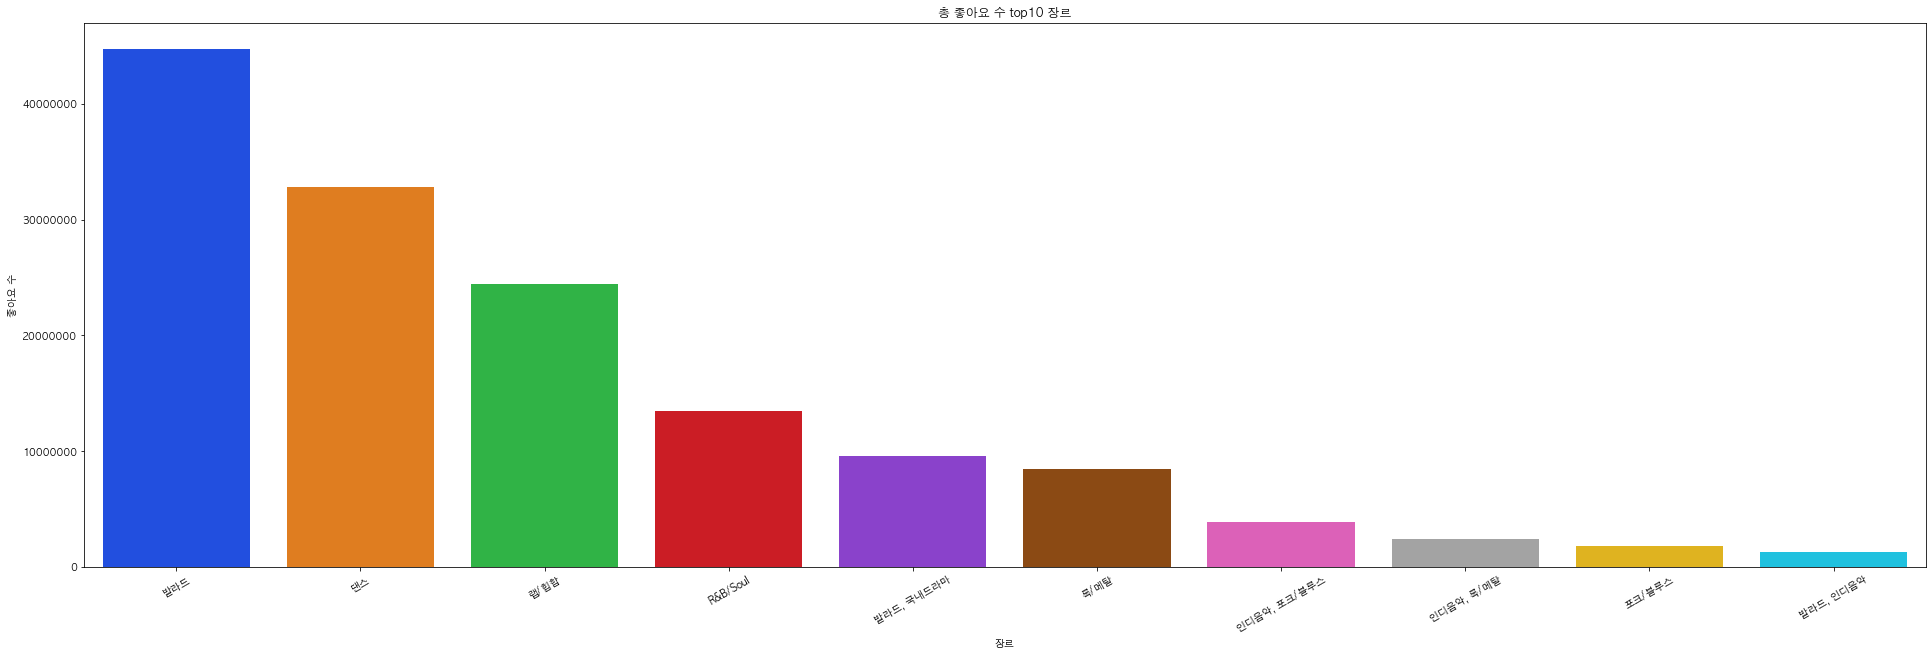

In [40]:
# 좋아요 수 시각화
plt.figure(figsize = (33, 10))
plt.ticklabel_format(style='plain') # 숫자 평평하게
plt.xticks(rotation = 30)
plt.title('총 좋아요 수 top10 장르')
sns.set_palette("bright")
sns.barplot(data=likes_sum, x='장르', y='좋아요 수')

In [41]:
# 연도별 총 좋아요 수가 가장 많은 장르만 출력
year_like_cnt = pd.DataFrame(melon_df.groupby(['연도','장르'])['좋아요 수'].sum()).reset_index().rename(columns = {'제목' : '곡 수'})

idx = year_like_cnt.groupby(['연도'])['좋아요 수'].transform(max) == year_like_cnt['좋아요 수']
year_like_cnt[idx]

연도    장르      좋아요 수
6    1984.0  성인가요    15977.0
10   1985.0   발라드    24369.0
19   1986.0  성인가요    36849.0
24   1987.0   발라드   107834.0
33   1988.0   발라드   164144.0
42   1989.0   발라드   160421.0
50   1990.0   발라드   192000.0
56   1991.0   발라드   168959.0
65   1992.0   발라드   163877.0
75   1993.0   발라드   122407.0
85   1994.0   발라드   217416.0
97   1995.0   발라드   200172.0
111  1996.0   발라드   352533.0
125  1997.0   발라드   263666.0
131  1998.0    댄스   324312.0
143  1999.0   발라드   312368.0
153  2000.0   발라드   302640.0
163  2001.0   발라드   682327.0
174  2002.0   발라드   671477.0
183  2003.0   발라드   494989.0
195  2004.0   발라드   592794.0
206  2005.0   발라드   736817.0
214  2006.0   발라드   855078.0
223  2007.0   발라드  1020296.0
234  2008.0   발라드   822436.0
238  2009.0    댄스  1033412.0
248  2010.0   발라드  1019566.0
254  2011.0   발라드  1460035.0
259  2012.0    댄스  2148483.0
270  2013.0   발라드  1953885.0
280  2014.0   발라드  3413958.0
287  2015.0  랩/힙합  2842124.0
298  2016.0   발라드  3075123.0
311  2017.0   발라드  4496714.0
323  2018.0   발라드  5479116.0
336  2019.0   발라드  6314437.0
345  2020.0    댄스  3470104.0

대부분의 연도에서 총 좋아요 수 역시 '발라드' 장르가 강세를 보였지만 가장 최근인 2020년 top 100 차트에서는 '댄스' 장르의 총 좋아요 수가 가장 많은 것을 알 수 있다. 아무래도 아이돌 그룹 팬의 특성상 음원 총공 같은 충성심이 총 좋아요 수에 영향을 미치지 않았나 싶다.

In [42]:
# 솔로/그룹 여부와 좋아요 수의 상관관계 (범주형변수, 수치형변수 간의 상관분석)

# '음원총공'이라는 문화가 생겼던 2014년 이후의 데이터들만 가지고 상관분석 진행

melon_df_after = melon_df[melon_df['연도'] >= 2014]

In [43]:
# 솔로/그룹 여부는 범주형 변수이므로 더미변수로 변경한 후 상관분석을 진행해주어야 함
# 그룹이면 0, 솔로면 1로 변경
melon_df_after_dummies = pd.get_dummies(melon_df_after['솔로/그룹'])

# del melon_df_after_dummies[melon_df_after_dummies.columns[0]]
melon_df_after_new = pd.concat([melon_df_after, melon_df_after_dummies], axis=1)

In [44]:
from scipy import stats

# 그룹과 좋아요 수 간의 피어슨 상관관계 (상관계수, p값 순)
stats.pearsonr(melon_df_after_new['그룹'], melon_df_after_new['좋아요 수'])

(0.015094475551981422, 0.690135444151336)

그룹과 좋아요 수 간에는 거의 상관관계가 없었다.

In [45]:
# 팬수과 좋아요 수 간의 피어슨 상관관계 (상관계수, p값 순)
stats.pearsonr(melon_df_after_new['팬수'], melon_df_after_new['좋아요 수'])

(0.5254731369072896, 6.038205203946431e-51)

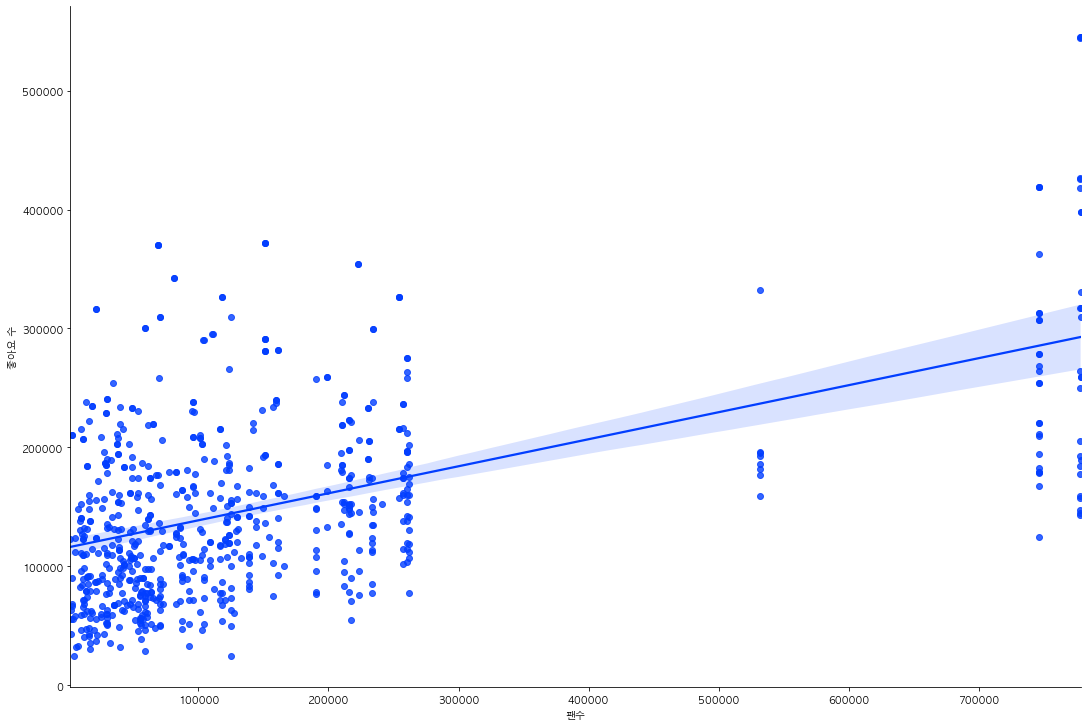

In [46]:
# 양의 상관관계를 확인하기 위해 lmplot으로 시각화
sns.set_palette("bright")
sns.lmplot(data=melon_df_after_new, x='팬수', y='좋아요 수', height=10, aspect=1.5)

솔로/그룹 여부보다는 팬 수와 좋아요 수간의 상관관계가 강하지는 않아도 있는 것으로 나타났다. 팬수가 많을 수록 좋아요 수도 많은 '양의 상관관계'를 보인다.
결국 그룹이든 솔로든 팬 수가 많아야 음원이 잘 될 가능성이 높다.

이것을 이용하여 음원사이트의 '팬 맺기'를 한 후 sns에 인증을 하면 포토카드나 CD를 보내주는 이벤트를 열어 팬의 유입을 늘리는 방안도 생각해보면 좋을 것 같다. (음원이 잘 되려면 우선 팬을 모아야 하기 때문)

### 순위와 장르
* 전체년도에서 1위를 가장 많이 차지한 장르
* 최근 10년간 1위를 가장 많이 차지한 장르
* 여그룹 곡 중 1위를 가장 많이 차지한 장르 
* 솔로가수의 곡 중 1위를 가장 많이 차지한 장르

In [47]:
# 1위한 곡만 추출 
top_of_top = melon_df[melon_df['순위'] == 1]


# 전체년도에서 1위를 가장 많이 차지한 장르
top_of_top['장르'].value_counts()

발라드           12
댄스             9
랩/힙합           6
록/메탈           4
R&B/Soul       4
포크/블루스         1
발라드, 국내드라마     1
Name: 장르, dtype: int64

전체년도에서 1위를 가장 많이 차지한 장르는 '발라드' 다음이 '댄스' 장르

In [48]:
top_of_top[(top_of_top['연도'] >= 2010) & (top_of_top['연도'] <= 2020)]

연도  순위                  제목               가수              앨범  \
2582  2010.0   1  Bad Girl Good Girl             미쓰에이    Bad But Good   
2682  2011.0   1           Roly-Poly              티아라       존트라볼타 워너비   
2782  2012.0   1               강남스타일         싸이 (PSY)     싸이6甲 Part.1   
2882  2013.0   1                  자니            프라이머리              자니   
2982  2014.0   1                   썸  소유 (SOYOU), 정기고               썸   
3082  2015.0   1                 뱅뱅뱅          BIGBANG               A   
3182  2016.0   1            CHEER UP     TWICE (트와이스)        PAGE TWO   
3282  2017.0   1        첫눈처럼 너에게 가겠다       에일리(AILEE)  도깨비 OST Part.9   
3382  2018.0   1              사랑을 했다             iKON          Return   
3482  2019.0   1        사랑에 연습이 있었다면              임재현    사랑에 연습이 있었다면   
3582  2020.0   1                아무노래        지코 (ZICO)            아무노래   

         좋아요 수         발매일          장르  \
2582   36744.0  2010.07.01          댄스   
2682   39260.0  2011.06.29          댄스   
2782  157061.0  2012.07.15        랩/힙합   
2882  177091.0  2012.03.07        랩/힙합   
2982  178166.0  2014.02.07    R&B/Soul   
3082  186204.0  2015.06.01        랩/힙합   
3182  223306.0  2016.04.25          댄스   
3282  326335.0  2017.01.07  발라드, 국내드라마   
3382  309781.0  2018.01.25        랩/힙합   
3482  206690.0  2018.09.25         발라드   
3582  257506.0  2020.01.13        랩/힙합   

                                                     가사        팬수  멤버수 솔로/그룹  \
2582  You don't know me  You don't know me  You don'...   21052.0  4.0    그룹   
2682  어디까지 왔나 또 어디 숨었나 맘에 들어 왔나 나나나나나 I like you 어디서...   21133.0  6.0    그룹   
2782  오빤 강남스타일 강남스타일 낮에는 따사로운 인간적인 여자 커피 한잔의 여유를 아는 ...   41576.0  1.0    솔로   
2882  일 끝나서 친구들과 한잔 내일은 노는 토요일이니깐 일 얘기 사는 얘기 재미난 얘기 ...   67634.0  1.0    솔로   
2982  썸 (Feat. 릴보이 Of 긱스)  가끔씩 나도 모르게 짜증이나 너를 향한 맘은 ...   29789.0  1.0    솔로   
3082  난 깨어나 까만 밤과 함께 다 들어와 담엔 누구 차례 한 치 앞도 볼 수 없는 막장...  262173.0  4.0    그룹   
3182  매일 울리는 벨벨벨 이젠 나를 배려 해줘 배터리 낭비하긴 싫어 자꾸만 봐 자꾸 자꾸...  215939.0  9.0    그룹   
3282  널 품기 전 알지 못했다 내 머문 세상 이토록 찬란한 것을 작은 숨결로 닿은 사람 ...  117822.0  1.0    솔로   
3382  사랑을 했다 우리가 만나 지우지 못할 추억이 됐다 볼만한 멜로드라마 괜찮은 결말 그...  125136.0  6.0    그룹   
3482  사랑에 연습이 있었다면 우리는 달라졌을까 내가 널 만난 시간 혹은 그 장소 상황이 ...   11051.0  1.0    솔로   
3582  왜들 그리 다운돼있어 뭐가 문제야 say something 분위기가 겁나 싸해 요새...  190466.0  1.0    솔로   

      성별                                  작사                       작곡  \
2582  여성                                 박진영                      박진영   
2682  여성                              신사동호랭이                   신사동호랭이   
2782  남성                             싸이(PSY)              싸이(PSY) 유건형   
2882  남성                              다이나믹듀오                 프라이머리 개코   
2982  여성  민연재 Xepy 에스나(eSNa) 릴보이(lIlBOI) 정기고  김도훈(RBW) Xepy 에스나(eSNa)   
3082  남성                TEDDY G-DRAGON T.O.P           TEDDY G-DRAGON   
3182  여성                            SamLewis                  블랙아이드필승   
3282  여성                                 이미나                     로코베리   
3382  남성                        B.I BOBBY 못말         B.I MILLENNIUM 승   
3482  남성                                2soo                     2soo   
3582  남성                            지코(ZICO)         지코(ZICO) Poptime   

                        편곡  
2582               박진영 홍지상  
2682                신사동호랭이  
2782                   유건형  
2882                 프라이머리  
2982  김도훈(RBW) 서용배(TENTEN)  
3082                 TEDDY  
3182                    라도  
3282                  로코베리  
3382            MILLENNIUM  
3482                  2soo  
3582      지코(ZICO) Poptime

최근 10년간 시대별 차트에서 1위를 가장 많이 차지한 장르는 '랩/힙합', '댄스' 장르

In [49]:
# 예전에 인기있었던 발라드, 요즘 인기 있는 장르인 댄스, 랩/힙합 장르만 모아 시대별로 어떻게 변화했는지 보기
genre_trend_change = year_trend[(year_trend['장르'] == '발라드') | (year_trend['장르'] == '댄스') | (year_trend['장르'] == '랩/힙합')]
genre_trend_change

연도    장르  곡 수
1    1984.0    댄스    2
3    1984.0   발라드   24
8    1985.0    댄스    5
10   1985.0   발라드   29
15   1986.0    댄스    6
..      ...   ...  ...
332  2019.0  랩/힙합   13
336  2019.0   발라드   38
345  2020.0    댄스   21
346  2020.0  랩/힙합   18
350  2020.0   발라드   24

[101 rows x 3 columns]

<AxesSubplot:title={'center':'연도별 인기 장르 트렌드 변화'}, xlabel='연도', ylabel='곡 수'>

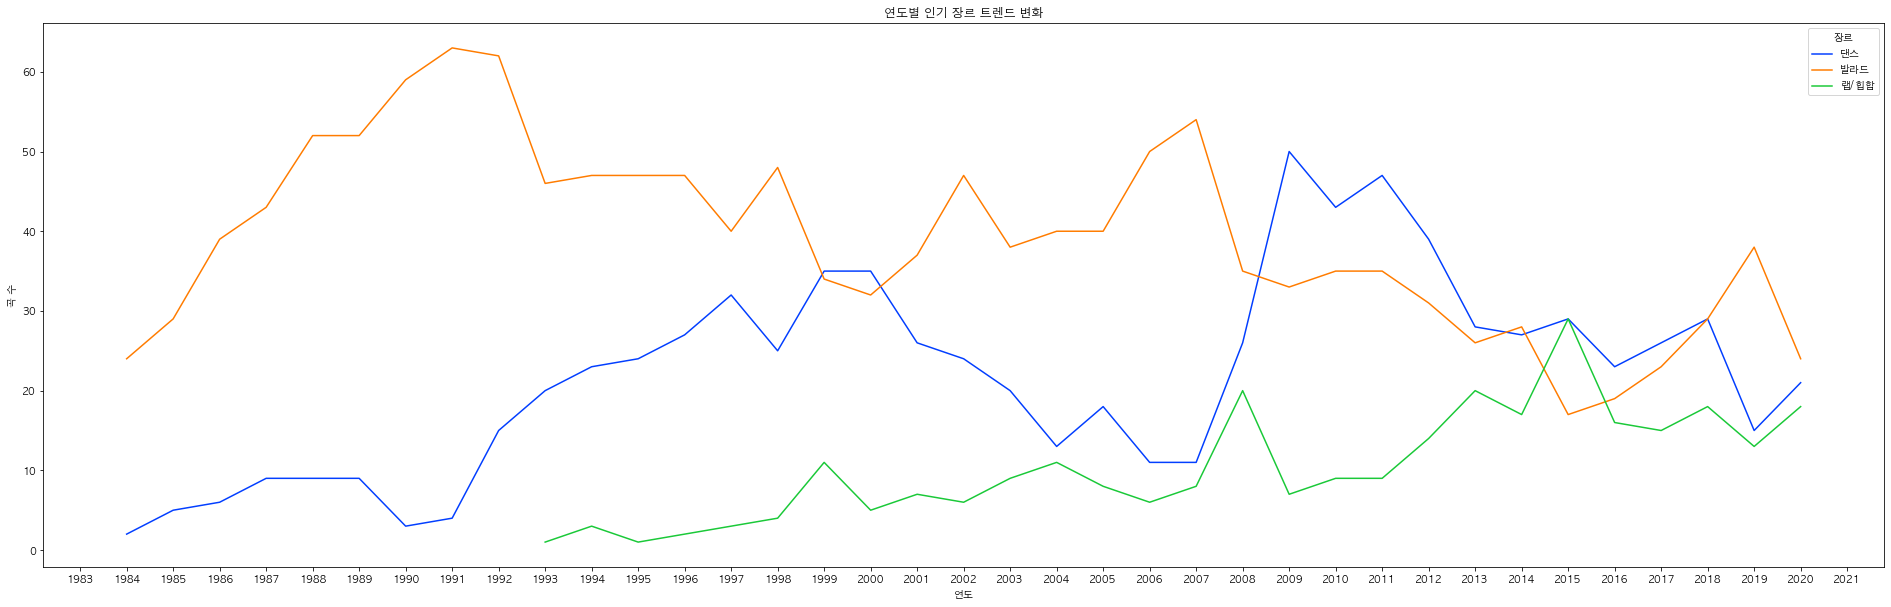

In [50]:
# 시각화
plt.figure(figsize=(33, 10))
ax=plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.title("연도별 인기 장르 트렌드 변화")
sns.set_palette("bright")
sns.lineplot(data=genre_trend_change, x='연도', y='곡 수', hue='장르')

사재기가 의심되는 2019년을 제외하면 최근 10년간은 확실히 '발라드' 보다는 '댄스' 장르가 인기있는 것을 확인. 랩/힙합은 최근 들어서 상승하는 추세.

In [51]:
# 전체년도에서 여그룹 곡 중 시대별 차트에서 1위를 차지한 장르
top_of_top[(top_of_top['성별'] == '여성') & (top_of_top['솔로/그룹'] == '그룹')]['장르'].value_counts()

댄스          5
R&B/Soul    1
Name: 장르, dtype: int64

In [52]:
top_of_top[(top_of_top['성별'] == '여성') & (top_of_top['솔로/그룹'] == '그룹')]

연도  순위                  제목                        가수  \
1882  2003.0   1          Break Away                       빅마마   
2382  2008.0   1              So Hot                      원더걸스   
2482  2009.0   1                 Gee  소녀시대 (GIRLS' GENERATION)   
2582  2010.0   1  Bad Girl Good Girl                      미쓰에이   
2682  2011.0   1           Roly-Poly                       티아라   
3182  2016.0   1            CHEER UP              TWICE (트와이스)   

                              앨범     좋아요 수         발매일        장르  \
1882              Like The Bible   14389.0  2003.02.06  R&B/Soul   
2382                      So Hot   25896.0  2008.06.03        댄스   
2482  The First Mini Album 'Gee'   39259.0  2009.01.05        댄스   
2582                Bad But Good   36744.0  2010.07.01        댄스   
2682                   존트라볼타 워너비   39260.0  2011.06.29        댄스   
3182                    PAGE TWO  223306.0  2016.04.25        댄스   

                                                     가사        팬수  멤버수 솔로/그룹  \
1882  이젠 날 떠나가줘 이젠 날 다 잊어줘 나를 버리고 살아가줘 가져간 내 사랑을 내게 ...    7559.0  4.0    그룹   
2382  왜 자꾸 쳐다보니 왜 내가 그렇게 예쁘니 아무리 그렇다고 그렇게 쳐다보면 내가 좀 ...   33921.0  5.0    그룹   
2482  Uh Huh Listen Boy My First Love Story My Angel...  104391.0  9.0    그룹   
2582  You don't know me  You don't know me  You don'...   21052.0  4.0    그룹   
2682  어디까지 왔나 또 어디 숨었나 맘에 들어 왔나 나나나나나 I like you 어디서...   21133.0  6.0    그룹   
3182  매일 울리는 벨벨벨 이젠 나를 배려 해줘 배터리 낭비하긴 싫어 자꾸만 봐 자꾸 자꾸...  215939.0  9.0    그룹   

      성별              작사              작곡              편곡  
1882  여성             박경진             이현정             곽영준  
2382  여성             박진영             박진영         홍지상 박진영  
2482  여성  이트라이브(E-TRIBE)  이트라이브(E-TRIBE)  이트라이브(E-TRIBE)  
2582  여성             박진영             박진영         박진영 홍지상  
2682  여성          신사동호랭이          신사동호랭이          신사동호랭이  
3182  여성        SamLewis         블랙아이드필승              라도

여그룹 중 시대별 1위를 한 곡의 장르는 '댄스'가 대부분.
시대별로 top100 차트를 세웠을 때, 1위를 한 여그룹은 '빅마마, 원더걸스, 소녀시대, 미쓰에이, 티아라, 트와이스'로 6팀밖에 없다. 그중에서도 최근 10년간 시대별 top100 차트에서 1위를 한 여그룹은 '미쓰에이, 티아라, 트와이스' 뿐이며 이 세 그룹 모두 '댄스' 장르의 곡으로 1위를 차지했다.

그러므로 여그룹을 데뷔 시킬 때는 '댄스' 장르가 유리할 것으로 예상된다.

------------------------------------------

## 3. 곡 제목 수 분석
* 시대별 곡 제목 수의 변화가 있는가?
* 최근 10년간 차트에 오른 곡들의 평균 곡 제목 수
* 곡 제목 수도 순위와 상관이 있을까? (상관분석)

### 시대별 차트에서의 곡 제목 수의 변화

In [53]:
# 곡 제목수 컬럼 추가
melon_df['곡제목수'] = melon_df['제목'].str.replace(' ', '').str.len()

In [54]:
# 추가된 컬럼 확인
melon_df.tail(1)

연도   순위     제목   가수                  앨범    좋아요 수         발매일  \
3681  2020.0  100  어떤 날엔  김재환  사랑의 불시착 OST Part 5  61246.0  2020.01.19   

              장르                                                 가사       팬수  \
3681  발라드, 국내드라마  어디쯤인 건지 그대와 나 있는 곳 이렇게 그저 떠올리기만 해도 나는 떨림을 느껴요 ...  58591.0   

      멤버수 솔로/그룹  성별   작사    작곡    편곡  곡제목수  
3681  1.0    솔로  남성  김호경  1601  1601     4

In [55]:
# 시대별 차트의 평균 곡 제목 수 변화
title_len_count = pd.DataFrame(melon_df.groupby('연도')['곡제목수'].mean().reset_index())

<AxesSubplot:title={'center':'연도별 평균 곡 제목수 변화'}, xlabel='연도', ylabel='곡제목수'>

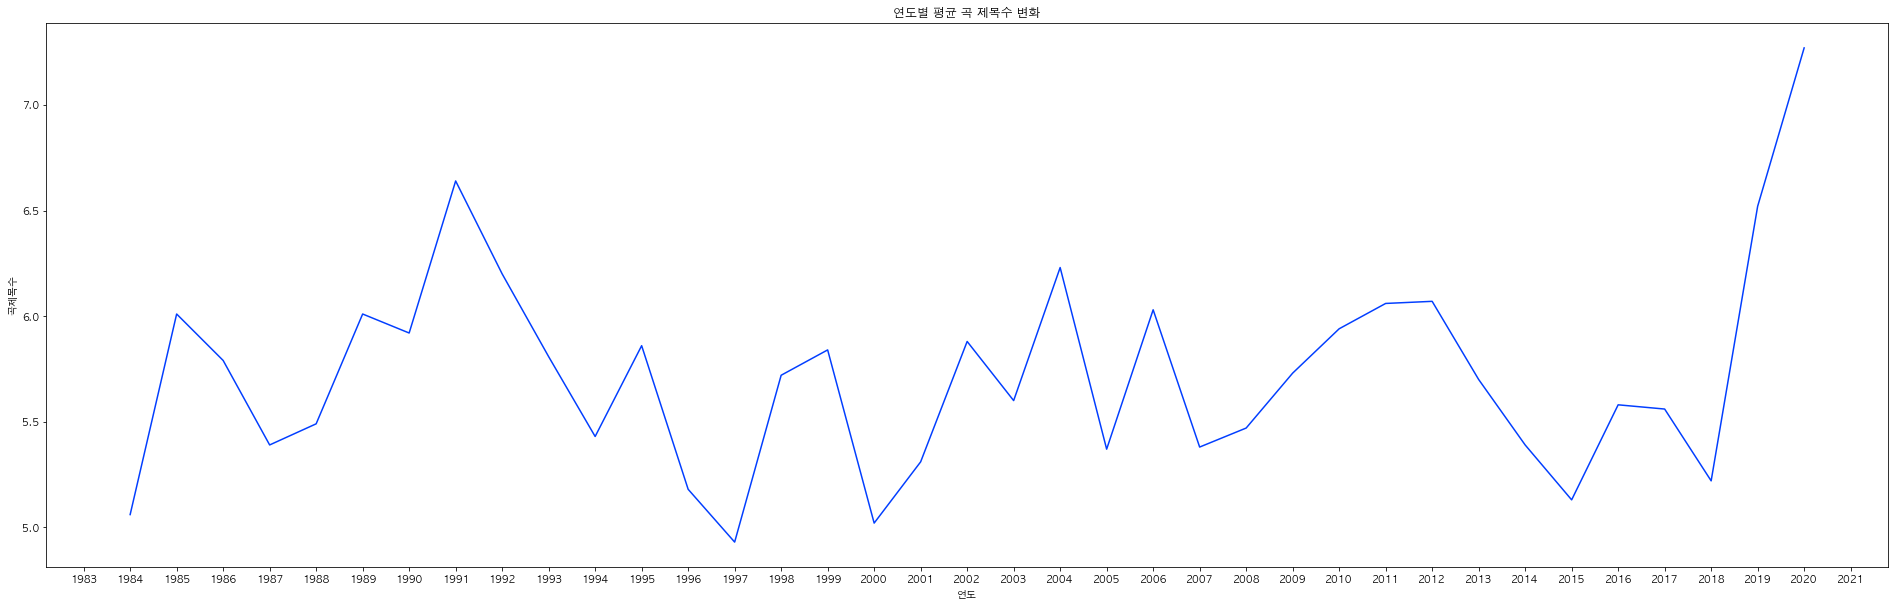

In [56]:
# 시각화
plt.figure(figsize=(33, 10))
ax=plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.title('연도별 평균 곡 제목수 변화')
sns.set_palette("bright")
sns.lineplot(data=title_len_count, x='연도', y='곡제목수')

90년대에 잠깐 높았다가 오르락 내리락을 반복. 하지만 최근 들어 곡 제목수가 늘어난 모습을 볼 수 있다.

### 그렇다면 평균 곡 제목 수인 6글자를 넘는 곡의 수가 시대별로 차이가 있을까?
* 시대별 곡 제목 6글자 이상인 곡 수

In [57]:
year_title_len_count = pd.DataFrame(melon_df[melon_df['곡제목수'] >= 6].groupby('연도')['제목'].nunique().reset_index())

In [58]:
# 연도를 년대로 나눠주는 함수
def split_by_time(x):
    if x <= 1989:
        return "1980년대"
    elif x <= 1999:
        return "1990년대"
    elif x <= 2009:
        return "2000년대"
    elif x <= 2019:
        return "2010년대"
    else:
        return "2020년대"

In [59]:
# 함수 적용해서 새 컬럼 만들기
year_title_len_count['년대'] = year_title_len_count['연도'].apply(lambda x: split_by_time(x))

In [60]:
# 년대별 곡 제목이 6글자 이상인 총 곡 수
six_len = pd.DataFrame(year_title_len_count.groupby('년대')['제목'].sum().reset_index())
six_len = six_len.rename(columns = {'제목' : '6글자 이상인 곡 수'})

In [61]:
six_len

년대  6글자 이상인 곡 수
0  1980년대          262
1  1990년대          461
2  2000년대          423
3  2010년대          440
4  2020년대           59

<AxesSubplot:title={'center':'연대별 6글자 이상인 곡 수'}, xlabel='년대', ylabel='6글자 이상인 곡 수'>

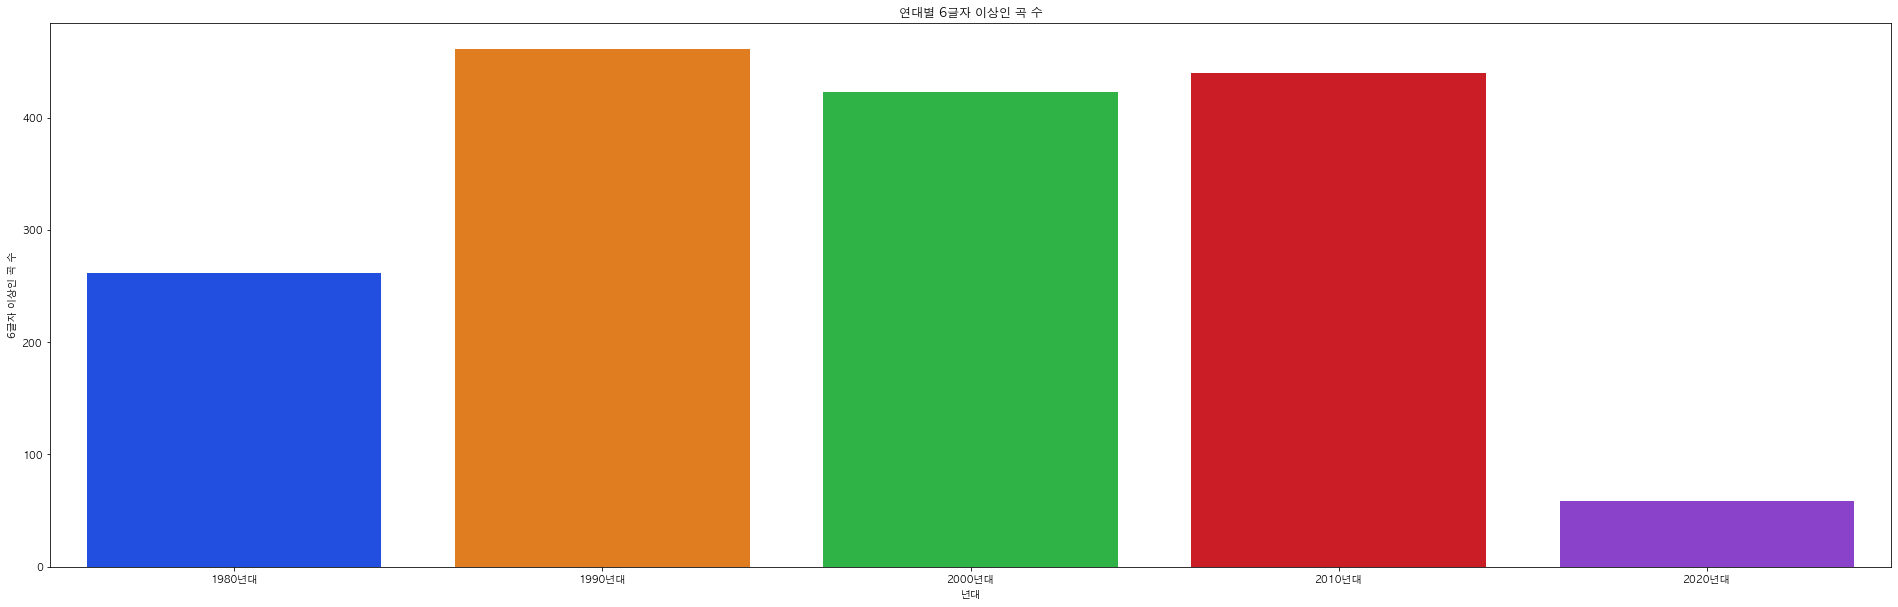

In [62]:
# 시각화
plt.figure(figsize=(33, 10))
plt.title('연대별 6글자 이상인 곡 수')
sns.set_palette("bright")
sns.barplot(data=six_len, x='년대', y='6글자 이상인 곡 수')

전체년도 평균 곡 제목 수였던 6글자를 넘은 곡의 수는 top100 차트 안의 곡에서는 1990년대가 가장 많은 것으로 나타났다.

### 최근 10년간 차트에 오른 곡들의 평균 곡 제목 수

In [63]:
recently_title_len_count = pd.DataFrame(melon_df[(melon_df['연도'] >= 2010) & (melon_df['연도'] <= 2020)].groupby('연도')['곡제목수'].mean().reset_index())

In [64]:
recently_title_len_count

연도  곡제목수
0   2010.0  5.94
1   2011.0  6.06
2   2012.0  6.07
3   2013.0  5.70
4   2014.0  5.39
5   2015.0  5.13
6   2016.0  5.58
7   2017.0  5.56
8   2018.0  5.22
9   2019.0  6.52
10  2020.0  7.27

<AxesSubplot:title={'center':'최근 10년간 차트에 오른 곡들의 평균 곡 제목 수'}, xlabel='연도', ylabel='곡제목수'>

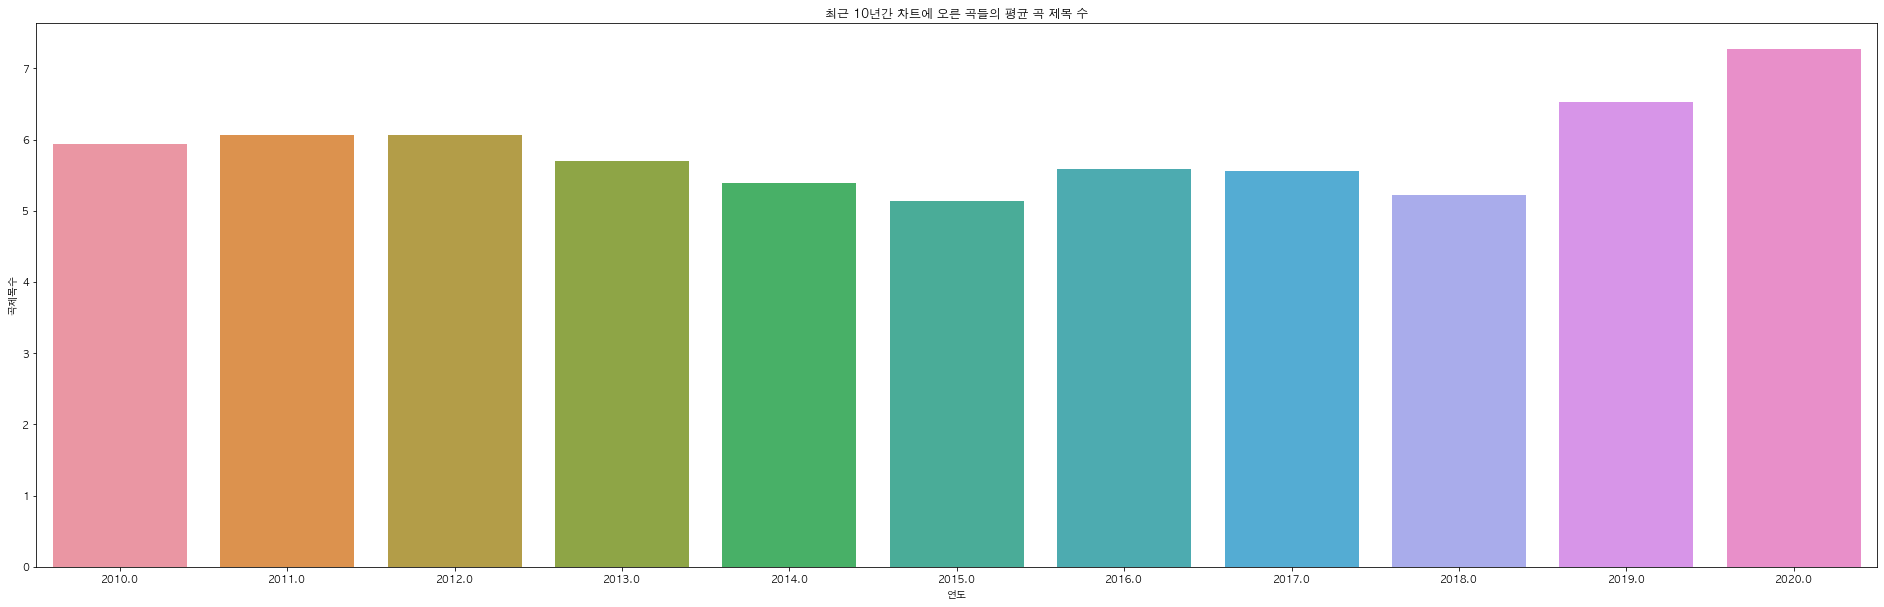

In [65]:
# 시각화
plt.figure(figsize=(33, 10))
ax=plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.title('최근 10년간 차트에 오른 곡들의 평균 곡 제목 수')
sns.set_palette("bright")
sns.barplot(data=recently_title_len_count, x='연도', y='곡제목수')

* 최근 10년간 차트에 오른 곡들을 살펴보면 2010년대는 오히려 곡 제목수가 짧은게 트렌드였음을 확인 할 수 있다. 
* 뒷받침하는 기사: https://news.sbs.co.kr/news/endPage.do?news_id=N1002417879
* 최근에서야 다시 곡 제목수가 길어지는 추세이다.

In [66]:
# 여성 댄스 그룹
female_dance_group = melon_df[(melon_df['성별'] == '여성') & (melon_df['솔로/그룹'] == '그룹') & (melon_df['장르'] == '댄스')]

In [67]:
# 여성 댄스 그룹이 전체 평균 곡 제목 수
female_dance_group['곡제목수'].mean()

6.156626506024097

In [68]:
# 여성 댄스 그룹의 연도별 평균 곡 제목 수
pd.DataFrame(female_dance_group.groupby('연도')['곡제목수'].mean().reset_index())

연도       곡제목수
0   1996.0   2.000000
1   1997.0   3.000000
2   1998.0   8.800000
3   1999.0   8.800000
4   2000.0   2.750000
5   2001.0   3.666667
6   2002.0   1.500000
7   2003.0   4.000000
8   2005.0   7.000000
9   2006.0  13.000000
10  2007.0   5.250000
11  2008.0   6.066667
12  2009.0   5.807692
13  2010.0   6.038462
14  2011.0   6.962963
15  2012.0   7.125000
16  2013.0   5.230769
17  2014.0   5.833333
18  2015.0   5.812500
19  2016.0   6.285714
20  2017.0   5.714286
21  2018.0   6.333333
22  2019.0   6.833333
23  2020.0   7.416667

<AxesSubplot:title={'center':'연도별 여성 댄스 그룹의 곡 제목 수 boxplot'}, xlabel='연도', ylabel='곡제목수'>

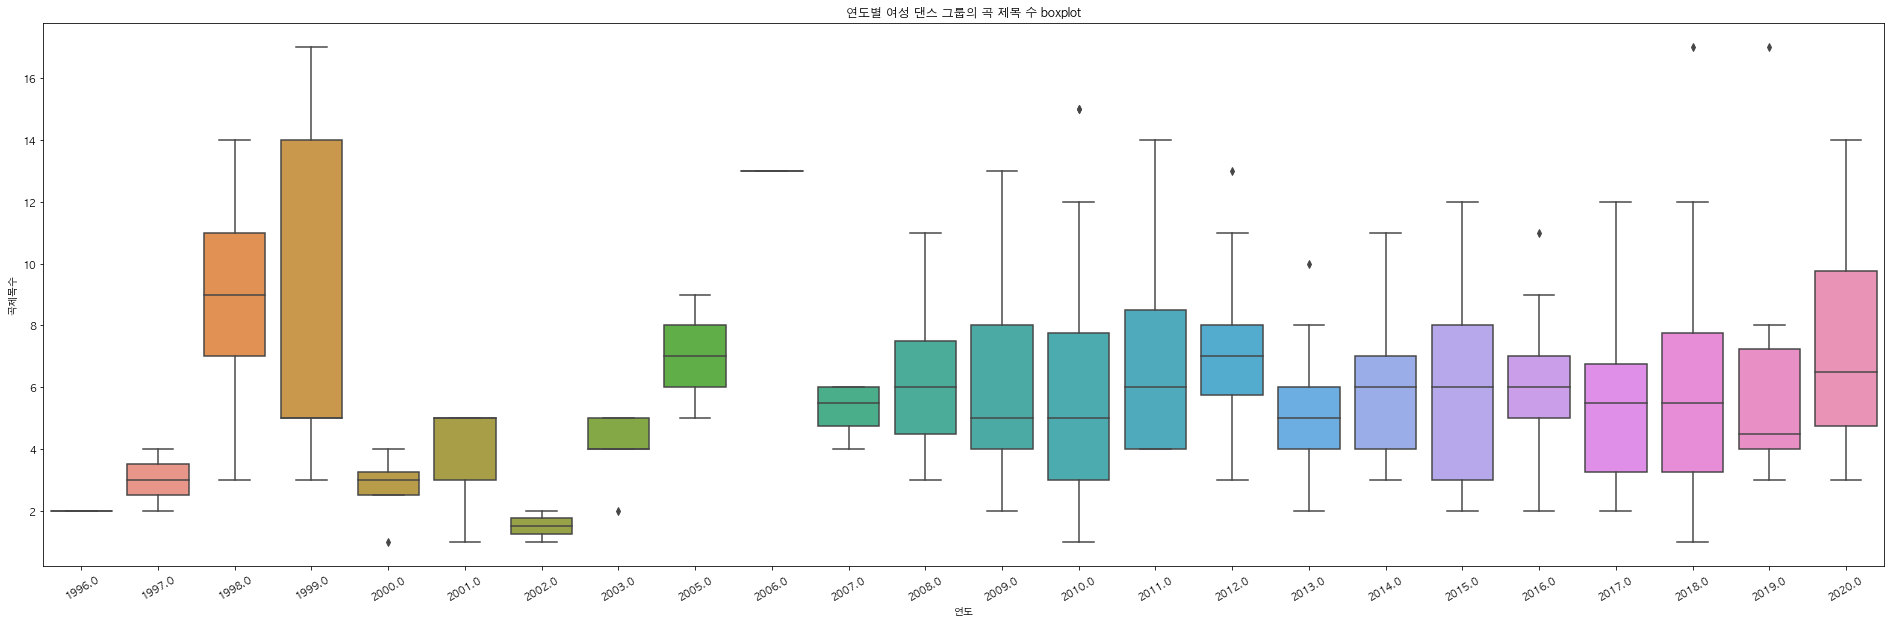

In [69]:
# 평균으로만 보는 것은 오류가 있을 수 있으므로 boxplot으로도 시각화

plt.figure(figsize=(33, 10))
plt.xticks(rotation = 30)
plt.title('연도별 여성 댄스 그룹의 곡 제목 수 boxplot')
sns.boxplot(data=female_dance_group, x='연도', y='곡제목수')

<AxesSubplot:title={'center':'최근 10년 여성 댄스 그룹의 곡 제목 수 boxplot'}, xlabel='연도', ylabel='곡제목수'>

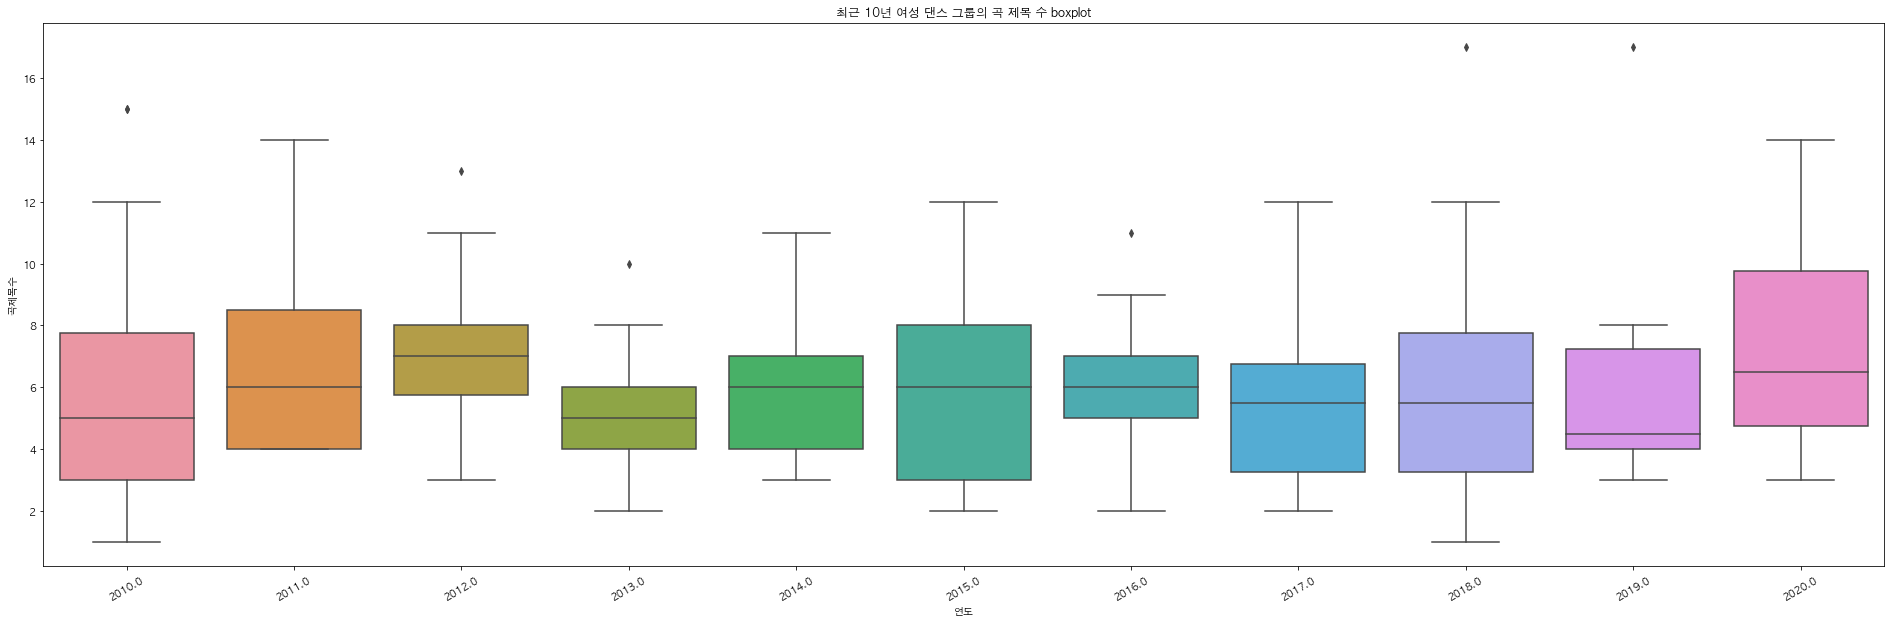

In [70]:
# 최근 10년으로 시각화
plt.figure(figsize=(33, 10))
plt.xticks(rotation = 30)
plt.title('최근 10년 여성 댄스 그룹의 곡 제목 수 boxplot')
sns.boxplot(data=female_dance_group[female_dance_group['연도'] >= 2010], x='연도', y='곡제목수')

전체년도 곡 제목 평균과 비슷하게 확실히 최근으로 갈수록 곡 제목수의 범위가 넓어지고 있다.

### 곡 제목 수도 순위와 상관이 있을까?

In [71]:
corr = melon_df.corr()

<AxesSubplot:>

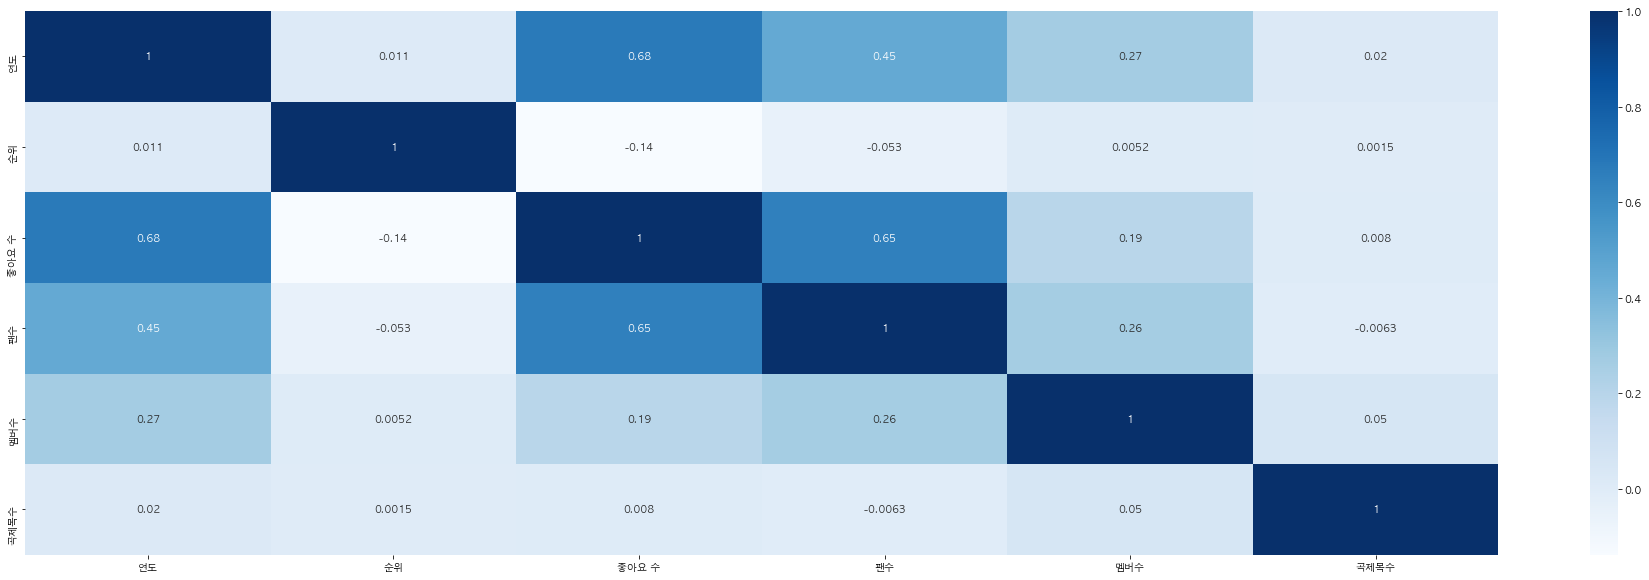

In [72]:
plt.figure(figsize = (33,10))
sns.set_palette("bright")
sns.heatmap(corr, annot=True, cmap='Blues')

곡 제목 수가 연도별로 다르지만 이것이 순위와 상관은 없는것으로 보인다. 결국 순위를 의식해서 곡 제목 수가 늘어났다기 보다는 사회적인 유행이 곡 제목 수에 영향을 준 것으로 추측된다.

-------------------------------------

## 4. 작사/작곡/편곡 분석
* 종합차트에서 인기있는 작사/작곡/편곡가 (가장 핫한 작사/작곡/편곡가는 누구?)
* 여자아이돌 곡을 담당하는 작사/작곡/편곡가
* 좋아요 수와 작사/작곡/편곡가

### 종합차트에서 인기있는 작사/작곡/편곡가 (가장 핫한 작사/작곡/편곡가는 누구?)
* 최근 10년간 차트에 오른 빈도수가 높은 작사/작곡/편곡가 top20
* 1위를 등극시킨 빈도가 높은 작사/작곡/편곡가는?

In [6]:
# 데이터 다시 로드
df = pd.read_csv('/Users/cj/Desktop/개인/project/멜론/Realfinal.csv', encoding='utf-8-sig')
df.shape

(3682, 17)

In [7]:
# 시대별 최근 10년간 차트에 오른 빈도수가 높은 작사/작곡/편곡가 top20
# 최근10년 작사가의 빈도수
dfdf = df[(df["연도"]>= 2011) & (df["연도"]<=2020)]["작사"].value_counts().drop('Nan').to_frame().reset_index().rename(columns={"index" : "작사가","작사":"작사수"}).head(20)
# 최근10년 작곡가의 빈도수
dfdf2 = df[(df["연도"]>= 2011) & (df["연도"]<=2020)]["작곡"].value_counts().drop('Nan').to_frame().reset_index().rename(columns={"index" : "작곡가","작곡":"작곡수"}).head(20)
# 최근10년 편곡가의 빈도수
dfdf3 = df[(df["연도"]>= 2011) & (df["연도"]<=2020)]["편곡"].value_counts().drop('Nan').to_frame().reset_index().rename(columns={"index" : "편곡가","편곡":"편곡수"}).head(20)

<AxesSubplot:title={'center':'최근 10년간 히트곡을 낸 작사가 20명'}, xlabel='작사가', ylabel='작사수'>

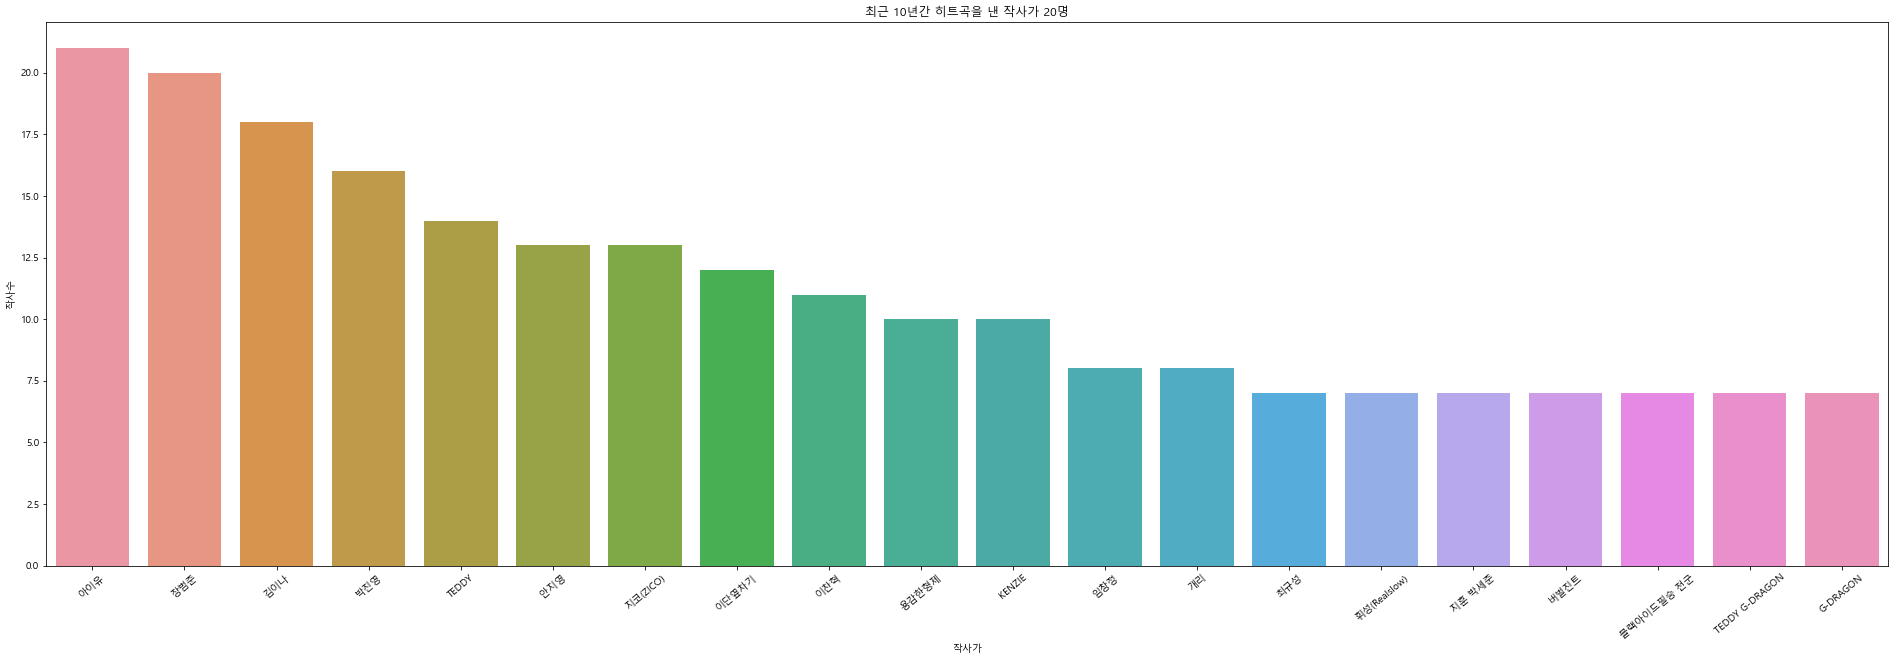

In [8]:
# 시각화
plt.figure(figsize=(33,10))
plt.xticks(rotation = 40 )
plt.title("최근 10년간 히트곡을 낸 작사가 20명")
sns.barplot(x="작사가", y="작사수", data=dfdf)

<AxesSubplot:title={'center':'최근 10년간 히트곡을 낸 작곡가 20명'}, xlabel='작곡가', ylabel='작곡수'>

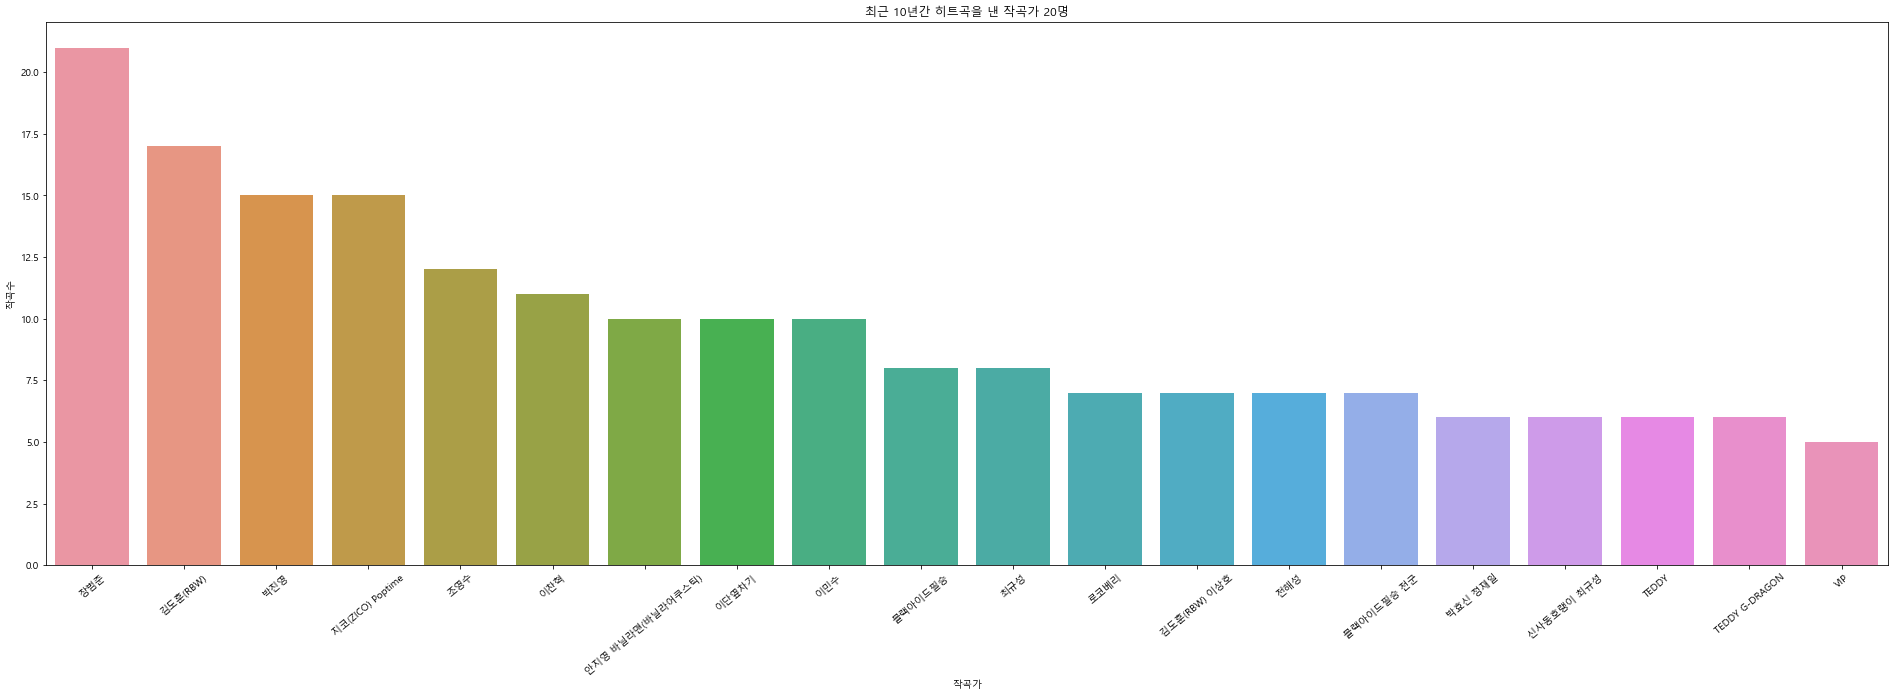

In [9]:
plt.figure(figsize=(33,10))
plt.xticks(rotation = 40 )
plt.title("최근 10년간 히트곡을 낸 작곡가 20명")
sns.barplot(x="작곡가", y="작곡수", data=dfdf2)

<AxesSubplot:title={'center':'최근 10년간 히트곡을 낸 편곡가 20명'}, xlabel='편곡가', ylabel='편곡수'>

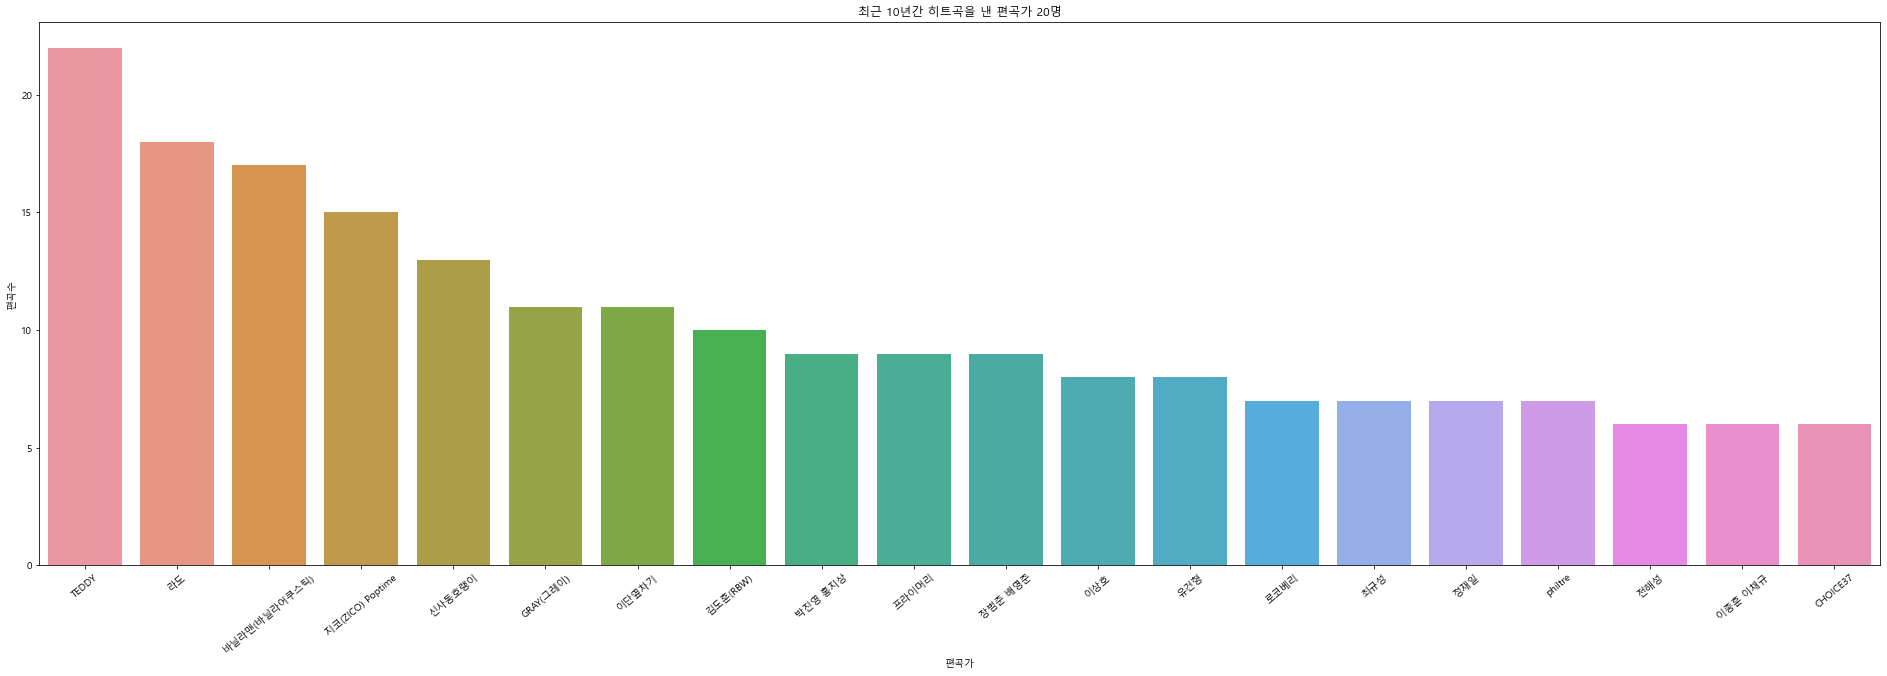

In [10]:
plt.figure(figsize=(33,10))
plt.xticks(rotation = 40 )
plt.title("최근 10년간 히트곡을 낸 편곡가 20명")
sns.barplot(x="편곡가", y="편곡수", data=dfdf3)

* 멜론 TOP100의 최근10년(2011년 ~ 2020년)데이터에서 가장 많은 성과를 낸 작업자들의 빈도수가 위와 같이 보여지고 있다.

In [11]:
# 1위를 등극시킨 빈도가 많은 작사/작곡/편곡가는?
a = df[df["순위"] == 1][["작사","연도"]].value_counts().to_frame().reset_index()
b = df[df["순위"] == 1][["작곡","연도"]].value_counts().to_frame().reset_index()
c= df[df["순위"] == 1][["편곡","연도"]].value_counts().to_frame().reset_index()

In [12]:
# 1위를 등극시킨 작사가의 빈도
a

작사      연도  0
0                                  한동준  1993.0  1
1                                  박경진  2003.0  1
2                               다이나믹듀오  2013.0  1
3                                  노영심  1990.0  1
4                                  남민설  2005.0  1
5                                  김창환  1995.0  1
6                                  김창환  1994.0  1
7                                  김진룡  1989.0  1
8                         김종진(봄여름가을겨울)  1992.0  1
9                                  김영아  2002.0  1
10                                 김수철  1984.0  1
11                                 강은경  2000.0  1
12                                 강은경  1999.0  1
13                                 강은경  1997.0  1
14                TEDDY G-DRAGON T.O.P  2015.0  1
15                            SamLewis  2016.0  1
16                        B.I BOBBY 못말  2018.0  1
17  민연재 Xepy 에스나(eSNa) 릴보이(lIlBOI) 정기고  2014.0  1
18                                 박성식  1988.0  1
19                                 한경혜  2001.0  1
20                                 박진영  2008.0  1
21                            지코(ZICO)  2020.0  1
22                                 주영훈  1998.0  1
23                           조pd(ZoPD)  2004.0  1
24                                 장제훈  1985.0  1
25                      이트라이브(E-TRIBE)  2009.0  1
26                                  이적  1996.0  1
27                                 이영훈  1987.0  1
28                                 이미나  2017.0  1
29                                 이광조  1986.0  1
30                                 오태호  1991.0  1
31                                 안영민  2007.0  1
32                                 안영민  2006.0  1
33                             싸이(PSY)  2012.0  1
34                              신사동호랭이  2011.0  1
35                                 박진영  2010.0  1
36                                2soo  2019.0  1

In [13]:
# 1위를 등극시킨 작곡가의 빈도
b

작곡      연도  0
0                       한동준  1993.0  1
1                       박성식  1988.0  1
2                      로코베리  2017.0  1
3                       노영심  1990.0  1
4                       김창환  1995.0  1
5                       김창환  1994.0  1
6                       김진룡  1989.0  1
7              김종진(봄여름가을겨울)  1992.0  1
8                       김수철  1984.0  1
9   김도훈(RBW) Xepy 에스나(eSNa)  2014.0  1
10                      김도훈  2005.0  1
11           TEDDY G-DRAGON  2015.0  1
12             SigurdRosnes  2002.0  1
13               Papertonic  2000.0  1
14               Papertonic  1999.0  1
15               Papertonic  1997.0  1
16         B.I MILLENNIUM 승  2018.0  1
17                      박근태  2004.0  1
18                      박진영  2008.0  1
19                 프라이머리 개코  2013.0  1
20                      박진영  2010.0  1
21         지코(ZICO) Poptime  2020.0  1
22                      주영훈  1998.0  1
23                      조영수  2007.0  1
24                      조영수  2006.0  1
25                      이현정  2003.0  1
26           이트라이브(E-TRIBE)  2009.0  1
27                      이태열  1986.0  1
28                      이주호  1985.0  1
29                       이적  1996.0  1
30                      이영훈  1987.0  1
31                       윤건  2001.0  1
32                      오태호  1991.0  1
33              싸이(PSY) 유건형  2012.0  1
34                   신사동호랭이  2011.0  1
35                  블랙아이드필승  2016.0  1
36                     2soo  2019.0  1

In [14]:
# 1위를 등극시킨 편곡가의 빈도
c

편곡      연도  0
0                홍지상 박진영  2008.0  1
1                박진영 홍지상  2010.0  1
2                   로코베리  2017.0  1
3                     라도  2016.0  1
4           김종진(봄여름가을겨울)  1992.0  1
5                    김우진  1995.0  1
6                    김수철  1984.0  1
7                    김명곤  1987.0  1
8   김도훈(RBW) 서용배(TENTEN)  2014.0  1
9                    김도훈  2005.0  1
10                   김건모  1994.0  1
11                   곽영준  2003.0  1
12                 TEDDY  2015.0  1
13            Papertonic  2000.0  1
14            Papertonic  1999.0  1
15                   Nan  1989.0  1
16            MILLENNIUM  2018.0  1
17                   박성식  1988.0  1
18                   변성룡  1990.0  1
19                 프라이머리  2013.0  1
20                신사동호랭이  2011.0  1
21                   최태완  1997.0  1
22      지코(ZICO) Poptime  2020.0  1
23                   주영훈  1998.0  1
24                   조영수  2007.0  1
25                   조영수  2006.0  1
26                   조동익  1993.0  1
27        이트라이브(E-TRIBE)  2009.0  1
28                   이태열  1986.0  1
29                   이주호  1985.0  1
30                    이적  1996.0  1
31                    이온  2004.0  1
32                    윤건  2001.0  1
33                   유건형  2012.0  1
34                   오태호  1991.0  1
35                   안익수  2002.0  1
36                  2soo  2019.0  1

### 여자아이돌 곡을 담당하는 작사/작곡/편곡가
* 여자댄스그룹에서 좋은 성과를 내었던 작사/작곡/편곡가는 어떠한 사람들이 있을까?
* 연도별 여자댄스그룹의 곡을 작업한 사람들의 추이는 어떠할까?
* 여자댄스그룹의 1위등극시킨 빈도가 잦은 작업자들은 어떠한 사람들이 있을까?
* 이 그룹이 해당 작사/작곡/편곡가가 아닌 다른 작업자와 협업했을 때의 순위는?
*1. 좋은시너지로 꾸준한 성과를 내고있던 트와이스가 블랙아이드필승 작업자와 작업유무에 따른 순위비교, 
*2. 좋은시너지로 꾸준한 성과를 내고있던 마마무가 김도훈 작업자와 작업유무에 따른 순위비교

In [15]:
# 여자댄스그룹 에서 인기 있는 작사/작곡/편곡가는?
a1 = df[(df["성별"] == "여성") & (df["솔로/그룹"]=="그룹") & (df["장르"] == "댄스")]["작사"].value_counts().drop("Nan").head(10).to_frame().reset_index().rename(columns={"index":"작사가","작사":"빈도수"})
b1 = df[(df["성별"] == "여성") & (df["솔로/그룹"]=="그룹") & (df["장르"] == "댄스")]["작곡"].value_counts().drop("Nan").head(10).to_frame().reset_index().rename(columns={"index":"작곡가","작곡":"빈도수"})
c1 = df[(df["성별"] == "여성") & (df["솔로/그룹"]=="그룹") & (df["장르"] == "댄스")]["편곡"].value_counts().drop("Nan").head(10).to_frame().reset_index().rename(columns={"index":"편곡가","편곡":"빈도수"})

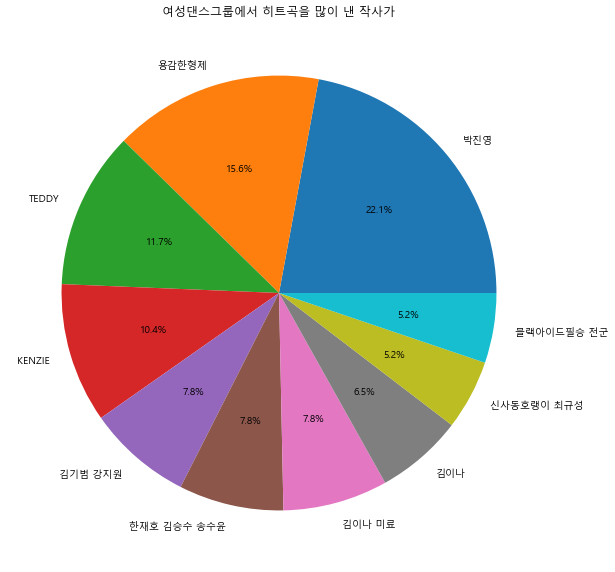

In [16]:
# 시각화
ratio = a1["빈도수"]
labels = a1["작사가"]

plt.figure(figsize=(10,10))
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.title('여성댄스그룹에서 히트곡을 많이 낸 작사가')
plt.show()

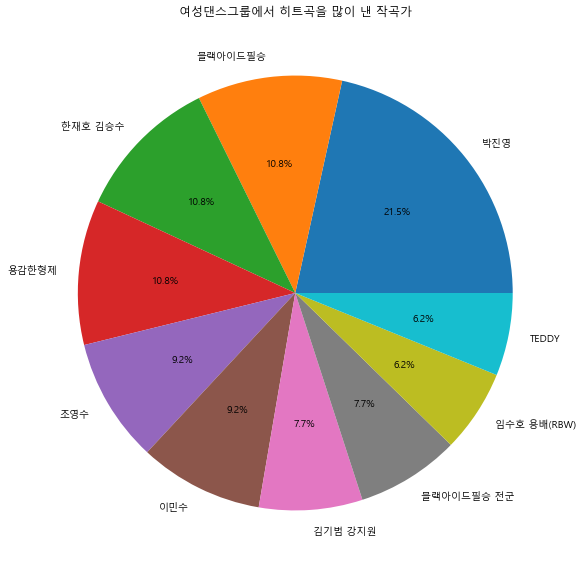

In [17]:
ratio1 = b1["빈도수"]
labels1 = b1["작곡가"]

plt.figure(figsize=(10,10))
plt.pie(ratio1, labels=labels1, autopct='%.1f%%')
plt.title('여성댄스그룹에서 히트곡을 많이 낸 작곡가')
plt.show()

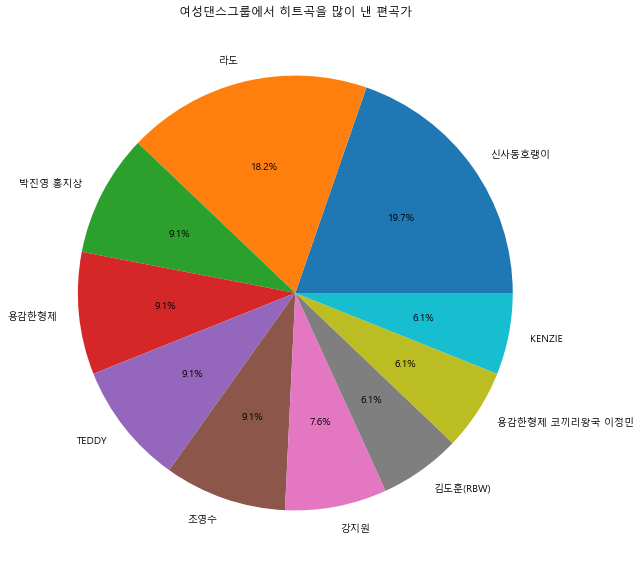

In [18]:
ratio2 = c1["빈도수"]
labels2 = c1["편곡가"]

plt.figure(figsize=(10,10))
plt.pie(ratio2, labels=labels2, autopct='%.1f%%')
plt.title('여성댄스그룹에서 히트곡을 많이 낸 편곡가')
plt.show()

* 작사가
    * 1위 박진영 2위 용감한형제 3위 TEDDY
* 작곡가
    * 1위 박진영 2위 용감한형제 3위 블랙아이드필승
* 편곡가
    * 1위 신사동호랭이 2위 라도 3위 용감한형제
* 위의 3개 차트를 기반으로 협업자들을 선정한다면 신인 그룹의 첫 기반을 다지는데에 큰 도움이 될 수 있을 것 같다.

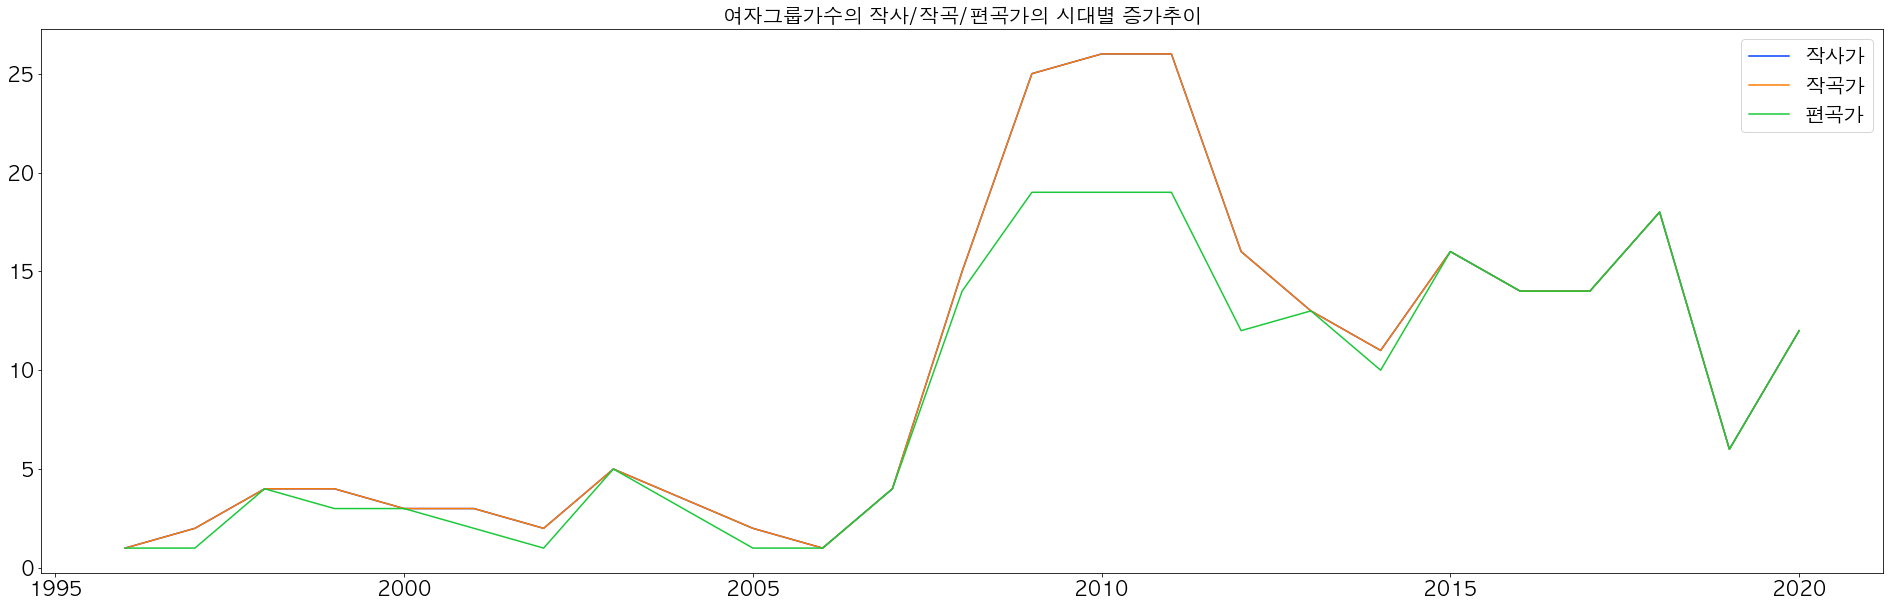

In [322]:
# 여자그룹의 댄스곡을 작사/작곡/편곡했던 사람 중 시대별로 인기있었던 작사/작곡/편곡가 (차트에 곡이 많은것이 인기의 기준)
a = df[(df["성별"] == "여성") & (df["솔로/그룹"] == "그룹") & (df["장르"] == "댄스")].groupby("연도")["작사"].value_counts()
b = df[(df["성별"] == "여성") & (df["솔로/그룹"] == "그룹") & (df["장르"] == "댄스")].groupby("연도")["작곡"].value_counts()
c = df[(df["성별"] == "여성") & (df["솔로/그룹"] == "그룹") & (df["장르"] == "댄스")].groupby("연도")["편곡"].value_counts()

a = a.to_frame().rename(columns={"작사":"작사수"}).reset_index()
a = a[a["작사"] != 'Nan']
a = a.groupby("연도").sum()

b = b.to_frame().rename(columns={"작곡":"작곡수"}).reset_index()
b = b[b["작곡"] != 'Nan']
b = b.groupby("연도").sum()

c = c.to_frame().rename(columns={"편곡":"편곡수"}).reset_index()
c = c[c["편곡"] != 'Nan']
c = c.groupby("연도").sum()

# 시각화
fig = plt.figure(figsize=(33,10)) ## 캔버스 생성

fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(a,label='작사가') ## 선그래프 생성
ax.plot(b,label='작곡가') 
ax.plot(c,label='편곡가') 

ax.legend() ## 범례
plt.title('여자그룹가수의 작사/작곡/편곡가의 시대별 증가추이',fontsize=20) ## 타이틀 설정
plt.show()

* 작사가 / 작곡가의 데이터가 동일하여 선차트가 겹쳐져 작사가가 차트에 표기되지 않음
* 1984년 ~ 2020년 기간동안 여자댄스그룹의 작사/작곡/편곡가의 인원수 추세가 나타나있다. 2007년부로 급상승추세가 보여지고 있고 여자댄스그룹 붐이 일어났을 것으로 보여지고 2013년에 조금씩 하락하며 열기가 식고 있는것으로 나타타진다.

In [84]:
# 여자댄스그룹 중 1위를 많이 차지한 작사/작곡/편곡가는?
temp = df[(df["성별"] == "여성") & (df["솔로/그룹"] == "그룹") & (df["순위"] == 1) & (df["장르"] == "댄스")]["작사"].value_counts()
temp = temp.to_frame().reset_index().rename(columns={"index" :"작사가"})
temp2 = df[(df["성별"] == "여성") & (df["솔로/그룹"] == "그룹") & (df["순위"] == 1) & (df["장르"] == "댄스")]["작곡"].value_counts()
temp2 = temp2.to_frame().reset_index().rename(columns={"index" :"작곡가"})
temp3 = df[(df["성별"] == "여성") & (df["솔로/그룹"] == "그룹") & (df["순위"] == 1) & (df["장르"] == "댄스")]["편곡"].value_counts()
temp3 = temp3.to_frame().reset_index().rename(columns={"index" :"편곡가"})

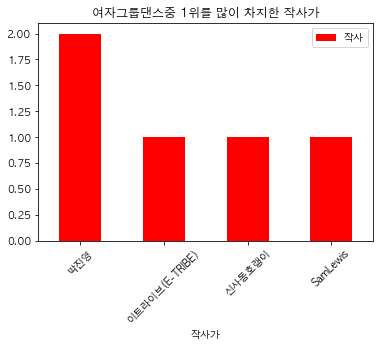

In [85]:
# 시각화
temp.plot(kind = "bar",x="작사가",y="작사",color="r")
plt.title("여자그룹댄스중 1위를 많이 차지한 작사가")
plt.xticks(rotation=45)
plt.show()

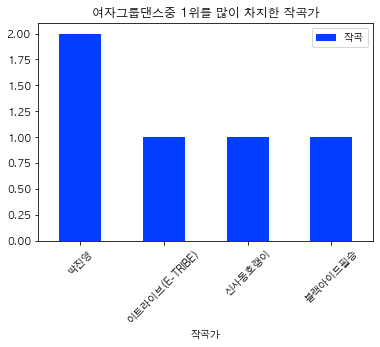

In [86]:
temp2.plot(kind = "bar",x="작곡가",y="작곡")
plt.title("여자그룹댄스중 1위를 많이 차지한 작곡가")
plt.xticks(rotation=45)
plt.show()

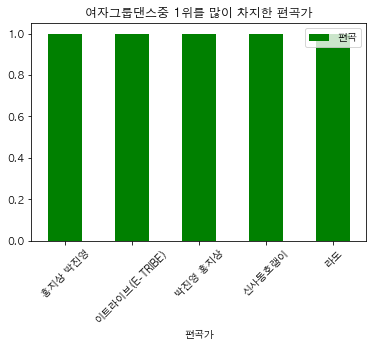

In [87]:
temp3.plot(kind = "bar",x="편곡가",y="편곡",color="g")
plt.title("여자그룹댄스중 1위를 많이 차지한 편곡가")
plt.xticks(rotation=45)
plt.show()

* 여자댄스그룹을 가장 많이 1위로 등극시킨 사람들로는 다음과 같은 작업자들이 보여지고 있다.

In [19]:
# 여그룹의 곡 중 '댄스' 장르를 작사/작곡/편곡했던 사람 중 시대별 or 최근 10년간 인기있었던 작사/작곡/편곡가
q = df[(df["성별"] =="여성") & (df["솔로/그룹"] == "그룹") & (df["장르"] == "댄스") & (df["연도"] >= 2011) & (df["연도"] <= 2020)][["연도","작사"]]
w = df[(df["성별"] =="여성") & (df["솔로/그룹"] == "그룹") & (df["장르"] == "댄스") & (df["연도"] >= 2011) & (df["연도"] <= 2020)][["연도","작곡"]]
e = df[(df["성별"] =="여성") & (df["솔로/그룹"] == "그룹") & (df["장르"] == "댄스") & (df["연도"] >= 2011) & (df["연도"] <= 2020)][["연도","편곡"]]
q = q[q["작사"] != "Nan"]
w = w[w["작곡"] != "Nan"]
e = e[e["편곡"] != "Nan"]
q = q.value_counts().to_frame().sort_values("연도").rename(columns={0: "횟수"})
w = w.value_counts().to_frame().sort_values("연도").rename(columns={0: "횟수"})
e = e.value_counts().to_frame().sort_values("연도").rename(columns={0: "횟수"})

In [20]:
# 최근 10년간 여성댄스그룹 작사가
q

횟수
연도     작사                                             
2011.0 김기범 강지원                                       4
       이트라이브(E-TRIBE)                                1
       유영진                                           1
       원태연                                           1
       안영민 김태현 조영수                                   1
...                                                 ..
2020.0 별들의전쟁(GALACTIKA*)                             1
       김도훈(RBW) 박우상 화사(HwaSa)                        1
       TEDDY LØREN 지수(JISOO) 제니(JENNIE) DannyChung   1
       전소연                                           1
       TEDDY DannyChung                              1

[119 rows x 1 columns]

In [21]:
# 최근 10년간 여성댄스그룹 작곡가
w

횟수
연도     작곡                                                    
2011.0 김기범 강지원                                              4
       한재호 김승수                                              1
       이트라이브(E-TRIBE)                                       1
       신사동호랭이 최규성                                           1
       신사동호랭이                                               1
...                                                        ..
2020.0 TEDDY 24 제니(JENNIE) BrianLee LeahHaywood R.Tee ...   1
       TEDDY R.Tee 24                                       1
       UzoechiEmenike JustinTranter JuliaMichaels Zara...   1
       별들의전쟁(GALACTIKA*) 우빈(GALACTIKA*)                     1
       블랙아이드필승 전군                                           2

[124 rows x 1 columns]

In [22]:
# 최근 10년간 여성댄스그룹 편곡가
e

횟수
연도     편곡                                                    
2011.0 DaishiDance                                          1
       TEDDY                                                3
       강지원                                                  3
       KENZIE                                               1
       김태현 조영수                                              1
...                                                        ..
2020.0 라도                                                   2
       MNEK J.Y.Park`TheAsiansoul` 이해솔                      1
       PopTime 전소연                                          1
       RyanS.Jhun CelineSvanback ChloeLatimer JeppeLon...   1
       Druski 유영진                                           1

[114 rows x 1 columns]

* 최근 10년(2011 ~ 2020) 여자댄스그룹의 작업자들의 빈도수 차이는 크게 나타나지 않는 것으로 보여진다.

In [323]:
# 이 그룹이 해당 작사/작곡/편곡가가 아닌 다른 작곡가와 협업했을 때의 순위는?
# 특정 가수들과의 시너지로 좋은 성과를 내었던 트와이스가 블랙아이드필승 작업자와 협업유무에 따른 순위,
# 마마무가 김도훈 작업자와 협업하지 않았을 때의 순위 등

a = df[(df["가수"] == "TWICE (트와이스)") & (df["작사"].str.contains("블랙아이드필승"))][["작사","순위"]].value_counts().to_frame().reset_index().rename(columns={"순위":"작사순위"}).drop(0,axis=1)
b = df[(df["가수"] == "TWICE (트와이스)") & (df["작곡"].str.contains("블랙아이드필승"))][["작곡","순위"]].value_counts().to_frame().reset_index().rename(columns={"순위":"작곡순위"}).drop(0,axis=1)
c = df[(df["가수"] == "TWICE (트와이스)") & (df["편곡"].str.contains("블랙아이드필승"))][["편곡","순위"]].value_counts().to_frame().reset_index().rename(columns={"순위":"편곡순위"}).drop(0,axis=1)
nota = df[(df["가수"] == "TWICE (트와이스)") & (~df["작사"].str.contains("블랙아이드필승"))][["작사","순위"]].value_counts().to_frame().reset_index().rename(columns={"순위":"작사순위"}).drop(0,axis=1)
notb = df[(df["가수"] == "TWICE (트와이스)") & (~df["작곡"].str.contains("블랙아이드필승"))][["작곡","순위"]].value_counts().to_frame().reset_index().rename(columns={"순위":"작곡순위2"}).drop(0,axis=1)
notc = df[(df["가수"] == "TWICE (트와이스)") & (~df["편곡"].str.contains("블랙아이드필승"))][["편곡","순위"]].value_counts().to_frame().reset_index().rename(columns={"순위":"편곡순위"}).drop(0,axis=1)


d = df[(df["가수"] == "마마무 (Mamamoo)") & (df["작사"].str.contains("김도훈"))][["작사","순위"]].value_counts().to_frame().reset_index().rename(columns={"순위":"작사순위"}).drop(0,axis=1)
e = df[(df["가수"] == "마마무 (Mamamoo)") & (df["작곡"].str.contains("김도훈"))][["작곡","순위"]].value_counts().to_frame().reset_index().rename(columns={"순위":"작곡순위"}).drop(0,axis=1)
f = df[(df["가수"] == "마마무 (Mamamoo)") & (df["편곡"].str.contains("김도훈"))][["편곡","순위"]].value_counts().to_frame().reset_index().rename(columns={"순위":"편곡순위"}).drop(0,axis=1)
notd = df[(df["가수"] == "마마무 (Mamamoo)") & (~df["작사"].str.contains("김도훈"))][["작사","순위"]].value_counts().to_frame().reset_index().rename(columns={"순위":"작사순위"}).drop(0,axis=1)
note = df[(df["가수"] == "마마무 (Mamamoo)") & (~df["작곡"].str.contains("김도훈"))][["작곡","순위"]].value_counts().to_frame().reset_index().rename(columns={"순위":"작곡순위2"}).drop(0,axis=1)
notf = df[(df["가수"] == "마마무 (Mamamoo)") & (~df["편곡"].str.contains("김도훈"))][["편곡","순위"]].value_counts().to_frame().reset_index().rename(columns={"순위":"편곡순위"}).drop(0,axis=1)

In [23]:
# 전처리 테스트
# abc = pd.concat([b,notb],axis=1)
# abc2 = pd.concat([f,notf],axis=1)
# abc2

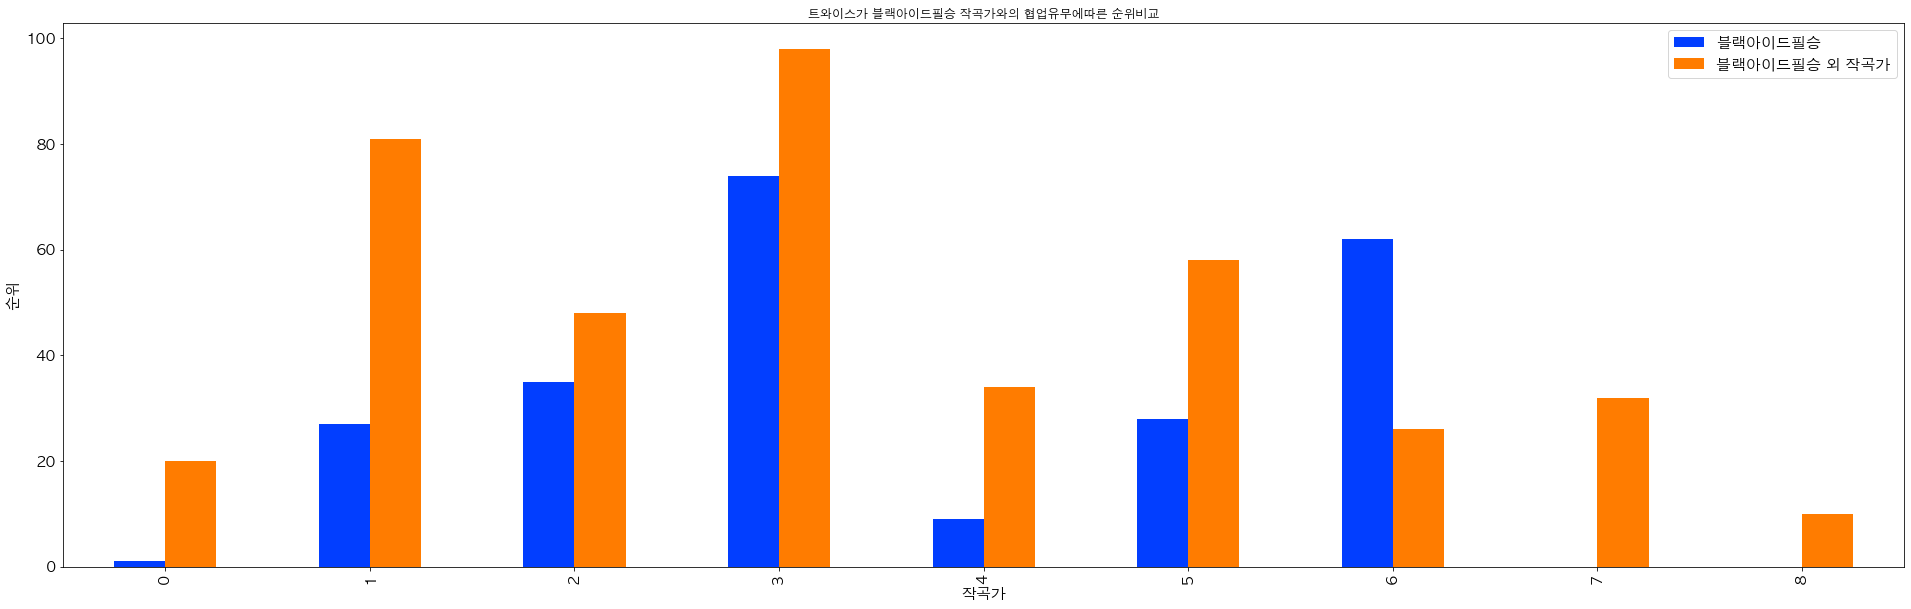

In [91]:
# 시각화
ax = abc.plot(kind='bar', title='트와이스가 블랙아이드필승 작곡가와의 협업유무에따른 순위비교', figsize=(33, 10), legend=True, fontsize=15)
ax.set_xlabel('작곡가', fontsize=15)          # x축 정보 표시
ax.set_ylabel('순위', fontsize=15)     # y축 정보 표시
ax.legend(['블랙아이드필승', '블랙아이드필승 외 작곡가'], fontsize=15)    # 범례 지정

* 트와이스의 TOP100에 올랐던 노래중 시너지가 좋은 블랙아이드필승과 작업하였을때의 곡순위와 그외의 작업자들의과 작업하였을때의 곡순위를 비교해 보았다. 블랙아이드필승과 작업한 곡의 순위가 그렇지 않을때보다 상대적으로 높은것으로 보여지고 있다. (차트의 높이가 낮을수록 순위가 높음)

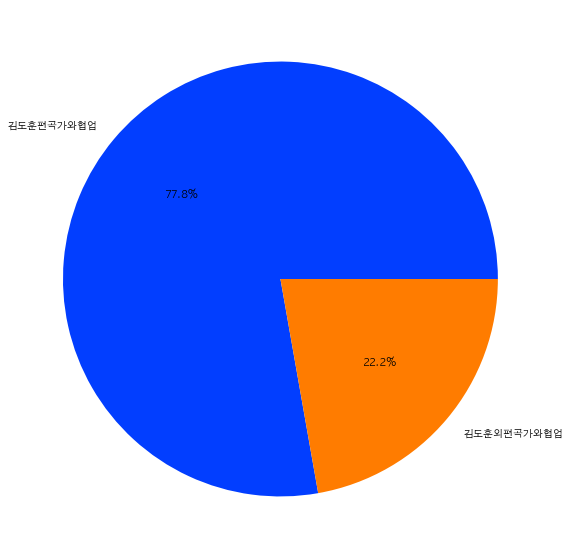

In [92]:
ratio = [f["편곡"].shape[0],notf["편곡"].shape[0]]
labels = ["김도훈편곡가와협업","김도훈외편곡가와협업"]

plt.figure(figsize=(10,10))
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

* 멜론 TOP100에 오른 마마무의 곡들중 시너지가 좋은 김도훈 작업자와의 곡과 그외의 작업자들과의 곡의 점유율을 나타내는 차트이다.
* 시너지가 좋은 작업자와 함께 하였을 때 TOP100의 점유율이 3.5배 더 높은것으로 나타나고 있다.

블랙아이드필승과 트와이스, 김도훈 프로듀서와 마마무는 좋은 시너지를 내는 협업 파트너이다. 트와이스는 블랙아이드필승과 작업하였을 때의 곡 순위가 그렇지 않을 때보다 상대적으로 더 좋은 성과가 나타났으며, 마마무 역시 좋은 파트너인 김도훈 프로듀서와 작업하였을 때가 훨씬 더 높은 비율로 좋은 성과를 내었다.

결과적으로 데뷔할 신인 걸그룹 역시 지속적으로 이러한 시너지를 낼 수 있는 협업자들을 선정해 작업을 한다면 좋은 성과를 낼 수 있을 것이다.

### 좋아요 수와 작사/작곡/편곡가
* 최근 10년동안 (2011년 ~ 2020년) 좋아요 수가 많은(10만개이상) 곡의 작사/작곡/편곡가는 어떠한 사람들이 있을까?
* 여자댄스그룹 장르의 좋아요 수가 많은 노래의 작사/작곡/편곡가는 누구?

In [24]:
# 최근 10년 (2011년 ~ 2020년) 동안 좋아요수를 많이 받은 작업자들은 어떠한 사람들이 있을까?
# 좋아요 수가 많은 기준은 10만개 이상
new = df[(df["연도"] >= 2011) & (df["연도"] <= 2020) & (df["좋아요 수"] >= 100000)][["연도","작사","작곡","편곡"]]
new

연도                                                 작사  \
2685  2011.0                                            최규성 용준형   
2689  2011.0                                                김이나   
2700  2011.0                                                윤사라   
2718  2011.0                                                김이나   
2740  2011.0                                                김이나   
...      ...                                                ...   
3673  2020.0                 창모(CHANGMO) HashSwan ASHISLAND 김효은   
3675  2020.0                                             지훈 박세준   
3676  2020.0  RM MattThomson MaxLynedochGraham RyanLawrie El...   
3677  2020.0                                             KENZIE   
3679  2020.0                                                 폴킴   

                                                     작곡                 편곡  
2685                                                최규성                최규성  
2689                                                이민수                Nan  
2700                                                윤일상                Nan  
2718                                                 윤상                Nan  
2740                                                이민수                Nan  
...                                                 ...                ...  
3673                                         Cashbanger         Cashbanger  
3675                                                밍지션                밍지션  
3676  RM MattThomson MaxLynedochGraham RyanLawrie El...                Nan  
3677        JoshCumbee AfshinSalmani AndrewAllen KENZIE  KENZIE NONFICTION  
3679                                                 폴킴               조셉케이  

[541 rows x 4 columns]

* 가수의 곡 좋아요 수가 10만개 이상인 작업자들을 탐색해 보았다.

In [94]:
# 여그룹의 '댄스' 장르의 좋아요 수를 많이 획득하게 해준 작사/작곡/편곡가는 누구? (상위 10명)
a = df[(df["성별"] == "여성") & (df["솔로/그룹"] == "그룹") & (df["장르"] == "댄스") & (df["좋아요 수"] >= 100000)]["작사"].value_counts().to_frame().reset_index().rename(columns={"index":"작사가명","작사":"횟수"}).head(10)
b = df[(df["성별"] == "여성") & (df["솔로/그룹"] == "그룹") & (df["장르"] == "댄스") & (df["좋아요 수"] >= 100000)]["작곡"].value_counts().to_frame().reset_index().rename(columns={"index":"작곡가명","작곡":"횟수"}).head(10)#.rename("index":"작곡가명","작곡":"횟수")
c = df[(df["성별"] == "여성") & (df["솔로/그룹"] == "그룹") & (df["장르"] == "댄스") & (df["좋아요 수"] >= 100000)]["편곡"].value_counts().to_frame().reset_index().rename(columns={"index":"편곡가명","편곡":"횟수"}).head(10)#.rename("index":"편곡가명","편곡":"횟수")

In [95]:
# 여자댄스그룹의 좋아요 10만개 이상의 빈도수가 높은 작사가 상위 10명
a

작사가명  횟수
0                              KENZIE   5
1                            SamLewis   4
2                         임수호 용배(RBW)   4
3                                 박진영   4
4                                 조윤경   3
5                               TEDDY   3
6                          블랙아이드필승 전군   3
7                   별들의전쟁(GALACTIKA*)   3
8  김도훈(RBW) 솔라(마마무) 문별(마마무) 화사(HwaSa)   3
9                 TEDDY 브라더수 CHOICE37   2

In [96]:
# 여자댄스그룹의 좋아요 10만개 이상의 빈도수가 높은 작곡가 상위 10명
b

작곡가명  횟수
0                                        임수호 용배(RBW)   4
1                                            블랙아이드필승   4
2                                         블랙아이드필승 전군   4
3                                                박진영   3
4                                           김도훈(RBW)   3
5           AlbiAlbertsson BelleHumble MarkusLindell   2
6  AnneJudithWik JonatanGusmark LudvigEvers Cazzi...   2
7                                DavidAmber AndyLove   2
8                         DanielCaesar LudwigLindell   2
9                       TEDDY FUTUREBOUNCE LydiaPaek   2

In [97]:
# 빈도수가 높은 편곡가 상위 10명
c

편곡가명  횟수
0                                        라도   9
1                                    신사동호랭이   4
2                               임수호 용배(RBW)   4
3                JonatanGusmark LudvigEvers   3
4                              김도훈(RBW) 박우상   3
5                               Caesar&Loui   2
6                                  김도훈(RBW)   2
7                                DavidAmber   2
8  AlbiAlbertsson BelleHumble MarkusLindell   2
9                             박진영 김승수 아르마딜로   2

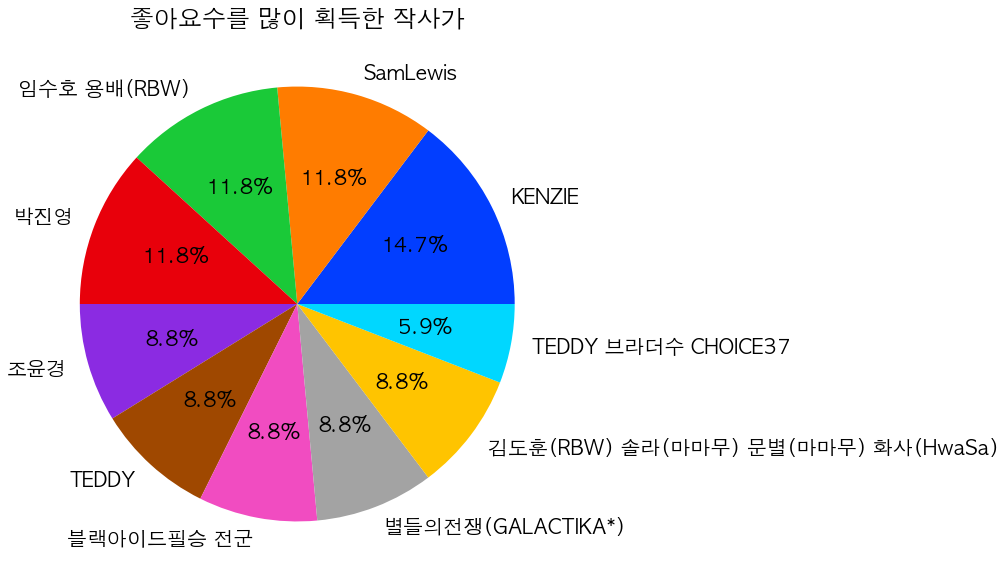

In [101]:
ratio = a["횟수"]
labels = a["작사가명"]

plt.figure(figsize=(10,10))
plt.rc('xtick', labelsize=20)
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.title('좋아요수를 많이 획득한 작사가')
plt.show()

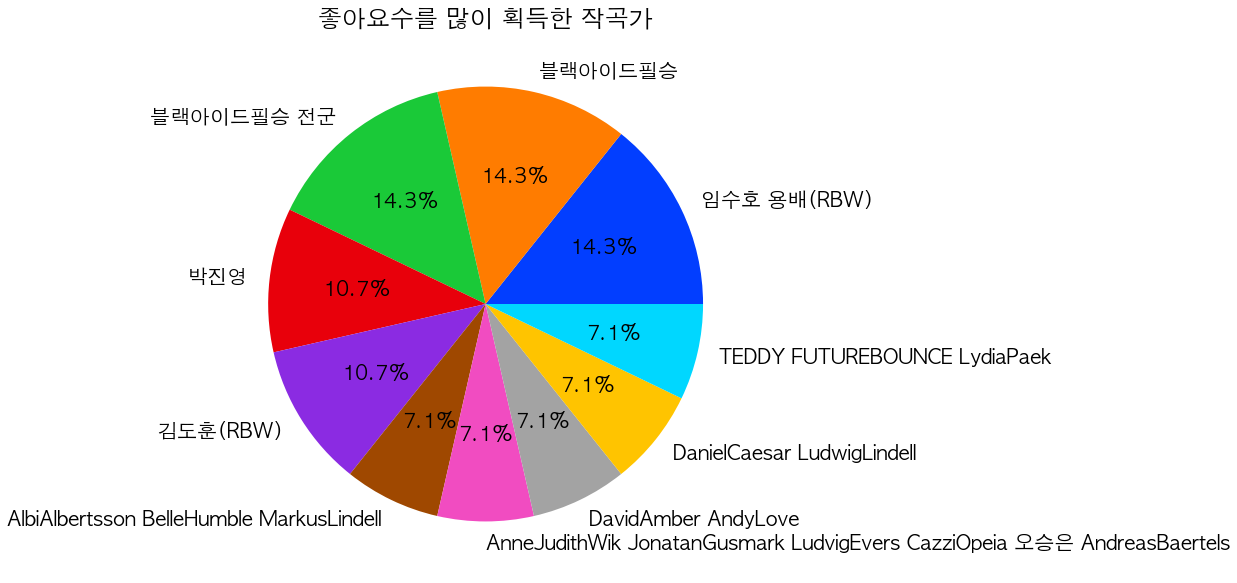

In [102]:
ratio = b["횟수"]
labels = b["작곡가명"]

plt.figure(figsize=(10,10))
plt.rc('xtick', labelsize=20)
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.title('좋아요수를 많이 획득한 작곡가')
plt.show()

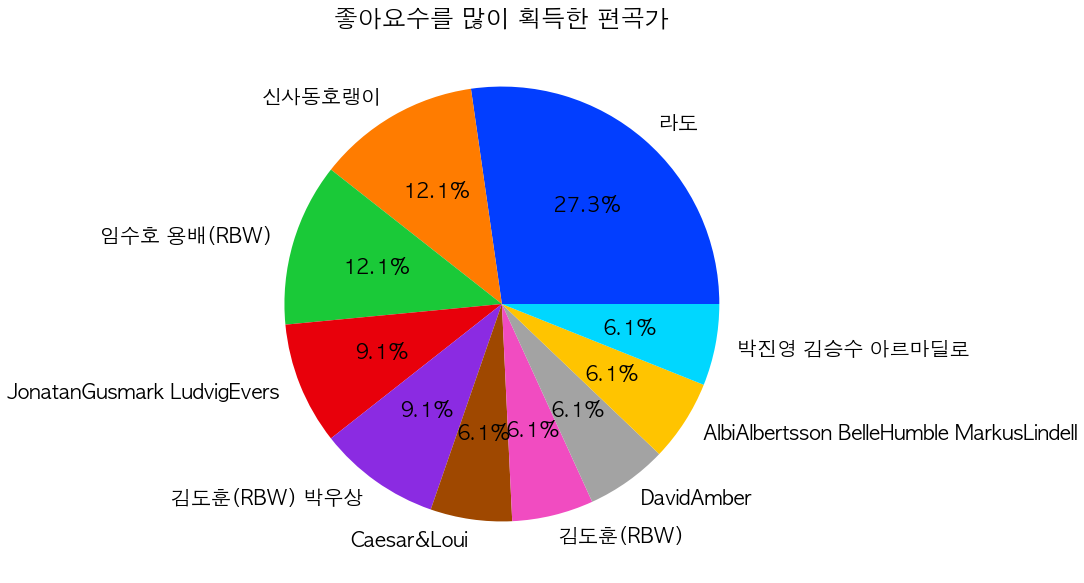

In [103]:
ratio = c["횟수"]
labels = c["편곡가명"]

plt.figure(figsize=(10,10))
plt.rc('xtick', labelsize=20)
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.title('좋아요수를 많이 획득한 편곡가')
plt.show()

상위 10명의 작사 / 작곡 / 편곡가를 분석 해본 결과,

작사가에서는 KENZIE, 박진영, 임수호&용배(RBW)

작곡가에서는 임수호&용배(RBW), 블랙아이드필승 전군, 박진영 

편곡가에는 라도, 신사동호랭이, 임수호&용배(RBW)

위의 프로듀서들이 작사 / 작곡 / 편곡에서 좋아요 순 Top3 로 나타났다.

그러므로 위의 Top 3 프로듀서들과 작업을 한다면 차후 팬층확보와 적극적인 지지를 얻을 수 있을 것이라 예상이 된다.

### 작사 / 작곡 / 편곡 분석 결론
>우선순위 선정 기준 (임의의 가설설정,통계x)
    
    1. 종합부문에서 빈도수가 높았던 작업자들은 가수의 성별,솔로/그룹,장르 등 피처 구분없이 가장실력검증이 된사람이다.(어떠한 가수들과 협업을 하여도 앨범을 성공시킬 확률이 높다) 
            * 가장 큰범주에서 증명된 작업자로 판단하여 1순위 선정
            
    2. 여자댄스그룹 부문에서 빈도수가 높았던 작업자들은 여자댄스그룹을 성공시킨 경험이 많은 실력이 검증된 사람들이다.(프로젝트 컨셉과 일치하기에 다른 여자댄스그룹을 런칭할때도 성공할 확률이 높다고 예상) 
            * 프로젝트 컨셉과 일치하는 피처들로 선정하였지만 1순위보다는 더 적은 범주로 구분지었다 판단하여 2순위 선정
                        
    3. 여자댄스그룹의 좋아요를 많이(10만개이상) 받게한 작업자들은 팬들의 참여,지지율을 많이받게해준 작업자들이다.  
            * 좋아요를 통해 참여,지지율의 장점은 있으나 신규여자댄스그룹 런칭에서는 가장 적은 범주로 판단하여 3순위 선정


        * 1984년도 ~ 2020년도 데이터를 기준으로
        * 1순위 시각화시 사용 컬럼 => 작사 , 작곡 , 편곡
        * 2순위 시각화시 사용 컬럼 => 성별 , 장르 , 솔로/그룹 , 작사 , 작곡 , 편곡
        * 3순위 시각화시 사용 컬럼 => 성별 , 장르 , 솔로/그룹 , 좋아요 수 , 작사/작곡 , 편곡
        * 컬럼을 적게사용할수록 더 큰 범주에서 영향력을 보였던 사람들이라고 판단하였고 우선순위를 위와같이 설정 

작사 / 작곡 / 편곡 결론

    * 1순위(종합부문 상위 곡 기준): TEDDY / TEDDY / TEDDY
    
    * 2순위(여자댄스그룹 중 상위 곡 기준): 용감한형제 / 용감한형제 / 용감한형제
    
    * 3순위(좋아요 수가 많은 기준): 임수호&용배(RBW) / 임수호&용배(RBW) / 임수호&용배(RBW)

부가적으로, 정해질 컨셉에 따라 해당 프로듀서들을 고려해볼 수 있다.                       

    * 걸크러시 컨셉으로 간다면 1순위인 TEDDY 추천 

    * 청량으로 간다면 2순위인 용감한형제 추천 

    * 청순으로 간다면 3순위인 임수호&용배(RBW)를 추천

-------------------------------------

## 5. 가사분석
 ### 시대별 top100 차트에 오른 가사
   ** 가사의 2글자 이상인 명사만 추출하여 곡의 컨셉이나 주제를 분석해보자
 
   * 여성 그룹 가사
   * 여성 그룹 연대별 가사
   * 여성 댄스 그룹 가사
   * 여성 댄스 그룹 연대별 가사
   * 여성 댄스 그룹 멤버수 4명 가사
   * 작사가와 가사
   * 여성 댄스 그룹 순위별 가사

In [104]:
# 데이터셋 다시 로드
melon_df = pd.read_csv('/Users/cj/Desktop/개인/project/멜론/Realfinal.csv', encoding = 'utf-8')

In [105]:
# 기본 데이터 셋을 유지한채 melon 이라는 데이터 셋 복사본 생성
melon = melon_df.copy()

In [106]:
# 연도 컬럼 datetime 형태로 변경
melon['연도'] = pd.to_datetime(melon['연도'],format='%Y')

### '전체년도', '여성', '그룹' 가사분석

In [107]:
# melon 이용해서 '여성', '그룹'만 필터링
df_여성그룹 = melon[(melon['성별'] == '여성') & (melon['솔로/그룹'] =='그룹')]

In [108]:
df_여성그룹["가사"].to_csv('df_여성그룹.txt', sep = '\t', index = False, header = None)

/Users/cj/opt/anaconda3/envs/nano/lib/python3.8/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


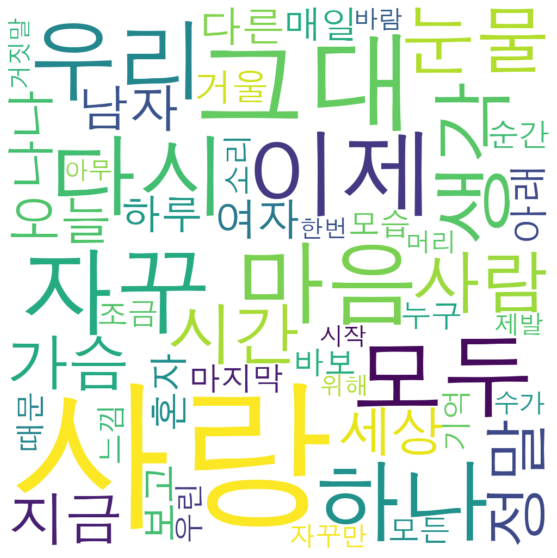

In [109]:
### df_여성그룹 워드클라우드 시각화


f = open('df_여성그룹.txt', "r", encoding='utf-8')
lines = f.read()
from konlpy.tag import Twitter
nlpy = Twitter()
nouns = nlpy.nouns(lines)
# 두 글자 이상 단어만 추출
words = []
for n in nouns:
    if len(n) > 1:
        words.append(n)
# 단어 빈도수 계산하여 상위 50건만 추출
count = Counter(words)
most = count.most_common(50)
tags = {}
for n, c in most:
    tags[n] = c
wc = WordCloud(font_path= 
               # 윈도우일 경우
               # 'C:/Windows/Fonts/gulim.ttc',
               # 맥일 경우, 
               '/Library/Fonts/AppleGothic.ttf',
                background_color="white",
                width=1000,
                height=1000,
                max_words=50,
                max_font_size=300)
wc = wc.generate_from_frequencies(tags)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig('wc여성그룹.png')
plt.show()

In [110]:
# 2글자 이상의 가사 빈도수
tags

{'사랑': 928,
 '그대': 309,
 '자꾸': 233,
 '이제': 228,
 '마음': 213,
 '모두': 211,
 '다시': 206,
 '하나': 204,
 '우리': 201,
 '생각': 181,
 '눈물': 177,
 '사람': 174,
 '시간': 169,
 '정말': 163,
 '가슴': 163,
 '지금': 161,
 '세상': 145,
 '오늘': 138,
 '남자': 133,
 '나나': 129,
 '여자': 123,
 '다른': 118,
 '하루': 109,
 '혼자': 104,
 '아래': 104,
 '보고': 99,
 '매일': 93,
 '거울': 89,
 '마지막': 89,
 '바보': 85,
 '모습': 84,
 '모든': 83,
 '기억': 82,
 '순간': 81,
 '소리': 81,
 '때문': 80,
 '누구': 76,
 '조금': 75,
 '느낌': 74,
 '우린': 74,
 '자꾸만': 74,
 '수가': 72,
 '머리': 71,
 '제발': 69,
 '위해': 67,
 '바람': 66,
 '시작': 63,
 '거짓말': 63,
 '한번': 62,
 '아무': 62}

(array([   0.,  200.,  400.,  600.,  800., 1000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

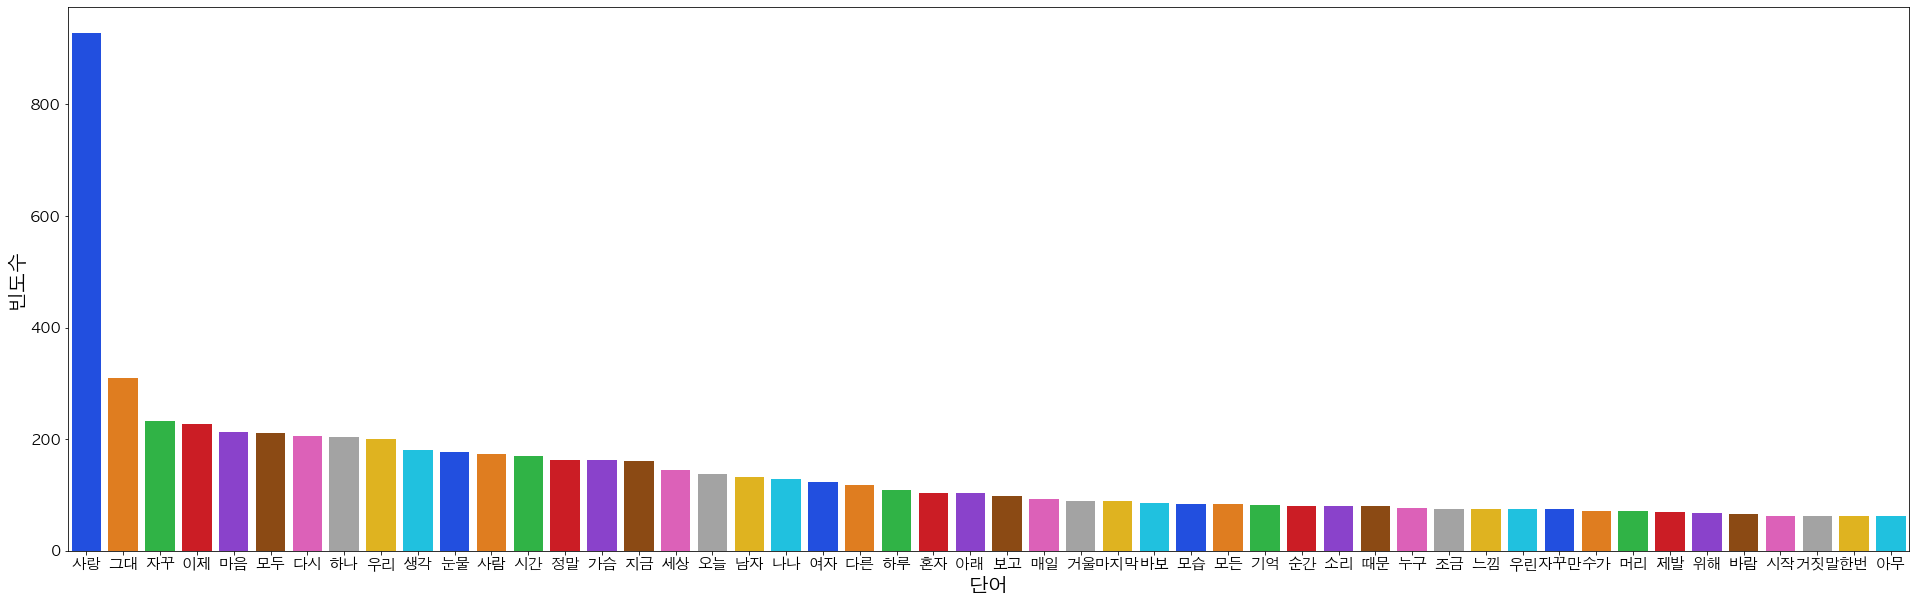

In [111]:
# barchart로 시각화
df여성그룹 = pd.DataFrame(most)
df여성그룹.columns = ["단어" , "빈도수"]
plt.rcParams['figure.figsize'] = [33, 10]
sns.barplot(data = df여성그룹 , x = "단어", y = "빈도수", palette = sns.color_palette("bright"))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

### 여성 그룹 연대별 가사
* df_8489 - ’1984-1989’ 연도 묶음
* df_9099 - ’1990-1999’ 연도 묶음
* df_0009 - ’2000-2009’ 연도 묶음
* df_1020 - ’2010-2020’ 연도 묶음

In [112]:
# 84-89년도 여성 그룹
df_8489 = df_여성그룹[(df_여성그룹['연도'].dt.year >= 1984) & (df_여성그룹['연도'].dt.year <= 1989)]

In [113]:
df_8489

연도  순위       제목      가수                             앨범  좋아요 수  \
61  1984-01-01  62   하루에 한번  윤희와 윤미  하루에 한번 / 철없는 작별 / 사랑에 깊이 빠졌어요    5.0   
425 1988-01-01  43  난 아직도 널   작품 하나               87 MBC 대학가요제 제1집  273.0   
578 1989-01-01  96     히말라야      이브                            Eve    6.0   

            발매일    장르                                                 가사  \
61   1984.06.10  성인가요  하루에 한번 만날 때는 달콤한 시간 너무 짧아 아쉬운 마음 버릴 수 없네 하루에 한...   
425  1988.01.09   발라드  거리를 나 혼자 걸었네 내게는 아무도 없었네 차가운 바람 불때면 내 마음 왠지 쓸쓸...   
578  1988.08.30  록/메탈  눈 덮힌 산 바람 불어도 하얗게 빛나는 히말라야 외로워도 늘 말이없어 어둠이 깔려도...   

       팬수  멤버수 솔로/그룹  성별   작사   작곡   편곡  
61    5.0  2.0    그룹  여성  Nan  Nan  Nan  
425  33.0  2.0    그룹  여성  김휘원  김휘원  이기범  
578  29.0  4.0    그룹  여성  Nan  Nan  Nan

In [114]:
# 90-99년도 여성 그룹
df_9099 = df_여성그룹[(df_여성그룹['연도'].dt.year >= 1990) & (df_여성그룹['연도'].dt.year <= 1999)]

In [115]:
# 00-09년도 여성 그룹
df_0009 = df_여성그룹[(df_여성그룹['연도'].dt.year >= 2000) & (df_여성그룹['연도'].dt.year <= 2009)]

In [116]:
# 10-20년도 여성 그룹
df_1020 = df_여성그룹[(df_여성그룹['연도'].dt.year >= 2010) & (df_여성그룹['연도'].dt.year <= 2020)]

In [117]:
# 해당 데이터셋 text 파일로 저장
df_8489["가사"].to_csv('df_8489.txt', sep = '\t', index = False, header = None)
df_9099["가사"].to_csv('df_9099.txt', sep = '\t', index = False, header = None)
df_0009["가사"].to_csv('df_0009.txt', sep = '\t', index = False, header = None)
df_1020["가사"].to_csv('df_1020.txt', sep = '\t', index = False, header = None)

/Users/cj/opt/anaconda3/envs/nano/lib/python3.8/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


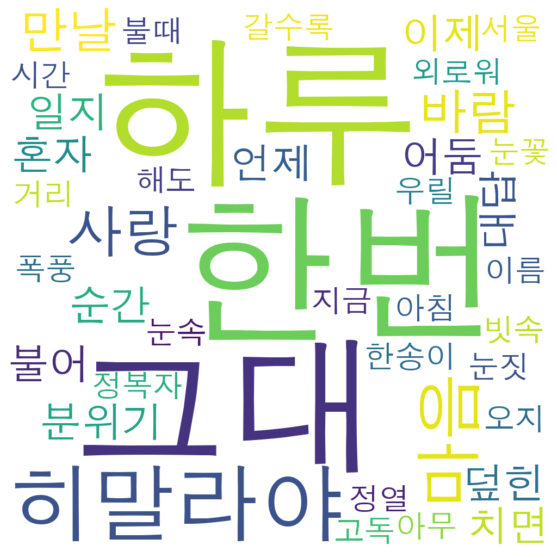

In [118]:
# 해당 데이터 셋 명사 추출 및 시각화
# 84~89년도 여성 그룹 워드 클라우드

f = open('df_8489.txt', "r", encoding='utf-8')
lines = f.read()
from konlpy.tag import Twitter
nlpy = Twitter()
nouns = nlpy.nouns(lines)
# 두 글자 이상 단어만 추출
words = []
for n in nouns:
    if len(n) > 1:
        words.append(n)
# 단어 빈도수 계산하여 상위 50건만 추출
count = Counter(words)
most = count.most_common(50)
tags = {}
for n, c in most:
    tags[n] = c
wc = WordCloud(font_path= 
#                'C:/Windows/Fonts/gulim.ttc',
               # 맥일 경우, 
               '/Library/Fonts/AppleGothic.ttf',
                background_color="white",
                width=1000,
                height=1000,
                max_words=50,
                max_font_size=300)
wc = wc.generate_from_frequencies(tags)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig('wc그룹8489.png')
plt.show()

In [119]:
# 2글자 이상 단어 빈도수
tags

{'하루': 12,
 '한번': 12,
 '그대': 10,
 '히말라야': 10,
 '마음': 6,
 '사랑': 4,
 '만날': 3,
 '바람': 3,
 '순간': 2,
 '언제': 2,
 '분위기': 2,
 '이제': 2,
 '혼자': 2,
 '어둠': 2,
 '치면': 2,
 '일지': 2,
 '덮힌': 2,
 '불어': 2,
 '대답': 2,
 '시간': 1,
 '눈짓': 1,
 '해도': 1,
 '거리': 1,
 '아무': 1,
 '불때': 1,
 '갈수록': 1,
 '빗속': 1,
 '외로워': 1,
 '우릴': 1,
 '정열': 1,
 '폭풍': 1,
 '오지': 1,
 '눈속': 1,
 '한송이': 1,
 '이름': 1,
 '고독': 1,
 '정복자': 1,
 '지금': 1,
 '서울': 1,
 '눈꽃': 1,
 '아침': 1}

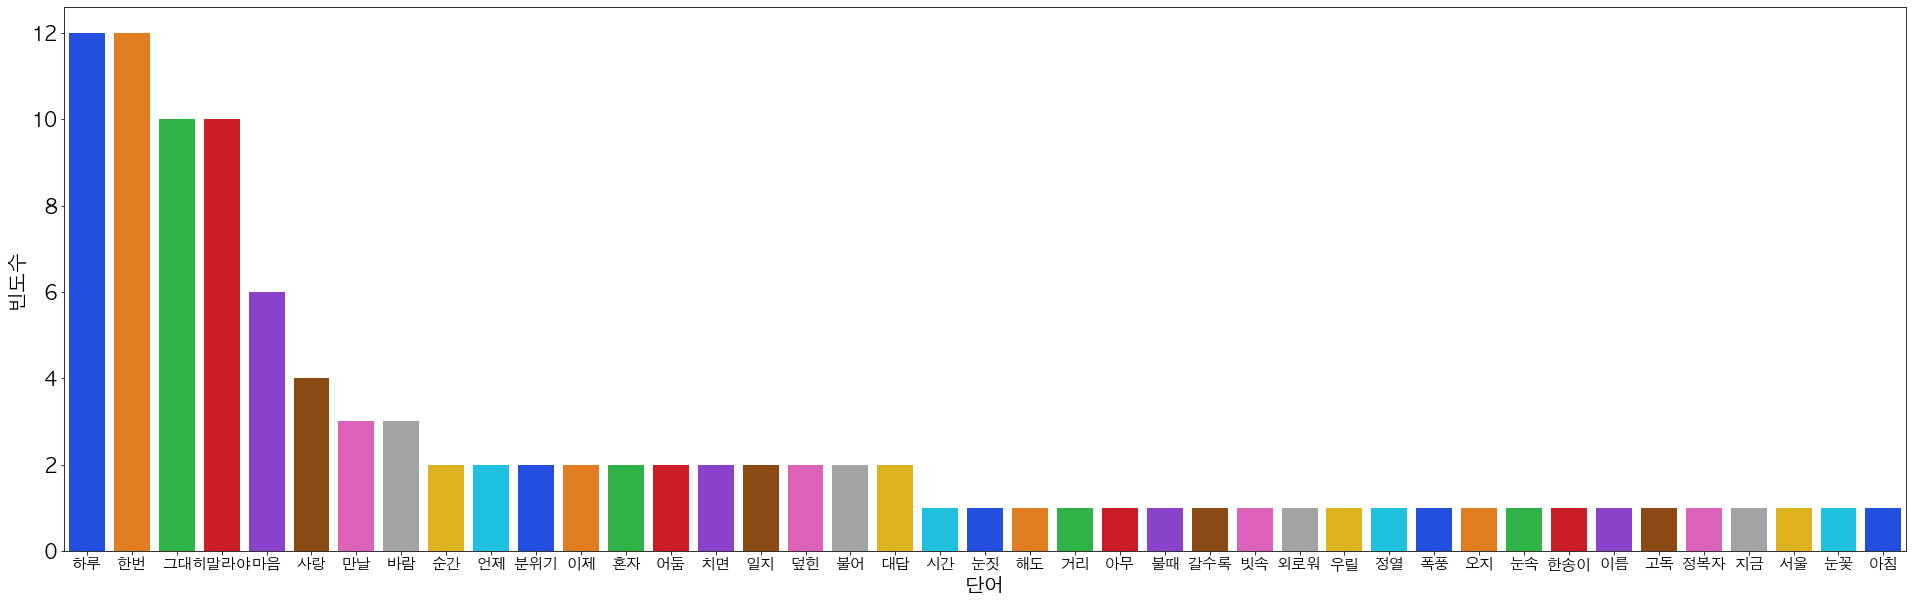

In [120]:
# barchart로 시각화
df8489 = pd.DataFrame(most)
df8489.columns = ["단어" , "빈도수"]
sns.barplot(data = df8489 , x = "단어", y = "빈도수", palette = sns.color_palette("bright"))
plt.xticks(fontsize = 15) 
plt.rcParams['figure.figsize'] = [33, 10]
plt.savefig('그룹8489.png')

/Users/cj/opt/anaconda3/envs/nano/lib/python3.8/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


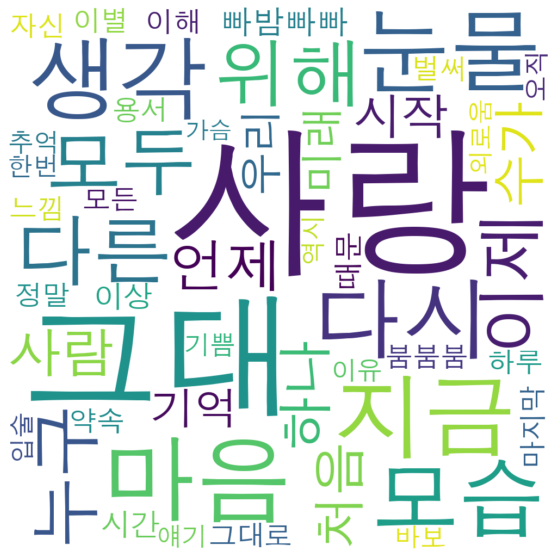

In [121]:
# 90~99년도 여성 그룹 워드 클라우드

### df_9099


f = open('df_9099.txt', "r", encoding='utf-8')
lines = f.read()
from konlpy.tag import Twitter
nlpy = Twitter()
nouns = nlpy.nouns(lines)
# 두 글자 이상 단어만 추출
words = []
for n in nouns:
    if len(n) > 1:
        words.append(n)
# 단어 빈도수 계산하여 상위 50건만 추출
count = Counter(words)
most = count.most_common(50)
tags = {}
for n, c in most:
    tags[n] = c
wc = WordCloud(font_path= 
#                'C:/Windows/Fonts/gulim.ttc',
               # 맥일 경우, 
               '/Library/Fonts/AppleGothic.ttf',
                background_color="white",
                width=1000,
                height=1000,
                max_words=50,
                max_font_size=300)
wc = wc.generate_from_frequencies(tags)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig('wc그룹9099.png')

plt.show()

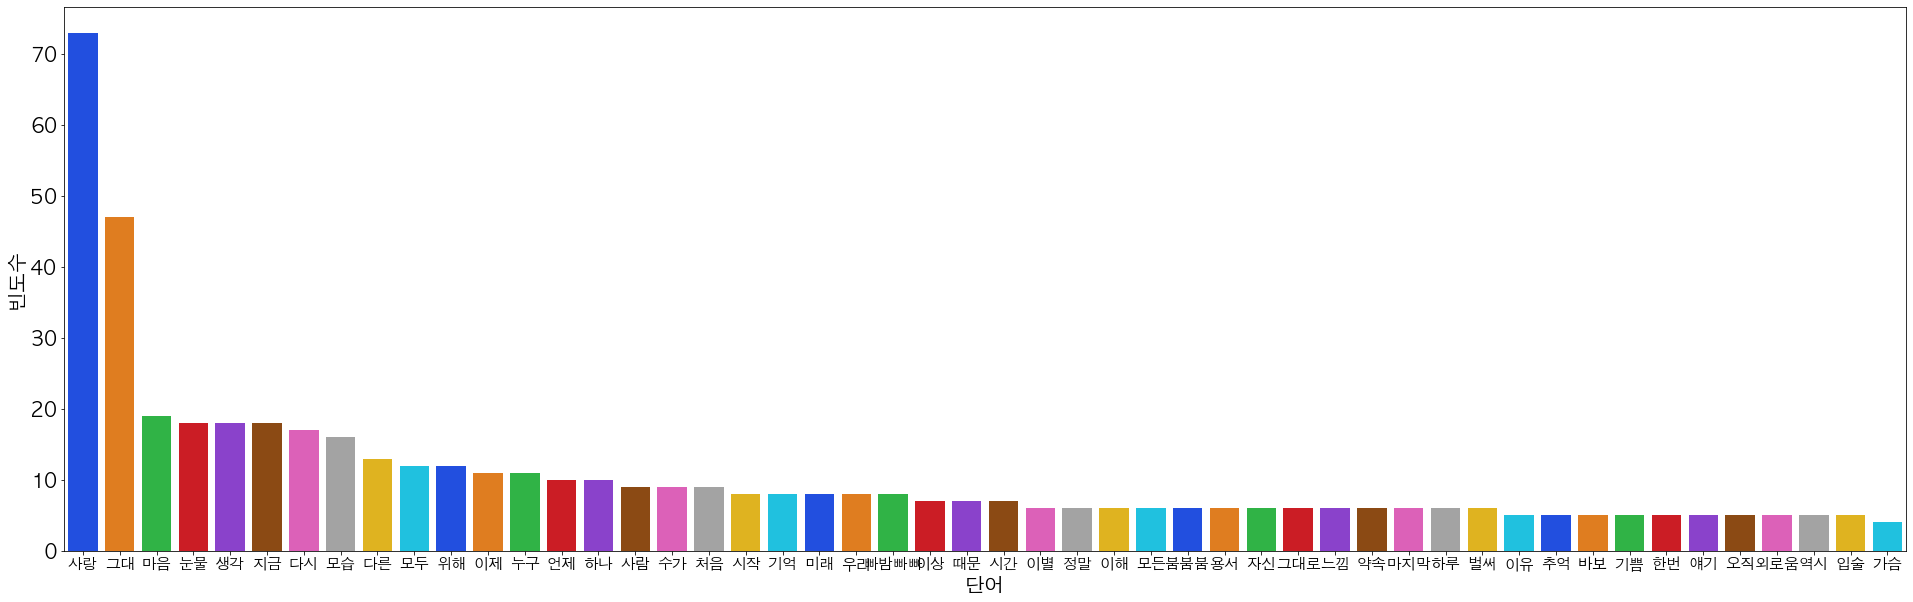

In [122]:
# barchart로 시각화
df9099 = pd.DataFrame(most)
df9099.columns = ["단어" , "빈도수"]
sns.barplot(data = df9099 , x = "단어", y = "빈도수", palette = sns.color_palette("bright"))
plt.rcParams['figure.figsize'] = [33, 10]
plt.xticks(fontsize = 15)
plt.savefig('그룹9099.png')

In [123]:
# 2글자 이상 단어 빈도수
most

[('사랑', 73),
 ('그대', 47),
 ('마음', 19),
 ('눈물', 18),
 ('생각', 18),
 ('지금', 18),
 ('다시', 17),
 ('모습', 16),
 ('다른', 13),
 ('모두', 12),
 ('위해', 12),
 ('이제', 11),
 ('누구', 11),
 ('언제', 10),
 ('하나', 10),
 ('사람', 9),
 ('수가', 9),
 ('처음', 9),
 ('시작', 8),
 ('기억', 8),
 ('미래', 8),
 ('우리', 8),
 ('빠밤빠빠', 8),
 ('이상', 7),
 ('때문', 7),
 ('시간', 7),
 ('이별', 6),
 ('정말', 6),
 ('이해', 6),
 ('모든', 6),
 ('붐붐붐', 6),
 ('용서', 6),
 ('자신', 6),
 ('그대로', 6),
 ('느낌', 6),
 ('약속', 6),
 ('마지막', 6),
 ('하루', 6),
 ('벌써', 6),
 ('이유', 5),
 ('추억', 5),
 ('바보', 5),
 ('기쁨', 5),
 ('한번', 5),
 ('얘기', 5),
 ('오직', 5),
 ('외로움', 5),
 ('역시', 5),
 ('입술', 5),
 ('가슴', 4)]

/Users/cj/opt/anaconda3/envs/nano/lib/python3.8/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


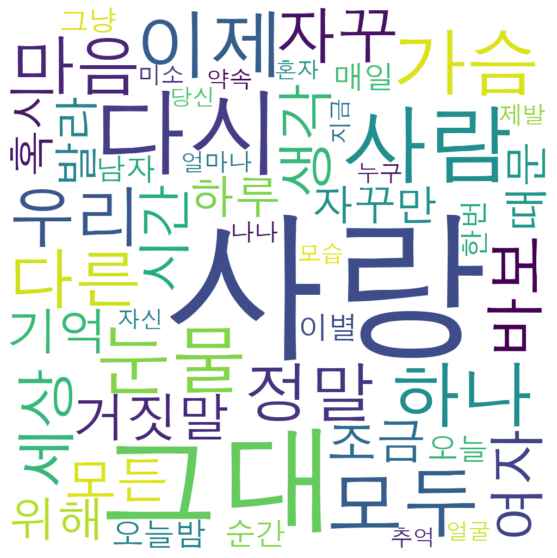

In [124]:
# 00~09년도 여성 그룹 워드 클라우드
### df_0009


f = open('df_0009.txt', "r", encoding='utf-8')
lines = f.read()
from konlpy.tag import Twitter
nlpy = Twitter()
nouns = nlpy.nouns(lines)
# 두 글자 이상 단어만 추출
words = []
for n in nouns:
    if len(n) > 1:
        words.append(n)
# 단어 빈도수 계산하여 상위 50건만 추출
count = Counter(words)
most = count.most_common(50)
tags = {}
for n, c in most:
    tags[n] = c
wc = WordCloud(font_path= 
#                'C:/Windows/Fonts/gulim.ttc',
               # 맥일 경우, 
               '/Library/Fonts/AppleGothic.ttf',
                background_color="white",
                width=1000,
                height=1000,
                max_words=50,
                max_font_size=300)
wc = wc.generate_from_frequencies(tags)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

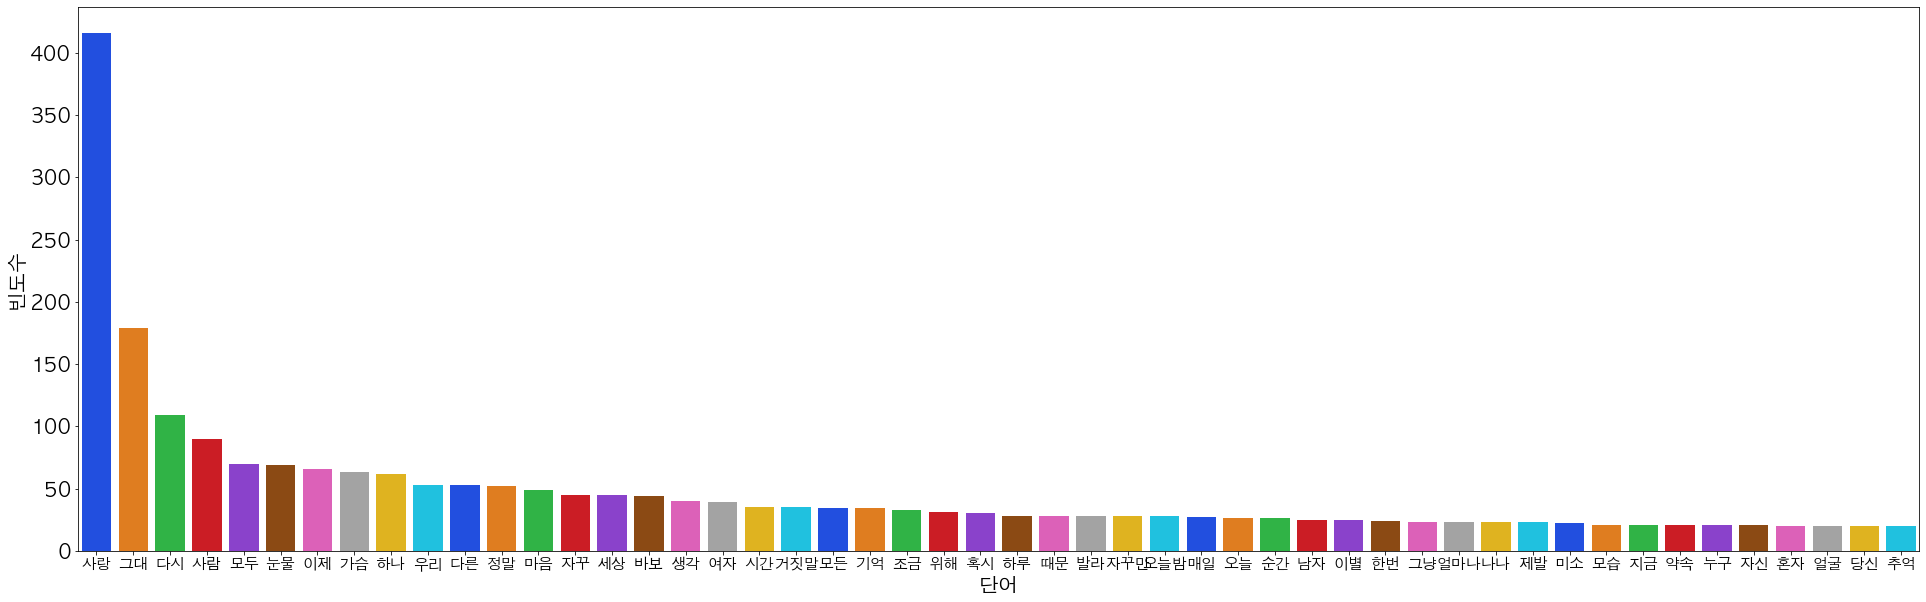

In [125]:
# barchart로 시각화
df0009 = pd.DataFrame(most)
df0009.columns = ["단어" , "빈도수"]
sns.barplot(data = df0009, x = "단어", y = "빈도수", palette = sns.color_palette("bright"))
plt.xticks(fontsize = 15)
plt.rcParams['figure.figsize'] = [33, 10]
plt.show()

In [126]:
# 2글자 이상 단어 빈도수
most

[('사랑', 416),
 ('그대', 179),
 ('다시', 109),
 ('사람', 90),
 ('모두', 70),
 ('눈물', 69),
 ('이제', 66),
 ('가슴', 63),
 ('하나', 62),
 ('우리', 53),
 ('다른', 53),
 ('정말', 52),
 ('마음', 49),
 ('자꾸', 45),
 ('세상', 45),
 ('바보', 44),
 ('생각', 40),
 ('여자', 39),
 ('시간', 35),
 ('거짓말', 35),
 ('모든', 34),
 ('기억', 34),
 ('조금', 33),
 ('위해', 31),
 ('혹시', 30),
 ('하루', 28),
 ('때문', 28),
 ('발라', 28),
 ('자꾸만', 28),
 ('오늘밤', 28),
 ('매일', 27),
 ('오늘', 26),
 ('순간', 26),
 ('남자', 25),
 ('이별', 25),
 ('한번', 24),
 ('그냥', 23),
 ('얼마나', 23),
 ('나나', 23),
 ('제발', 23),
 ('미소', 22),
 ('모습', 21),
 ('지금', 21),
 ('약속', 21),
 ('누구', 21),
 ('자신', 21),
 ('혼자', 20),
 ('얼굴', 20),
 ('당신', 20),
 ('추억', 20)]

/Users/cj/opt/anaconda3/envs/nano/lib/python3.8/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


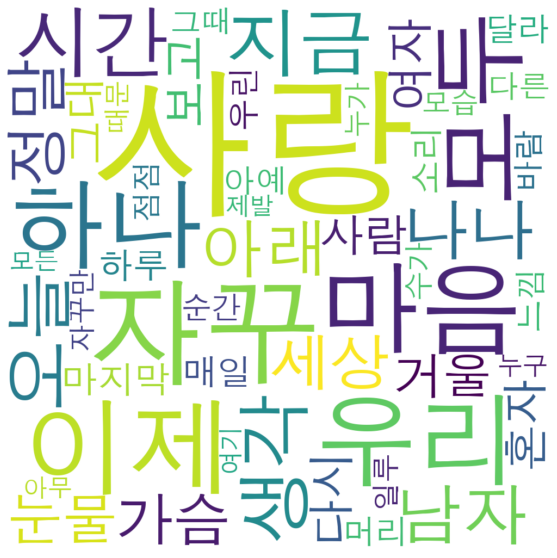

In [127]:
# 10~20년도 여성 그룹 워드 클라우드
### df_1020


f = open('df_1020.txt', "r", encoding='utf-8')
lines = f.read()
from konlpy.tag import Twitter
nlpy = Twitter()
nouns = nlpy.nouns(lines)
# 두 글자 이상 단어만 추출
words = []
for n in nouns:
    if len(n) > 1:
        words.append(n)
# 단어 빈도수 계산하여 상위 100건만 추출
count = Counter(words)
most = count.most_common(50)
tags = {}
for n, c in most:
    tags[n] = c
wc = WordCloud(font_path= 
#                'C:/Windows/Fonts/gulim.ttc',
               # 맥일 경우, 
               '/Library/Fonts/AppleGothic.ttf',
                background_color="white",
                width=1000,
                height=1000,
                max_words=50,
                max_font_size=300)
wc = wc.generate_from_frequencies(tags)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

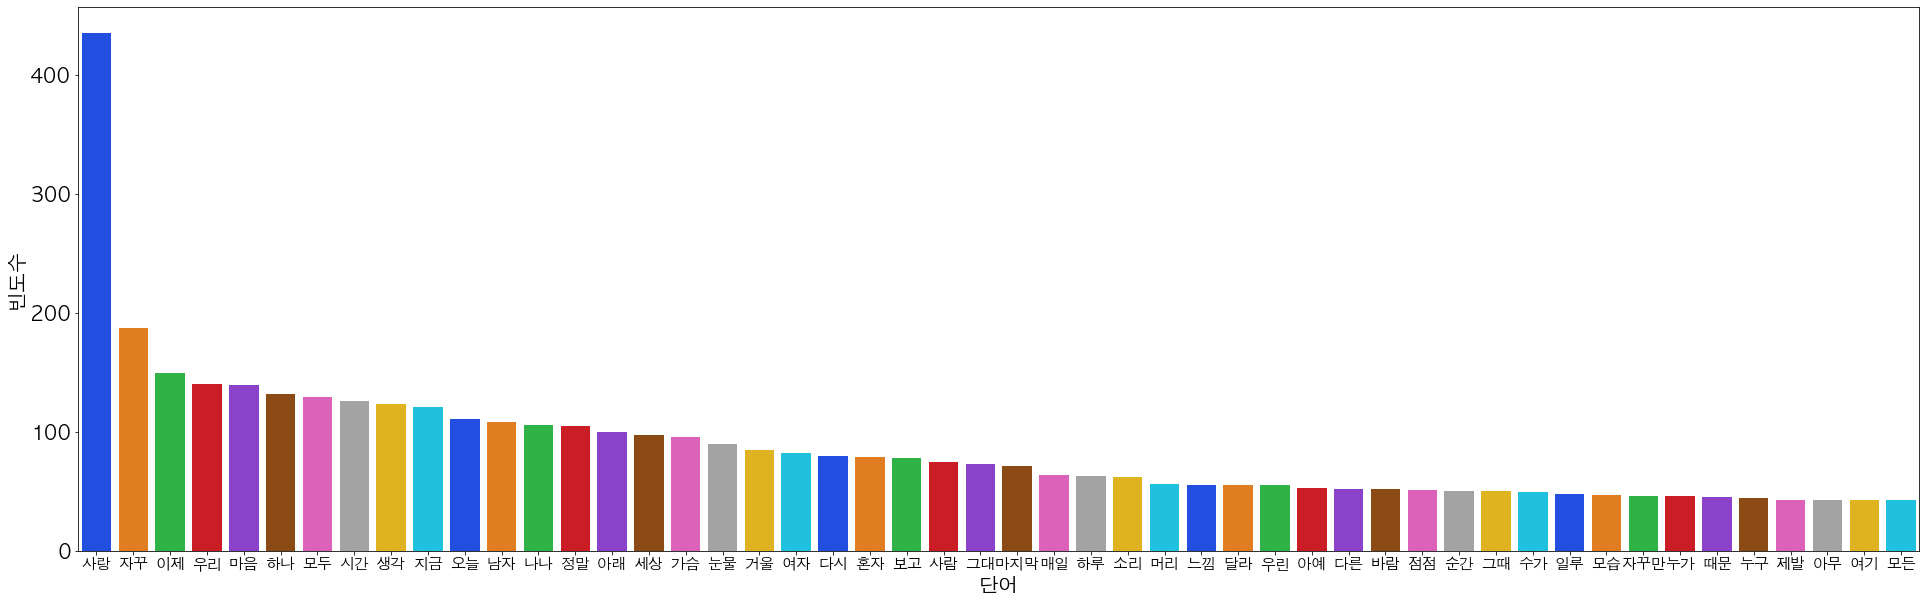

In [128]:
# barchart로 시각화
df1020 = pd.DataFrame(most)
df1020.columns = ["단어" , "빈도수"]
sns.barplot(data = df1020, x = "단어", y = "빈도수", palette = sns.color_palette("bright"))
plt.rcParams['figure.figsize'] = [33, 10]
plt.xticks(fontsize = 15)
plt.show()

In [129]:
# 2글자 이상 단어 빈도수
most

[('사랑', 435),
 ('자꾸', 187),
 ('이제', 149),
 ('우리', 140),
 ('마음', 139),
 ('하나', 132),
 ('모두', 129),
 ('시간', 126),
 ('생각', 123),
 ('지금', 121),
 ('오늘', 111),
 ('남자', 108),
 ('나나', 106),
 ('정말', 105),
 ('아래', 100),
 ('세상', 97),
 ('가슴', 96),
 ('눈물', 90),
 ('거울', 85),
 ('여자', 82),
 ('다시', 80),
 ('혼자', 79),
 ('보고', 78),
 ('사람', 75),
 ('그대', 73),
 ('마지막', 71),
 ('매일', 64),
 ('하루', 63),
 ('소리', 62),
 ('머리', 56),
 ('느낌', 55),
 ('달라', 55),
 ('우린', 55),
 ('아예', 53),
 ('다른', 52),
 ('바람', 52),
 ('점점', 51),
 ('순간', 50),
 ('그때', 50),
 ('수가', 49),
 ('일루', 48),
 ('모습', 47),
 ('자꾸만', 46),
 ('누가', 46),
 ('때문', 45),
 ('누구', 44),
 ('제발', 43),
 ('아무', 43),
 ('여기', 43),
 ('모든', 43)]

### '여성', '댄스', '그룹' 가사

In [130]:
# df_여성그룹에서 '댄스'만 추가
df_여성댄스그룹 = df_여성그룹[df_여성그룹["장르"] == "댄스"]

In [131]:
# 여성댄스그룹 txt 파일로 저장
df_여성댄스그룹["가사"].to_csv('df_여성댄스그룹.txt', sep = '\t', index = False, header = None)

/Users/cj/opt/anaconda3/envs/nano/lib/python3.8/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


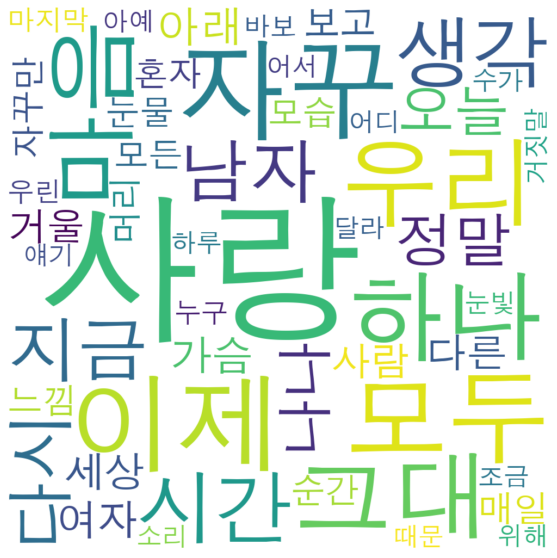

In [132]:
# 여성댄스그룹 가사 워드클라우드
### df_여성댄스그룹


f = open('df_여성댄스그룹.txt', "r", encoding='utf-8')
lines = f.read()
from konlpy.tag import Twitter
nlpy = Twitter()
nouns = nlpy.nouns(lines)
# 두 글자 이상 단어만 추출
words = []
for n in nouns:
    if len(n) > 1:
        words.append(n)
# 단어 빈도수 계산하여 상위 50건만 추출
count = Counter(words)
most = count.most_common(50)
tags = {}
for n, c in most:
    tags[n] = c
wc = WordCloud(font_path= 
#                'C:/Windows/Fonts/gulim.ttc',
               # 맥일 경우, 
               '/Library/Fonts/AppleGothic.ttf',
                background_color="white",
                width=1000,
                height=1000,
                max_words=50,
                max_font_size=300)
wc = wc.generate_from_frequencies(tags)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig('wc댄스그룹.png')

plt.show()

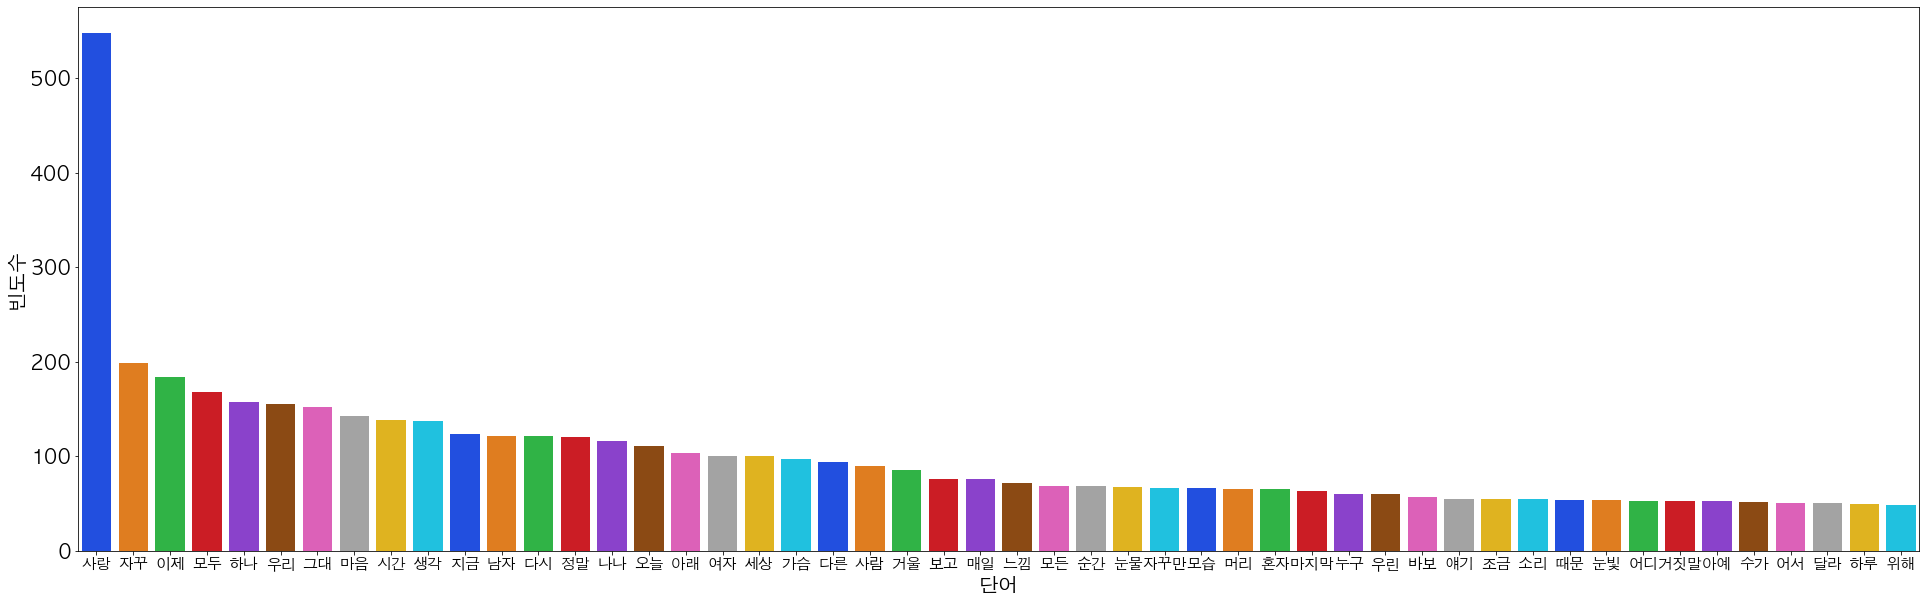

In [133]:
# barchart로 시각화
df여성댄스그룹 = pd.DataFrame(most)
df여성댄스그룹.columns = ["단어" , "빈도수"]
sns.barplot(data = df여성댄스그룹, x = "단어", y = "빈도수", palette = sns.color_palette("bright"))
plt.rcParams['figure.figsize'] = [33, 10]
plt.xticks(fontsize = 15)
plt.savefig('댄스그룹.png')

In [134]:
# 2글자 이상 단어 빈도수
most

[('사랑', 548),
 ('자꾸', 199),
 ('이제', 184),
 ('모두', 168),
 ('하나', 158),
 ('우리', 155),
 ('그대', 152),
 ('마음', 143),
 ('시간', 138),
 ('생각', 137),
 ('지금', 124),
 ('남자', 122),
 ('다시', 121),
 ('정말', 120),
 ('나나', 116),
 ('오늘', 111),
 ('아래', 104),
 ('여자', 100),
 ('세상', 100),
 ('가슴', 97),
 ('다른', 94),
 ('사람', 90),
 ('거울', 85),
 ('보고', 76),
 ('매일', 76),
 ('느낌', 72),
 ('모든', 69),
 ('순간', 69),
 ('눈물', 68),
 ('자꾸만', 67),
 ('모습', 66),
 ('머리', 65),
 ('혼자', 65),
 ('마지막', 63),
 ('누구', 60),
 ('우린', 60),
 ('바보', 57),
 ('얘기', 55),
 ('조금', 55),
 ('소리', 55),
 ('때문', 54),
 ('눈빛', 54),
 ('어디', 53),
 ('거짓말', 53),
 ('아예', 53),
 ('수가', 52),
 ('어서', 51),
 ('달라', 51),
 ('하루', 50),
 ('위해', 49)]

### '여성', '댄스', '그룹' 연대별 가사
* df_8489댄스 - ’1984-1989’ 연도 묶음
* df_9099댄스 - ’1990-1999’ 연도 묶음
* df_0009댄스 - ’2000-2009’ 연도 묶음
* df_1020댄스 - ’2010-2020’ 연도 묶음

In [135]:
# 1984-1989 여성 댄스 그룹 
# 1984년에서 1989년 사이에는 해당 결과 없음
df_8489댄스 = df_여성댄스그룹[(df_여성댄스그룹['연도'].dt.year >= 1984) & (df_여성댄스그룹['연도'].dt.year <= 1989)]

In [136]:
# 1990-1999 여성 댄스 그룹
df_9099댄스 = df_여성댄스그룹[(df_여성댄스그룹['연도'].dt.year >= 1990) & (df_여성댄스그룹['연도'].dt.year <= 1999)]

In [137]:
# 2000-2009 여성 댄스 그룹
df_0009댄스 = df_여성댄스그룹[(df_여성댄스그룹['연도'].dt.year >= 2000) & (df_여성댄스그룹['연도'].dt.year <= 2009)]

In [138]:
# 2010-2020 여성 댄스 그룹
df_1020댄스 = df_여성댄스그룹[(df_여성댄스그룹['연도'].dt.year >= 2010) & (df_여성댄스그룹['연도'].dt.year <= 2020)]

In [139]:
# 해당 데이터셋 text 파일로 저장
df_8489댄스["가사"].to_csv('df_8489댄스.txt', sep = '\t', index = False, header = None)
df_9099댄스["가사"].to_csv('df_9099댄스.txt', sep = '\t', index = False, header = None)
df_0009댄스["가사"].to_csv('df_0009댄스.txt', sep = '\t', index = False, header = None)
df_1020댄스["가사"].to_csv('df_1020댄스.txt', sep = '\t', index = False, header = None)

/Users/cj/opt/anaconda3/envs/nano/lib/python3.8/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


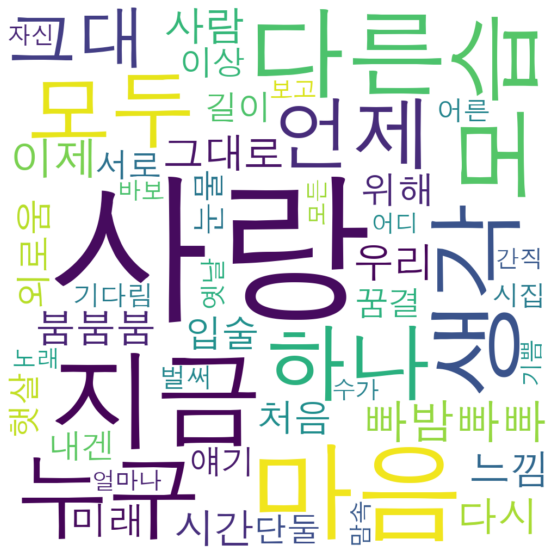

In [140]:
# 해당 데이터 셋 명사 추출 및 워드클라우드로 시각화

### df_9099댄스


f = open('df_9099댄스.txt', "r", encoding='utf-8')
lines = f.read()
from konlpy.tag import Twitter
nlpy = Twitter()
nouns = nlpy.nouns(lines)
# 두 글자 이상 단어만 추출
words = []
for n in nouns:
    if len(n) > 1:
        words.append(n)
# 단어 빈도수 계산하여 상위 50건만 추출
count = Counter(words)
most = count.most_common(50)
tags = {}
for n, c in most:
    tags[n] = c
wc = WordCloud(font_path= 
#                'C:/Windows/Fonts/gulim.ttc',
               # 맥일 경우, 
               '/Library/Fonts/AppleGothic.ttf',
                background_color="white",
                width=1000,
                height=1000,
                max_words=50,
                max_font_size=300)
wc = wc.generate_from_frequencies(tags)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

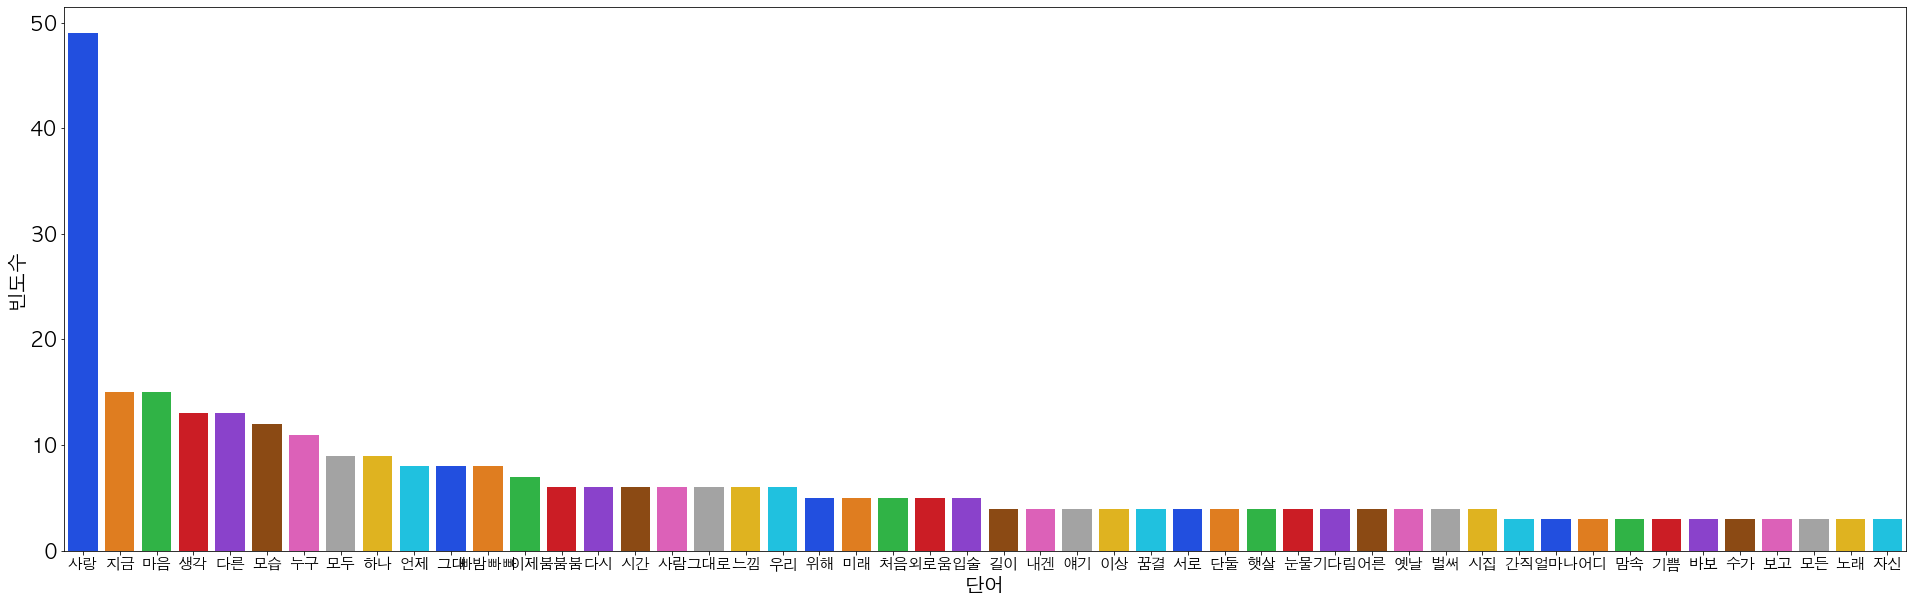

In [141]:
# barchart로 시각화
df9099댄스 = pd.DataFrame(most)
df9099댄스.columns = ["단어" , "빈도수"]
sns.barplot(data = df9099댄스, x = "단어", y = "빈도수", palette = sns.color_palette("bright"))
plt.rcParams['figure.figsize'] = [33, 10]
plt.xticks(fontsize = 15)
plt.show()

/Users/cj/opt/anaconda3/envs/nano/lib/python3.8/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


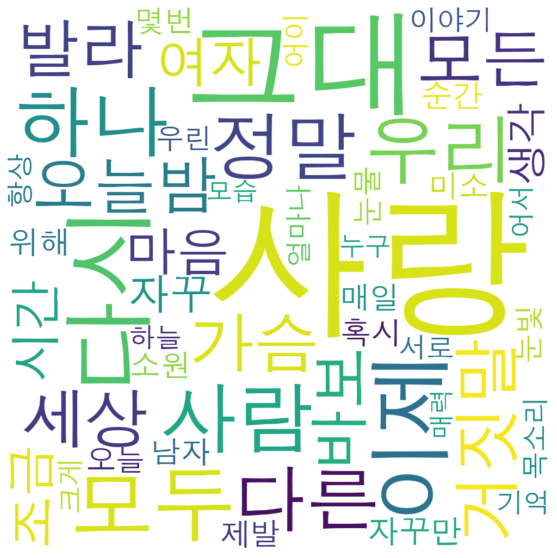

In [142]:
### df_0009댄스


f = open('df_0009댄스.txt', "r", encoding='utf-8')
lines = f.read()
from konlpy.tag import Twitter
nlpy = Twitter()
nouns = nlpy.nouns(lines)
# 두 글자 이상 단어만 추출
words = []
for n in nouns:
    if len(n) > 1:
        words.append(n)
# 단어 빈도수 계산하여 상위 50건만 추출
count = Counter(words)
most = count.most_common(50)
tags = {}
for n, c in most:
    tags[n] = c
wc = WordCloud(font_path= 
#                'C:/Windows/Fonts/gulim.ttc',
               # 맥일 경우, 
               '/Library/Fonts/AppleGothic.ttf',
                background_color="white",
                width=1000,
                height=1000,
                max_words=50,
                max_font_size=300)
wc = wc.generate_from_frequencies(tags)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

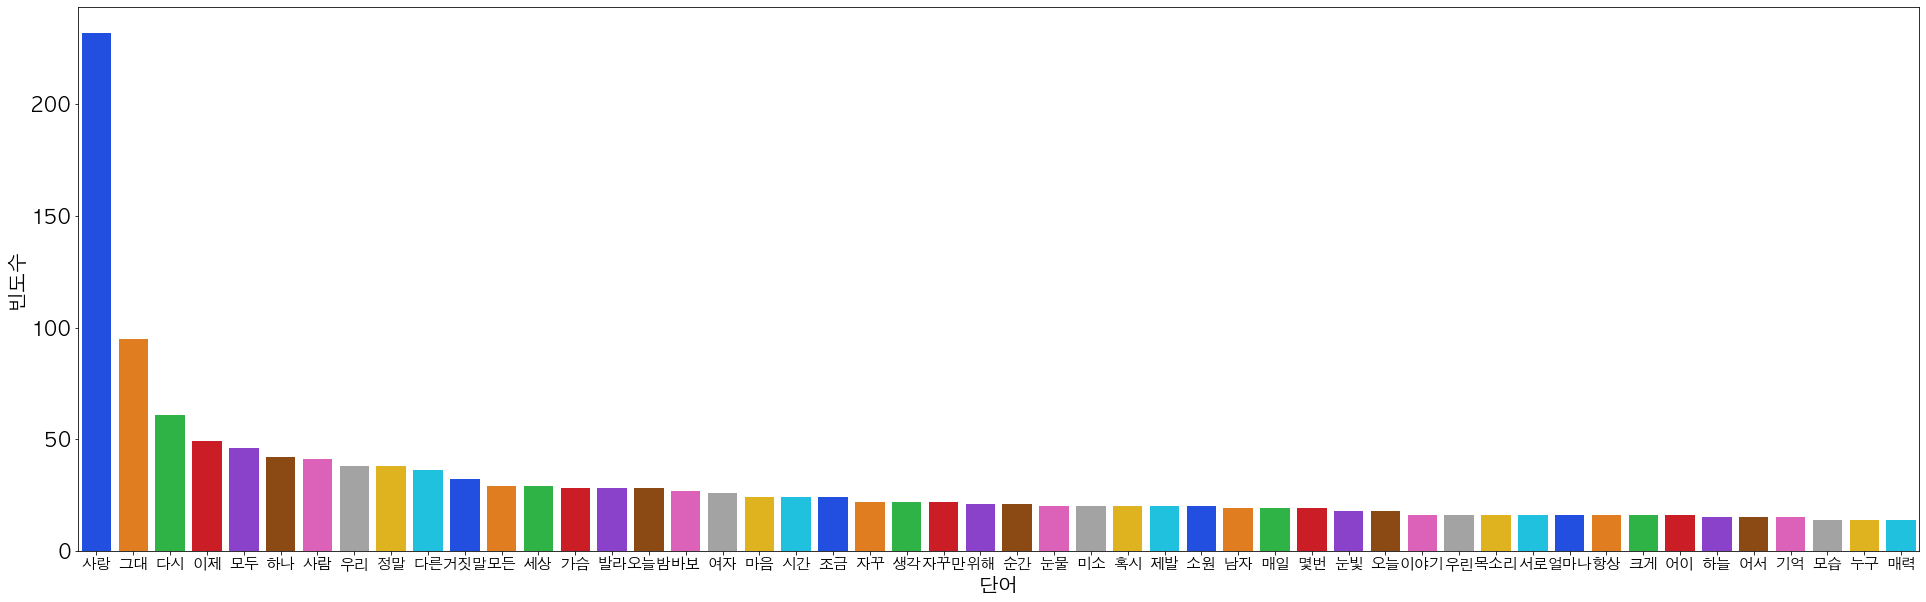

In [143]:
# barchart로 시각화
df0009댄스 = pd.DataFrame(most)
df0009댄스.columns = ["단어" , "빈도수"]
sns.barplot(data = df0009댄스, x = "단어", y = "빈도수", palette = sns.color_palette("bright"))
plt.rcParams['figure.figsize'] = [33, 10]
plt.xticks(fontsize = 15)
plt.show()

/Users/cj/opt/anaconda3/envs/nano/lib/python3.8/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


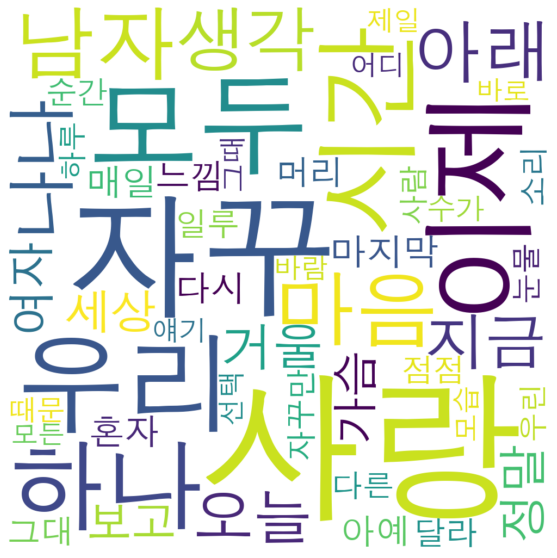

In [144]:
### df_1020댄스


f = open('df_1020댄스.txt', "r", encoding='utf-8')
lines = f.read()
from konlpy.tag import Twitter
nlpy = Twitter()
nouns = nlpy.nouns(lines)
# 두 글자 이상 단어만 추출
words = []
for n in nouns:
    if len(n) > 1:
        words.append(n)
# 단어 빈도수 계산하여 상위 50건만 추출
count = Counter(words)
most = count.most_common(50)
tags = {}
for n, c in most:
    tags[n] = c
wc = WordCloud(font_path= 
#                'C:/Windows/Fonts/gulim.ttc',
               # 맥일 경우, 
               '/Library/Fonts/AppleGothic.ttf',
                background_color="white",
                width=1000,
                height=1000,
                max_words=50,
                max_font_size=300)
wc = wc.generate_from_frequencies(tags)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

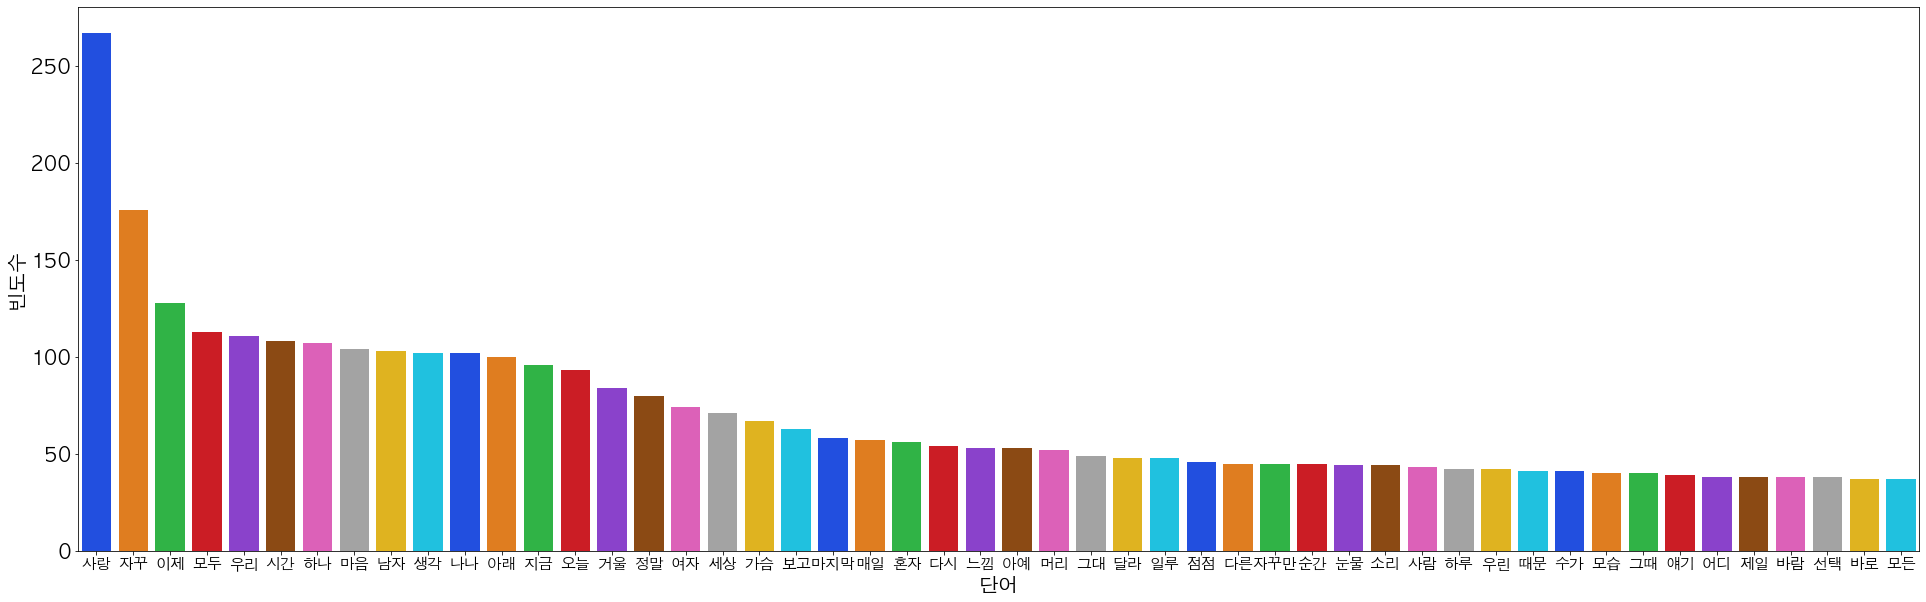

In [145]:
# barchart로 시각화
df1020댄스 = pd.DataFrame(most)
df1020댄스.columns = ["단어" , "빈도수"]
sns.barplot(data = df1020댄스, x = "단어", y = "빈도수", palette = sns.color_palette("bright"))
plt.rcParams['figure.figsize'] = [33, 10]
plt.xticks(fontsize = 15)
plt.show()

### '여성', '댄스', '그룹', '멤버수 4명' 가사
* 여성댄스그룹의 가사는 전체 연도와 10연단위 묶음으로 봐도 '사랑'이라는 단어가 가사에 독보적으로 많이 사용된 것을 볼 수 있었다.
* 그렇다면 4명인 여성댄스그룹의 가사는 어떤 차이가 있을까?

In [146]:
# 4인 댄스그룹 가사만 뽑아 새로운 df 만들기
df_4명댄스그룹가사 = df_여성댄스그룹[df_여성댄스그룹["멤버수"] == 4]["가사"]
df_4명댄스그룹가사

1469    이것봐 나를 한번 쳐다봐 나 지금 이쁘다고 말해봐 솔직히 너를 반하게 할 생각에 난...
1487    이젠 내 사랑이 되어줘 내 모든걸 너에게 기대고 싶어  언제나 날 지켜줄 너라고 변...
1632    came in to my life ye make me fly again ye 늘 바...
1651    가라 가라 갇혀 확 갇혀 내 안에 갇혀 확 갇혀 가라 가라 갇혀 확 갇혀 사랑안에 ...
1676    니가 아니니 니가 니가 아니었니 니가 아니니 니가 니가 아니었니 니가 아니니 니가 ...
                              ...                        
3547    일루와 일루와 일루와 일루와 일루와 일루와 일루와 일루와 일루와 일루와 일루와 일루...
3596    보란 듯이 무너졌어 바닥을 뚫고 저 지하까지 옷 끝자락 잡겠다고 저 높이 두 손을 ...
3611    All I wanna be is 멋짐 내 마음대로 골라 kick it 머리 어깨 무...
3640    영원한 밤 창문 없는 방에 우릴 가둔 love What can we say 매번 아...
3652    Trouble 이래 다 그래 세 보인대 어쩔래 난 멋 부리네 더 꾸미네 yeah I...
Name: 가사, Length: 81, dtype: object

In [147]:
# 워드클라우드를 위해 txt 파일로 저장
df_4명댄스그룹가사.to_csv('df_4명댄스그룹가사.txt', sep = '\t', index = False, header = None)

/Users/cj/opt/anaconda3/envs/nano/lib/python3.8/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


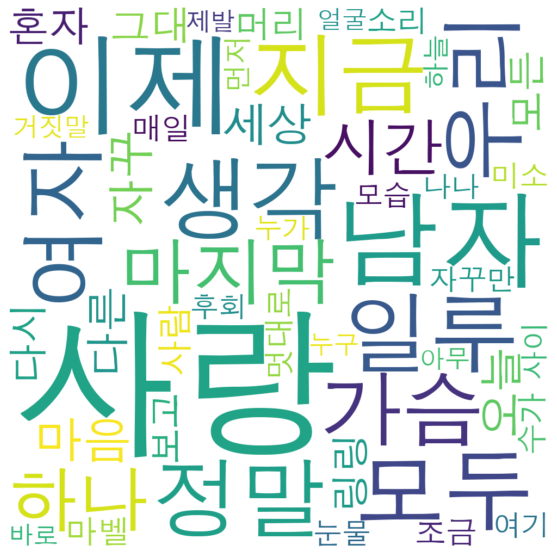

In [148]:
# 워드클라우드로 시각화
f = open('df_4명댄스그룹가사.txt', "r", encoding='utf-8')
lines = f.read()
from konlpy.tag import Twitter
nlpy = Twitter()
nouns = nlpy.nouns(lines)
# 두 글자 이상 단어만 추출
words = []
for n in nouns:
    if len(n) > 1:
        words.append(n)
# 단어 빈도수 계산하여 상위 50건만 추출
count = Counter(words)
most = count.most_common(50)
tags = {}
for n, c in most:
    tags[n] = c
wc = WordCloud(font_path= 
#                'C:/Windows/Fonts/gulim.ttc',
               # 맥일 경우, 
               '/Library/Fonts/AppleGothic.ttf',
                background_color="white",
                width=1000,
                height=1000,
                max_words=50,
                max_font_size=300)
wc = wc.generate_from_frequencies(tags)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig('wc4명댄스그룹.png')

plt.show()

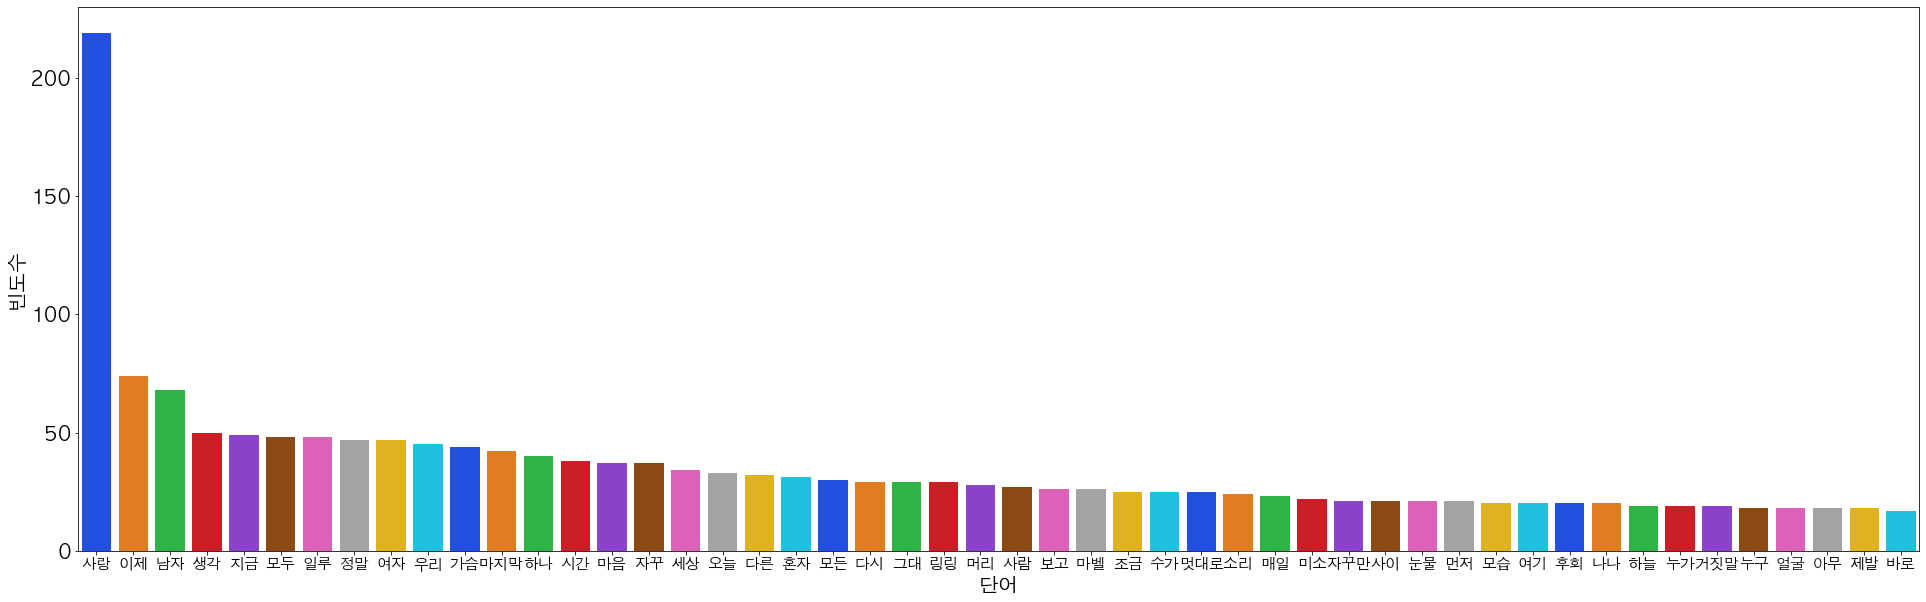

In [149]:
# barchart로 시각화
df4명댄스그룹가사 = pd.DataFrame(most)
df4명댄스그룹가사.columns = ["단어" , "빈도수"]
sns.barplot(data = df4명댄스그룹가사, x = "단어", y = "빈도수", palette = sns.color_palette("bright"))
plt.rcParams['figure.figsize'] = [33, 10]
plt.xticks(fontsize = 15)
plt.savefig('4명댄스그룹.png')

4인 여자댄스그룹 역시 '사랑'이라는 단어가 상당히 많이 쓰인 것을 볼 수 있었다.

In [150]:
# 두 글자 이상 단어 빈도수
most

[('사랑', 219),
 ('이제', 74),
 ('남자', 68),
 ('생각', 50),
 ('지금', 49),
 ('모두', 48),
 ('일루', 48),
 ('정말', 47),
 ('여자', 47),
 ('우리', 45),
 ('가슴', 44),
 ('마지막', 42),
 ('하나', 40),
 ('시간', 38),
 ('마음', 37),
 ('자꾸', 37),
 ('세상', 34),
 ('오늘', 33),
 ('다른', 32),
 ('혼자', 31),
 ('모든', 30),
 ('다시', 29),
 ('그대', 29),
 ('링링', 29),
 ('머리', 28),
 ('사람', 27),
 ('보고', 26),
 ('마벨', 26),
 ('조금', 25),
 ('수가', 25),
 ('멋대로', 25),
 ('소리', 24),
 ('매일', 23),
 ('미소', 22),
 ('자꾸만', 21),
 ('사이', 21),
 ('눈물', 21),
 ('먼저', 21),
 ('모습', 20),
 ('여기', 20),
 ('후회', 20),
 ('나나', 20),
 ('하늘', 19),
 ('누가', 19),
 ('거짓말', 19),
 ('누구', 18),
 ('얼굴', 18),
 ('아무', 18),
 ('제발', 18),
 ('바로', 17)]

### 작사가와 가사

차트에 오른 4인 여성댄스그룹의 곡은 어떤 작사가가 작업했을까?

In [151]:
# 4인 여성댄스그룹의 작사가별 곡 수
df_여성댄스그룹[df_여성댄스그룹["멤버수"] == 4]["작사"].value_counts()

TEDDY                                          9
김이나 미료                                         6
용감한형제                                          5
박진영                                            5
이단옆차기                                          4
김기범 강지원                                        4
김이나                                            4
이상민                                            3
김도훈(RBW) 솔라(마마무) 문별(마마무) 화사(HwaSa)             3
TEDDY 브라더수 CHOICE37                            2
블랙아이드필승                                        2
강지원 김기범                                        2
테디                                             2
김영아                                            2
TEDDY 김병훈                                      2
이단옆차기 핫띠                                       1
TEDDY LØREN 지수(JISOO) 제니(JENNIE) DannyChung    1
김도훈(RBW) 박우상 화사(HwaSa)                         1
TEDDY DannyChung                               1
김도훈(RBW) 솔라(마마무) 문별(마마무)                       1
김도훈(RBW) 박우상        

In [152]:
df_여성댄스그룹[df_여성댄스그룹["멤버수"] == 4]["작사"].describe()

count        81
unique       41
top       TEDDY
freq          9
Name: 작사, dtype: object

In [153]:
df_4명댄스그룹 = df_여성댄스그룹[df_여성댄스그룹["멤버수"] == 4]
df_4명댄스그룹

연도  순위                 제목             가수  \
1469 1998-01-01  88          내 남자 친구에게   핑클 (Fin.K.L)   
1487 1999-01-01   6             영원한 사랑   핑클 (Fin.K.L)   
1632 2000-01-01  51                Now   핑클 (Fin.K.L)   
1651 2000-01-01  70                  한            샤크라   
1676 2000-01-01  95              Hey U            샤크라   
...         ...  ..                ...            ...   
3547 2019-01-01  66               고고베베  마마무 (Mamamoo)   
3596 2020-01-01  15  How You Like That      BLACKPINK   
3611 2020-01-01  30                HIP  마마무 (Mamamoo)   
3640 2020-01-01  59     Lovesick Girls      BLACKPINK   
3652 2020-01-01  71     DON'T TOUCH ME          환불원정대   

                                    앨범     좋아요 수         발매일  장르  \
1469  Fine Killing Liberty : Blue Rain   19386.0  1998.05.01  댄스   
1487                             White   21734.0  1999.05.01  댄스   
1632                               Now    9958.0  2000.10.16  댄스   
1651                            Chakra    7638.0  2000.03.02  댄스   
1676                            Chakra    3297.0  2000.03.02  댄스   
...                                ...       ...         ...  ..   
3547                        White Wind   85391.0  2019.03.14  댄스   
3596                 How You Like That  181230.0  2020.06.26  댄스   
3611                  reality in BLACK  134750.0  2019.11.14  댄스   
3640                         THE ALBUM  194873.0  2020.10.02  댄스   
3652                    DON'T TOUCH ME  160198.0  2020.10.10  댄스   

                                                     가사        팬수  멤버수 솔로/그룹  \
1469  이것봐 나를 한번 쳐다봐 나 지금 이쁘다고 말해봐 솔직히 너를 반하게 할 생각에 난...    6579.0  4.0    그룹   
1487  이젠 내 사랑이 되어줘 내 모든걸 너에게 기대고 싶어  언제나 날 지켜줄 너라고 변...    6579.0  4.0    그룹   
1632  came in to my life ye make me fly again ye 늘 바...    6579.0  4.0    그룹   
1651  가라 가라 갇혀 확 갇혀 내 안에 갇혀 확 갇혀 가라 가라 갇혀 확 갇혀 사랑안에 ...     662.0  4.0    그룹   
1676  니가 아니니 니가 니가 아니었니 니가 아니니 니가 니가 아니었니 니가 아니니 니가 ...     662.0  4.0    그룹   
...                                                 ...       ...  ...   ...   
3547  일루와 일루와 일루와 일루와 일루와 일루와 일루와 일루와 일루와 일루와 일루와 일루...  233255.0  4.0    그룹   
3596  보란 듯이 무너졌어 바닥을 뚫고 저 지하까지 옷 끝자락 잡겠다고 저 높이 두 손을 ...  209837.0  4.0    그룹   
3611  All I wanna be is 멋짐 내 마음대로 골라 kick it 머리 어깨 무...  233255.0  4.0    그룹   
3640  영원한 밤 창문 없는 방에 우릴 가둔 love What can we say 매번 아...  209837.0  4.0    그룹   
3652  Trouble 이래 다 그래 세 보인대 어쩔래 난 멋 부리네 더 꾸미네 yeah I...   16216.0  4.0    그룹   

      성별                                           작사  \
1469  여성                                          김영아   
1487  여성                                          김영아   
1632  여성                                          홍지유   
1651  여성                                          이상민   
1676  여성                                          이상민   
...   ..                                          ...   
3547  여성                     김도훈(RBW) 솔라(마마무) 문별(마마무)   
3596  여성                             TEDDY DannyChung   
3611  여성                       김도훈(RBW) 박우상 화사(HwaSa)   
3640  여성  TEDDY LØREN 지수(JISOO) 제니(JENNIE) DannyChung   
3652  여성          블랙아이드필승 전군 은비 ILLSON JohnJohn Jaero   

                                                     작곡             편곡  
1469                                      Chrischan 전준규  Chrischan 전준규  
1487                                                주태영        주태영 조성진  
1632                                                김진권            김진권  
1651                                            이상민 김준환            김준환  
1676                                            김성태 이상민            김성태  
...                                                 ...            ...  
3547                                       김건모 김도훈(RBW)       김도훈(RBW)  
3596                                     TEDDY R.Tee 24       R.Tee 24  
3611                             김도훈(RBW) 박우상 화사(HwaSa)   김도훈(RBW) 박우상  
3640  TEDDY 24 제니(JENNIE) BrianLee LeahHaywood R.Tee...       24 R.Tee  
3652                                         블랙아이드필승 전군       

In [154]:
df_4명그룹작사 = df_4명댄스그룹[['순위','가수',"작사",'제목','가사','연도']]
df_4명그룹작사

순위             가수                                           작사  \
1469  88   핑클 (Fin.K.L)                                          김영아   
1487   6   핑클 (Fin.K.L)                                          김영아   
1632  51   핑클 (Fin.K.L)                                          홍지유   
1651  70            샤크라                                          이상민   
1676  95            샤크라                                          이상민   
...   ..            ...                                          ...   
3547  66  마마무 (Mamamoo)                     김도훈(RBW) 솔라(마마무) 문별(마마무)   
3596  15      BLACKPINK                             TEDDY DannyChung   
3611  30  마마무 (Mamamoo)                       김도훈(RBW) 박우상 화사(HwaSa)   
3640  59      BLACKPINK  TEDDY LØREN 지수(JISOO) 제니(JENNIE) DannyChung   
3652  71          환불원정대          블랙아이드필승 전군 은비 ILLSON JohnJohn Jaero   

                     제목                                                 가사  \
1469          내 남자 친구에게  이것봐 나를 한번 쳐다봐 나 지금 이쁘다고 말해봐 솔직히 너를 반하게 할 생각에 난...   
1487             영원한 사랑  이젠 내 사랑이 되어줘 내 모든걸 너에게 기대고 싶어  언제나 날 지켜줄 너라고 변...   
1632                Now  came in to my life ye make me fly again ye 늘 바...   
1651                  한  가라 가라 갇혀 확 갇혀 내 안에 갇혀 확 갇혀 가라 가라 갇혀 확 갇혀 사랑안에 ...   
1676              Hey U  니가 아니니 니가 니가 아니었니 니가 아니니 니가 니가 아니었니 니가 아니니 니가 ...   
...                 ...                                                ...   
3547               고고베베  일루와 일루와 일루와 일루와 일루와 일루와 일루와 일루와 일루와 일루와 일루와 일루...   
3596  How You Like That  보란 듯이 무너졌어 바닥을 뚫고 저 지하까지 옷 끝자락 잡겠다고 저 높이 두 손을 ...   
3611                HIP  All I wanna be is 멋짐 내 마음대로 골라 kick it 머리 어깨 무...   
3640     Lovesick Girls  영원한 밤 창문 없는 방에 우릴 가둔 love What can we say 매번 아...   
3652     DON'T TOUCH ME  Trouble 이래 다 그래 세 보인대 어쩔래 난 멋 부리네 더 꾸미네 yeah I...   

             연도  
1469 1998-01-01  
1487 1999-01-01  
1632 2000-01-01  
1651 2000-01-01  
1676 2000-01-01  
...         ...  
3547 2019-01-01  
3596 2020-01-01  
3611 2020-01-01  
3640 2020-01-01  
3652 2020-01-01  

[81 rows x 6 columns]

In [155]:
df_4명그룹작사["작사"].describe()

count        81
unique       41
top       TEDDY
freq          9
Name: 작사, dtype: object

4인 여성그룹으로 차트 100에 오른 기준 100위 안에 든 곡들의 작사가는 중복을 제외하고 41명이다.

In [156]:
df_4명그룹작사["작사"].value_counts()

TEDDY                                          9
김이나 미료                                         6
용감한형제                                          5
박진영                                            5
이단옆차기                                          4
김기범 강지원                                        4
김이나                                            4
이상민                                            3
김도훈(RBW) 솔라(마마무) 문별(마마무) 화사(HwaSa)             3
TEDDY 브라더수 CHOICE37                            2
블랙아이드필승                                        2
강지원 김기범                                        2
테디                                             2
김영아                                            2
TEDDY 김병훈                                      2
이단옆차기 핫띠                                       1
TEDDY LØREN 지수(JISOO) 제니(JENNIE) DannyChung    1
김도훈(RBW) 박우상 화사(HwaSa)                         1
TEDDY DannyChung                               1
김도훈(RBW) 솔라(마마무) 문별(마마무)                       1
김도훈(RBW) 박우상        

* 노래에 따라서 동일인물임에도 작사명이 다른 것이 있고, 추가 작사가가 있으면 분리되어 카운트 되는 것이 있다.
* 많은 빈도수를 보여준 탑5 작사가
    * 테디 15곡, 김이나 10곡, 김도훈 8곡, 박진영 5곡, 용감한형제 5곡

In [157]:
df_4명그룹작사1 = df_4명그룹작사.copy()
df_4명그룹작사1.nunique()

순위    55
가수    15
작사    41
제목    79
가사    79
연도    20
dtype: int64

4인 여성그룹으로 차트 100에 오른 기준의 결과, 100위 안에 든 곡들의 작사가는 총 81명으로 찍히나 중복을 제외한 총 작사가는 41명이다.

In [158]:
df_4명그룹작사1.sort_values(by=['순위'], axis=0, ascending = True,  inplace=True)
df_4명그룹50 = df_4명그룹작사1[df_4명그룹작사1["순위"] <  50]

In [159]:
df_4명그룹50["작사"].describe()

count        46
unique       26
top       TEDDY
freq          7
Name: 작사, dtype: object

In [160]:
df_4명그룹50["작사"].value_counts()

TEDDY                                 7
박진영                                   4
김이나 미료                                4
이단옆차기                                 3
김기범 강지원                               3
용감한형제                                 2
테디                                    2
김도훈(RBW) 솔라(마마무) 문별(마마무) 화사(HwaSa)    2
블랙아이드필승                               2
블랙아이드필승 SamLewis                      1
심현보                                   1
남기상                                   1
남기상 DanielR.                          1
김도훈(RBW) 박우상 화사(HwaSa)                1
M(이민우)                                1
Nan                                   1
TEDDY DannyChung                      1
TEDDY 브라더수 CHOICE37                   1
김이나                                   1
TEDDY 김병훈                             1
김도훈(RBW) 문별(마마무) 솔라(마마무)              1
이단옆차기 핫띠                              1
김도훈(RBW) 박우상 문별(마마무)                  1
M(이민우) MARCOSONCINI CARLSONSANNIE     1
김영아                                   1


* 4인 여성그룹으로 차트 50에 오른 기준의 결과, 50위 안에 든 곡들의 작사가는 총 46명으로 찍히나 중복을 제외한 총 작사가는 26명이다.
* 노래에 따라 동일 작사가 임에도 작사가 이름이 다른 것이 있었고 메인 작사가 외에 추가 작사가가 있으면 분리되어 카운트 되는 것이 있어 작사가 혼자 작업한 결과값에 일괄적으로 포함하였음

#### 많은 빈도수를 보여준 탑5 작사가
    * 테디 12곡, 김도훈 6곡, 김이나 5곡, 이단옆차기 4곡, 박진영 4곡, 김기범 3곡, 블랙아이드필승 3곡 용감한형제 2곡

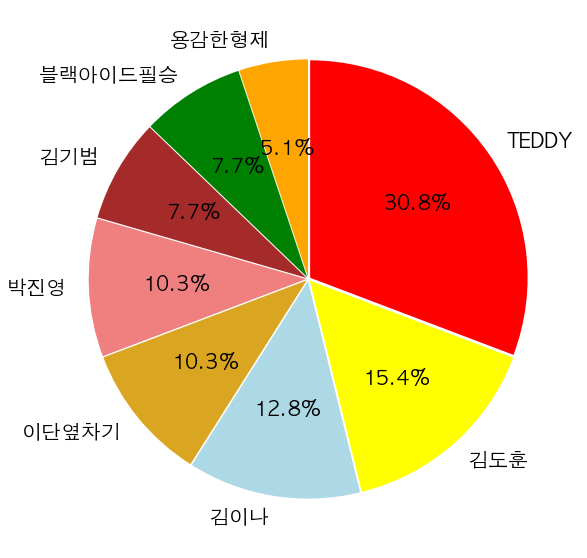

In [161]:
# 파이차트로 본 작사가의 곡 비율

labels = ['TEDDY','김도훈','김이나','이단옆차기','박진영', '김기범', '블랙아이드필승', '용감한형제'] ## 라벨
frequency = [12,6,5,4,4,3,3,2] ## 빈도
colors = ['red','yellow','lightblue','goldenrod','lightcoral','brown', 'green', 'orange']
explode = [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]
 
fig = plt.figure(figsize=(10,10)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 
pie = ax.pie(frequency, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
        counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.1f}%'.format(p), ## 퍼센티지 출력
       colors = ['red','yellow','lightblue','goldenrod','lightcoral','brown', 'green', 'orange'] ## 색상 지정
       ,explode=explode, labels = labels)

plt.show()

* '4명'의 '여성''댄스''그룹'으로 1-50위에 든 곡의 작사가는 TEDDY가 30.8%로 가장 높았으며 김도훈, 김이나, 이단옆차기, 박진영순으로 10% 이상을 보여주었다

#### 상위 3명인 TEDDY, 김도훈, 김이나 작사가의 가사를 분석해보자

In [262]:
df_4명그룹50[df_4명그룹50["작사"].str.contains("TEDDY")]

순위         가수                   작사                 제목  \
2483   2       2NE1            TEDDY 김병훈       I Don't Care   
2684   3       2NE1                TEDDY         내가 제일 잘 나가   
2787   6       2NE1                TEDDY         I Love You   
2688   7       2NE1                TEDDY               UGLY   
2489   8       2NE1                TEDDY               Fire   
3596  15  BLACKPINK     TEDDY DannyChung  How You Like That   
3300  19  BLACKPINK  TEDDY 브라더수 CHOICE37              마지막처럼   
3304  23  BLACKPINK                TEDDY                불장난   
2713  32       2NE1                TEDDY           Hate You   
3413  32  BLACKPINK                TEDDY      Forever Young   

                                                     가사         연도  
2483  hey playboy it's about time and your time's up... 2009-01-01  
2684  내가 제일 잘 나가 내가 제일 잘 나가 내가 제일 잘 나가 내가 제일 잘 나가 제 ... 2011-01-01  
2787  그대 나에게만 잘해줘요 항상 나에게만 웃어줘요 I said Ooh 질투하게 하지 마... 2012-01-01  
2688  밝게 웃어보지만 내 맘에 들지 않아 난 예쁘지 않아 아름답지 않아 Oh oh oh ... 2011-01-01  
2489  I go by the name of CL of 2NE1 It's been a lon... 2009-01-01  
3596  보란 듯이 무너졌어 바닥을 뚫고 저 지하까지 옷 끝자락 잡겠다고 저 높이 두 손을 ... 2020-01-01  
3300  너 뭔데 자꾸 생각나 자존심 상해 애가 타 얼굴이 뜨겁고 가슴은 계속 뛰어 내 몸이... 2017-01-01  
3304  우리 엄만 매일 내게 말했어 언제나 남자 조심하라고 사랑은 마치 불장난 같아서 다치... 2017-01-01  
2713  넌 정말 재수없어 널 만날 이유 없어 너 같은 남잔 이세상에 깔렸어 재 재 재 재수... 2011-01-01  
3413  떠나지 마 just stay 지금 이 시간을 멈춘 채 너와 함께라면 난 I coul... 2018-01-01

In [264]:
df_4명그룹50[df_4명그룹50["작사"].str.contains("TEDDY")]["순위"].mean()

14.7

* 작사가 TEDDY의 경우 총 10개의 곡이 50위안에 들었으며 그 평균 순위는 14.7위 이다

In [162]:
df_TEDDY가사  = df_4명그룹50[df_4명그룹50["작사"].str.contains("TEDDY")]["가사"]
df_TEDDY가사

2483    hey playboy it's about time and your time's up...
2684    내가 제일 잘 나가 내가 제일 잘 나가 내가 제일 잘 나가 내가 제일 잘 나가 제 ...
2787    그대 나에게만 잘해줘요 항상 나에게만 웃어줘요 I said Ooh 질투하게 하지 마...
2688    밝게 웃어보지만 내 맘에 들지 않아 난 예쁘지 않아 아름답지 않아 Oh oh oh ...
2489    I go by the name of CL of 2NE1 It's been a lon...
3596    보란 듯이 무너졌어 바닥을 뚫고 저 지하까지 옷 끝자락 잡겠다고 저 높이 두 손을 ...
3300    너 뭔데 자꾸 생각나 자존심 상해 애가 타 얼굴이 뜨겁고 가슴은 계속 뛰어 내 몸이...
3304    우리 엄만 매일 내게 말했어 언제나 남자 조심하라고 사랑은 마치 불장난 같아서 다치...
2713    넌 정말 재수없어 널 만날 이유 없어 너 같은 남잔 이세상에 깔렸어 재 재 재 재수...
3413    떠나지 마 just stay 지금 이 시간을 멈춘 채 너와 함께라면 난 I coul...
Name: 가사, dtype: object

In [163]:
df_TEDDY가사.to_csv('df_TEDDY가사.txt', sep = '\t', index = False, header = None)

/Users/cj/opt/anaconda3/envs/nano/lib/python3.8/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


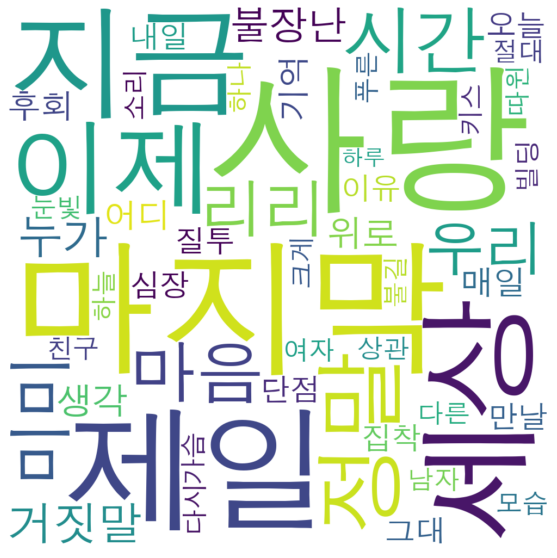

In [164]:
# 워드클라우드로 시각화
f = open('df_TEDDY가사.txt', "r", encoding='utf-8')
lines = f.read()
from konlpy.tag import Twitter
nlpy = Twitter()
nouns = nlpy.nouns(lines)
# 두 글자 이상 단어만 추출
words = []
for n in nouns:
    if len(n) > 1:
        words.append(n)
# 단어 빈도수 계산하여 상위 50건만 추출
count = Counter(words)
most = count.most_common(50)
tags = {}
for n, c in most:
    tags[n] = c
wc = WordCloud(font_path= 
#                'C:/Windows/Fonts/gulim.ttc',
               # 맥일 경우, 
               '/Library/Fonts/AppleGothic.ttf',
                background_color="white",
                width=1000,
                height=1000,
                max_words=50,
                max_font_size=300)
wc = wc.generate_from_frequencies(tags)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig('df_TEDDY가사.png')

plt.show()

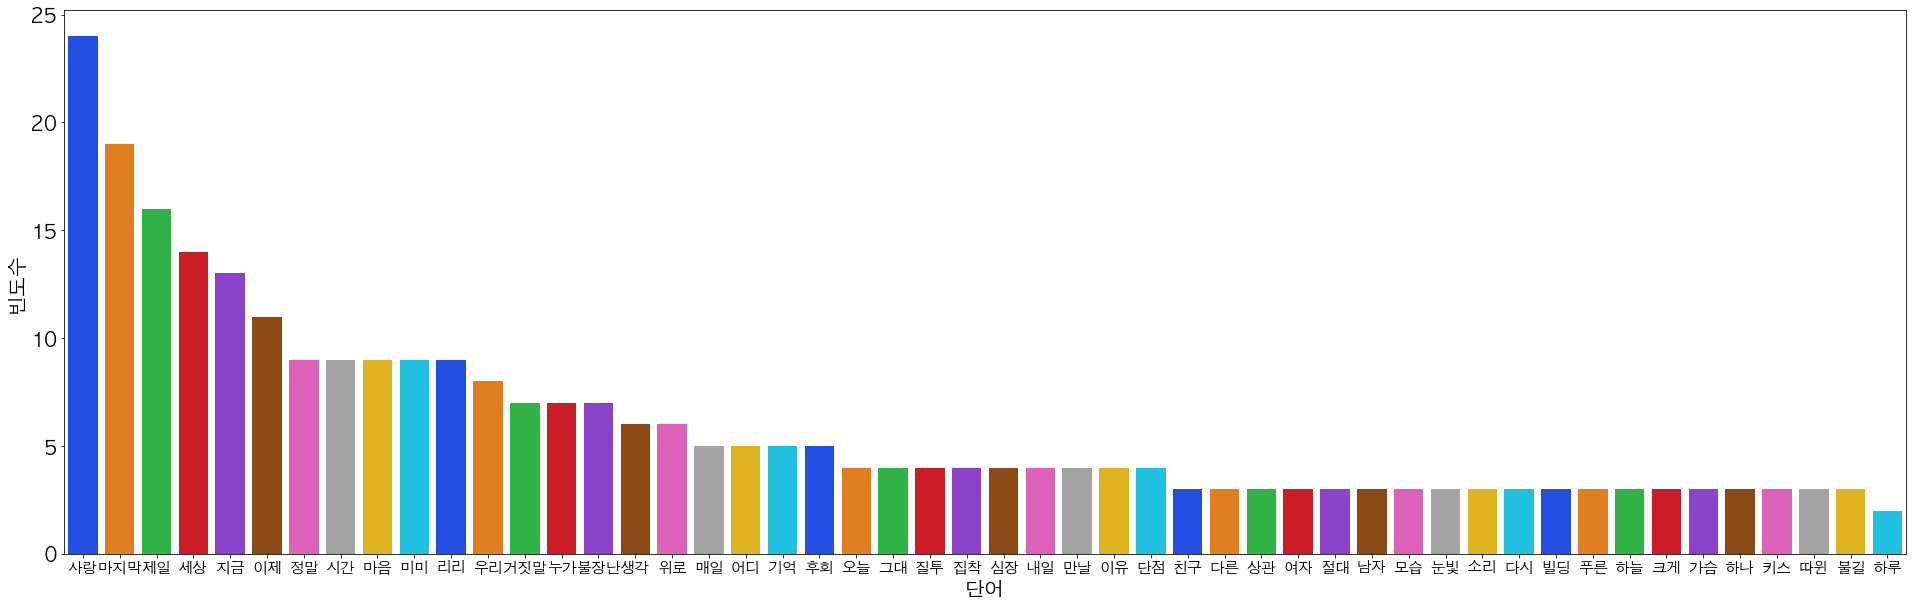

In [165]:
df_TEDDY가사 = pd.DataFrame(most)
df_TEDDY가사.columns = ["단어" , "빈도수"]
sns.barplot(data = df_TEDDY가사, x = "단어", y = "빈도수", palette = sns.color_palette("bright"))
plt.rcParams['figure.figsize'] = [33, 10]
plt.xticks(fontsize = 15)
plt.savefig('df_TEDDY가사.png')

* 앞선 분석 결과와 동일하게 '사랑'이 약 24회 정도로 가장 많이 들어가있음을 볼 수 있다

In [265]:
df_4명그룹50[df_4명그룹50["작사"].str.contains("김도훈")]

순위             가수                                  작사            제목  \
3393  12  마마무 (Mamamoo)                김도훈(RBW) 박우상 문별(마마무)      별이 빛나는 밤   
3196  15  마마무 (Mamamoo)            김도훈(RBW) 문별(마마무) 솔라(마마무)       넌 is 뭔들   
3107  26  마마무 (Mamamoo)  김도훈(RBW) 솔라(마마무) 문별(마마무) 화사(HwaSa)          음오아예   
3611  30  마마무 (Mamamoo)              김도훈(RBW) 박우상 화사(HwaSa)           HIP   
3314  33  마마무 (Mamamoo)  김도훈(RBW) 솔라(마마무) 문별(마마무) 화사(HwaSa)  Decalcomanie   
3430  49  마마무 (Mamamoo)                        김도훈(RBW) 박우상          너나 해   

                                                     가사         연도  
3393  손끝이 시리더니 벌써 봄이 왔네 꿈같은 바람이 불어 곳곳에 여느 때 와는 다른 듯한... 2018-01-01  
3196  Come on Hey Mommy Come on Hey Daddy 이리와서 얘들 좀 ... 2016-01-01  
3107  oh yes 음 오 아 예 너에게 빠져들겠어 자꾸 반응하잖아 oh yes 음 오 아... 2015-01-01  
3611  All I wanna be is 멋짐 내 마음대로 골라 kick it 머리 어깨 무... 2020-01-01  
3314  Knock Knock 낯선 너의 등장이 평소답지 않은 눈빛이 뭔가 느낌이 좀 수상해... 2017-01-01  
3430  난 너의 위성 네 주윌 맴돌지 그렇다고 네가 태양은 아니니 너의 멋대로 중심이 돼 ... 2018-01-01

In [266]:
df_4명그룹50[df_4명그룹50["작사"].str.contains("김도훈")]["순위"].mean()

27.5

* 김도훈 작사가의 경우 총 6개의 곡이 50위안에 들었으며 그 평균 순위는 27.5위 이다

In [166]:
df_김도훈가사  = df_4명그룹50[df_4명그룹50["작사"].str.contains("김도훈")]["가사"]
df_김도훈가사

3393    손끝이 시리더니 벌써 봄이 왔네 꿈같은 바람이 불어 곳곳에 여느 때 와는 다른 듯한...
3196    Come on Hey Mommy Come on Hey Daddy 이리와서 얘들 좀 ...
3107    oh yes 음 오 아 예 너에게 빠져들겠어 자꾸 반응하잖아 oh yes 음 오 아...
3611    All I wanna be is 멋짐 내 마음대로 골라 kick it 머리 어깨 무...
3314    Knock Knock 낯선 너의 등장이 평소답지 않은 눈빛이 뭔가 느낌이 좀 수상해...
3430    난 너의 위성 네 주윌 맴돌지 그렇다고 네가 태양은 아니니 너의 멋대로 중심이 돼 ...
Name: 가사, dtype: object

In [167]:
df_김도훈가사.to_csv('df_김도훈가사.txt', sep = '\t', index = False, header = None)

/Users/cj/opt/anaconda3/envs/nano/lib/python3.8/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


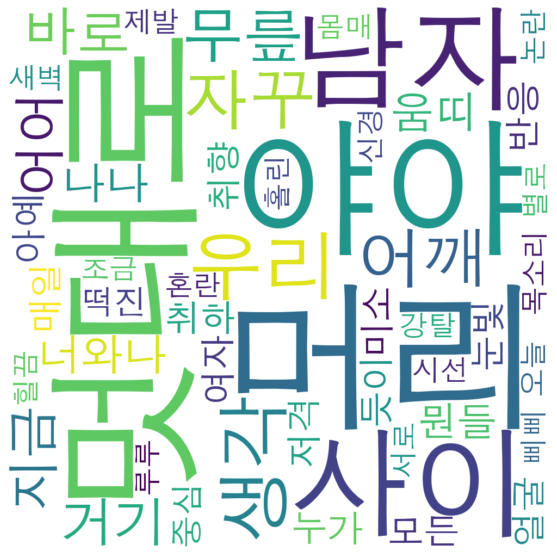

In [168]:
# 워드클라우드로 시각화
f = open('df_김도훈가사.txt', "r", encoding='utf-8')
lines = f.read()
from konlpy.tag import Twitter
nlpy = Twitter()
nouns = nlpy.nouns(lines)
# 두 글자 이상 단어만 추출
words = []
for n in nouns:
    if len(n) > 1:
        words.append(n)
# 단어 빈도수 계산하여 상위 50건만 추출
count = Counter(words)
most = count.most_common(50)
tags = {}
for n, c in most:
    tags[n] = c
wc = WordCloud(font_path= 
#                'C:/Windows/Fonts/gulim.ttc',
               # 맥일 경우, 
               '/Library/Fonts/AppleGothic.ttf',
                background_color="white",
                width=1000,
                height=1000,
                max_words=50,
                max_font_size=300)
wc = wc.generate_from_frequencies(tags)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig('df_김도훈가사.png')

plt.show()

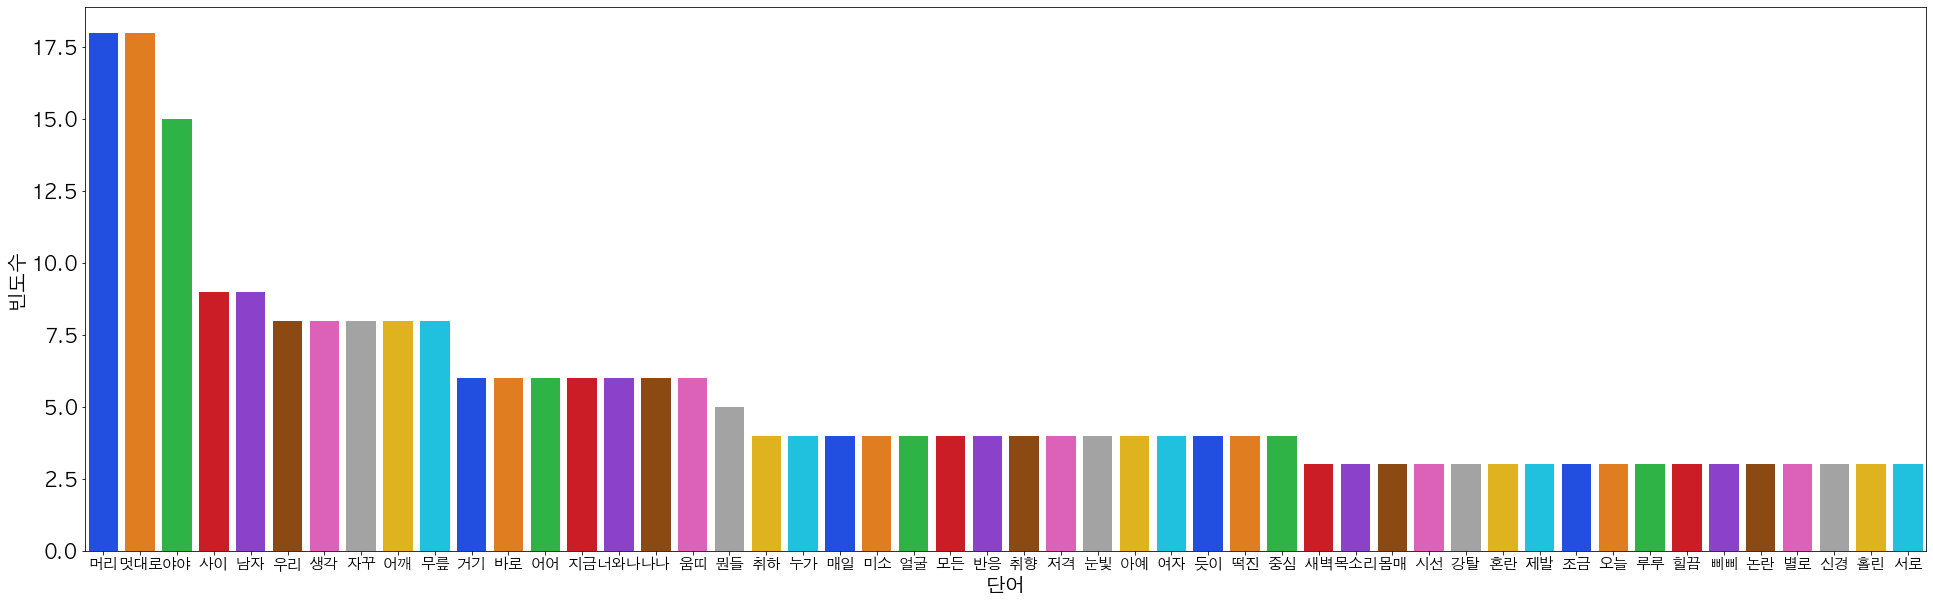

In [169]:
df_김도훈가사 = pd.DataFrame(most)
df_김도훈가사.columns = ["단어" , "빈도수"]
sns.barplot(data = df_김도훈가사, x = "단어", y = "빈도수", palette = sns.color_palette("bright"))
plt.rcParams['figure.figsize'] = [33, 10]
plt.xticks(fontsize = 15)
plt.savefig('df_김도훈가사.png')

* 유일하게 단어빈도 Top 50 안에 '사랑'이 들어가 있지 않다 이를 통해 '사랑'을 포함하여 '마음', '남자' 등 계속 등장하였던 단어의 빈도가 순위와는 관련이 적다고 볼 수도 있다

In [267]:
df_4명그룹50[df_4명그룹50["작사"].str.contains("김이나")]

순위        가수      작사           제목  \
2484   3  브라운아이드걸스  김이나 미료  Abracadabra   
2384   3  브라운아이드걸스  김이나 미료         Love   
2399  18  브라운아이드걸스     김이나          어쩌다   
2520  39  브라운아이드걸스  김이나 미료         Sign   
2721  40  브라운아이드걸스  김이나 미료  Sixth Sense   

                                                     가사         연도  
2484  Abracadabra  이러다 미쳐 내가 여리여리 착하던 그런 내가 너 때문에 돌아... 2009-01-01  
2384  야릇야릇한 널 향한 나의 맘 들리니 I need you I love you 이런이런... 2008-01-01  
2399  어쩌다 어쩌다 어쩌다 널 사랑하게 됐는지 내가 왜 이 꼴이 됐는지 어쩌다 어쩌다 어... 2008-01-01  
2520  숨이 가파 Mayday dot dot dot dot dot 맘이 아파 Mayday ... 2009-01-01  
2721  Feel, Watch, P.L.U.S. Sixth Sense 길들여질수가 없어 나를... 2011-01-01

In [268]:
df_4명그룹50[df_4명그룹50["작사"].str.contains("김이나")]["순위"].mean()

20.6

In [170]:
df_김이나가사  = df_4명그룹50[df_4명그룹50["작사"].str.contains("김이나")]["가사"]
df_김이나가사

2484    Abracadabra  이러다 미쳐 내가 여리여리 착하던 그런 내가 너 때문에 돌아...
2384    야릇야릇한 널 향한 나의 맘 들리니 I need you I love you 이런이런...
2399    어쩌다 어쩌다 어쩌다 널 사랑하게 됐는지 내가 왜 이 꼴이 됐는지 어쩌다 어쩌다 어...
2520    숨이 가파 Mayday dot dot dot dot dot 맘이 아파 Mayday ...
2721    Feel, Watch, P.L.U.S. Sixth Sense 길들여질수가 없어 나를...
Name: 가사, dtype: object

In [171]:
df_김이나가사.to_csv('df_김이나가사.txt', sep = '\t', index = False, header = None)

/Users/cj/opt/anaconda3/envs/nano/lib/python3.8/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


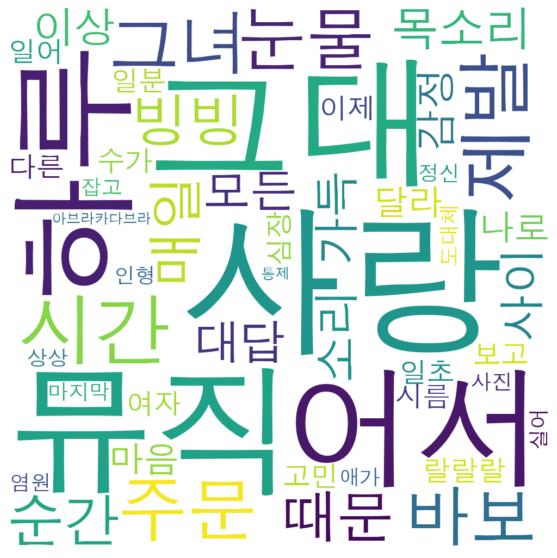

In [172]:
# 워드클라우드로 시각화
f = open('df_김이나가사.txt', "r", encoding='utf-8')
lines = f.read()
from konlpy.tag import Twitter
nlpy = Twitter()
nouns = nlpy.nouns(lines)
# 두 글자 이상 단어만 추출
words = []
for n in nouns:
    if len(n) > 1:
        words.append(n)
# 단어 빈도수 계산하여 상위 50건만 추출
count = Counter(words)
most = count.most_common(50)
tags = {}
for n, c in most:
    tags[n] = c
wc = WordCloud(font_path= 
#                'C:/Windows/Fonts/gulim.ttc',
               # 맥일 경우, 
               '/Library/Fonts/AppleGothic.ttf',
                background_color="white",
                width=1000,
                height=1000,
                max_words=50,
                max_font_size=300)
wc = wc.generate_from_frequencies(tags)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig('df_김이나가사.png')

plt.show()

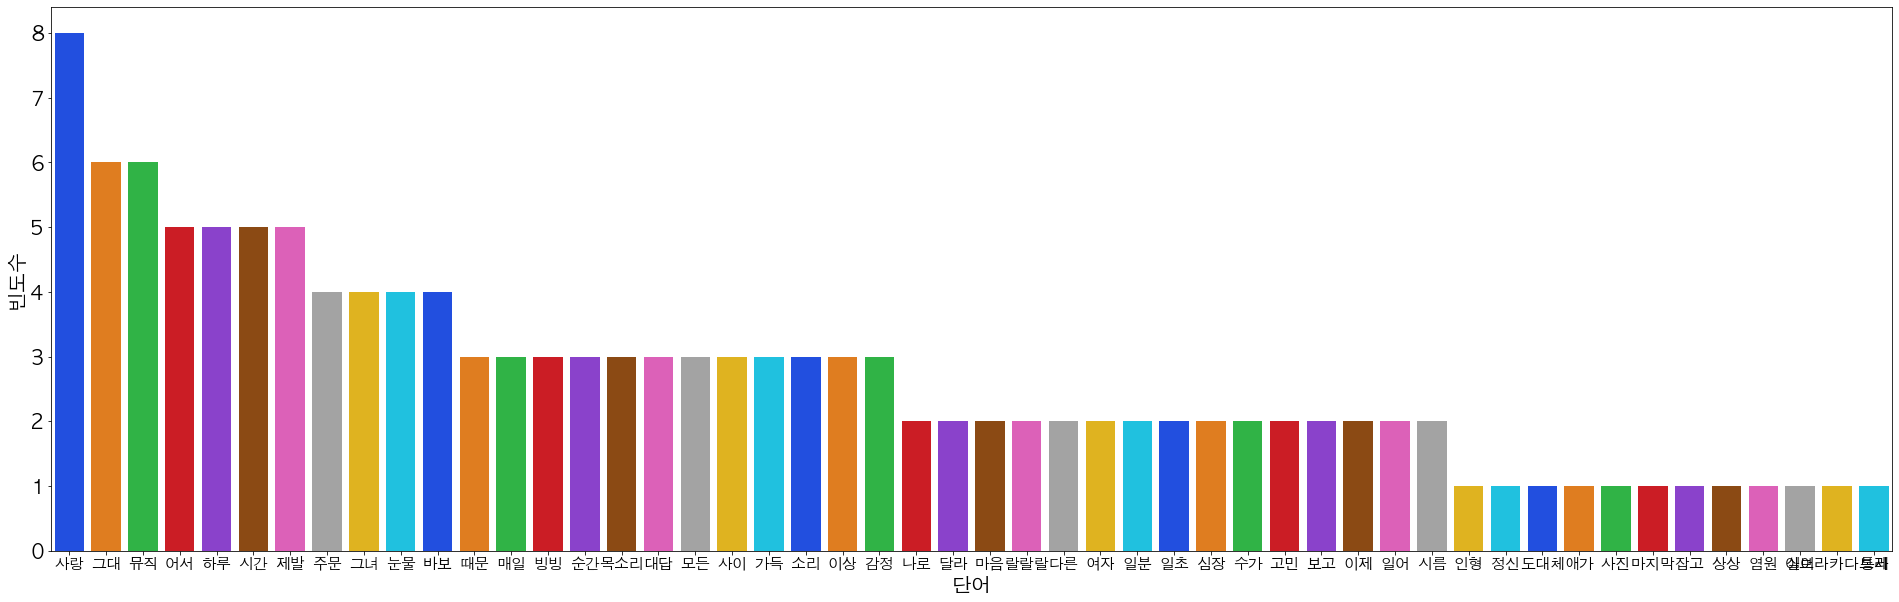

In [173]:
df_김이나가사 = pd.DataFrame(most)
df_김이나가사.columns = ["단어" , "빈도수"]
sns.barplot(data = df_김이나가사, x = "단어", y = "빈도수", palette = sns.color_palette("bright"))
plt.rcParams['figure.figsize'] = [33, 10]
plt.xticks(fontsize = 15)
plt.savefig('df_김이나가사.png')

* 김이나 작사가의 경우도 '사랑'이 가장 많은 빈도를 보여주고 있음을 볼 수 있었다

### 50위 안에 들었던 곡 중에서 최근 10곡의 가사

In [174]:
df_4명그룹50_1 = df_4명그룹50.copy()

In [175]:
df_4명그룹50_1.sort_values(by=['연도'], axis=0, ascending = True,  inplace=True)
df_4명그룹50_1

순위             가수                                  작사  \
1487   6   핑클 (Fin.K.L)                                 김영아   
1928  47            쥬얼리                                 심현보   
2110  29            쥬얼리                              M(이민우)   
2384   3       브라운아이드걸스                              김이나 미료   
2393  12            쥬얼리   M(이민우) MARCOSONCINI CARLSONSANNIE   
2399  18       브라운아이드걸스                                 김이나   
2483   2           2NE1                           TEDDY 김병훈   
2520  39       브라운아이드걸스                              김이나 미료   
2484   3       브라운아이드걸스                              김이나 미료   
2489   8           2NE1                               TEDDY   
2582   1           미쓰에이                                 박진영   
2591  10           2NE1                                  테디   
2607  26           미쓰에이                                 박진영   
2605  24            시크릿                             김기범 강지원   
2594  13           2NE1                                  테디   
2713  32           2NE1                               TEDDY   
2722  41            시크릿                             김기범 강지원   
2720  39           걸스데이                                 남기상   
2696  15            시크릿                             김기범 강지원   
2721  40       브라운아이드걸스                              김이나 미료   
2693  12           미쓰에이                                 박진영   
2688   7           2NE1                               TEDDY   
2684   3           2NE1                               TEDDY   
2687   6            씨스타                               용감한형제   
2783   2            씨스타                               용감한형제   
2785   4            씨스타                               이단옆차기   
2827  46           미쓰에이                                 박진영   
2787   6           2NE1                               TEDDY   
2917  36           걸스데이                        남기상 DanielR.   
2887   6            씨스타                               이단옆차기   
3008  27           걸스데이                                 Nan   
3001  20            씨스타                             블랙아이드필승   
2990   9           걸스데이                               이단옆차기   
3107  26  마마무 (Mamamoo)  김도훈(RBW) 솔라(마마무) 문별(마마무) 화사(HwaSa)   
3100  19           미쓰에이                    블랙아이드필승 SamLewis   
3094  13            씨스타                            이단옆차기 핫띠   
3196  15  마마무 (Mamamoo)            김도훈(RBW) 문별(마마무) 솔라(마마무)   
3227  46            씨스타                             블랙아이드필승   
3304  23      BLACKPINK                               TEDDY   
3300  19      BLACKPINK                 TEDDY 브라더수 CHOICE37   
3314  33  마마무 (Mamamoo)  김도훈(RBW) 솔라(마마무) 문별(마마무) 화사(HwaSa)   
3430  49  마마무 (Mamamoo)                        김도훈(RBW) 박우상   
3393  12  마마무 (Mamamoo)                김도훈(RBW) 박우상 문별(마마무)   
3413  32      BLACKPINK                               TEDDY   
3611  30  마마무 (Mamamoo)              김도훈(RBW) 박우상 화사(HwaSa)   
3596  15      BLACKPINK                    TEDDY DannyChung   

                      제목                                                 가사  \
1487              영원한 사랑  이젠 내 사랑이 되어줘 내 모든걸 너에게 기대고 싶어  언제나 날 지켜줄 너라고 변...   
1928             니가 참 좋아  온종일 정신없이 바쁘다가도 틈만나면 니가 생각나 언제부터 내 안에 살았니 참 많이 ...   
2110          Super Star  눈을 떠 소리를 높여봐 더 크게외쳐봐 그댄 Superstar! Woo- (one t...   
2384                Love  야릇야릇한 널 향한 나의 맘 들리니 I need you I love you 이런이런...   
2393       One More Time  Baby one more time Let me blow your mind Only ...   
2399                 어쩌다  어쩌다 어쩌다 어쩌다 널 사랑하게 됐는지 내가 왜 이 꼴이 됐는지 어쩌다 어쩌다 어...   
2483        I Don't Care  hey playboy it's about time and your time's up...   
2520                Sign  숨이 가파 Mayday dot dot dot dot dot 맘이 아파 Mayday ...   
2484         Abracadabra  Abracadabra  이러다 미쳐 내가 여리여리 착하던 그런 내가 너 때문에 돌아...   
2489                Fire  I go by the name of CL of 2NE1 It's been a lon...   
2582  Bad Girl Good Girl  You don't know me  You don't know me  You don'...   
2591             Go Away  너무 치사하잖아 너답지 못하잖아 지금 적응이 안돼 어 어 어지러워 왜 누가 누구랑 ...   
2607             

In [176]:
# 50위 안에 포함된 4명 여자댄스그룹의 곡 중에서 최근 10곡의 가사 분석
df_4명그룹50_2 = df_4명그룹50_1.tail(10)

In [177]:
# 워드클라우드를 위해 txt파일로 저장
df_4명그룹50_2["가사"].to_csv('df_4명그룹50_2.txt', sep = '\t', index = False, header = None)

/Users/cj/opt/anaconda3/envs/nano/lib/python3.8/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


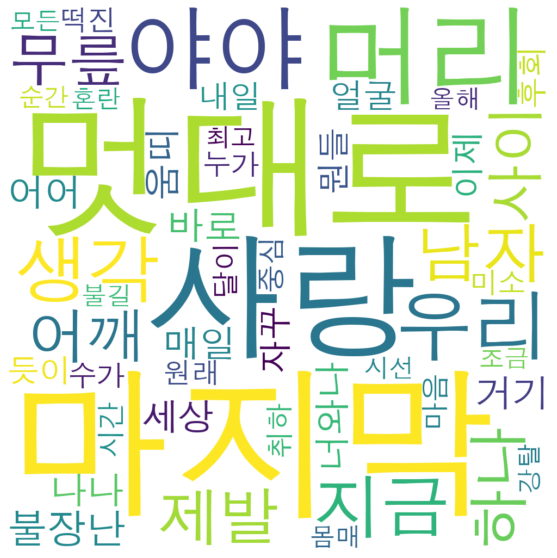

In [178]:
# 워드클라우드로 시각화

f = open('df_4명그룹50_2.txt', "r", encoding='utf-8')
lines = f.read()
from konlpy.tag import Twitter
nlpy = Twitter()
nouns = nlpy.nouns(lines)
# 두 글자 이상 단어만 추출
words = []
for n in nouns:
    if len(n) > 1:
        words.append(n)
# 단어 빈도수 계산하여 상위 50건만 추출
count = Counter(words)
most = count.most_common(50)
tags = {}
for n, c in most:
    tags[n] = c
wc = WordCloud(font_path= 
#                'C:/Windows/Fonts/gulim.ttc',
               # 맥일 경우, 
               '/Library/Fonts/AppleGothic.ttf',
                background_color="white",
                width=1000,
                height=1000,
                max_words=50,
                max_font_size=300)
wc = wc.generate_from_frequencies(tags)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

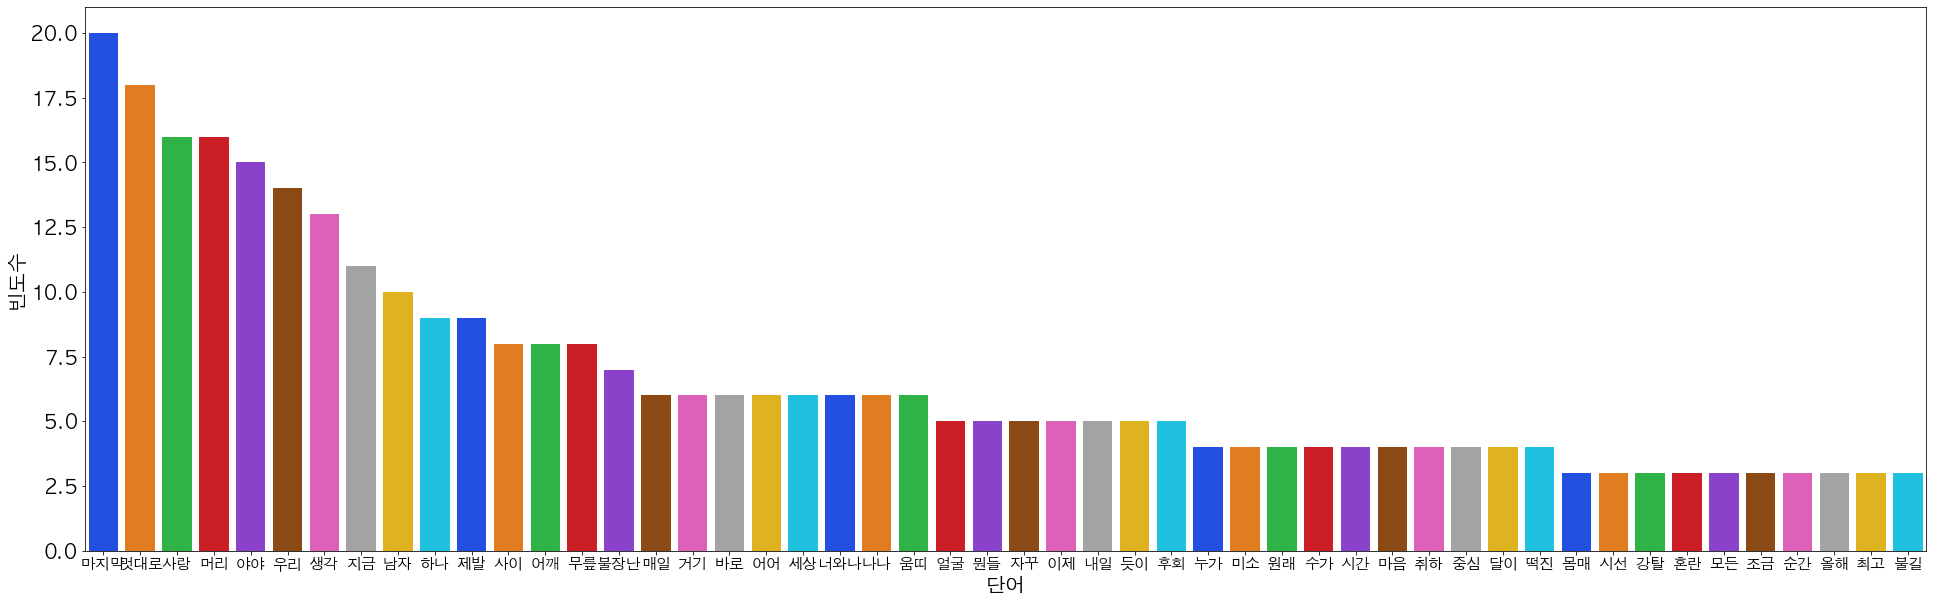

In [179]:
# barchart로 시각화
df4명그룹50_2 = pd.DataFrame(most)
df4명그룹50_2.columns = ["단어" , "빈도수"]
sns.barplot(data = df4명그룹50_2, x = "단어", y = "빈도수", palette = sns.color_palette("bright"))
plt.rcParams['figure.figsize'] = [33, 10]
plt.xticks(fontsize = 15)
plt.show()

곡 제목에 해당하는 단어가 가사에 많이 포함된 점을 파악하였다

/Users/cj/opt/anaconda3/envs/nano/lib/python3.8/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


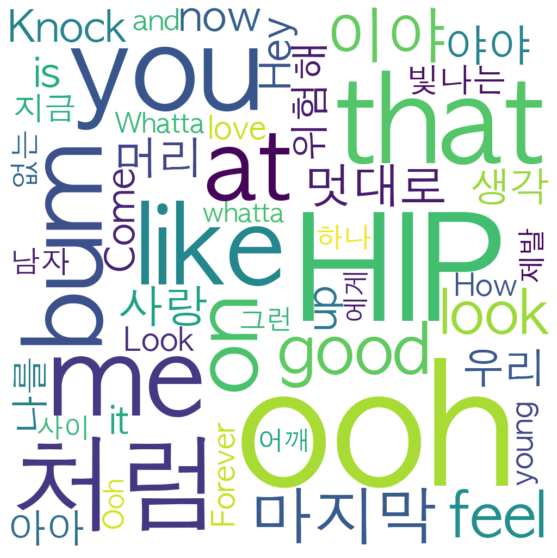

In [180]:
# 워드클라우드 시각화2

f = open('df_4명그룹50_2.txt', "r", encoding='utf-8')
lines = f.read()
from konlpy.tag import Twitter
nlpy = Twitter()
morphs = nlpy.morphs(lines)
# 두 글자 이상 단어만 추출
words = []
for n in morphs:
    if len(n) > 1:
        words.append(n)
# 단어 빈도수 계산하여 상위 50건만 추출
count = Counter(words)
most = count.most_common(50)
tags = {}
for n, c in most:
    tags[n] = c
wc = WordCloud(font_path= 
#                'C:/Windows/Fonts/gulim.ttc',
               # 맥일 경우, 
               '/Library/Fonts/AppleGothic.ttf',
                background_color="white",
                width=1000,
                height=1000,
                max_words=50,
                max_font_size=300)
wc = wc.generate_from_frequencies(tags)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

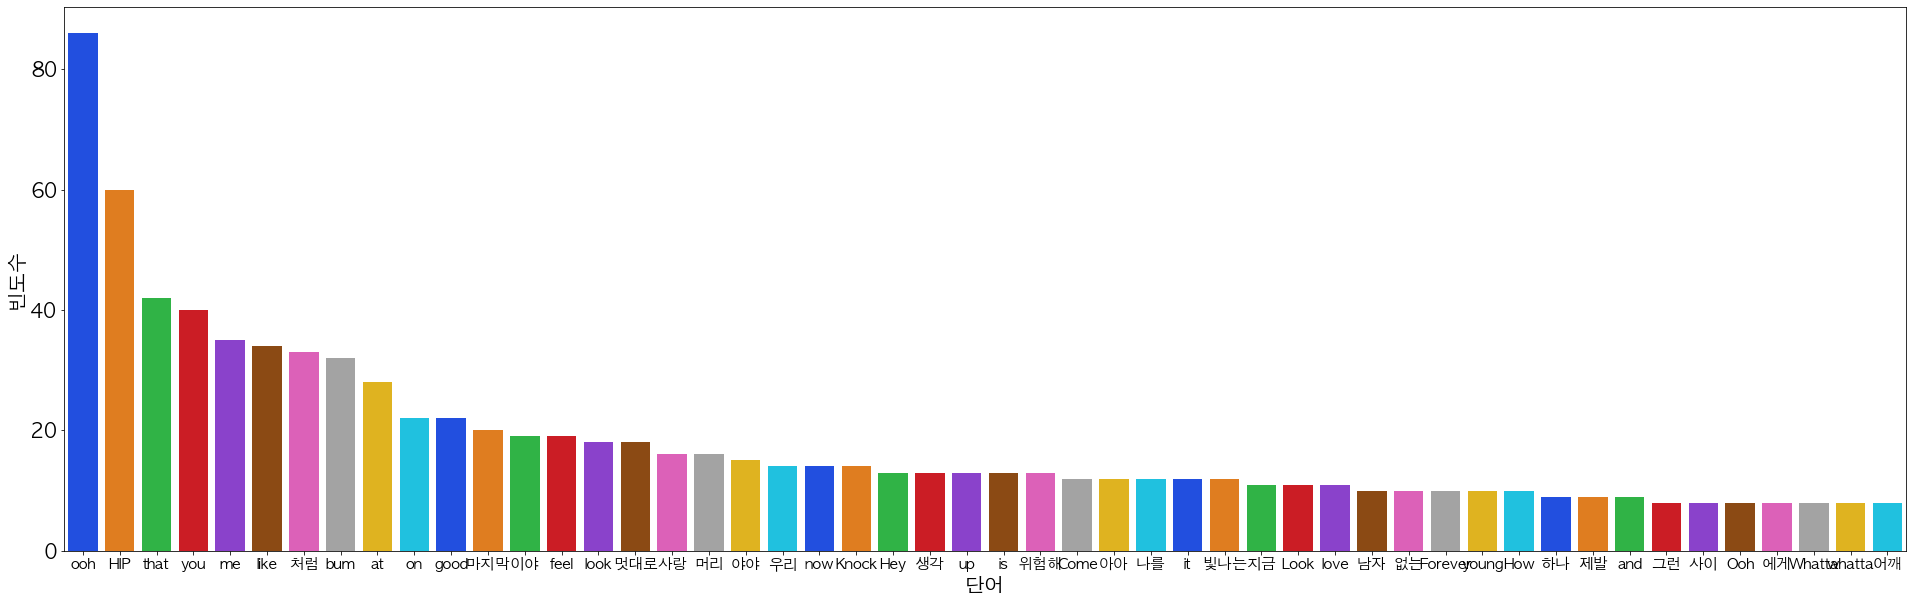

In [181]:
# barchart로 시각화
df4명그룹50_2 = pd.DataFrame(most)
df4명그룹50_2.columns = ["단어" , "빈도수"]
sns.barplot(data = df4명그룹50_2, x = "단어", y = "빈도수", palette = sns.color_palette("bright"))
plt.rcParams['figure.figsize'] = [33, 10]
plt.xticks(fontsize = 15)
plt.show()

형태소 형태로 보았을때는 곡 제목에 들어가는 단어 뿐만 아니라 영어 단어가 많이 포함되어 있는 것을 볼 수 있었다.

### '여성', '댄스', '그룹'의 순위별 가사
* 1-30위와 50-100위 순위 분류
* (조작적 정의 : 1-30위 차트인 하여 초대박/대박을 친 곡, 50-100위 차트인 하였지만 상대적으로 순위가 낮은 곡)

In [281]:
# 50-100위 순위(중복값 제거 전)
df_50이상 = df_4명댄스그룹[df_4명댄스그룹["순위"] >= 50]

In [187]:
# 1-30위 순위(중복값 제거 전)
df_30이하 = df_4명댄스그룹[df_4명댄스그룹["순위"] <= 30]

In [192]:
df_30이하.describe()

순위          좋아요 수             팬수   멤버수
count  34.000000      34.000000      34.000000  34.0
mean   13.058824   66719.735294   78207.147059   4.0
std     8.721069   55849.727398   78331.845648   0.0
min     1.000000    9350.000000    1847.000000   4.0
25%     6.000000   27033.500000   21088.000000   4.0
50%    12.000000   53265.000000   55508.000000   4.0
75%    19.000000   86072.250000   70496.000000   4.0
max    30.000000  218528.000000  233255.000000   4.0

In [193]:
df_50이상.describe()

순위          좋아요 수             팬수   멤버수
count  35.000000      35.000000      35.000000  35.0
mean   70.942857   42206.628571   54026.742857   4.0
std    13.869015   59278.658016   72660.923125   0.0
min    50.000000    1286.000000     662.000000   4.0
25%    61.000000    7816.500000    8040.000000   4.0
50%    69.000000   18837.000000   21196.000000   4.0
75%    80.000000   37313.500000   70493.000000   4.0
max    98.000000  218531.000000  233255.000000   4.0

1-30위의 데이터와 50-100위의 데이터에 둘다 포함이 된 2곡은 제거하여 분석

In [194]:
# 1-30위 순위(중복값 제거 후)
df_30이하 = df_30이하[df_30이하.제목 != "불장난"]
df_30이하 = df_30이하[df_30이하.제목 != "마지막처럼"]

In [195]:
# 1-30위 가사 txt 파일로 저장
df_30이하["가사"].to_csv('df_30이하.txt', sep = '\t', index = False, header = None)

/Users/cj/opt/anaconda3/envs/nano/lib/python3.8/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


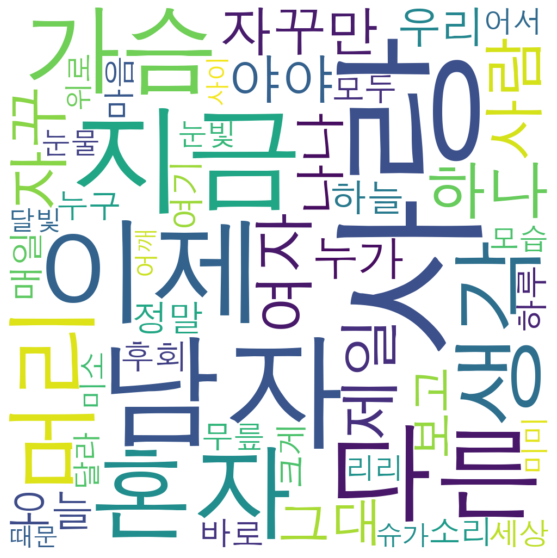

In [196]:
# 중복값 제거 후의 워드클라우드
f = open('df_30이하.txt', "r", encoding='utf-8')
lines = f.read()
from konlpy.tag import Twitter
nlpy = Twitter()
nouns = nlpy.nouns(lines)
# 두 글자 이상 단어만 추출
words = []
for n in nouns:
    if len(n) > 1:
        words.append(n)
# 단어 빈도수 계산하여 상위 50건만 추출
count = Counter(words)
most = count.most_common(50)
tags = {}
for n, c in most:
    tags[n] = c
wc = WordCloud(font_path= 
#                'C:/Windows/Fonts/gulim.ttc',
               # 맥일 경우, 
               '/Library/Fonts/AppleGothic.ttf',
                background_color="white",
                width=1000,
                height=1000,
                max_words=50,
                max_font_size=300)
wc = wc.generate_from_frequencies(tags)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig('wc30이하.png')

plt.show()

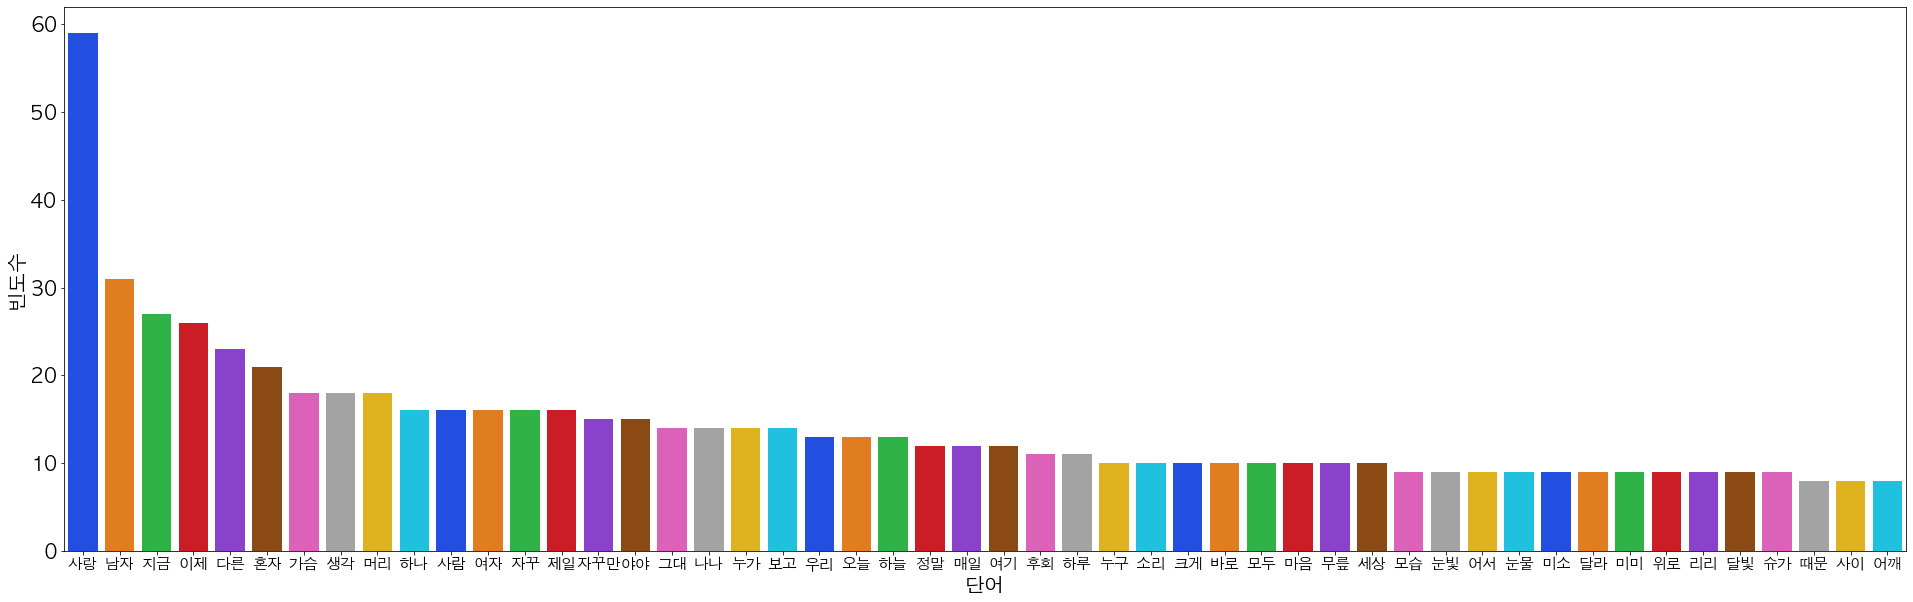

In [197]:
# barchart로 시각화
df30이하 = pd.DataFrame(most)
df30이하.columns = ["단어" , "빈도수"]
sns.barplot(data = df30이하 , x = "단어", y = "빈도수", palette = sns.color_palette("bright"))
plt.rcParams['figure.figsize'] = [33, 10]
plt.xticks(fontsize = 15)
plt.savefig('30이하.png')

In [198]:
# 두 글자 이상 단어 빈도수
most

[('사랑', 59),
 ('남자', 31),
 ('지금', 27),
 ('이제', 26),
 ('다른', 23),
 ('혼자', 21),
 ('가슴', 18),
 ('생각', 18),
 ('머리', 18),
 ('하나', 16),
 ('사람', 16),
 ('여자', 16),
 ('자꾸', 16),
 ('제일', 16),
 ('자꾸만', 15),
 ('야야', 15),
 ('그대', 14),
 ('나나', 14),
 ('누가', 14),
 ('보고', 14),
 ('우리', 13),
 ('오늘', 13),
 ('하늘', 13),
 ('정말', 12),
 ('매일', 12),
 ('여기', 12),
 ('후회', 11),
 ('하루', 11),
 ('누구', 10),
 ('소리', 10),
 ('크게', 10),
 ('바로', 10),
 ('모두', 10),
 ('마음', 10),
 ('무릎', 10),
 ('세상', 10),
 ('모습', 9),
 ('눈빛', 9),
 ('어서', 9),
 ('눈물', 9),
 ('미소', 9),
 ('달라', 9),
 ('미미', 9),
 ('위로', 9),
 ('리리', 9),
 ('달빛', 9),
 ('슈가', 9),
 ('때문', 8),
 ('사이', 8),
 ('어깨', 8)]

1-30위의 데이터와 50-100위의 데이터에 둘다 포함이 된 2곡은 제거하여 분석

In [199]:
# 50-100위 순위(중복값 제거 후)
df_50이상 = df_50이상[df_50이상.제목 != "마지막처럼"]
df_50이상 = df_50이상[df_50이상.제목 != "불장난"]

In [200]:
# 중복값 제거 후 워드클라우드를 위해 txt파일로 저장
df_50이상["가사"].to_csv('df_50이상.txt', sep = '\t', index = False, header = None)

/Users/cj/opt/anaconda3/envs/nano/lib/python3.8/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


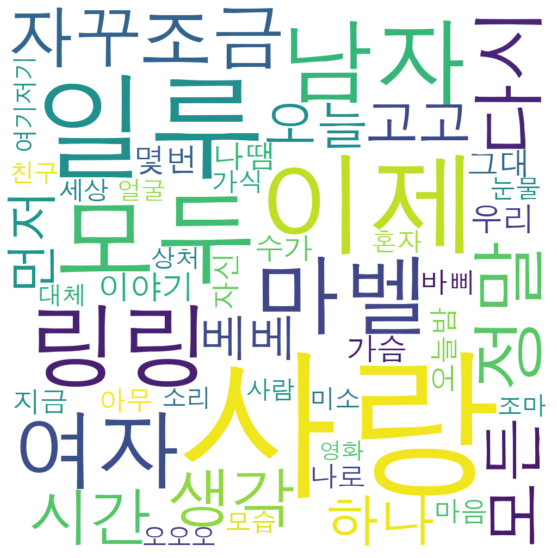

In [201]:
# 워드클라우드 시각화
f = open('df_50이상.txt', "r", encoding='utf-8')
lines = f.read()
from konlpy.tag import Twitter
nlpy = Twitter()
nouns = nlpy.nouns(lines)
# 두 글자 이상 단어만 추출
words = []
for n in nouns:
    if len(n) > 1:
        words.append(n)
# 단어 빈도수 계산하여 상위 50건만 추출
count = Counter(words)
most = count.most_common(50)
tags = {}
for n, c in most:
    tags[n] = c
wc = WordCloud(font_path= 
#                'C:/Windows/Fonts/gulim.ttc',
               # 맥일 경우, 
               '/Library/Fonts/AppleGothic.ttf',
                background_color="white",
                width=1000,
                height=1000,
                max_words=50,
                max_font_size=300)
wc = wc.generate_from_frequencies(tags)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig('wc50이상.png')

plt.show()

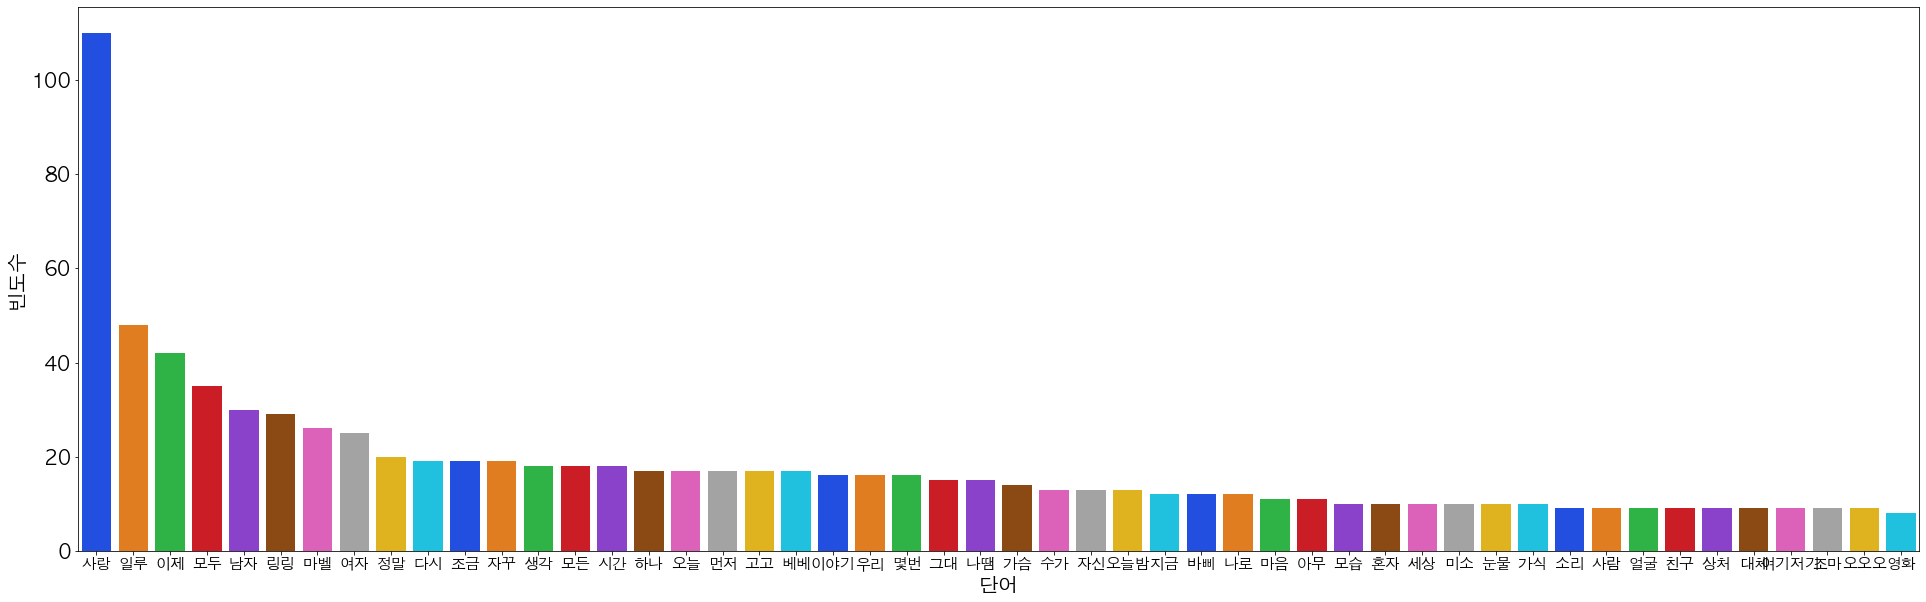

In [202]:
# barchart로 시각화
df50이상 = pd.DataFrame(most)
df50이상.columns = ["단어" , "빈도수"]
sns.barplot(data = df50이상 , x = "단어", y = "빈도수", palette = sns.color_palette("bright"))
plt.rcParams['figure.figsize'] = [33, 10]
plt.xticks(fontsize = 15)
plt.savefig('50이상.png')

In [203]:
# 두 글자 이상 단어 빈도수
most

[('사랑', 110),
 ('일루', 48),
 ('이제', 42),
 ('모두', 35),
 ('남자', 30),
 ('링링', 29),
 ('마벨', 26),
 ('여자', 25),
 ('정말', 20),
 ('다시', 19),
 ('조금', 19),
 ('자꾸', 19),
 ('생각', 18),
 ('모든', 18),
 ('시간', 18),
 ('하나', 17),
 ('오늘', 17),
 ('먼저', 17),
 ('고고', 17),
 ('베베', 17),
 ('이야기', 16),
 ('우리', 16),
 ('몇번', 16),
 ('그대', 15),
 ('나땜', 15),
 ('가슴', 14),
 ('수가', 13),
 ('자신', 13),
 ('오늘밤', 13),
 ('지금', 12),
 ('바삐', 12),
 ('나로', 12),
 ('마음', 11),
 ('아무', 11),
 ('모습', 10),
 ('혼자', 10),
 ('세상', 10),
 ('미소', 10),
 ('눈물', 10),
 ('가식', 10),
 ('소리', 9),
 ('사람', 9),
 ('얼굴', 9),
 ('친구', 9),
 ('상처', 9),
 ('대체', 9),
 ('여기저기', 9),
 ('조마', 9),
 ('오오오', 9),
 ('영화', 8)]

In [289]:
df_30이하[df_30이하["가사"].str.contains("사랑")]["순위"].mean()

10.625

In [290]:
df_30이하[~df_30이하["가사"].str.contains("사랑")]["순위"].mean()

14.5

* 1위-100위의 차트중 1-30위를 기록한 곡들에서 가사에 '사랑'이 포함된 곡의 평균 순위는 10.6위
* 1위-100위의 차트중 1-30위를 기록한 곡들에서 가사에 '사랑'이 포함되지 않은 곡의 평균 순위는 14.5위

In [284]:
df_50이상[df_50이상["가사"].str.contains("사랑")]["순위"].mean()

70.52

In [291]:
df_50이상[~df_50이상["가사"].str.contains("사랑")]["순위"].mean()

72.0

* 1위-100위의 차트중 50-100위를 기록한 곡들에서 가사에 '사랑'이 포함된 곡의 평균 순위는 70.5위
* 1위-100위의 차트중 50-100위를 기록한 곡들에서 가사에 '사랑'이 포함되지 않은 곡의 평균 순위는 72위

1-30위 와 50-100위 비교 결과
   * 먼저 블랙핑크의 '마지막처럼'과 '불장난'이 1-30위와 50-100위에 둘 다 포함되어 있어 좀 더 명확한 결과를 보기 위해 제거하였다
   * 중복값을 제거하여 1-30위에 총 32곡 50-100위에 총 33곡으로 매우 유사한 조건으로 분석을 진행하였다
   * '사랑'이 두 순위 구간에서 가장 많이 쓰였다
   * 50-100위의 순위에서 1-30위보다 '사랑'의 단어 사용 빈도는 약 2배 정도 많았다
   * 하지만 1-30위와 50-100위 두 구간에서 '사랑'이 포함된 곡의 순위가 '사랑'이 포함되지 않은 곡의 순위보다 높게 나왔다 

### 가사분석결론
    
    여성그룹, 연대별 여성그룹, 여성댄스그룹, 4인 여성댄스그룹 결과에서 '사랑'의 단어 사용 빈도가 가사에서 압도적으로 많음을 볼 수 있다.
    4인 여성댄스그룹 순위 1-30과 50-100을 보았을 때, 50-100위에 '사랑'의 단어 사용 빈도가 1-30위보다 2배 가량 많았다.
    그러나, 1-30위와 50-100위의 곡에서 '사랑'이 들어간 곡들이 1-30위와 50-100위의 곡에 '사랑'이 들어가지 않은 곡들보다 순위에서 높음을 보여주었다.
    
    * 따라서, 신인 걸그룹 곡에는 '사랑'이 들어간 주제나 컨셉의 곡을 작사하는 것을 추천하며 단어의 빈도는 적게 하는 것을 추천한다.

-------------------------------

## 6. 발매일 전략
* 연도별 순위에 오른 곡 수 변화
* 월 별 인기 장르 비교
* 장르에 따른 멤버수 별 곡 수

In [204]:
# 데이터셋 다시 불러오기
df = pd.read_csv('/Users/cj/Desktop/개인/project/멜론/Realfinal.csv', encoding = 'utf-8')
df = df[df['연도'] <= 2020]

### 연도별 순위에 오른 곡 수 변화
* 전체년도 곡 수 변화
* 연도별 top100에 오른 여성그룹수 변화

In [207]:
# 발매일 타입 변환
df['발매일']= pd.to_datetime(df['발매일'])
df['발매일']

0      1983-08-15
1      1983-12-05
2      1984-01-30
3      2000-09-05
4      1985-01-25
          ...    
3677   2019-03-24
3678   2020-03-13
3679   2016-06-21
3680   2020-05-29
3681   2020-01-19
Name: 발매일, Length: 3682, dtype: datetime64[ns]

In [208]:
# 발매일에서 발매월만 추출
df['발매월']= df['발매일'].dt.month
df[['발매월']].tail()

발매월
3677    3
3678    3
3679    6
3680    5
3681    1

발매월별 top100에 오른 곡 수를 파악하기 위해 발매일 컬럼에서 발매월을 추출하기 위한 과정이 필요했음.

In [209]:
# df에서 솔로/그룹에서 그룹만 추출 group_df로 지정
group_df = df[df['솔로/그룹'] == '그룹']
group_df

연도  순위                                제목       가수  \
14    1984.0  15                              아름다워    윤수일밴드   
16    1984.0  17                               갯바위      한마음   
29    1984.0  30                         모두가 사랑이예요     해바라기   
35    1984.0  36                                은지     배따라기   
49    1984.0  50                         그대는 나의 인생     한울타리   
...      ...  ..                               ...      ...   
3664  2020.0  83                              있어줘요      장덕철   
3671  2020.0  90                              덤디덤디  (여자)아이들   
3672  2020.0  91  We are Bulletproof : the Eternal    방탄소년단   
3676  2020.0  95                       Inner Child    방탄소년단   
3680  2020.0  99                      너에게 난, 나에게 넌  미도와 파라솔   

                                앨범     좋아요 수        발매일          장르  \
14                         윤수일밴드 3     871.0 1984-03-05        록/메탈   
16    미사리 포크 연가(戀歌)(오리지날 & 라이브 앨범)     464.0 2003-01-01      포크/블루스   
29                   해바라기 오리지날 힛트송     493.0 1990-12-01      포크/블루스   
35                            배따라기      88.0 1990-02-01      포크/블루스   
49                눈물의 승차권/그대는 나의인생      10.0 1983-09-10      포크/블루스   
...                            ...       ...        ...         ...   
3664                          있어줘요   79039.0 2019-10-09   발라드, 인디음악   
3671            덤디덤디 (DUMDi DUMDi)  101147.0 2020-08-03          댄스   
3672           MAP OF THE SOUL : 7  147480.0 2020-02-21        랩/힙합   
3676           MAP OF THE SOUL : 7  145156.0 2020-02-21        랩/힙합   
3680         슬기로운 의사생활 OST Part 12   71370.0 2020-05-29  발라드, 국내드라마   

                                                     가사        팬수  멤버수 솔로/그룹  \
14    아름다워 오 그대가 아름다워 아름다워 그대 모습이 아름다워 복잡한 도시를 나와 이름...      54.0  1.0    그룹   
16    나는 나는 갯바위 당신은 나를 사랑하는 파도 어느 고운 바람 불던날 잔잔히 다가와 ...     125.0  2.0    그룹   
29    모두가 이별이에요 따뜻한 공간과도 이별 수많은 시간과도 이별이지요 이별이지요 콧날이...    1126.0  2.0    그룹   
35    은지 빗물이 한 방울 두 방울 거리에 내리잖아 은지 이젠 눈물을 닦고 귀엽게 한번 ...     249.0  1.0    그룹   
49    나 오직 그대를 사랑해 그 사랑 변하지 마오 우린 비밀이 없어요 꿈과 사랑을 나누어...      19.0  4.0    그룹   
...                                                 ...       ...  ...   ...   
3664  나와 둘이 함께 늙어가자던 습관처럼 뱉던 말 아직 여전하니 뭐든 나와 함께 한다면 ...   13738.0  3.0    그룹   
3671  뜨거운 태양에 살짝 미친 난 쉽게 두 볼이 빨개지고 그러다 어질어질 달아오른 난 헤...   85460.0  6.0    그룹   
3672  가진 게 꿈밖에 없었네 눈 뜨면 뿌연 아침뿐 밤새 춤을 추며 노래해 그 끝이 없던 ...  777869.0  7.0    그룹   
3676  그때 우리 참 많이 힘들었지 너무나 먼 저 하늘의 별 올려보면서  그때의 넌 은하수...  777869.0  7.0    그룹   
3680  너에게 난 해질녘 노을처럼 한편의 아름다운 추억이 되고 소중했던 우리 푸르던 날을 ...   11105.0  5.0    그룹   

      성별                                                 작사  \
14    남성                                                Nan   
16    혼성                                                강영철   
29    남성                                                Nan   
35    혼성                                                이혜민   
49    혼성                                                Nan   
...   ..                                                ...   
3664  남성                                                 덕인   
3671  여성                                                전소연   
3672  남성  Audien RM HenrikMichelsen Sophie'Frances'Cooke...   
3676  남성  RM MattThomson MaxLynedochGraham RyanLawrie El...   
3680  혼성                                        송봉주(자전거탄풍경)   

                                                     작곡           편곡  발매월  
14                                                  Nan          Nan    3  
16                                                  강영철          김명곤    1  
29                                                  Nan          Nan   12  
35                                                  이혜민          Nan    2  
49                                                  Nan          Nan    9  
...                                                 ...          ...  ...  
3664                                                 덕인     DOKO(도코)   10  
3671                                        전소연 PopTime  PopTime 전소연    8 

In [211]:
# 연도별 그룹들의 top100에 오른 곡 수 파악
group_df.groupby('연도')['가수'].nunique()

연도
1984.0     8
1985.0    14
1986.0    14
1987.0    13
1988.0    15
1989.0    12
1990.0    12
1991.0    14
1992.0     9
1993.0    20
1994.0    33
1995.0    31
1996.0    32
1997.0    35
1998.0    30
1999.0    29
2000.0    25
2001.0    23
2002.0    31
2003.0    32
2004.0    26
2005.0    24
2006.0    24
2007.0    26
2008.0    27
2009.0    35
2010.0    35
2011.0    45
2012.0    36
2013.0    31
2014.0    30
2015.0    33
2016.0    24
2017.0    28
2018.0    23
2019.0    18
2020.0    22
Name: 가수, dtype: int64

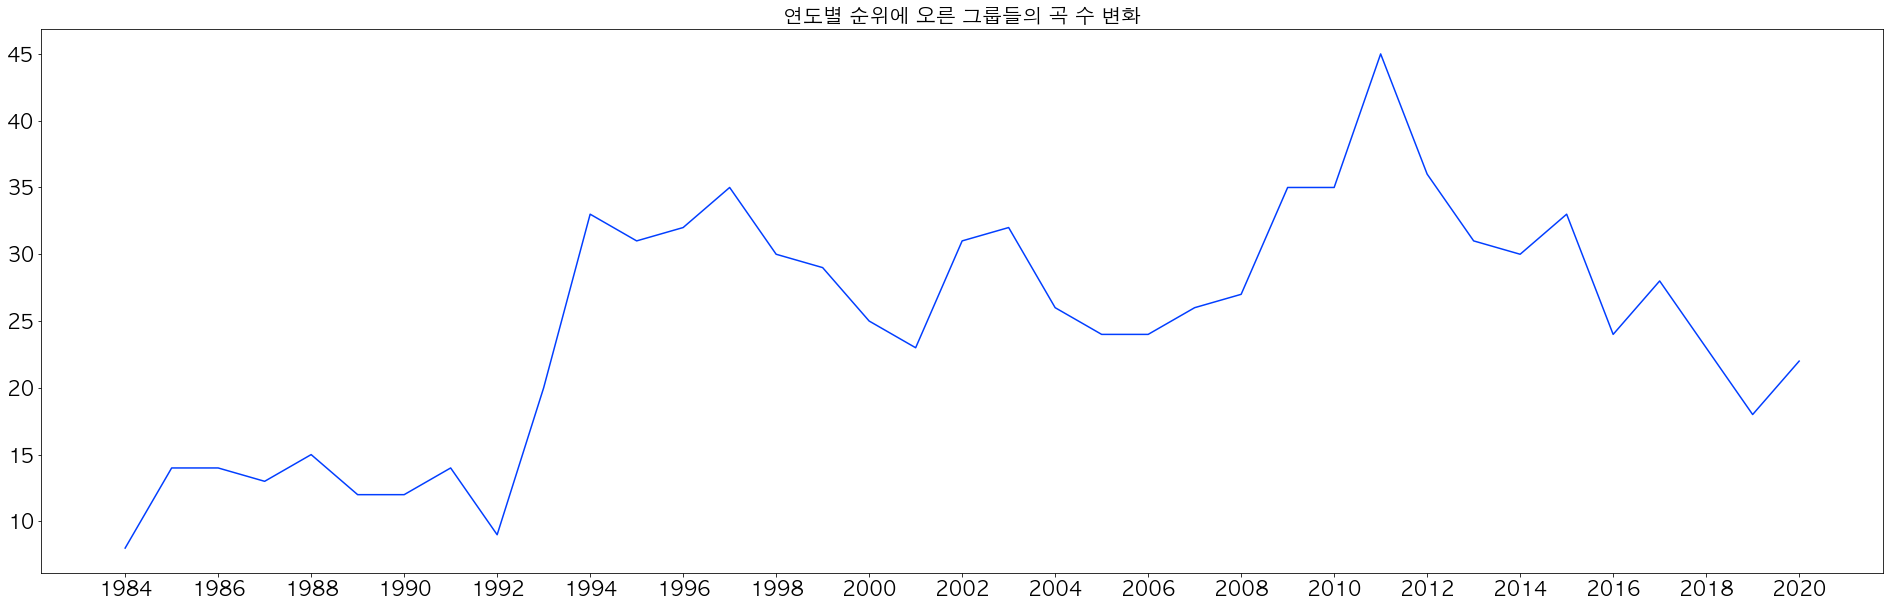

In [212]:
# 시각화
plt.figure(figsize= (33, 10))
ax=plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
plt.title('연도별 순위에 오른 그룹들의 곡 수 변화', fontsize=20)
plt.plot(group_df.groupby('연도')['가수'].nunique())

연도별 순위에 오른 그룹들의 곡 수 변화를 확인하고 다음으로 여성 그룹으로 범위를 정해서 진행

In [214]:
# group_df에서 여성의 그룹만 추출. female_group으로 지정 및 확인
female_group = group_df[group_df['성별']=='여성']
female_group.head()

연도  순위          제목      가수                             앨범   좋아요 수  \
61    1984.0  62      하루에 한번  윤희와 윤미  하루에 한번 / 철없는 작별 / 사랑에 깊이 빠졌어요     5.0   
425   1988.0  43     난 아직도 널   작품 하나               87 MBC 대학가요제 제1집   273.0   
578   1989.0  96        히말라야      이브                            Eve     6.0   
1035  1994.0  54  그리움으로 지는 너      코코                     그리움으로 지는 너   611.0   
1258  1996.0  77          비련      비비                     B.B's Come  3487.0   

            발매일    장르                                                 가사  \
61   1984-06-10  성인가요  하루에 한번 만날 때는 달콤한 시간 너무 짧아 아쉬운 마음 버릴 수 없네 하루에 한...   
425  1988-01-09   발라드  거리를 나 혼자 걸었네 내게는 아무도 없었네 차가운 바람 불때면 내 마음 왠지 쓸쓸...   
578  1988-08-30  록/메탈  눈 덮힌 산 바람 불어도 하얗게 빛나는 히말라야 외로워도 늘 말이없어 어둠이 깔려도...   
1035 1996-07-05   발라드  거친 숨소리 속에 흐느낌은 이젠 제발 그만 좀 해 이별의 아픈 푸념들 더 이상 듣기...   
1258 1996-04-01    댄스  붐붐붐 치키치키니 오 제발 너 제발 다시 생각해봐 붐붐붐 치키치키니 넌 날 아직도 ...   

         팬수  멤버수 솔로/그룹  성별   작사          작곡          편곡  발매월  
61      5.0  2.0    그룹  여성  Nan         Nan         Nan    6  
425    33.0  2.0    그룹  여성  김휘원         김휘원         이기범    1  
578    29.0  4.0    그룹  여성  Nan         Nan         Nan    8  
1035  148.0  2.0    그룹  여성  이혜영         조진호         조진호    7  
1258  303.0  2.0    그룹  여성  강은경  Papertonic  Papertonic    4

In [215]:
# 1984~2020년간 데뷔한 여성그룹의 곡 수 파악
female_group['가수'].nunique()

73

In [216]:
# 여자 그룹의 평균 멤버수 확인
female_group = group_df[group_df['성별']=='여성']
female_group['멤버수'].mean()

4.627218934911243

약 36년간 73개의 여성그룹이 존재했고, 이들의 평균 멤버수는 4.6명으로 파악함.

In [217]:
gmember_count = pd.DataFrame(female_group.groupby('연도')['가수'].nunique())
gmember_count = gmember_count.reset_index()
gmember_count

연도  가수
0   1984.0   1
1   1988.0   1
2   1989.0   1
3   1994.0   1
4   1996.0   2
5   1997.0   2
6   1998.0   4
7   1999.0   6
8   2000.0   4
9   2001.0   4
10  2002.0   3
11  2003.0   7
12  2005.0   4
13  2006.0   7
14  2007.0   8
15  2008.0   8
16  2009.0  14
17  2010.0  16
18  2011.0  20
19  2012.0  14
20  2013.0  14
21  2014.0  11
22  2015.0  14
23  2016.0  11
24  2017.0   8
25  2018.0   9
26  2019.0   5
27  2020.0  11

<AxesSubplot:title={'center':'연도별 top100에 오른 여성그룹 수 변화'}, xlabel='연도', ylabel='가수'>

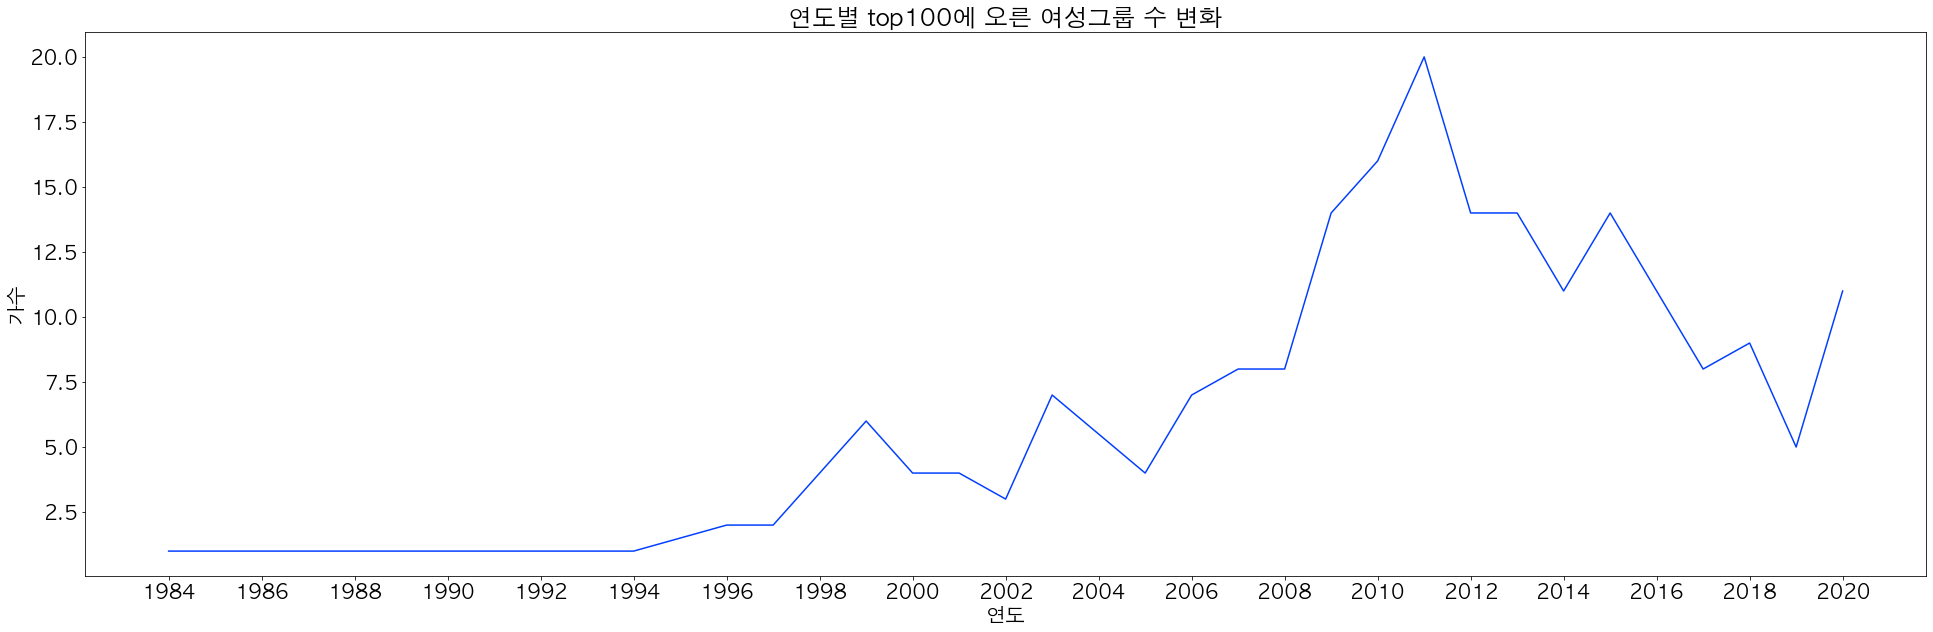

In [218]:
# 시각화
plt.rc("font", family = "AppleGothic")
plt.figure(figsize=(33,10))
ax=plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
plt.title('연도별 top100에 오른 여성그룹 수 변화')
sns.lineplot(data = gmember_count, x='연도', y='가수')

In [219]:
#연도별 top100에 오른 여성 그룹의 곡수 gmember_scount로 지정 
gmember_count = pd.DataFrame(female_group.groupby('연도')['제목'].count())
gmember_scount = gmember_count.rename(columns = {'제목': '곡 수'})
gmember_scount = gmember_scount.reset_index()
gmember_scount

연도  곡 수
0   1984.0    1
1   1988.0    1
2   1989.0    1
3   1994.0    1
4   1996.0    2
5   1997.0    2
6   1998.0    9
7   1999.0    7
8   2000.0    5
9   2001.0    5
10  2002.0    3
11  2003.0    9
12  2005.0    6
13  2006.0   13
14  2007.0   11
15  2008.0   19
16  2009.0   29
17  2010.0   29
18  2011.0   31
19  2012.0   19
20  2013.0   22
21  2014.0   19
22  2015.0   20
23  2016.0   18
24  2017.0   16
25  2018.0   19
26  2019.0    8
27  2020.0   13

In [220]:
# 연도별 top100안에 오른 여성그룹의 곡 수
gmember_scount = pd.DataFrame(female_group.groupby('연도')['제목'].count())
gmember_scount = gmember_count.rename(columns = {'제목': '곡 수'})
gmember_scount = gmember_scount.reset_index()
gmember_scount

연도  곡 수
0   1984.0    1
1   1988.0    1
2   1989.0    1
3   1994.0    1
4   1996.0    2
5   1997.0    2
6   1998.0    9
7   1999.0    7
8   2000.0    5
9   2001.0    5
10  2002.0    3
11  2003.0    9
12  2005.0    6
13  2006.0   13
14  2007.0   11
15  2008.0   19
16  2009.0   29
17  2010.0   29
18  2011.0   31
19  2012.0   19
20  2013.0   22
21  2014.0   19
22  2015.0   20
23  2016.0   18
24  2017.0   16
25  2018.0   19
26  2019.0    8
27  2020.0   13

<AxesSubplot:title={'center':'연도별 top100에 오른 여성그룹의 곡 수 변화'}, xlabel='연도', ylabel='곡 수'>

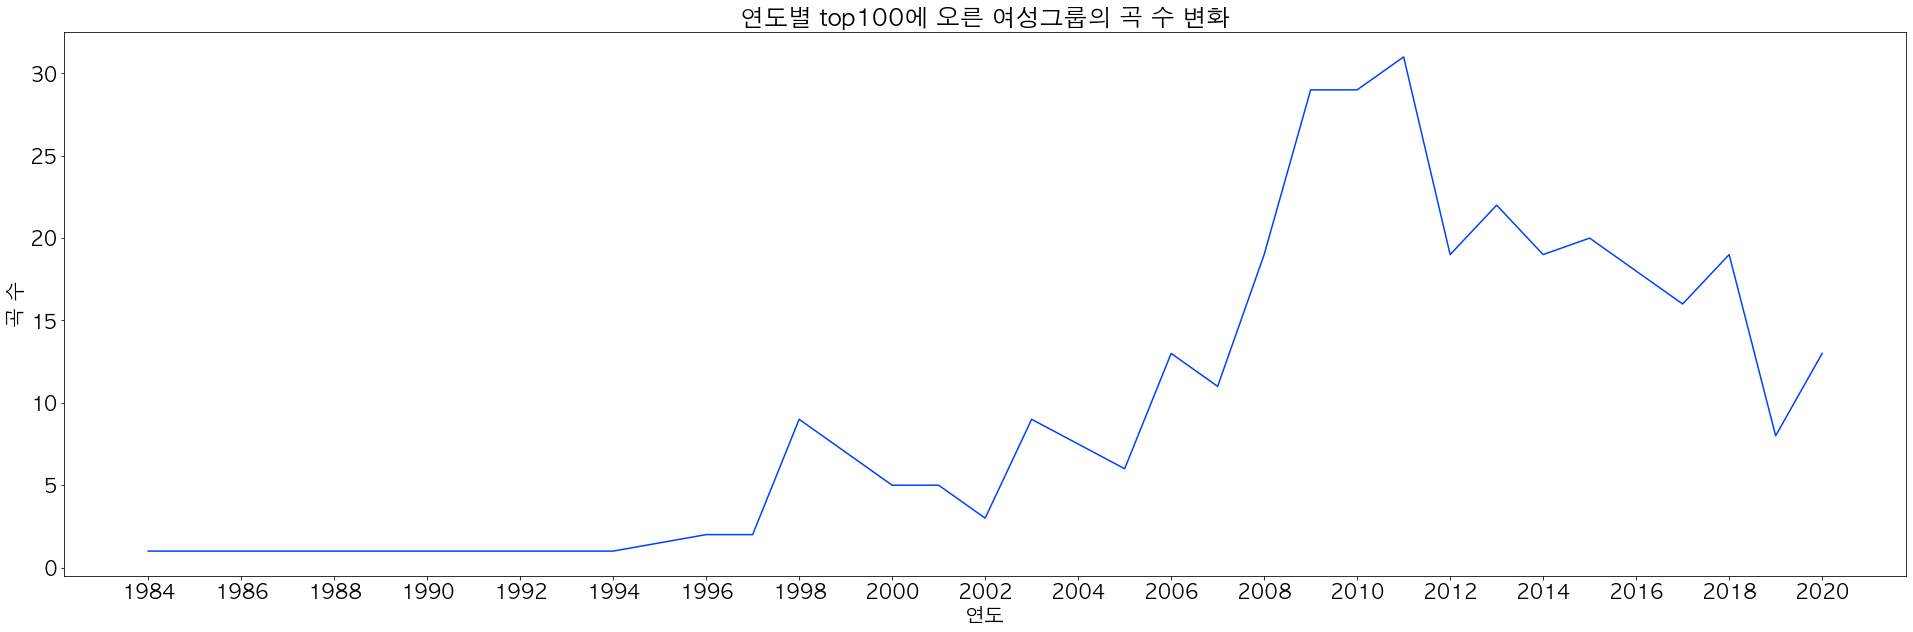

In [221]:
# 시각화
plt.rc("font", family = "AppleGothic")
plt.figure(figsize=(33,10))
ax=plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
plt.title('연도별 top100에 오른 여성그룹의 곡 수 변화')
sns.lineplot(data = gmember_scount, x='연도', y='곡 수')

시각화한 결과값을 통해 확인할 수 있는 부분이 2005년을 기점으로 2011년까지 여성 그룹의 곡 수가 증가했으나 이후 하락하는 추세임을 확인할 수 있음.

1984년 ~ 2020년의 4대 연대 여성그룹의 곡 수 (80년대/ 90년대 / 00년대 / 10~20년대)를 통해 연도별 특징을 파악하기 위한 과정

In [223]:
# 80년대 여성그룹의 곡 수 
g80=gmember_scount[gmember_scount['연도']<1990]
g80

연도  곡 수
0  1984.0    1
1  1988.0    1
2  1989.0    1

<AxesSubplot:title={'center':'80년대 top100에 오른 여성그룹 노래'}, xlabel='연도', ylabel='곡 수'>

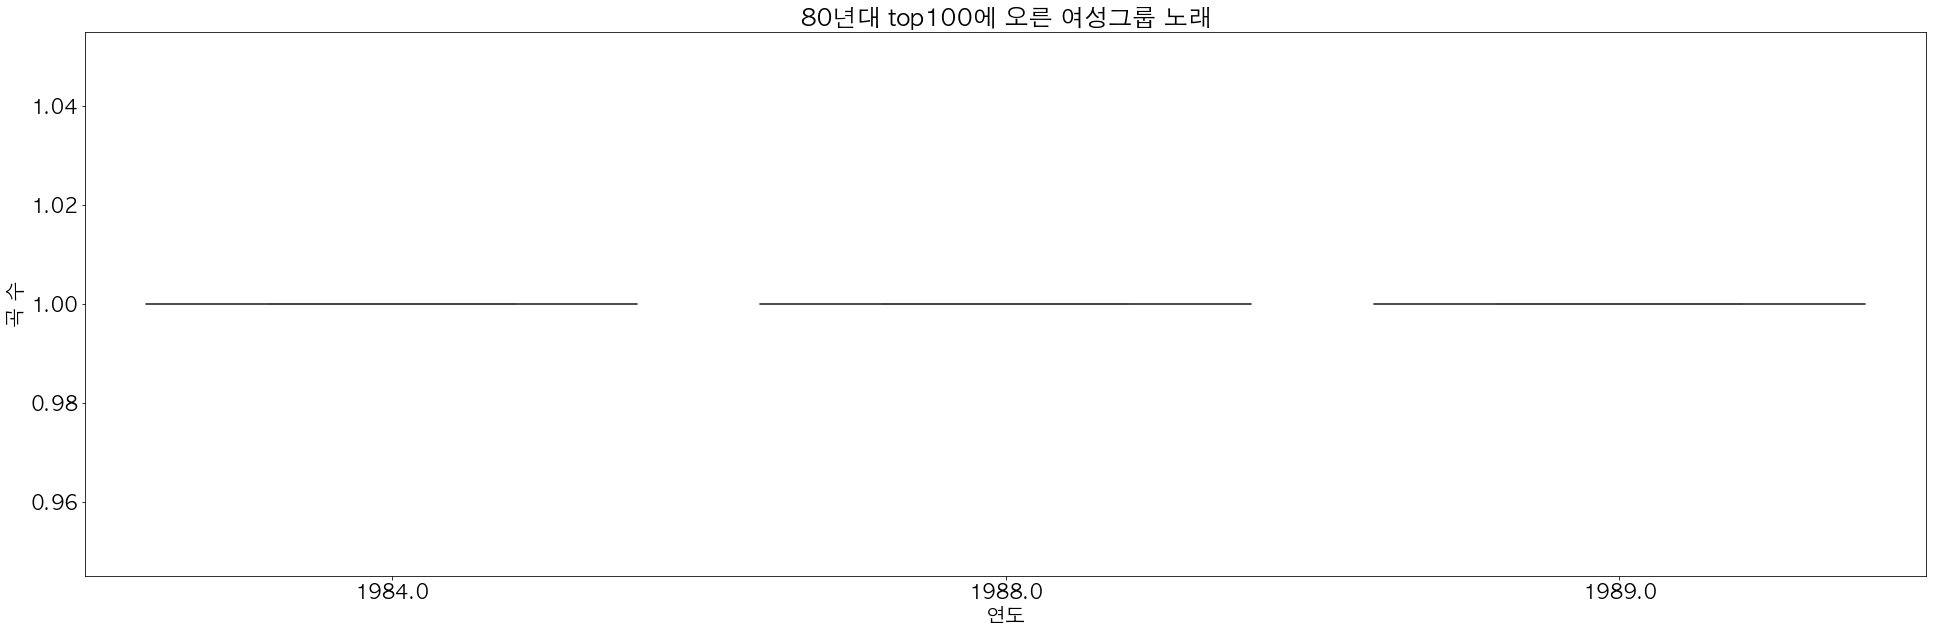

In [224]:
# 80년대 여성그룹의 곡 수 시각화 
plt.rc("font", family = "AppleGothic")
plt.figure(figsize=(33,10))
plt.title('80년대 top100에 오른 여성그룹 노래')
sns.boxplot(data=g80, x='연도', y='곡 수')

* 80년대 여성그룹의 경우 총 3곡

In [225]:
# 90년대 여성그룹의 곡 수 
g90=gmember_scount[(gmember_scount['연도']>=1990) & (gmember_scount['연도']<2000)]
g90

연도  곡 수
3  1994.0    1
4  1996.0    2
5  1997.0    2
6  1998.0    9
7  1999.0    7

<AxesSubplot:title={'center':'90년대 top100에 오른 여성그룹 노래'}, xlabel='연도', ylabel='곡 수'>

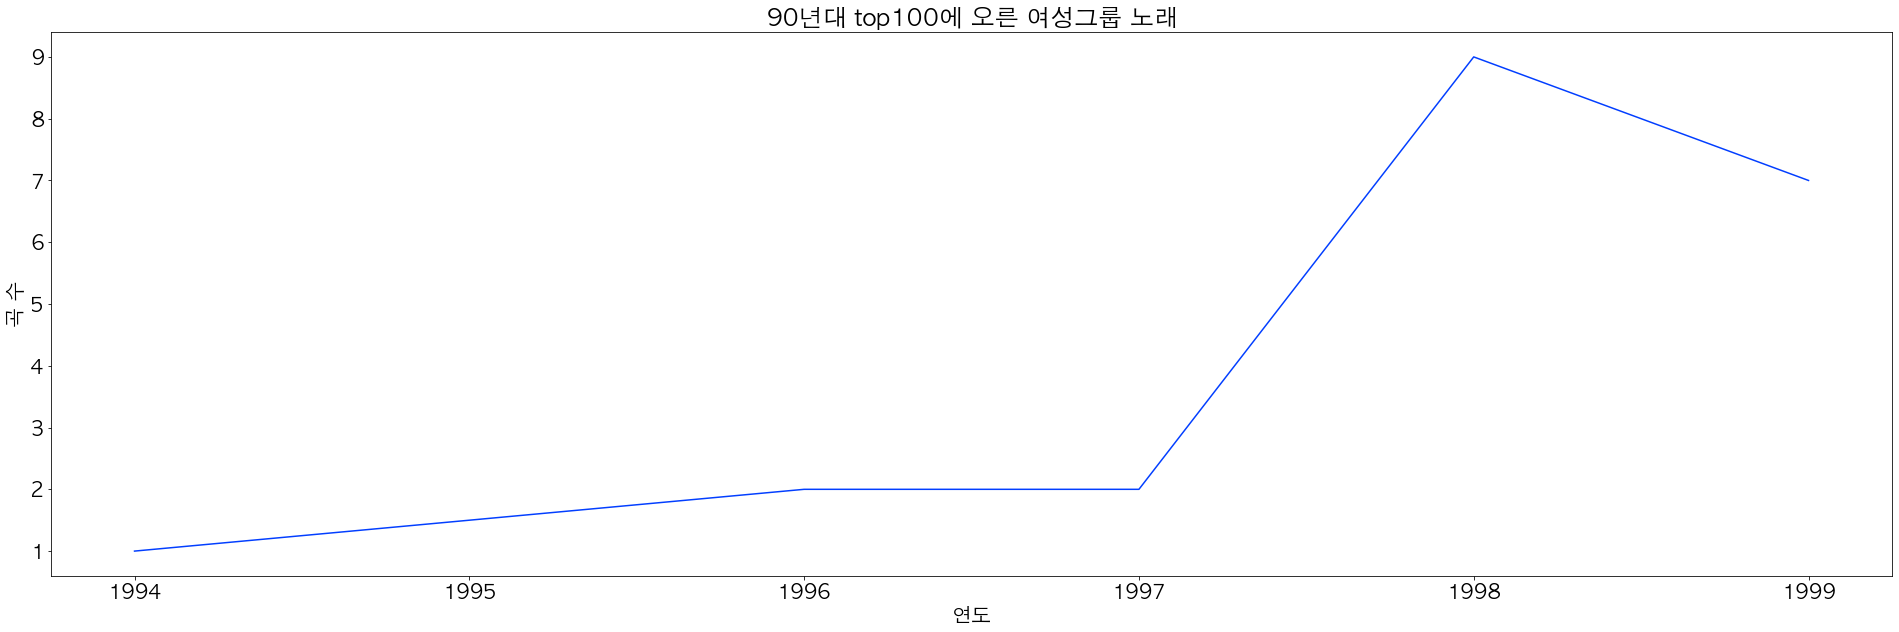

In [226]:
# 90년대 여성그룹의 곡 수 시각화
plt.rc("font", family = "AppleGothic")
plt.figure(figsize=(33,10))
ax=plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.title('90년대 top100에 오른 여성그룹 노래')
sns.lineplot(data=g90, x='연도', y='곡 수')

90년도에서는 1997년 2곡에서 1998년에 9곡으로 눈에 띄는 변화를 보임

In [227]:
# 00년대 여성그룹의 곡 수 
g00 = gmember_scount[(gmember_scount['연도']>=2000) & (gmember_scount['연도']<2010)]
g00

연도  곡 수
8   2000.0    5
9   2001.0    5
10  2002.0    3
11  2003.0    9
12  2005.0    6
13  2006.0   13
14  2007.0   11
15  2008.0   19
16  2009.0   29

<AxesSubplot:title={'center':'00년대 top100에 오른 여성그룹 노래'}, xlabel='연도', ylabel='곡 수'>

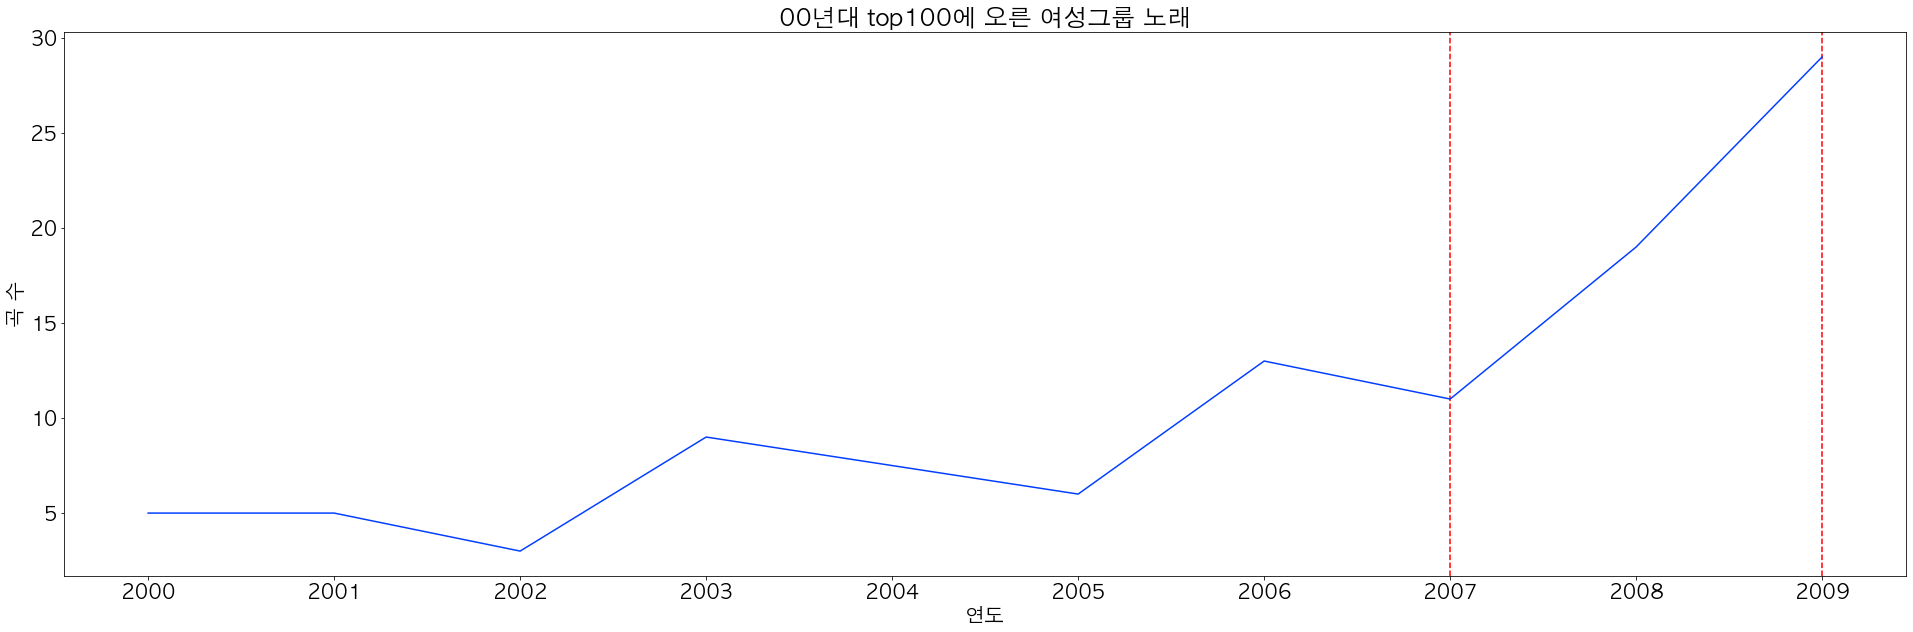

In [301]:
# 00년대 여성그룹의 곡 수 시각화
plt.rc("font", family = "AppleGothic")
plt.figure(figsize=(33,10))
ax=plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.axvline(x=2007, color='r', linestyle='--')
plt.axvline(x=2009, color='r', linestyle='--')
plt.title('00년대 top100에 오른 여성그룹 노래')
sns.lineplot(data=g00, x='연도', y='곡 수')

2007년도까지 조금씩 곡 수가 많아지다가 2007년도부턴 급격하게 곡 수가 많아지는 모습을 보여줌

In [229]:
# 10~20년대 여성그룹의 곡 수 
g1020=gmember_scount[gmember_scount['연도']>2010]
g1020

연도  곡 수
18  2011.0   31
19  2012.0   19
20  2013.0   22
21  2014.0   19
22  2015.0   20
23  2016.0   18
24  2017.0   16
25  2018.0   19
26  2019.0    8
27  2020.0   13

<AxesSubplot:title={'center':'10~20년도 top100에 오른 여성그룹 노래'}, xlabel='연도', ylabel='곡 수'>

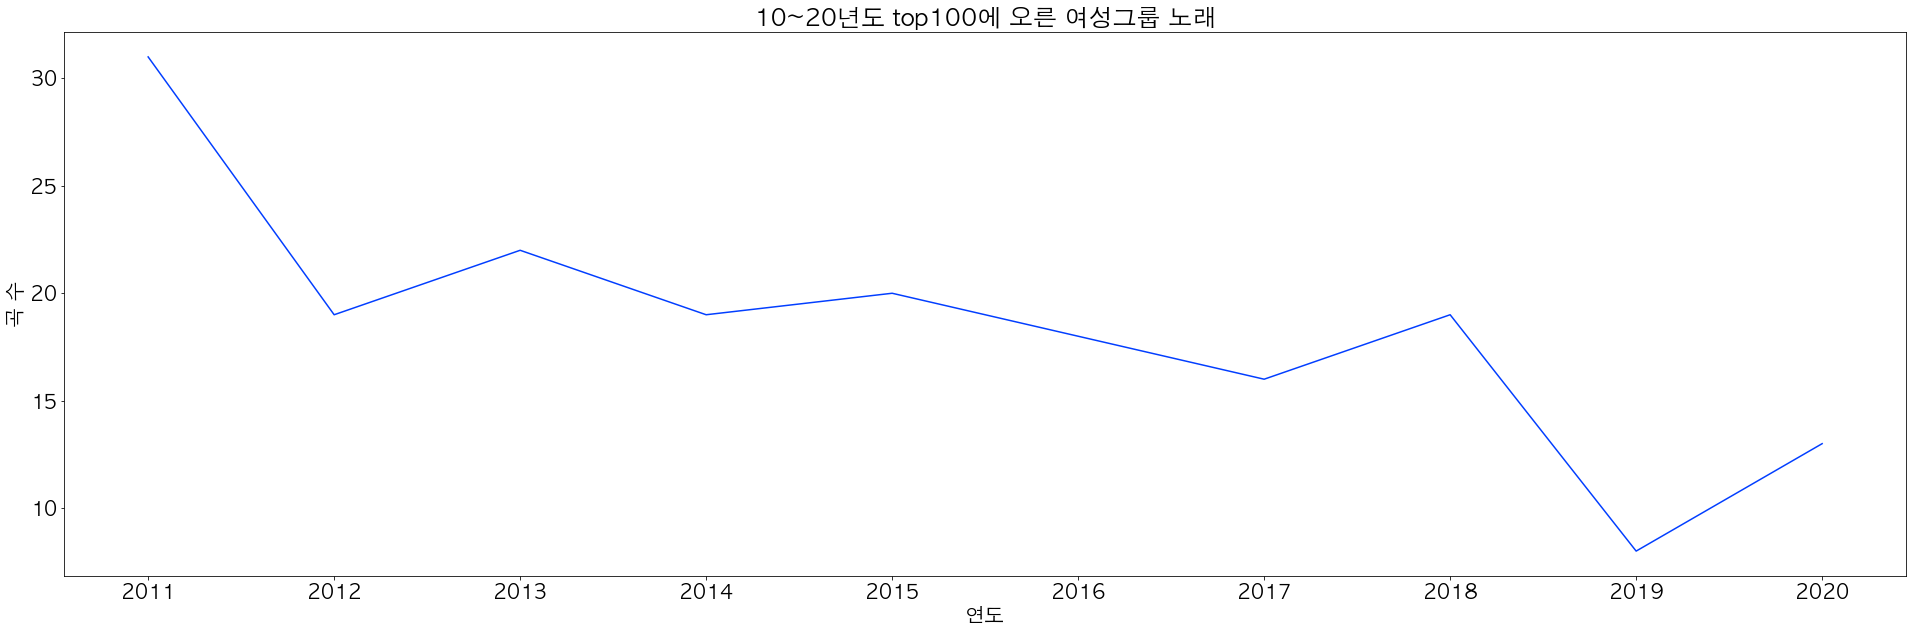

In [230]:
# 10~20년대 여성그룹의 곡 수 시각화
plt.rc("font", family = "AppleGothic")
plt.figure(figsize=(33,10))
ax=plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.title('10~20년도 top100에 오른 여성그룹 노래')
sns.lineplot(data=g1020, x='연도', y='곡 수')

연도를 나누는 과정에서 뚜렷한 특징이 없다고 판단되어 2000년 이전 / 2000년에서 2010년 / 2010년 이후로 분류해서 특징을 확인하는 과정

In [292]:
# 2000년 이전 차트에 오른 평균 곡 수
gmember_scount[gmember_scount['연도'] <2000].mean()

연도     1993.125
곡 수       3.000
dtype: float64

In [232]:
# 2000년대 차트에 오른 평균 곡 수
gmember_scount[(gmember_scount['연도'] >=2000) & (gmember_scount['연도'] < 2010)].mean()

연도     2004.555556
곡 수      11.111111
dtype: float64

In [233]:
# 2010년 이후 차트에 오른 평균 곡 수
gmember_scount[gmember_scount['연도'] >=2010].mean()

연도     2015.000000
곡 수      19.454545
dtype: float64

2000년 이전 / 2000년-2010년 / 2010년 이후의 결과에서 점차 곡 수가 많아졌음을 확인

### 월 별 인기 장르 비교
* 발매월별 여성 그룹의 곡 수
* 여그룹 월 별 인기 장르
* 월 별 여성댄스그룹의 곡 수

월에 따른 top100에 오른 여성 그룹의 곡 수를 파악하는 과정. 이를 통해 여성그룹의 월별 활동정도를 파악하고자 함.

In [234]:
# 발매월별 여성그룹수 gmember_mcount로 지정
gmember_mcount = pd.DataFrame(female_group.groupby('발매월')['멤버수'].count())
gmember_mcount = gmember_mcount.rename(columns = {'멤버수': '그룹수'})
gmember_mcount = gmember_mcount.reset_index()
gmember_mcount

발매월  그룹수
0     1   30
1     2   33
2     3   22
3     4   29
4     5   27
5     6   36
6     7   45
7     8   24
8     9   26
9    10   22
10   11   35
11   12    9

<AxesSubplot:title={'center':'발매월별 top100에 오른 여성그룹의 노래'}, xlabel='발매월', ylabel='그룹수'>

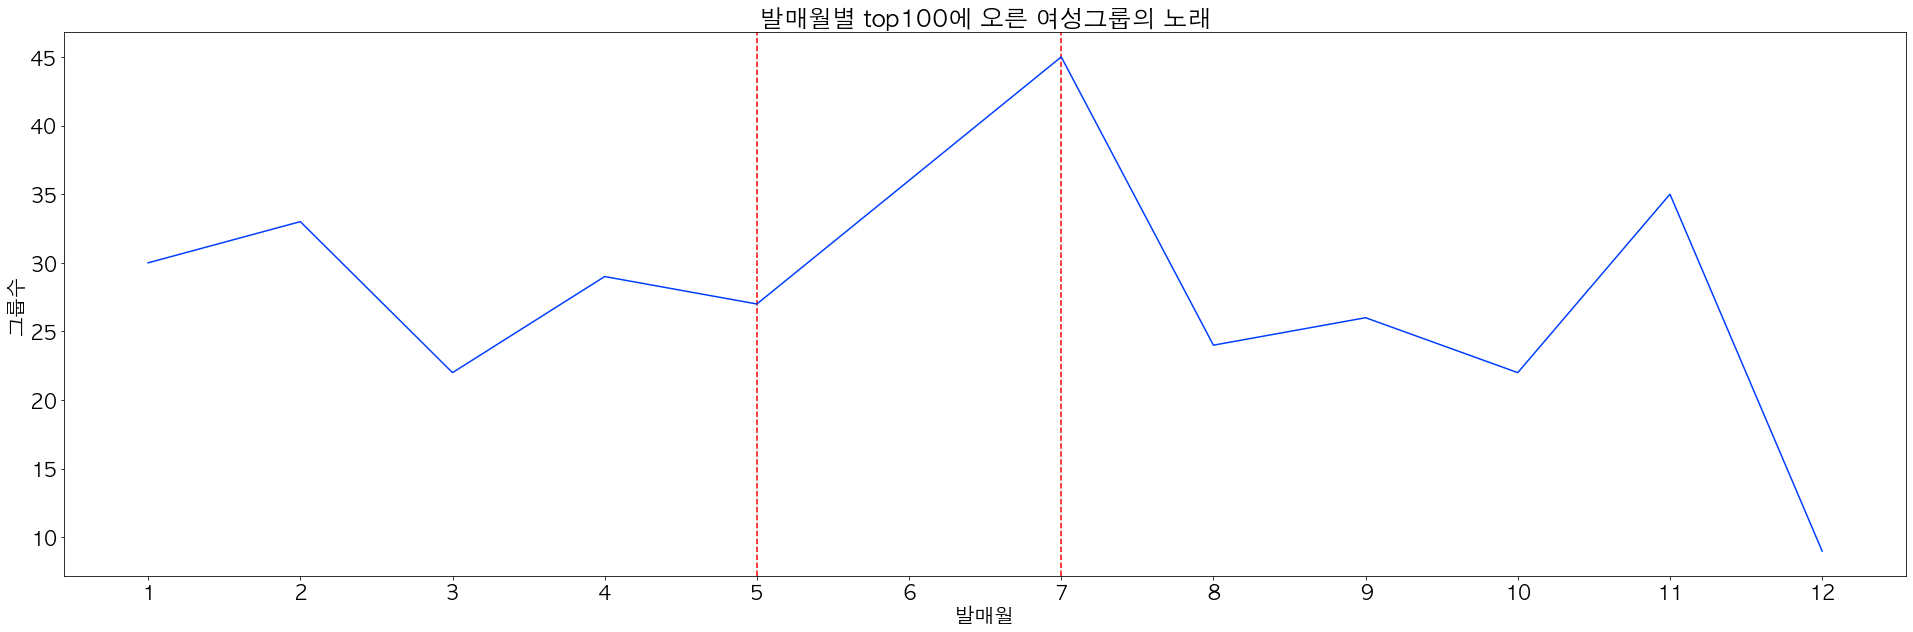

In [293]:
# 84년~20년까지의 발매월별 top100에 오른 여성그룹들의 곡 수 시각화
plt.figure(figsize=(33,10))
ax=plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.axvline(x=5, color='r', linestyle='--')
plt.axvline(x=7, color='r', linestyle='--')
plt.title('발매월별 top100에 오른 여성그룹의 노래')
sns.lineplot(data=gmember_mcount, x='발매월', y='그룹수')

5월을 시작으로 7월까지 발매하는 곡 수가 증가하기 시작했다. 이것으로 보아 '여름'을 겨냥한 여성그룹의 활동이 높아지지 않았나 추측할 수 있었다.

In [236]:
# 전체 연도별 여그룹 인기있는 장르 top10을 female_group_trend로 지정
female_group_trend = pd.DataFrame(female_group.groupby('장르')['제목'].count()).rename(columns = {'제목' : '곡 수'}).reset_index().sort_values(by = '곡 수', ascending=False).head(10)
female_group_trend

장르  곡 수
1             댄스  249
4            발라드   50
0       R&B/Soul   22
2           랩/힙합    6
6     발라드, 국내드라마    4
8         일렉트로니카    3
3           록/메탈    2
5  발라드, R&B/Soul    1
7           성인가요    1

위에서 여성그룹의 경우 남성그룹보다 댄스를 장르로 많은 활동을 하는 것을 다시 한번 확인하는 과정

<AxesSubplot:title={'center':'연도별 여그룹 인기장르 시각화'}, xlabel='장르', ylabel='곡 수'>

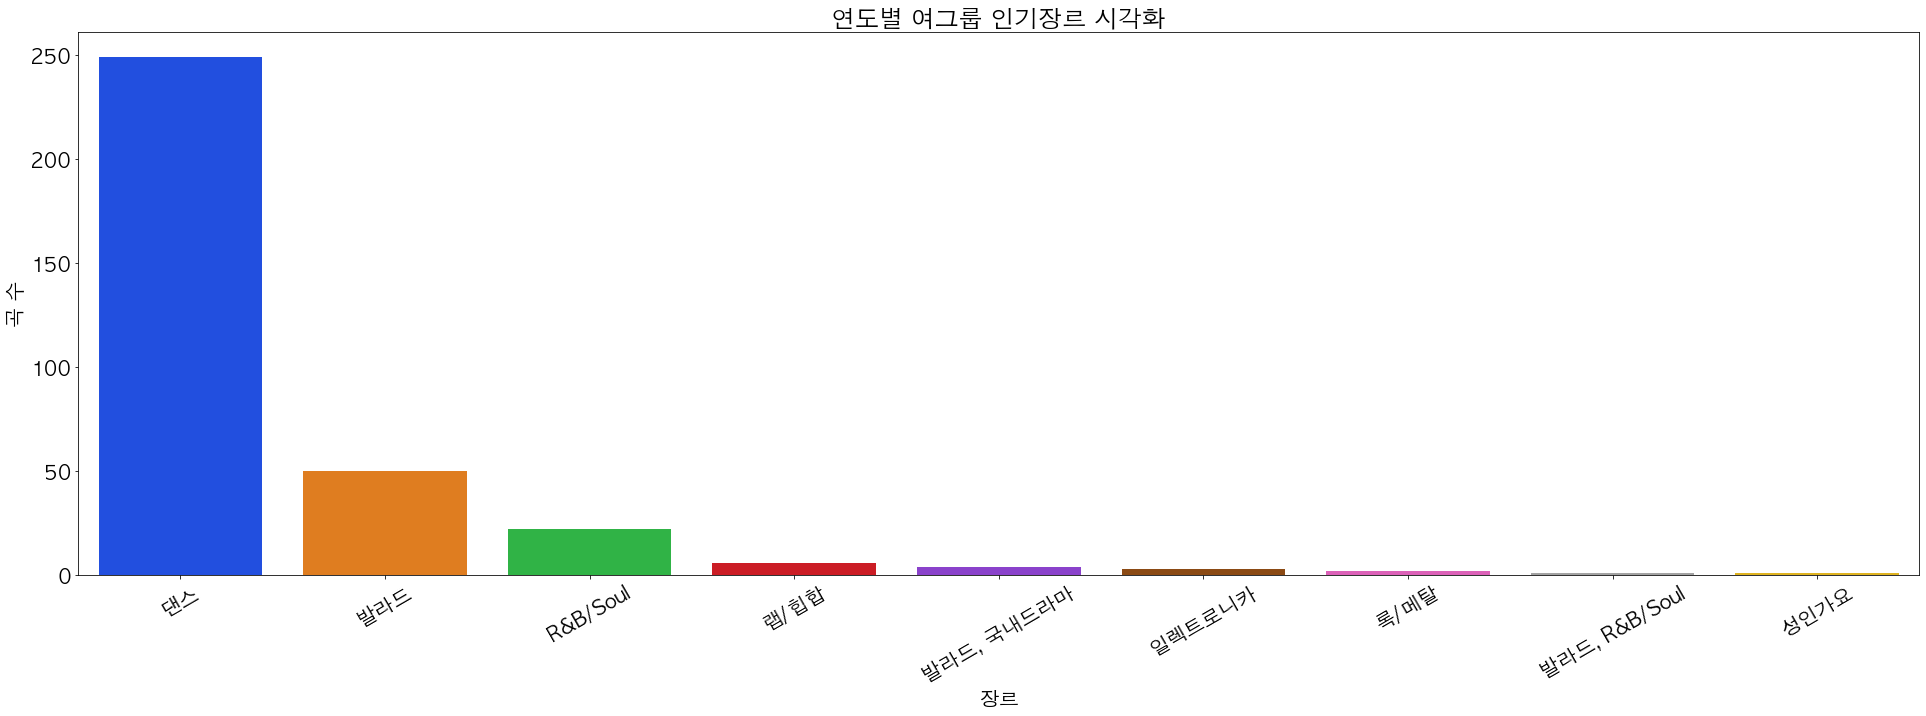

In [294]:
# 연도별 여그룹 인기장르 시각화
plt.figure(figsize=(33,10))
plt.title('연도별 여그룹 인기장르 시각화')
plt.xticks(rotation = 30)
sns.barplot(data= female_group_trend, x='장르', y='곡 수')

In [237]:
# 여그룹 발매월별 인기장르 top10 ->  댄스곡이 주로 6,7월에 집중되어있음
fg_mtrend= pd.DataFrame(female_group.groupby(['장르','발매월'])['제목'].count()).rename(columns ={'제목':'곡 수'}).reset_index().sort_values(by = '곡 수', ascending = False)
fg_mtrend

장르  발매월  곡 수
14             댄스    7   38
13             댄스    6   32
11             댄스    4   25
16             댄스    9   24
18             댄스   11   23
17             댄스   10   19
12             댄스    5   17
15             댄스    8   17
10             댄스    3   17
8              댄스    1   16
9              댄스    2   16
27            발라드    1   10
7        R&B/Soul   11    7
31            발라드    5    7
28            발라드    2    7
37            발라드   11    5
19             댄스   12    5
1        R&B/Soul    2    4
33            발라드    7    4
38            발라드   12    4
34            발라드    8    3
0        R&B/Soul    1    3
44         일렉트로니카    2    3
4        R&B/Soul    5    3
42     발라드, 국내드라마    7    2
29            발라드    3    2
30            발라드    4    2
32            발라드    6    2
2        R&B/Soul    3    2
24           랩/힙합    8    2
35            발라드    9    2
36            발라드   10    2
3        R&B/Soul    4    1
43           성인가요    6    1
41     발라드, 국내드라마    3    1
40     발라드, 국내드라마    2    1
39  발라드, R&B/Soul    2    1
23           랩/힙합    7    1
5        R&B/Soul    8    1
6        R&B/Soul   10    1
20           랩/힙합    2    1
21           랩/힙합    4    1
26           록/메탈    8    1
25           록/메탈    1    1
22           랩/힙합    6    1

In [238]:
# 가장 인기있는 장르는 댄스이며 주로 6,7월에 집중되어있음
fg_mtrend.head(10)

장르  발매월  곡 수
14  댄스    7   38
13  댄스    6   32
11  댄스    4   25
16  댄스    9   24
18  댄스   11   23
17  댄스   10   19
12  댄스    5   17
15  댄스    8   17
10  댄스    3   17
8   댄스    1   16

<AxesSubplot:title={'center':'여그룹 월별 인기장르 top10'}, xlabel='발매월', ylabel='곡 수'>

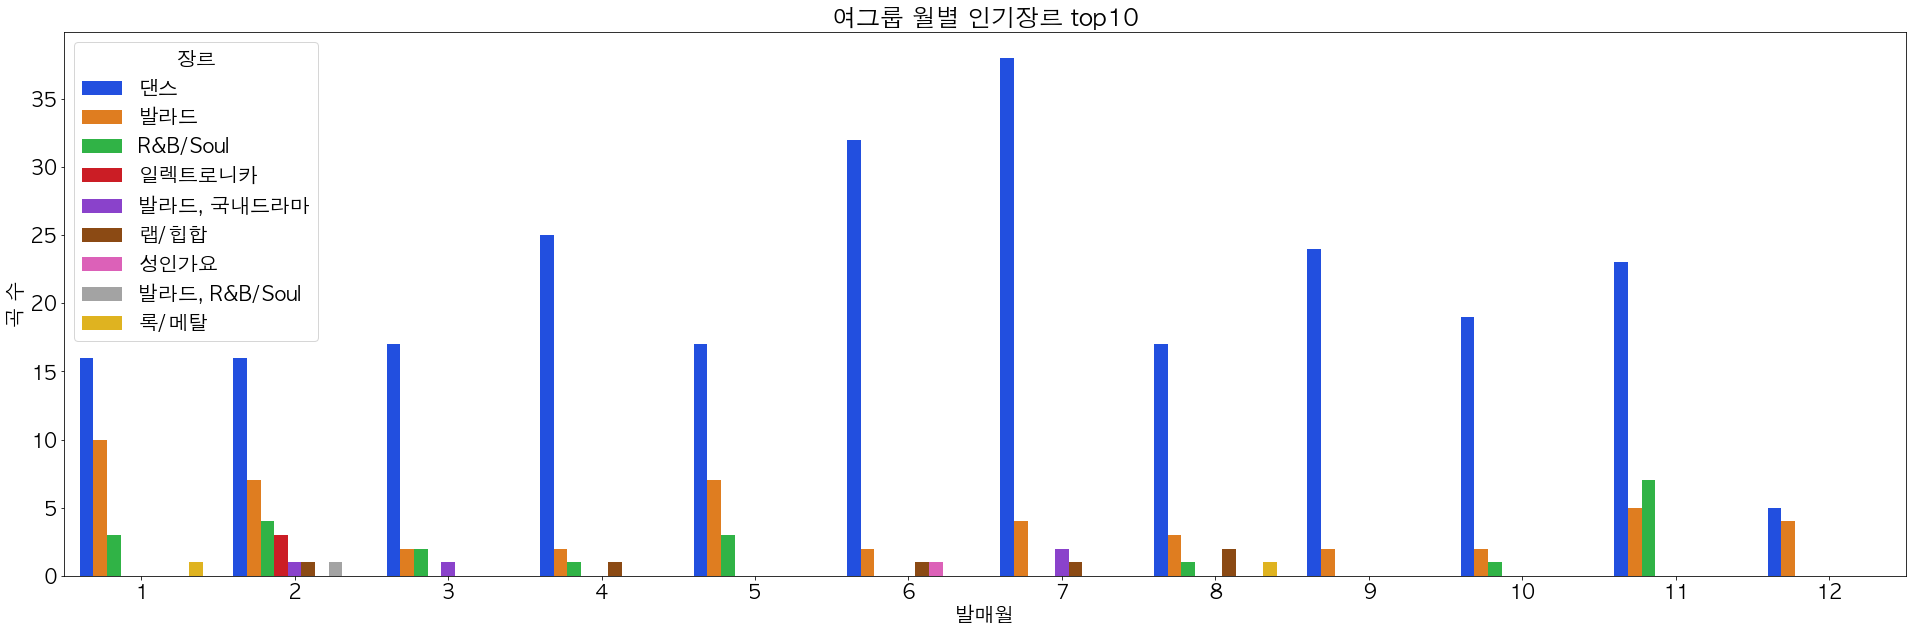

In [239]:
# 여성그룹 월별 인기장르 시각화
plt.figure(figsize = (33,10))
plt.title('여그룹 월별 인기장르 top10')
sns.barplot(data =fg_mtrend, x= '발매월', y= '곡 수', hue= '장르')

여성그룹의 경우 댄스가 압도적으로 인기가 많은 장르임을 다시 한번 파악할 수 있었다.

<AxesSubplot:title={'center':'발매월별 장르가 댄스'}, xlabel='발매월', ylabel='곡 수'>

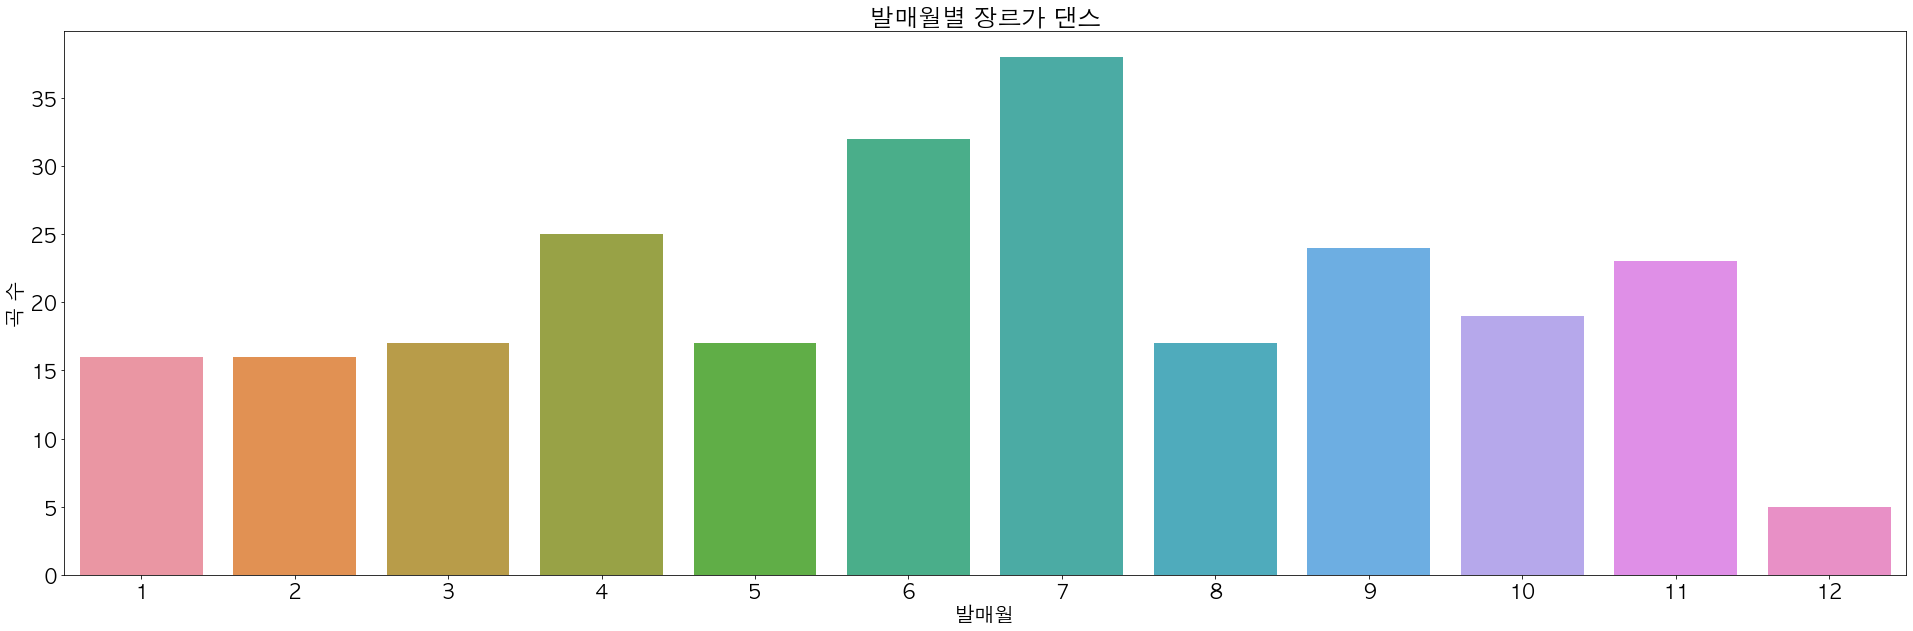

In [240]:
# 여성그룹 발매월별 장르 댄스 시각화 
fgd=fg_mtrend[fg_mtrend['장르']=='댄스']
plt.figure(figsize = (33,10))
plt.title('발매월별 장르가 댄스')
sns.barplot(data =fgd, x= '발매월', y= '곡 수')

<AxesSubplot:title={'center':'발매월별 장르가 댄스'}, xlabel='발매월', ylabel='곡 수'>

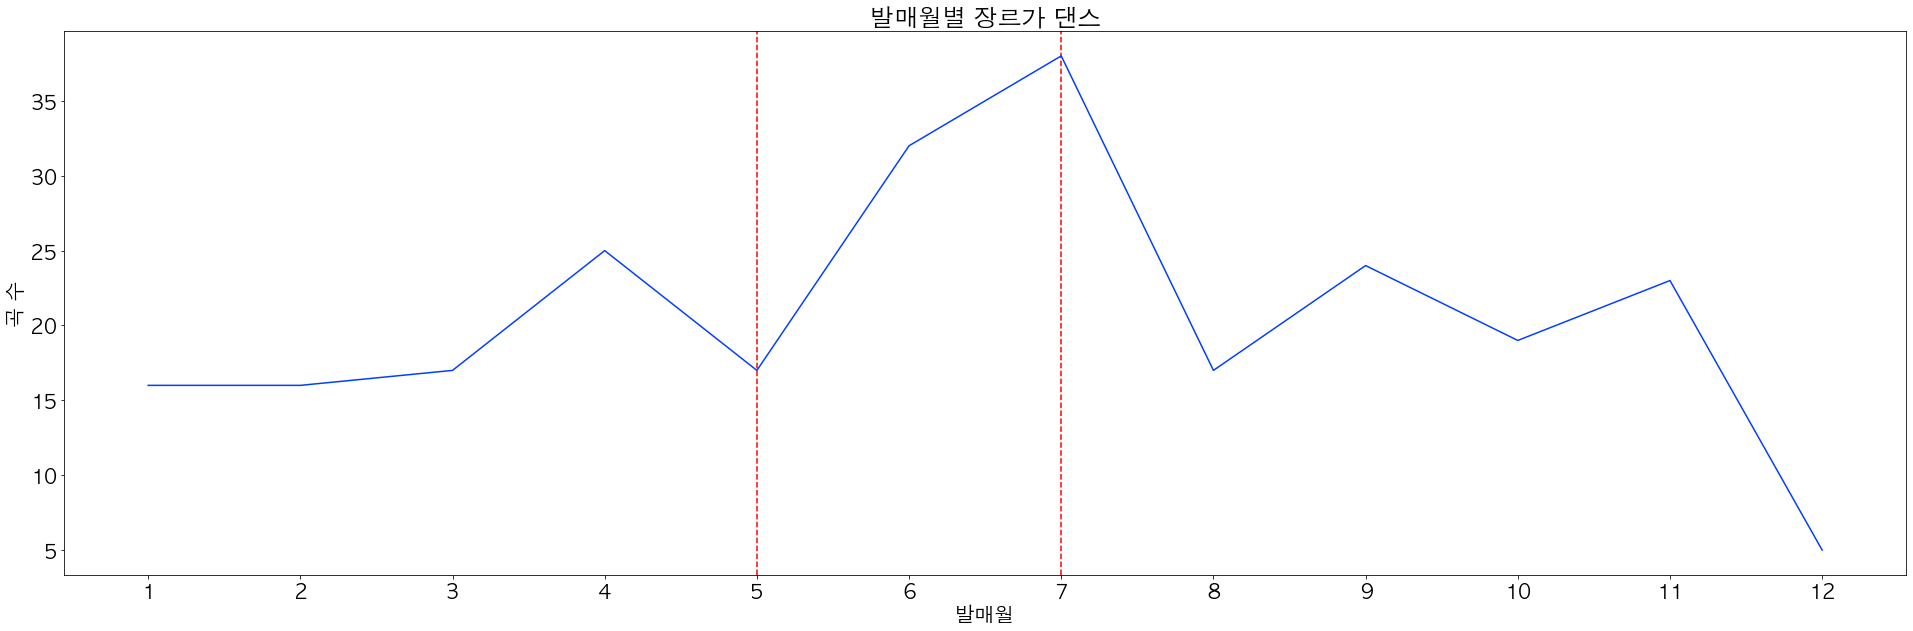

In [296]:
# 발매월별 장르가 댄스인 여성그룹의 곡 수 시각화
fgd=fg_mtrend[fg_mtrend['장르']=='댄스']
plt.figure(figsize = (33,10))
ax=plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.axvline(x=5, color='r', linestyle='--')
plt.axvline(x=7, color='r', linestyle='--')
plt.title('발매월별 장르가 댄스')
sns.lineplot(data =fgd, x= '발매월', y= '곡 수')

* 여러 시각화를 통해 발매월별 장르가 댄스인 곡 수를 파악한 결과 5월부터 증가하기 시작해서 7월에 최고치에 도달하는 것을 알 수 있음.
* 이를 통해 여성그룹의 경우 여름을 겨냥한 댄스곡으로 많은 활동을 하지않을까라는 추측. 
* 12월의 경우에는 가장 적은 발매시기이지만 오히려 신인의 경우 이 시기를 공략해보는 것도 전략이 될 수 있다고 생각한다.



### 장르에 따른 멤버수 별 곡 수
* 3명 이하
* 4명
* 5명
* 6명 이상

In [242]:
# 장르와 멤버수에 따른 곡 수를 fggm으로 지정
fggm= pd.DataFrame(female_group.groupby(['장르','멤버수'])['제목'].count()).reset_index().rename(columns ={'제목':'곡 수'})
fggm

장르   멤버수  곡 수
0        R&B/Soul   2.0    5
1        R&B/Soul   3.0    7
2        R&B/Soul   4.0   10
3              댄스   1.0    1
4              댄스   2.0   10
5              댄스   3.0   24
6              댄스   4.0   81
7              댄스   5.0   56
8              댄스   6.0   32
9              댄스   7.0    5
10             댄스   8.0    6
11             댄스   9.0   31
12             댄스  11.0    2
13             댄스  12.0    1
14           랩/힙합   2.0    1
15           랩/힙합   4.0    4
16           랩/힙합   5.0    1
17           록/메탈   3.0    1
18           록/메탈   4.0    1
19            발라드   2.0   20
20            발라드   3.0   16
21            발라드   4.0   13
22            발라드  11.0    1
23  발라드, R&B/Soul   4.0    1
24     발라드, 국내드라마   2.0    3
25     발라드, 국내드라마   3.0    1
26           성인가요   2.0    1
27         일렉트로니카   4.0    3

<AxesSubplot:title={'center':'장르에 따른 멤버수별 곡 수'}, xlabel='멤버수', ylabel='곡 수'>

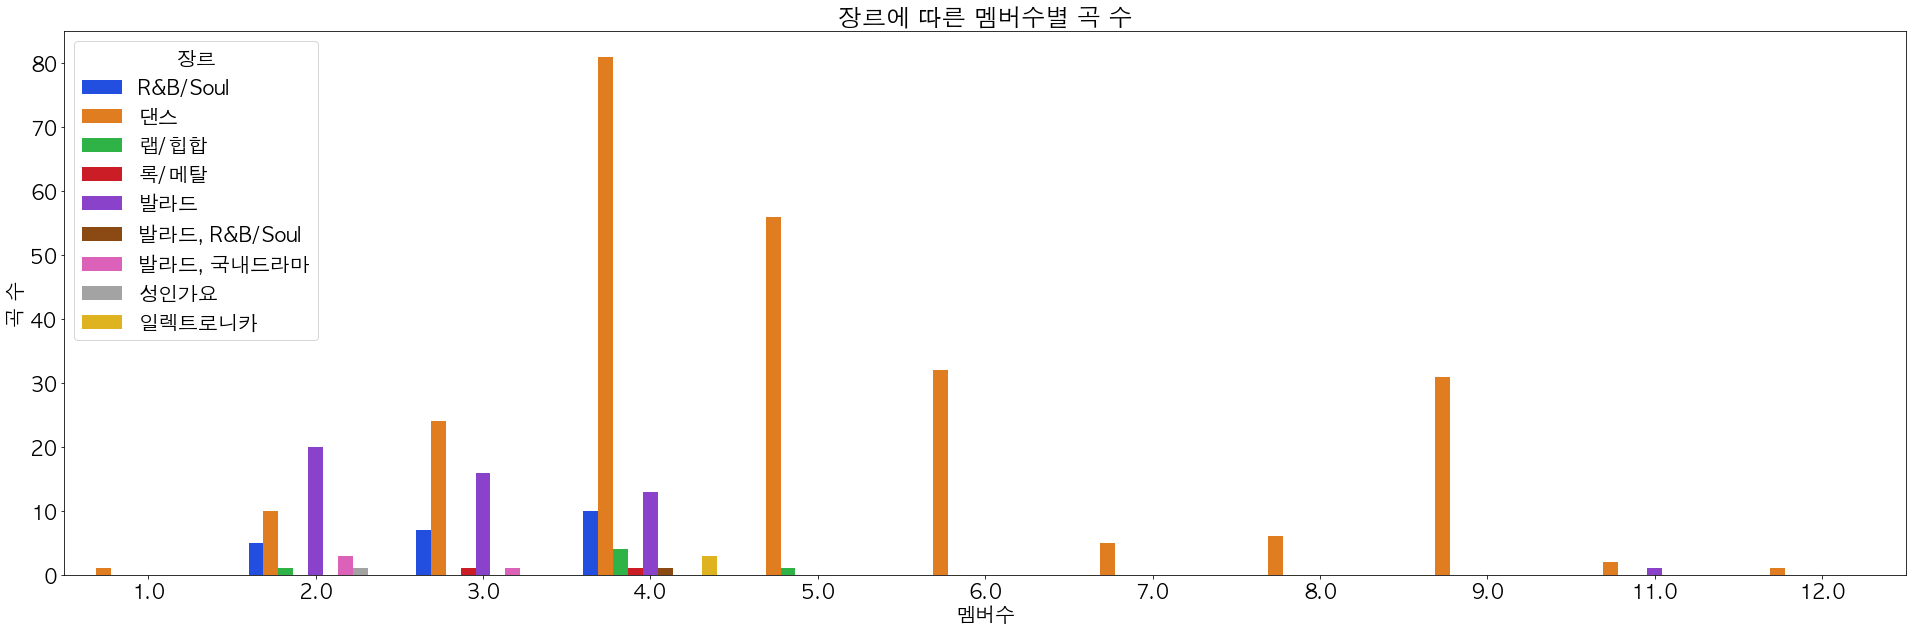

In [243]:
# 장르에 따른 멤버수별 곡 수 시각화
plt.figure(figsize = (33,10))
plt.title('장르에 따른 멤버수별 곡 수')
sns.barplot(data =fggm, x= '멤버수', y= '곡 수', hue='장르')

장르에 따른 여성그룹의 멤버수별 top100에 오른 곡 수를 파악해본 결과 멤버수가 4명/5명/6명이상의 경우
압도적인 비중으로 댄스를 차지하고 있음을 확인

In [244]:
# 장르가 댄스, 멤버가 3명이하인 여성그룹
fg3d=female_group[(female_group['멤버수']<=3)&(female_group['장르']== '댄스')]
fg3d

연도   순위                    제목                                가수  \
1258  1996.0   77                    비련                                비비   
1323  1997.0   42                    그래                                디바   
1350  1997.0   69                  독립선언                                이뉴   
1387  1998.0    6      Dreams Come True                            S.E.S.   
1402  1998.0   21         I'm Your Girl                            S.E.S.   
1435  1998.0   54                   왜불러                                디바   
1449  1998.0   68           Oh, My Love                            S.E.S.   
1504  1999.0   23      Dreams Come True                            S.E.S.   
1507  1999.0   26                너를 사랑해                            S.E.S.   
1558  1999.0   77  I'm Still Loving You                               두리안   
1579  1999.0   98                   호기심                             한스 밴드   
1725  2001.0   44                꿈을 모아서                            S.E.S.   
1729  2001.0   48                감싸 안으며                            S.E.S.   
1840  2002.0   59                     U                            S.E.S.   
1981  2003.0  100                 Shine                                슈가   
2268  2006.0   87      Maybe I Love You                             걸 프렌즈   
2388  2008.0    7                사랑과 전쟁                               다비치   
2407  2008.0   26             Blue Moon                      씨야, 다비치, 블랙펄   
2460  2008.0   79              Hot Girl                                씨야   
2493  2009.0   12                  8282                               다비치   
2506  2009.0   25                My Man                               다비치   
2512  2009.0   31                  여성시대                      씨야, 다비치, 티아라   
2542  2009.0   61               그 놈 목소리                                씨야   
2593  2010.0   12               시간아 멈춰라                               다비치   
2624  2010.0   43                  원더우먼                      씨야, 다비치, 티아라   
2625  2010.0   44                   박수쳐                              2NE1   
2675  2010.0   94                  마법소녀                           오렌지 캬라멜   
2717  2011.0   36                Ma Boy                             씨스타19   
2779  2011.0   98               샹하이 로맨스                           오렌지 캬라멜   
2793  2012.0   12               Twinkle  소녀시대-태티서 (Girls' Generation-TTS)   
2818  2012.0   37                   립스틱                           오렌지 캬라멜   
2891  2013.0   10               있다 없으니까                             씨스타19   
3011  2014.0   30                  까탈레나                           오렌지 캬라멜   
3075  2014.0   94              헤어졌다 만났다                               다비치   
3345  2017.0   64                   맞지?                               언니쓰   

                                                     앨범    좋아요 수        발매일  \
1258                                         B.B's Come   3487.0 1996-04-01   
1323                                         Funky Diva   5645.0 1997-08-29   
1350                                               독립선언    193.0 1998-07-18   
1387                                           S.E.S. 2  16170.0 1998-11-01   
1402                                             S.E.S.  14879.0 1997-11-01   
1435                         Snappy Diva's Second Album   9444.0 1998-04-01   
1449                                             S.E.S.   7616.0 1997-11-01   
1504                                           S.E.S. 2  16170.0 1998-11-01   
1507                                           S.E.S. 2  23310.0 1998-11-01   
1558                               I'm Still Loving You   2229.0 1999-09-27   
1579                                            한스밴드 2집   2628.0 1999-08-12   
1725                                           Surprise  20192.0 2001-07-11   
1729                           A Letter From Green Land   6877.0 2000-12-26   
1840                                   Choose My Life-U   3844.0 2002-02-15   
1981                                              Sh

In [245]:
# 장르가 댄스, 멤버가 3명이하인 여성그룹
fg3d_mtrend= pd.DataFrame(fg3d.groupby('발매월')['제목'].count()).rename(columns ={'제목':'곡 수'}).reset_index()
fg3d_mtrend

발매월  곡 수
0     1    2
1     2    3
2     3    1
3     4    3
4     5    5
5     6    3
6     7    4
7     8    2
8     9    4
9    10    2
10   11    5
11   12    1

<AxesSubplot:title={'center':' 멤버수 3명이하인 여성댄스그룹 월별 곡 수 '}, xlabel='발매월', ylabel='곡 수'>

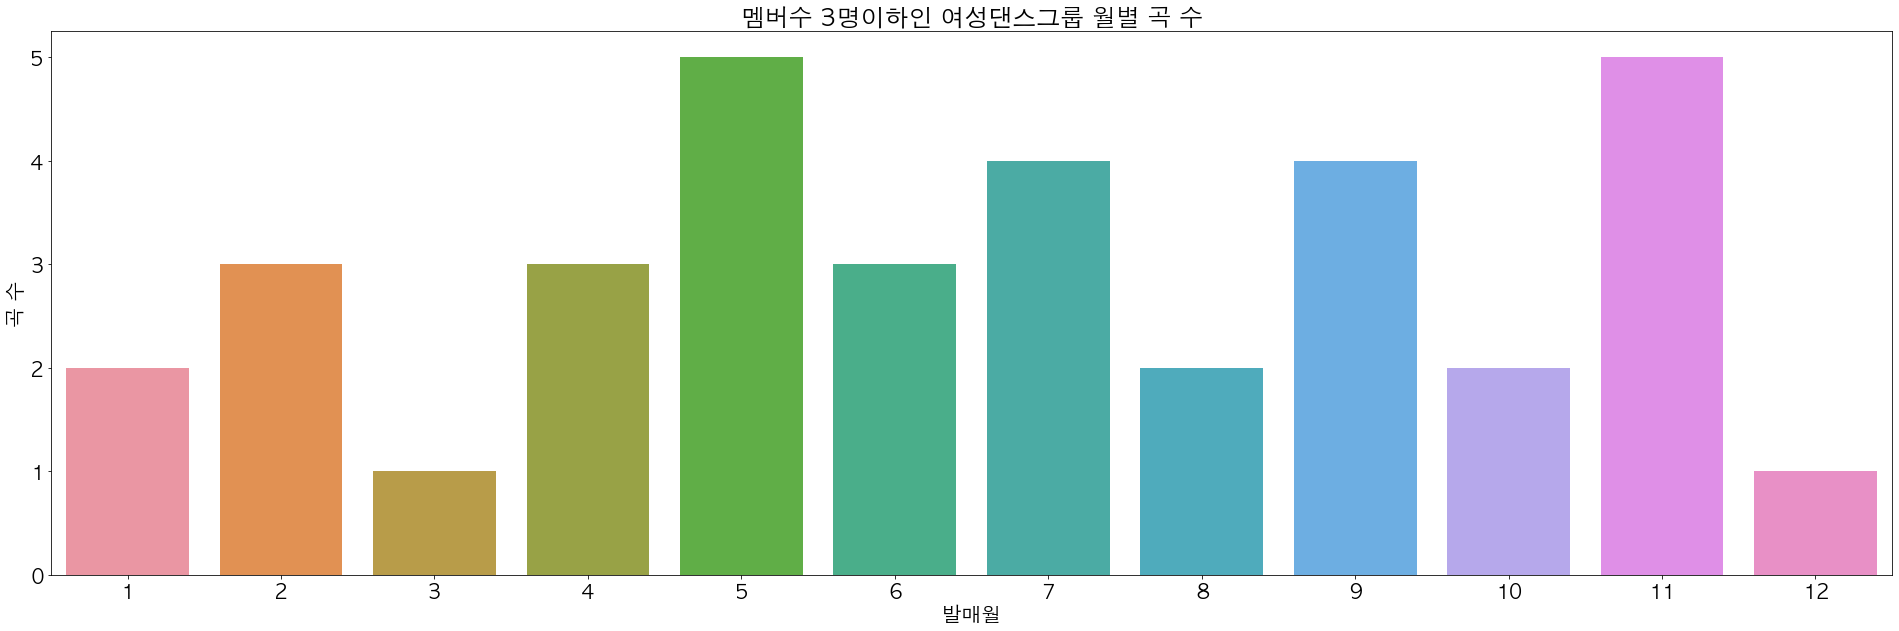

In [246]:
# 장르가 댄스, 멤버가 3명이하인 여성그룹 시각화
plt.figure(figsize = (33,10))
plt.title(' 멤버수 3명이하인 여성댄스그룹 월별 곡 수 ')
sns.barplot(data =fg3d_mtrend, x= '발매월', y= '곡 수')

5월과 11월에 5곡으로 가장 높은 값을 보였다

In [247]:
# 장르가 댄스, 멤버가 4명인 여성그룹
fg4 = female_group[(female_group['멤버수']== 4) & (female_group['장르']== '댄스')]
fg4

연도  순위                 제목             가수  \
1469  1998.0  88          내 남자 친구에게   핑클 (Fin.K.L)   
1487  1999.0   6             영원한 사랑   핑클 (Fin.K.L)   
1632  2000.0  51                Now   핑클 (Fin.K.L)   
1651  2000.0  70                  한            샤크라   
1676  2000.0  95              Hey U            샤크라   
...      ...  ..                ...            ...   
3547  2019.0  66               고고베베  마마무 (Mamamoo)   
3596  2020.0  15  How You Like That      BLACKPINK   
3611  2020.0  30                HIP  마마무 (Mamamoo)   
3640  2020.0  59     Lovesick Girls      BLACKPINK   
3652  2020.0  71     DON'T TOUCH ME          환불원정대   

                                    앨범     좋아요 수        발매일  장르  \
1469  Fine Killing Liberty : Blue Rain   19386.0 1998-05-01  댄스   
1487                             White   21734.0 1999-05-01  댄스   
1632                               Now    9958.0 2000-10-16  댄스   
1651                            Chakra    7638.0 2000-03-02  댄스   
1676                            Chakra    3297.0 2000-03-02  댄스   
...                                ...       ...        ...  ..   
3547                        White Wind   85391.0 2019-03-14  댄스   
3596                 How You Like That  181230.0 2020-06-26  댄스   
3611                  reality in BLACK  134750.0 2019-11-14  댄스   
3640                         THE ALBUM  194873.0 2020-10-02  댄스   
3652                    DON'T TOUCH ME  160198.0 2020-10-10  댄스   

                                                     가사        팬수  멤버수 솔로/그룹  \
1469  이것봐 나를 한번 쳐다봐 나 지금 이쁘다고 말해봐 솔직히 너를 반하게 할 생각에 난...    6579.0  4.0    그룹   
1487  이젠 내 사랑이 되어줘 내 모든걸 너에게 기대고 싶어  언제나 날 지켜줄 너라고 변...    6579.0  4.0    그룹   
1632  came in to my life ye make me fly again ye 늘 바...    6579.0  4.0    그룹   
1651  가라 가라 갇혀 확 갇혀 내 안에 갇혀 확 갇혀 가라 가라 갇혀 확 갇혀 사랑안에 ...     662.0  4.0    그룹   
1676  니가 아니니 니가 니가 아니었니 니가 아니니 니가 니가 아니었니 니가 아니니 니가 ...     662.0  4.0    그룹   
...                                                 ...       ...  ...   ...   
3547  일루와 일루와 일루와 일루와 일루와 일루와 일루와 일루와 일루와 일루와 일루와 일루...  233255.0  4.0    그룹   
3596  보란 듯이 무너졌어 바닥을 뚫고 저 지하까지 옷 끝자락 잡겠다고 저 높이 두 손을 ...  209837.0  4.0    그룹   
3611  All I wanna be is 멋짐 내 마음대로 골라 kick it 머리 어깨 무...  233255.0  4.0    그룹   
3640  영원한 밤 창문 없는 방에 우릴 가둔 love What can we say 매번 아...  209837.0  4.0    그룹   
3652  Trouble 이래 다 그래 세 보인대 어쩔래 난 멋 부리네 더 꾸미네 yeah I...   16216.0  4.0    그룹   

      성별                                           작사  \
1469  여성                                          김영아   
1487  여성                                          김영아   
1632  여성                                          홍지유   
1651  여성                                          이상민   
1676  여성                                          이상민   
...   ..                                          ...   
3547  여성                     김도훈(RBW) 솔라(마마무) 문별(마마무)   
3596  여성                             TEDDY DannyChung   
3611  여성                       김도훈(RBW) 박우상 화사(HwaSa)   
3640  여성  TEDDY LØREN 지수(JISOO) 제니(JENNIE) DannyChung   
3652  여성          블랙아이드필승 전군 은비 ILLSON JohnJohn Jaero   

                                                     작곡             편곡  발매월  
1469                                      Chrischan 전준규  Chrischan 전준규    5  
1487                                                주태영        주태영 조성진    5  
1632                                                김진권            김진권   10  
1651                                            이상민 김준환            김준환    3  
1676                                            김성태 이상민            김성태    3  
...                                                 ...            ...  ...  
3547                                       김건모 김도훈(RBW)       김도훈(RBW)    3  
3596                                     TEDDY R.Tee 24       R.Tee 24    6  
3611                             김도훈(RBW) 박우상 화사(HwaSa)   김도훈(RBW) 박우상   11  
3640  TEDDY 24 제니(JENNIE) BrianLee LeahHaywood R.Tee...       24 R.Tee   10  
3652                                         블랙아이드필승

In [248]:
# 멤버가 4명인 댄스그룹 발매월별 곡 수
fg4_mtrend= pd.DataFrame(fg4.groupby('발매월')['제목'].count()).rename(columns ={'제목':'곡 수'}).reset_index()
fg4_mtrend

발매월  곡 수
0     1    3
1     2    4
2     3    9
3     4    4
4     5    3
5     6   17
6     7   15
7     8    5
8     9    8
9    10    7
10   11    5
11   12    1

<AxesSubplot:title={'center':'멤버수 4명인 여성댄스그룹 월별 곡 수 '}, xlabel='발매월', ylabel='곡 수'>

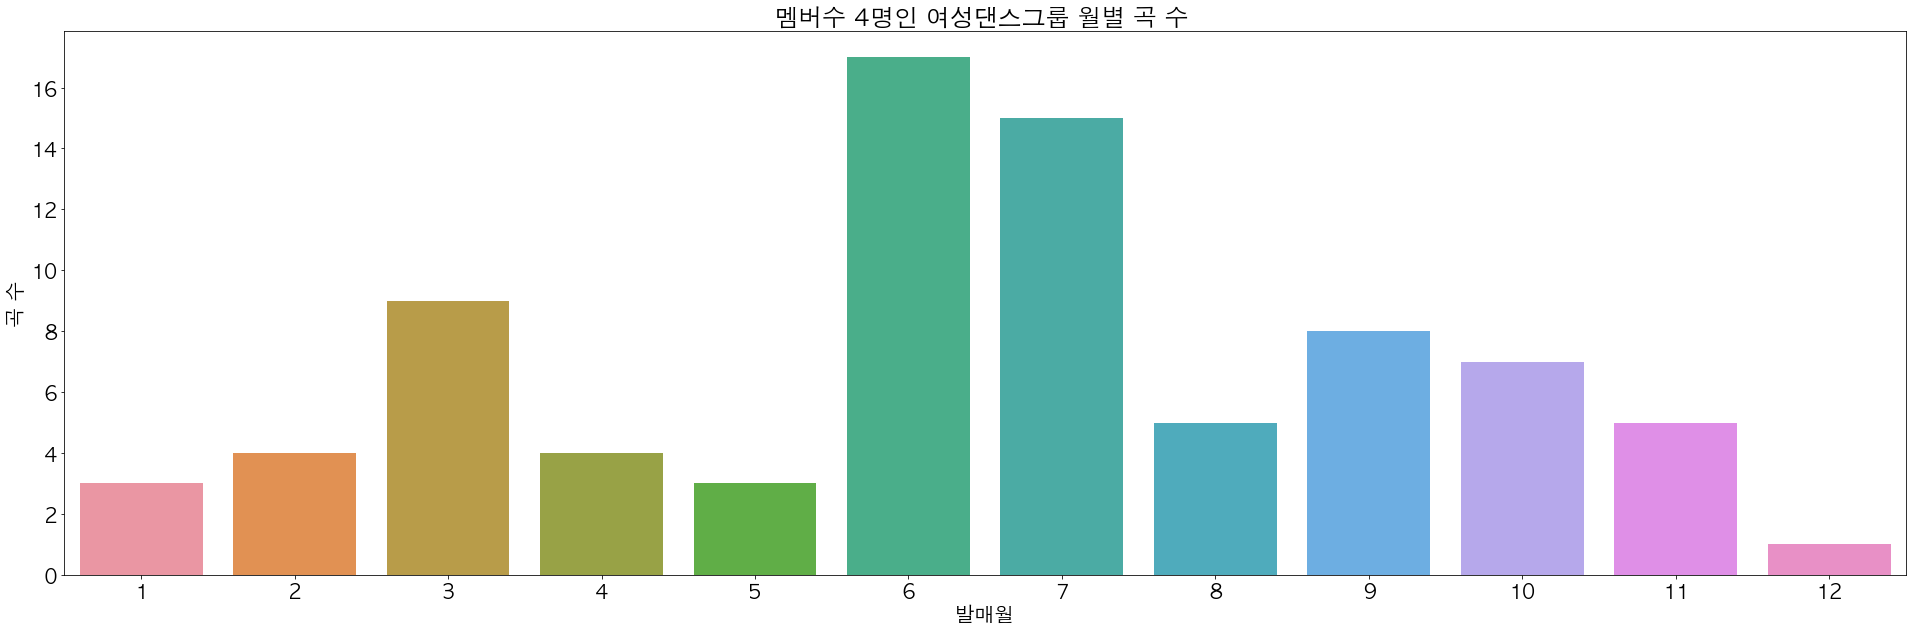

In [249]:
# # 장르가 댄스, 멤버가 4명인 여성그룹 시각화
plt.figure(figsize = (33,10))
plt.title('멤버수 4명인 여성댄스그룹 월별 곡 수 ')
sns.barplot(data =fg4_mtrend, x= '발매월', y= '곡 수')

멤버가 4명인 여성그룹의 경우 6월과 7월이 17곡 15곡으로 압도적으로 높았다

In [250]:
# 장르가 댄스, 멤버가 5명인 여성그룹
fg5 = female_group[(female_group['멤버수'] == 5) & (female_group['장르']== '댄스')]
fg5

연도  순위                 제목                 가수  \
1679  2000.0  98                Why              베이비복스   
1807  2002.0  26                 우연              베이비복스   
1917  2003.0  36              나 어떡해              베이비복스   
2306  2007.0  25              Irony               원더걸스   
2307  2007.0  26            Tell me               원더걸스   
2382  2008.0   1             So Hot               원더걸스   
2385  2008.0   4             Nobody               원더걸스   
2437  2008.0  56                이바보               원더걸스   
2475  2008.0  94            Tell me               원더걸스   
2501  2009.0  20          Hot Issue            4minute   
2502  2009.0  21              Muzik            4minute   
2504  2009.0  23                미스터                 카라   
2516  2009.0  35              Wanna                 카라   
2522  2009.0  41              Honey                 카라   
2525  2009.0  44                라차타               f(x)   
2552  2009.0  71        Pretty Girl                 카라   
2571  2009.0  90              Chu~♡               f(x)   
2588  2010.0   7  2 Different Tears               원더걸스   
2592  2010.0  11                 루팡                 카라   
2601  2010.0  20                HUH            4minute   
2604  2010.0  23             NU 예삐오               f(x)   
2646  2010.0  65       I My Me Mine            4minute   
2697  2011.0  16         Hot Summer               f(x)   
2701  2011.0  20         Be My Baby               원더걸스   
2708  2011.0  27               샤이보이                시크릿   
2731  2011.0  50               STEP                 카라   
2733  2011.0  52               피노키오               f(x)   
2757  2011.0  76            거울아 거울아            4minute   
2778  2011.0  97     Heart To Heart            4minute   
2801  2012.0  20          Like this               원더걸스   
2811  2012.0  30     Electric Shock               f(x)   
2829  2012.0  48          Volume Up            4minute   
2871  2012.0  90            Pandora                 카라   
2888  2013.0   7           이름이 뭐예요?            4minute   
2903  2013.0  22                빠빠빠               크레용팝   
2933  2013.0  52              첫 사랑니               f(x)   
2963  2013.0  82              예뻐 예뻐            레이디스 코드   
3077  2014.0  96                위아래               EXID   
3096  2015.0  15                위아래               EXID   
3112  2015.0  31                 아예               EXID   
3147  2015.0  66     Ice Cream Cake  Red Velvet (레드벨벳)   
3153  2015.0  72          Dumb Dumb  Red Velvet (레드벨벳)   
3162  2015.0  81         I Feel You               원더걸스   
3203  2016.0  22      Why So Lonely               원더걸스   
3224  2016.0  43             러시안 룰렛  Red Velvet (레드벨벳)   
3305  2017.0  24               빨간 맛  Red Velvet (레드벨벳)   
3311  2017.0  30             Rookie  Red Velvet (레드벨벳)   
3371  2017.0  90             러시안 룰렛  Red Velvet (레드벨벳)   
3411  2018.0  30            Bad Boy  Red Velvet (레드벨벳)   
3438  2018.0  57               빨간 맛  Red Velvet (레드벨벳)   
3440  2018.0  59           Power Up  Red Velvet (레드벨벳)   
3460  2018.0  79                피카부  Red Velvet (레드벨벳)   
3495  2019.0  14               달라달라          ITZY (있지)   
3579  2019.0  98                ICY          ITZY (있지)   
3591  2020.0  10             Psycho  Red Velvet (레드벨벳)   
3636  2020.0  55            WANNABE          ITZY (있지)   

                                                    앨범     좋아요 수        발매일  \
1679                                               Why    3038.0 2000-05-16   
1807                          Baby V.O.X Special Album   11153.0 2002-04-23   
1917                                          Devotion    2692.0 2003-04-03   
2306                                 The wonder begins   15638.0 2007-02-13   
2307                                  The Wonder Years   22828.0 2007-09-12   
2382                                            So Hot   25896.0 2008-06-03   
2385                        The Wonder Years - Trilogy   23034.0 2008-09-22   
2437                                  The Wonder Years   25721.0 2007-0

In [251]:
# # 장르가 댄스, 멤버가 5명인 여성그룹
fg5_mtrend= pd.DataFrame(fg5.groupby('발매월')['제목'].count()).rename(columns ={'제목':'곡 수'}).reset_index()
fg5_mtrend

발매월  곡 수
0     1    2
1     2    5
2     3    3
3     4    7
4     5    5
5     6    6
6     7    7
7     8    6
8     9   10
9    11    3
10   12    2

<AxesSubplot:title={'center':'멤버수 5명인 여성댄스그룹 월별 곡 수 '}, xlabel='발매월', ylabel='곡 수'>

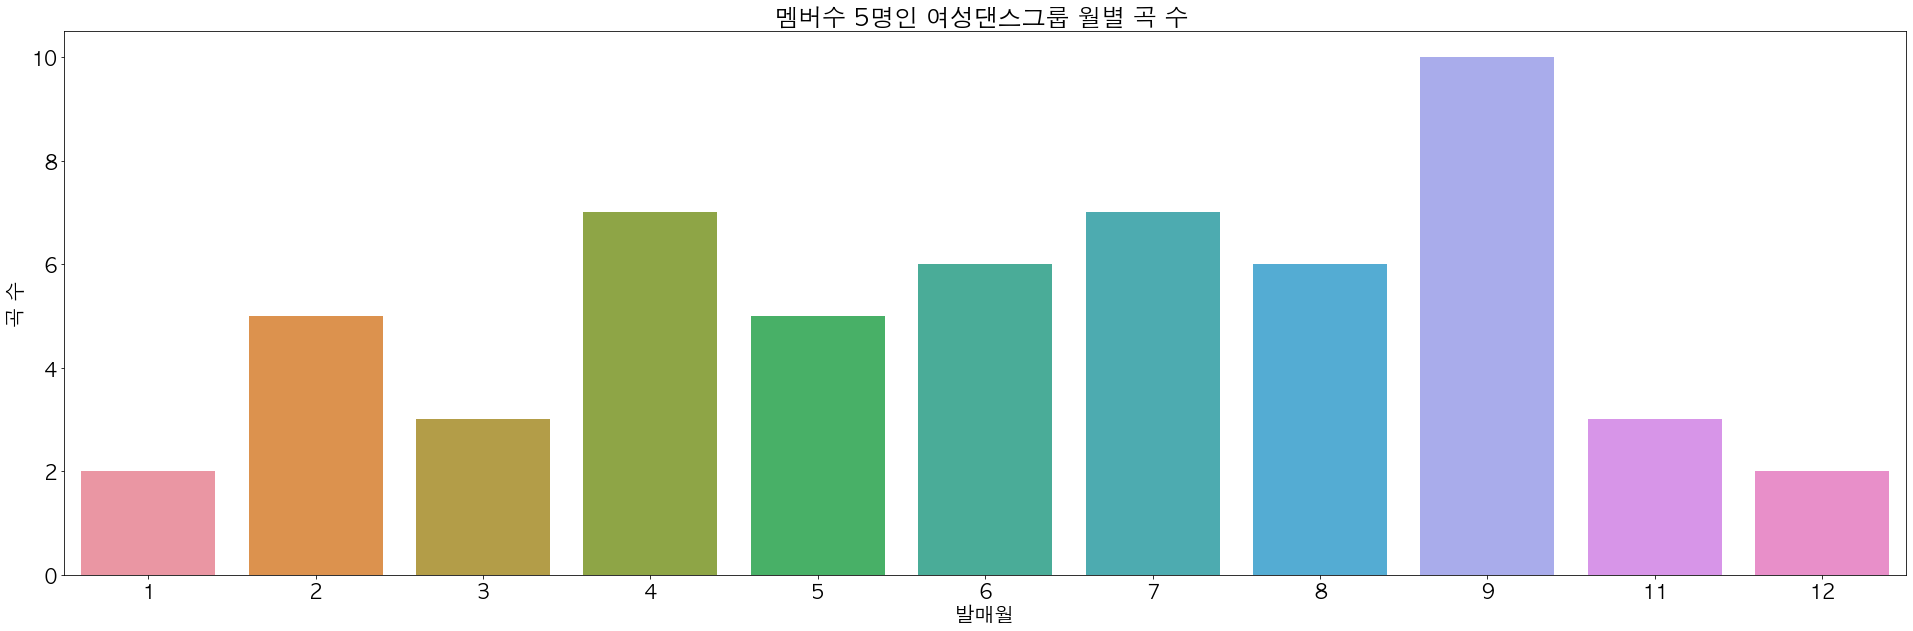

In [252]:
# 장르가 댄스, 멤버가 5명인 여성그룹 시각화
plt.figure(figsize = (33,10))
plt.title('멤버수 5명인 여성댄스그룹 월별 곡 수 ')
sns.barplot(data =fg5_mtrend, x= '발매월', y= '곡 수')

멤버가 5명인 여성그룹의 경우 9월이 10곡으로 가장 높은 값을 보여줬다

In [253]:
# 장르가 댄스, 멤버가 6명 이상인 여성그룹
fg6up = female_group[(female_group['멤버수'] > 5) & (female_group['장르']== '댄스')]
fg6up['가수']

2354    소녀시대 (GIRLS' GENERATION)
2410    소녀시대 (GIRLS' GENERATION)
2471    소녀시대 (GIRLS' GENERATION)
2482    소녀시대 (GIRLS' GENERATION)
2496                    티아라, 초신성
                  ...           
3605           오마이걸 (OH MY GIRL)
3628               IZ*ONE (아이즈원)
3629                Apink (에이핑크)
3639                TWICE (트와이스)
3671                     (여자)아이들
Name: 가수, Length: 77, dtype: object

In [254]:
# 장르가 댄스, 멤버가 6명 이상인 여성그룹
fg6up_mtrend= pd.DataFrame(fg6up.groupby('발매월')['제목'].count()).rename(columns ={'제목':'곡 수'}).reset_index()
fg6up_mtrend

발매월  곡 수
0     1    9
1     2    4
2     3    4
3     4   11
4     5    4
5     6    6
6     7   12
7     8    4
8     9    2
9    10   10
10   11   10
11   12    1

<AxesSubplot:title={'center':'멤버수 6명 이상인 여성댄스그룹 월별 곡 수 '}, xlabel='발매월', ylabel='곡 수'>

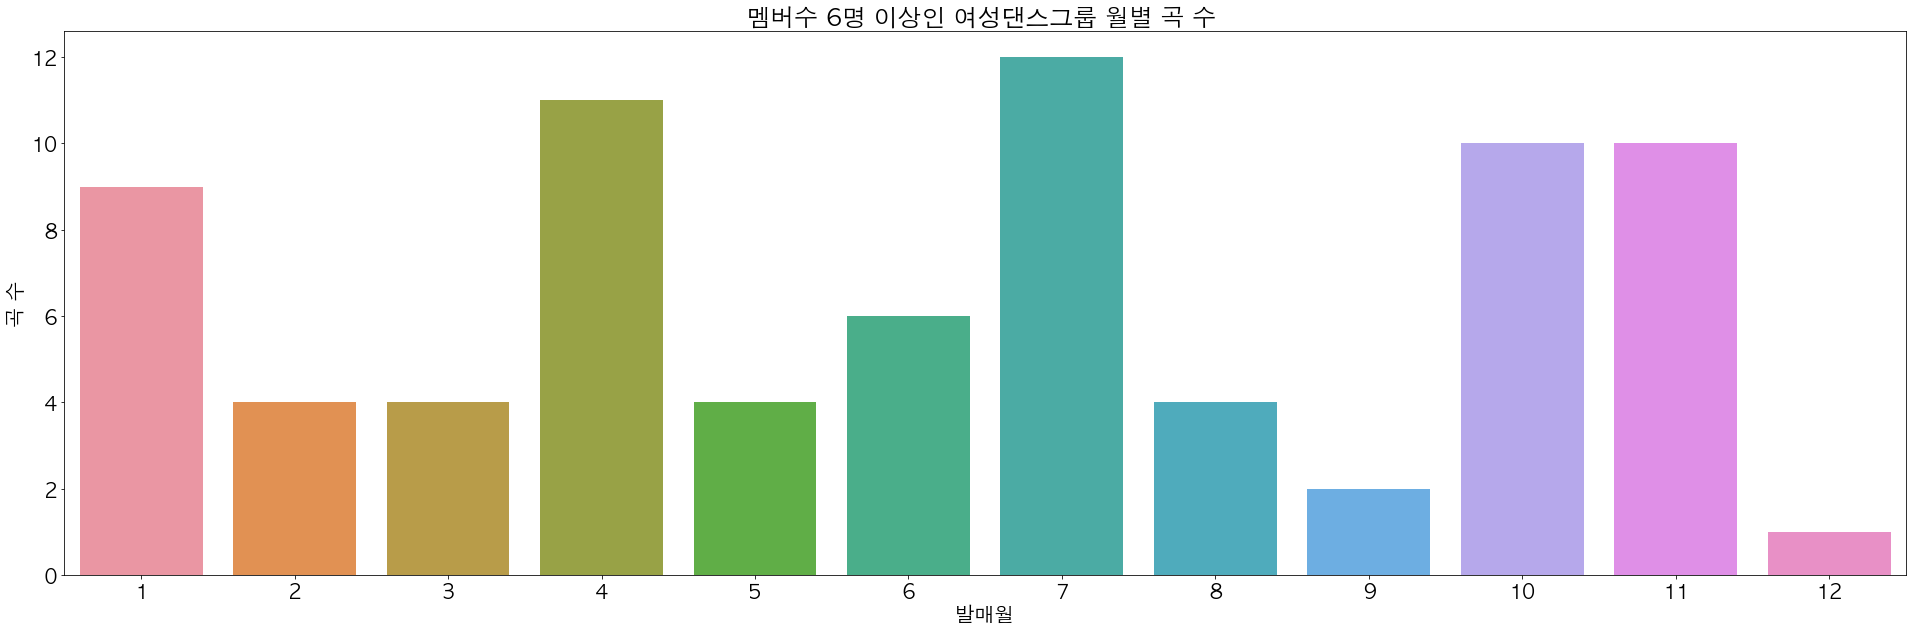

In [255]:
# 장르가 댄스, 멤버가 6명 이상인 여성그룹 시각화
plt.figure(figsize = (33,10))
plt.title('멤버수 6명 이상인 여성댄스그룹 월별 곡 수 ')
sns.barplot(data =fg6up_mtrend, x= '발매월', y= '곡 수')

### 발매일 전략 결론
   * 전반적으로 동일한 경향을 나타나지는 않지만, 멤버수가 4명/5명/6명 이상의 경우를 분석한 결과 5월부터 7월사이 여성그룹들이 많은 곡 수를 통해 활동하는 것을 확인할 수 있었음. 

   * 공통적으로 12월에는 가장 낮은 곡 수를 보이는데 이는 이 시기에는 댄스 여성그룹의 활동이 저조하다는 것을 알 수 있었음. 

   * 이를 통해 신인 여성그룹이 댄스라는 장르를 가지고 데뷔를 할 때 12월에 데뷔하는 것도 전략이 될 수 있을 것이라고 판단함.

------------------------

# 최종 결론

1. 멤버 수 전략 분석 결과   - 4명을 추천한다

2. 곡 장르 전략 분석 결과   - 댄스 장르를 추천한다

3. 곡 제목 수 분석 결과    - 순위와 관계 없는 것으로 보인다

4. 작사/작곡/편곡 분석 결과 - 각각 컨셉에 맞게 teddy(걸크러시), 용감한형제(청량), 임수호&용배(청순)이 추천한다

5. 가사 분석 결과         - '사랑'이라는 단어가 들어간 주제나 컨셉의 곡을 작사하는 것을 추천하며 단어의 빈도는 적게 하는 것이 추천한다

6. 발매일 전략            - 12월을 추천한다